In [5]:
import numpy as np
import pandas as pd
import math
import itertools 

import matplotlib.pyplot as plt
import seaborn as sns

from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(font="Arial",
        rc={
 "axes.axisbelow": False,
 "axes.edgecolor": "lightgrey",
 "axes.facecolor": "None",
 "axes.grid": False,
 "axes.labelcolor": "dimgrey",
 "axes.spines.right": False,
 "axes.spines.top": False,
 "figure.facecolor": "white",
 "lines.solid_capstyle": "round",
 "patch.edgecolor": "w",
 "patch.force_edgecolor": True,
 "text.color": "dimgrey",
 "xtick.bottom": False,
 "xtick.color": "dimgrey",
 "xtick.direction": "out",
 "xtick.top": False,
 "ytick.color": "dimgrey",
 "ytick.direction": "out",
 "ytick.left": False,
 "ytick.right": False})

In [9]:
df = pd.read_csv(r"C:\Users\karat\Downloads\sales.csv.csv")
df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE   0.00            0
1   1  2013-01-01          1   BABY CARE   0.00            0
2   2  2013-01-01          1      BEAUTY   0.00            0
3   3  2013-01-01          1   BEVERAGES   0.00            0
4   4  2013-01-01          1       BOOKS   0.00            0

In [16]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df['date'] = pd.to_datetime(df['date'])
min(df['date']), max(df['date'])

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [21]:
df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [24]:
df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [34]:
agg_df = df.groupby(['date','family']).agg({'sales':'sum'}).reset_index().sort_values(by=['family','date'])

In [37]:
agg_df.head(10)

date      family  sales
0   2013-01-01  AUTOMOTIVE   0.00
33  2013-01-02  AUTOMOTIVE 255.00
66  2013-01-03  AUTOMOTIVE 161.00
99  2013-01-04  AUTOMOTIVE 169.00
132 2013-01-05  AUTOMOTIVE 342.00
165 2013-01-06  AUTOMOTIVE 360.00
198 2013-01-07  AUTOMOTIVE 189.00
231 2013-01-08  AUTOMOTIVE 229.00
264 2013-01-09  AUTOMOTIVE 164.00
297 2013-01-10  AUTOMOTIVE 164.00

In [38]:
total_sales_df = agg_df.pivot(index='date',columns='family', values='sales')
total_sales_df.head()

family      AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  BREAD/BAKERY  \
date                                                                        
2013-01-01        0.00       0.00    2.00     810.00   0.00        180.59   
2013-01-02      255.00       0.00  207.00   72092.00   0.00      26246.32   
2013-01-03      161.00       0.00  125.00   52105.00   0.00      18456.48   
2013-01-04      169.00       0.00  133.00   54167.00   0.00      16721.97   
2013-01-05      342.00       0.00  191.00   77818.00   0.00      22367.76   

family      CELEBRATION  CLEANING    DAIRY     DELI     EGGS  FROZEN FOODS  \
date                                                                         
2013-01-01         0.00    186.00   143.00    71.09    46.00         29.65   
2013-01-02         0.00  74629.00 23381.00 15754.50 10932.00       7115.39   
2013-01-03         0.00  55893.00 18001.00 11172.45  7358.00       4760.81   
2013-01-04         0.00  52064.00 18148.00 10143.21  6760.00       4525.93   
2013-01-05         0.00  70128.00 23082.00 13734.95  8576.00       5781.61   

family      GROCERY I  GROCERY II  HARDWARE  HOME AND KITCHEN I  \
date                                                              
2013-01-01     700.00       15.00      0.00                0.00   
2013-01-02  202020.00     1476.00     46.00                0.00   
2013-01-03  144878.00     1048.00     37.00                0.00   
2013-01-04  135754.00     1031.00     57.00                0.00   
2013-01-05  188356.00     1273.00     87.00                0.00   

family      HOME AND KITCHEN II  HOME APPLIANCES  HOME CARE  LADIESWEAR  \
date                                                                      
2013-01-01                 0.00             0.00       0.00        0.00   
2013-01-02                 0.00            21.00       0.00        0.00   
2013-01-03                 0.00            15.00       0.00        0.00   
2013-01-04                 0.00            13.00       0.00        0.00   
2013-01-05                 0.00            11.00       0.00        0.00   

family      LAWN AND GARDEN  LINGERIE  LIQUOR,WINE,BEER  MAGAZINES    MEATS  \
date                                                                          
2013-01-01             2.00      5.00            105.00       0.00   110.80   
2013-01-02           121.00    469.00           2411.00       0.00 20871.46   
2013-01-03            83.00    366.00           2476.00       0.00 16597.40   
2013-01-04           127.00    382.00           4796.00       0.00 21625.96   
2013-01-05           180.00    458.00           6715.00       0.00 20879.09   

family      PERSONAL CARE  PET SUPPLIES  PLAYERS AND ELECTRONICS  POULTRY  \
date                                                                        
2013-01-01          25.00          0.00                     0.00    42.64   
2013-01-02       17204.00          0.00                     0.00 13975.88   
2013-01-03       12568.00          0.00                     0.00 10674.39   
2013-01-04       11303.00          0.00                     0.00 10772.52   
2013-01-05       16819.00          0.00                     0.00 13475.01   

family      PREPARED FOODS  PRODUCE  SCHOOL AND OFFICE SUPPLIES  SEAFOOD  
date                                                                      
2013-01-01           37.85     0.00                        0.00     0.00  
2013-01-02         5338.11     0.00                        0.00  1526.75  
2013-01-03         3591.39     0.00                        0.00  1094.31  
2013-01-04         4472.97     0.00                        0.00  1293.12  
2013-01-05         5830.07     0.00                        0.00  1245.64

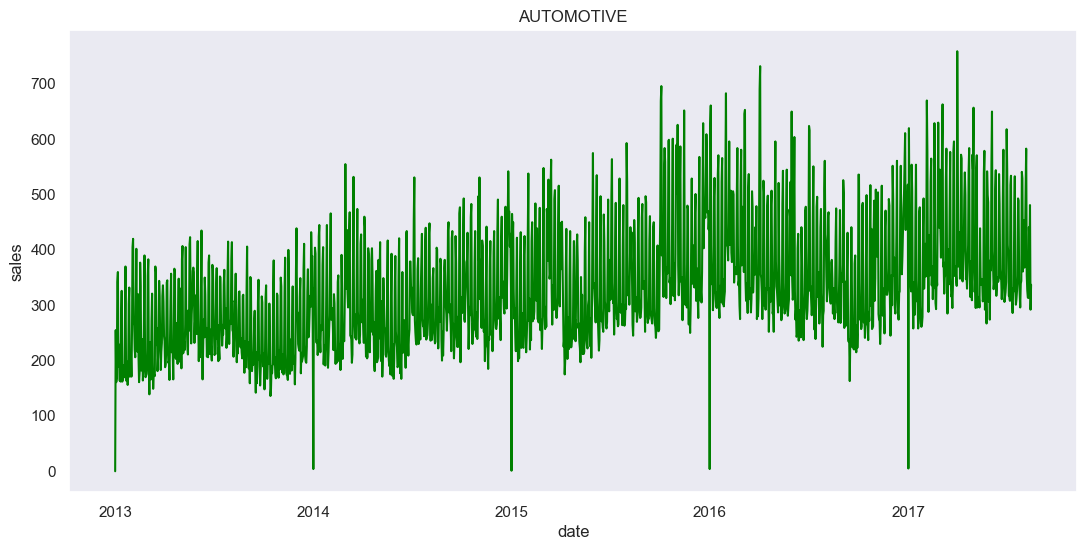

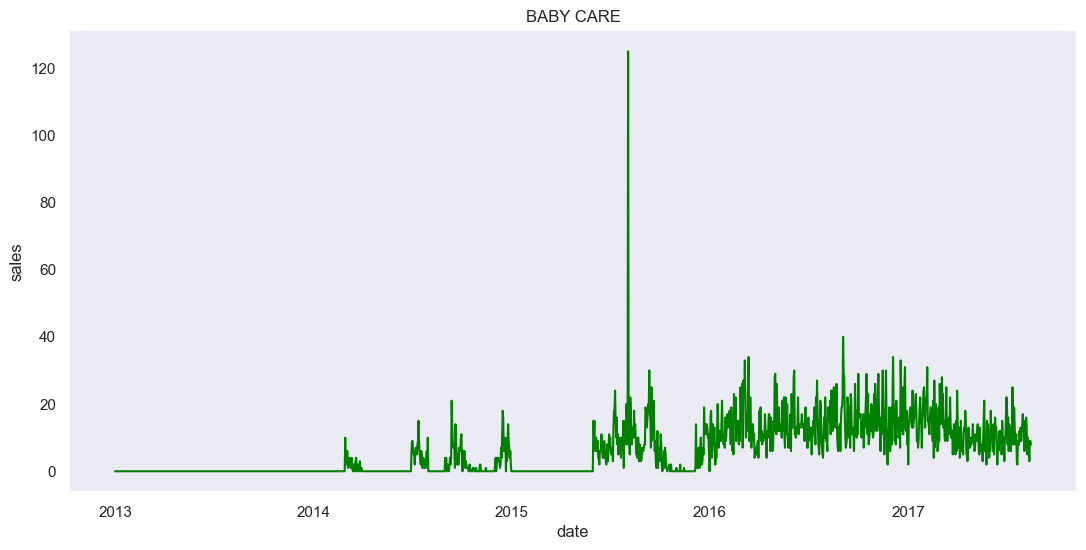

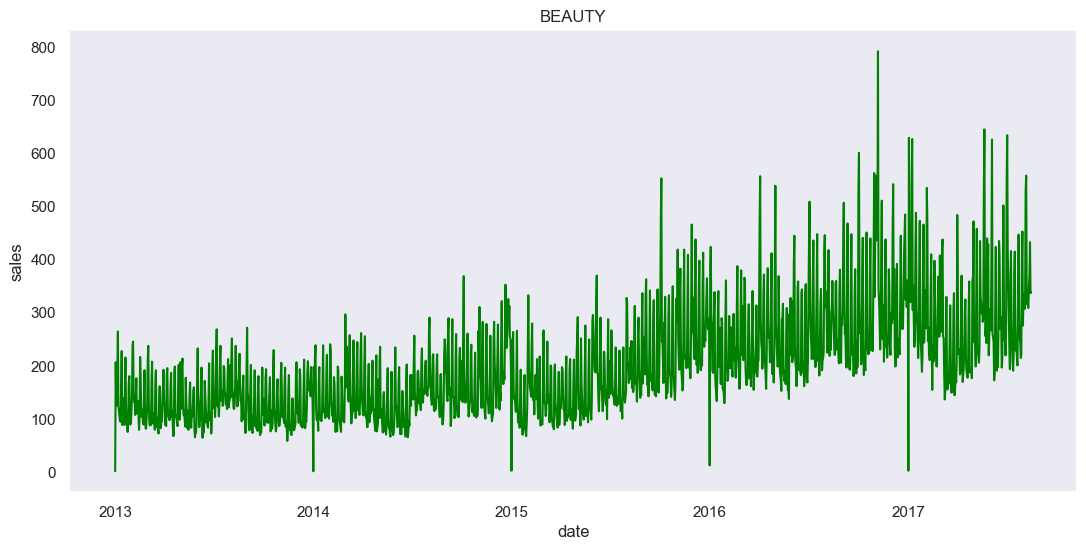

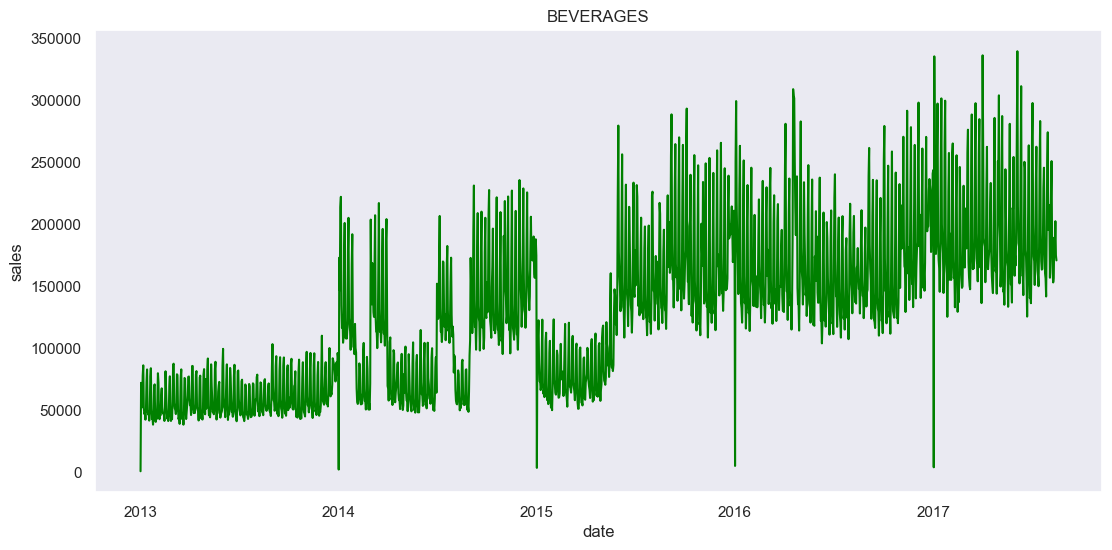

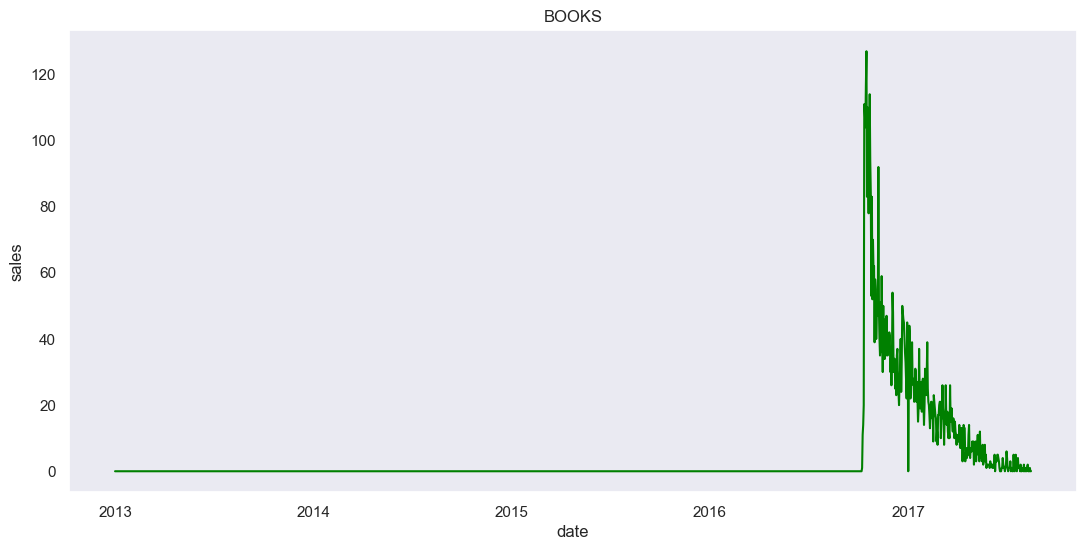

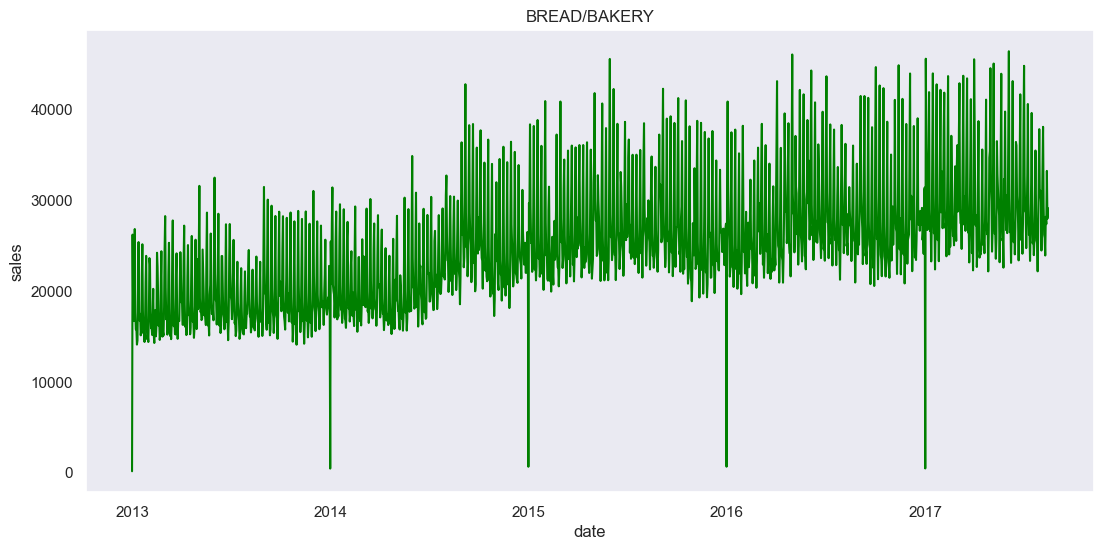

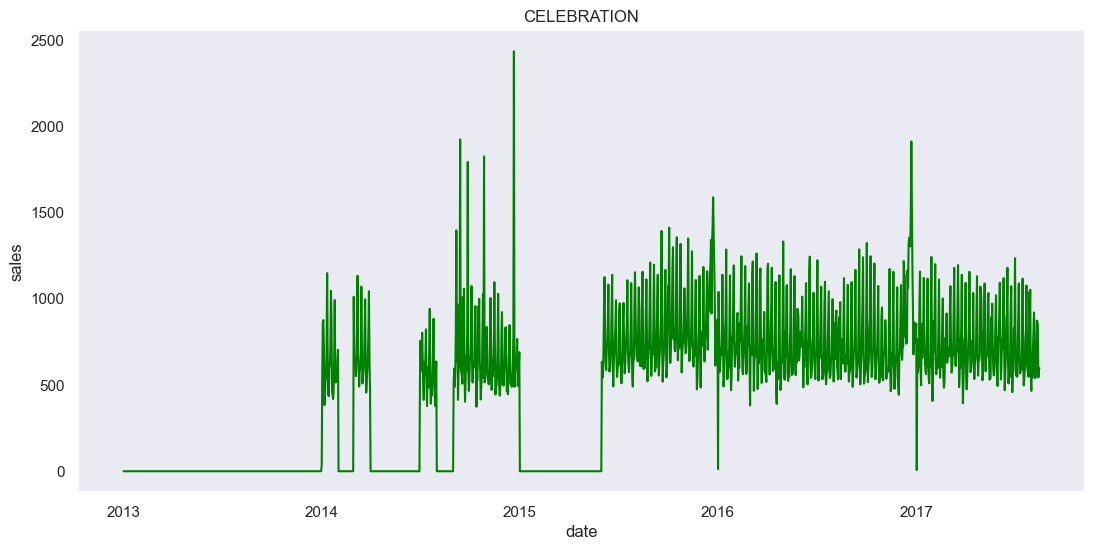

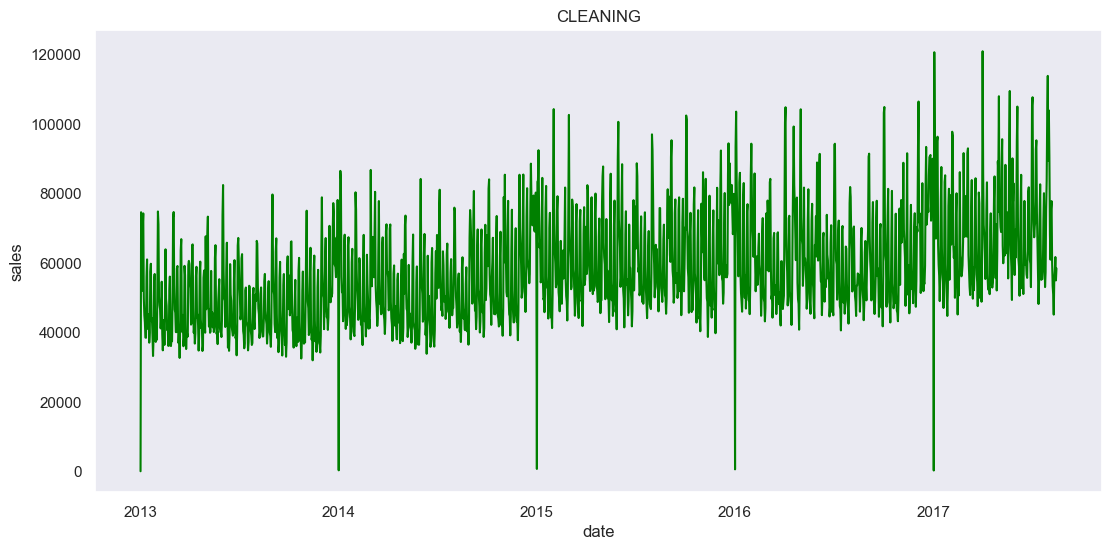

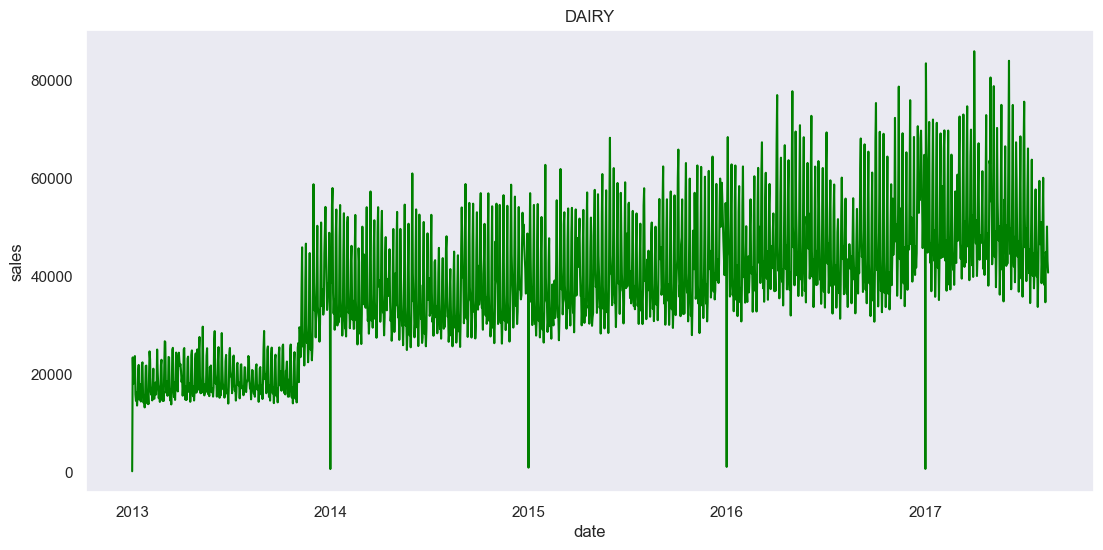

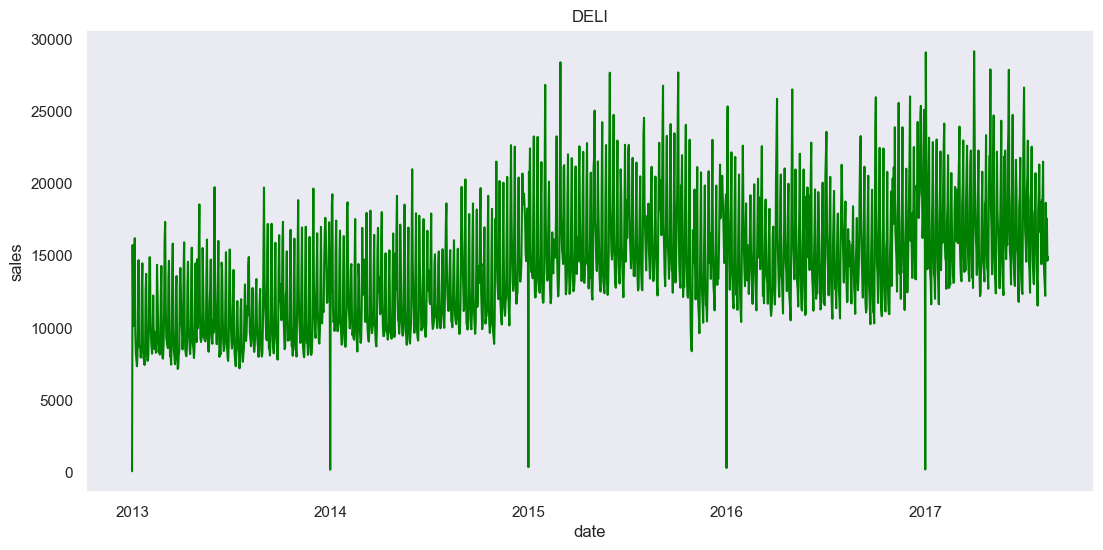

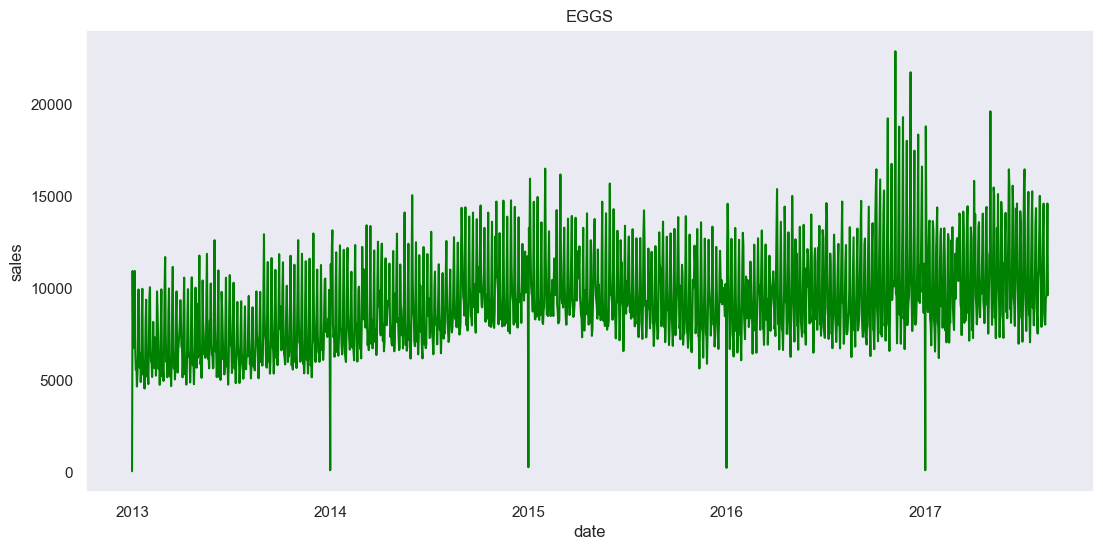

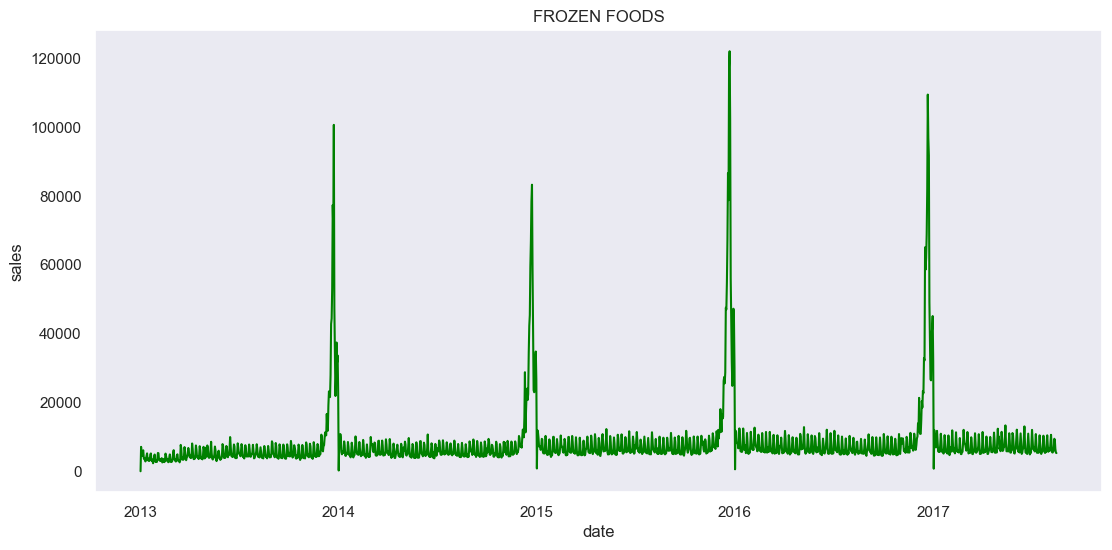

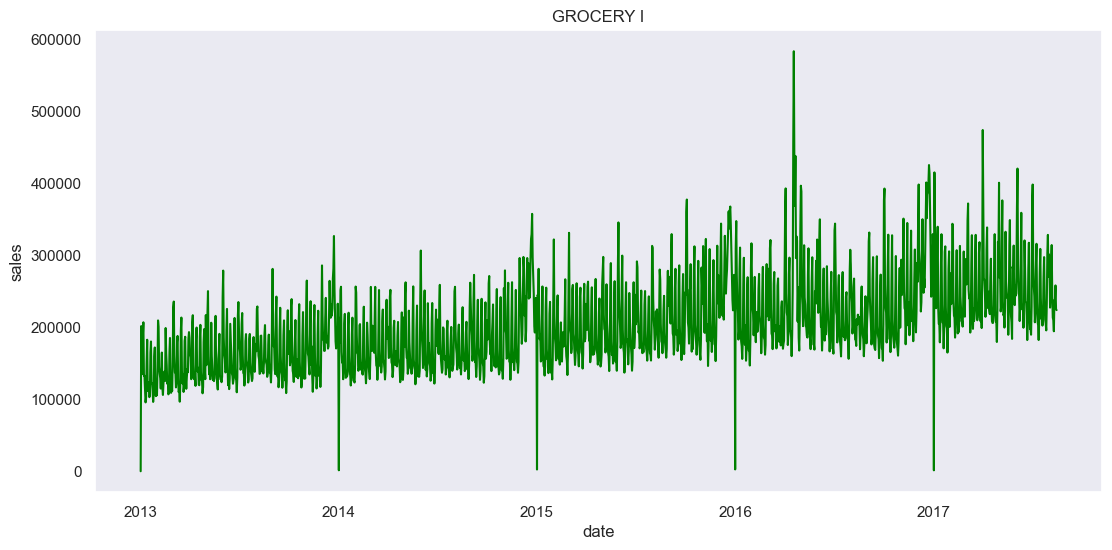

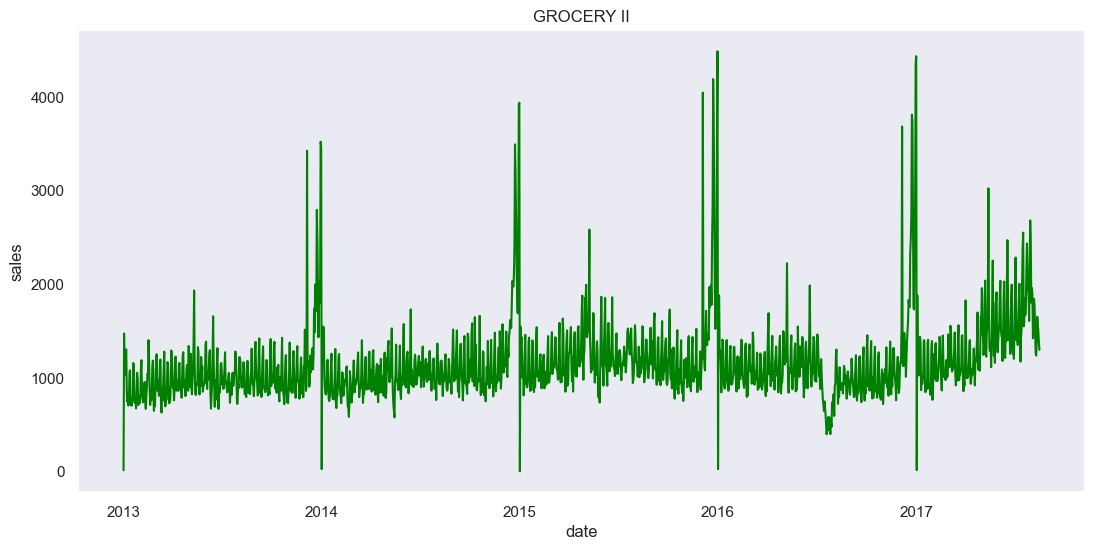

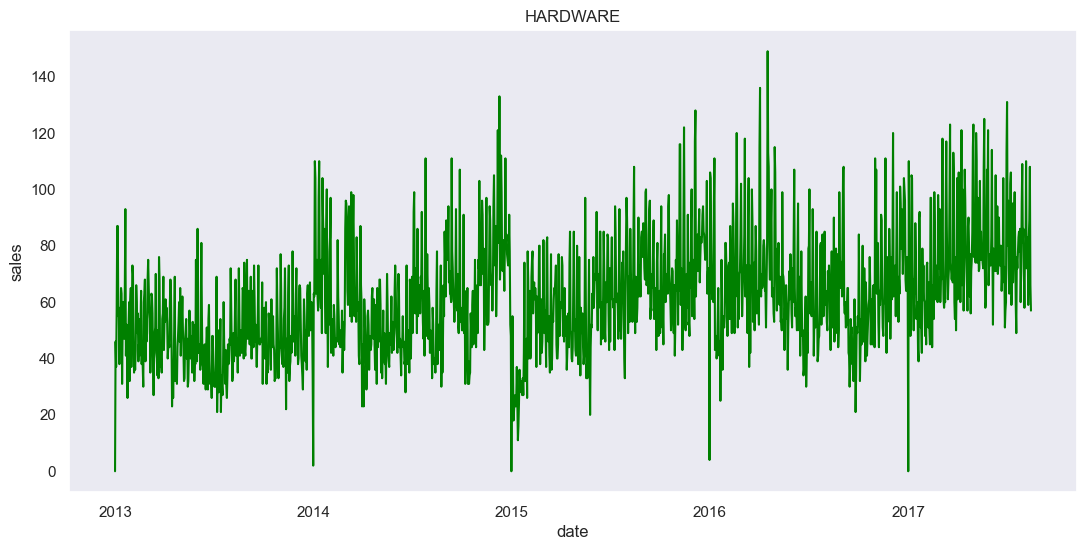

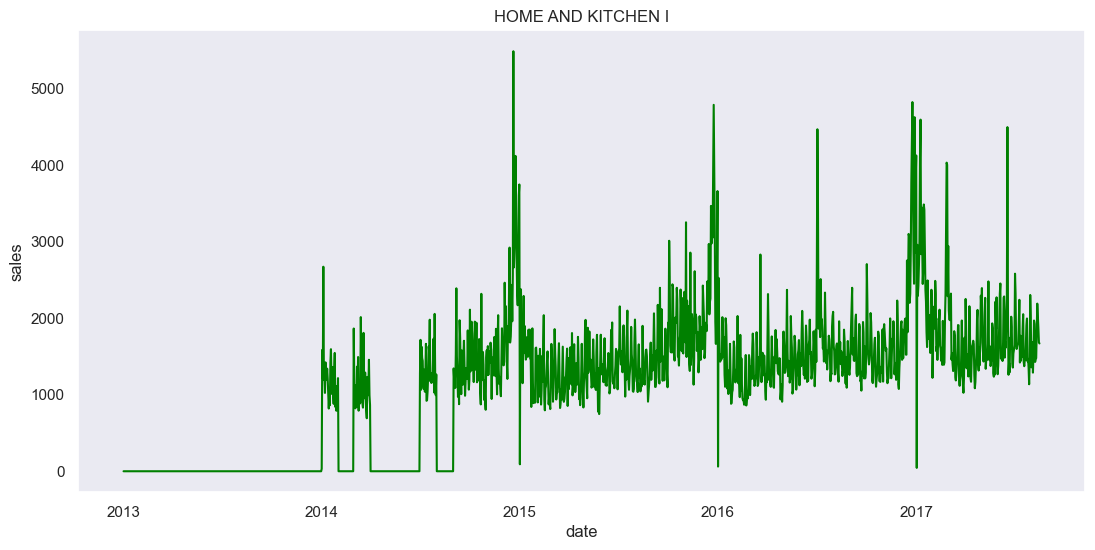

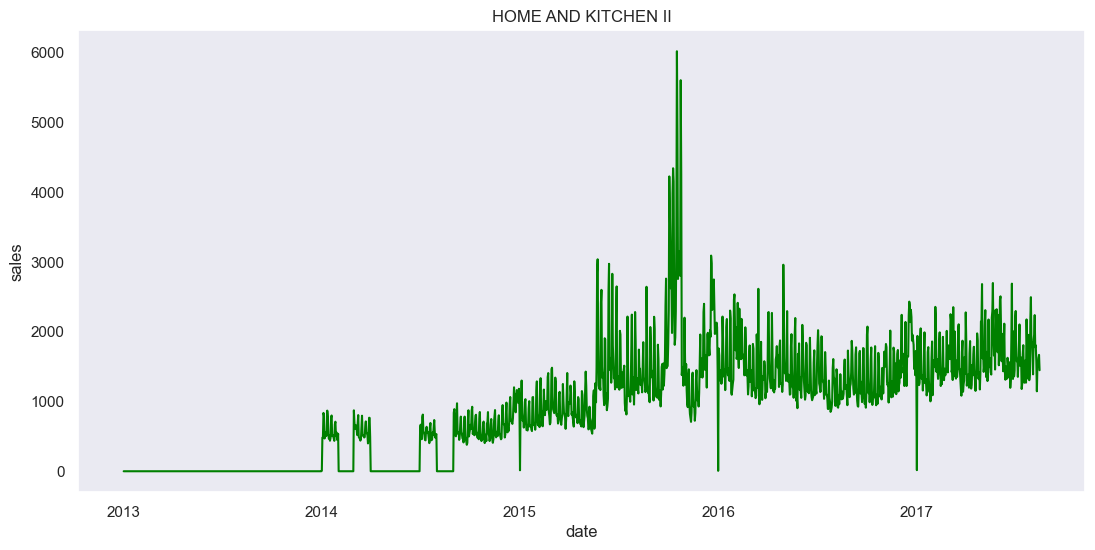

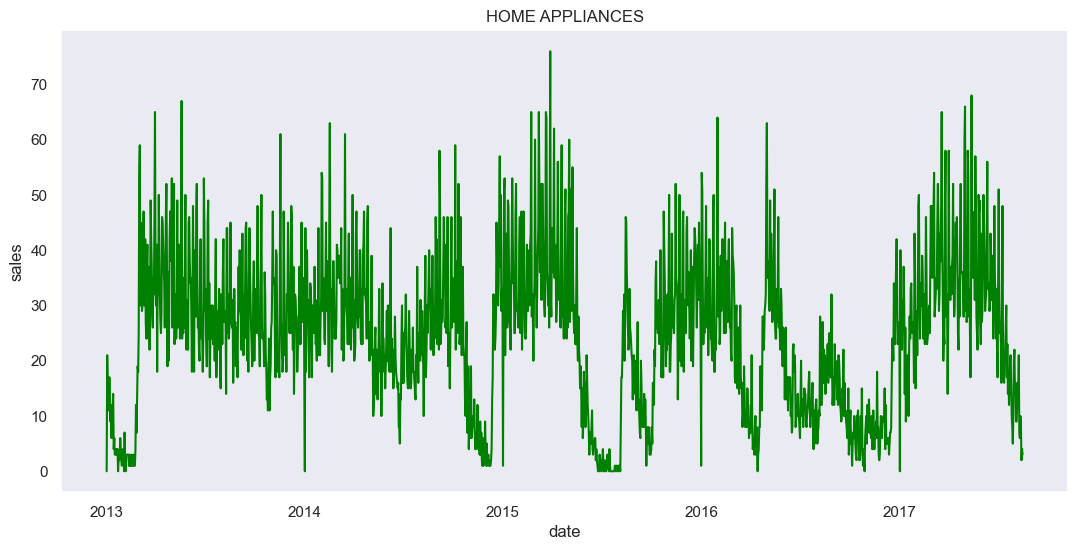

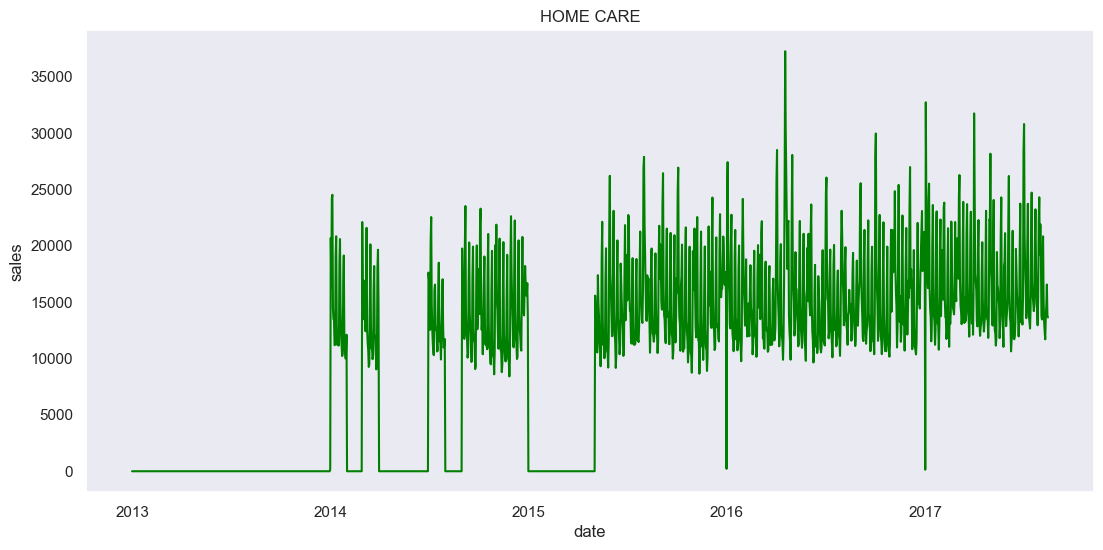

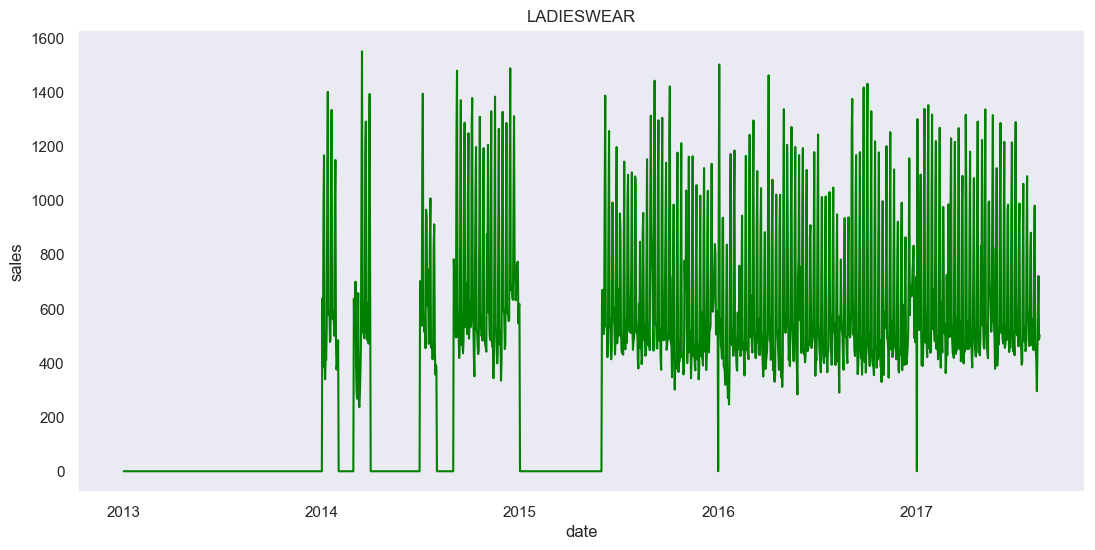

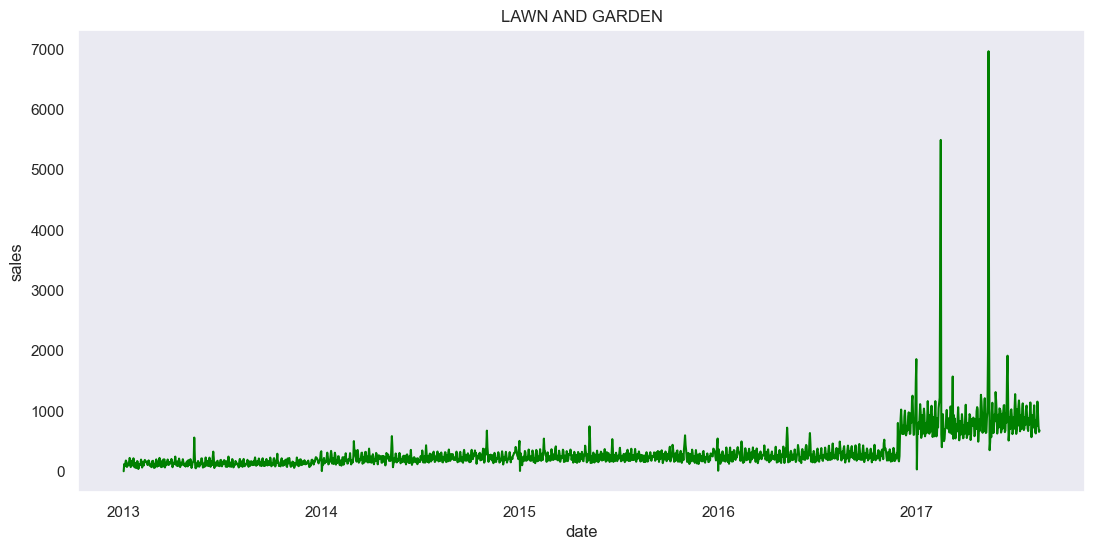

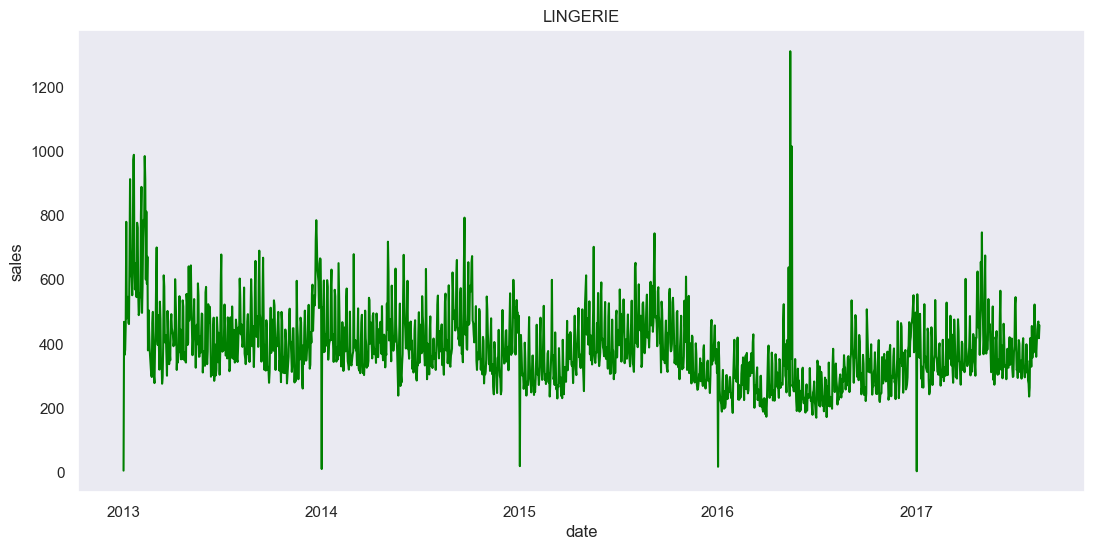

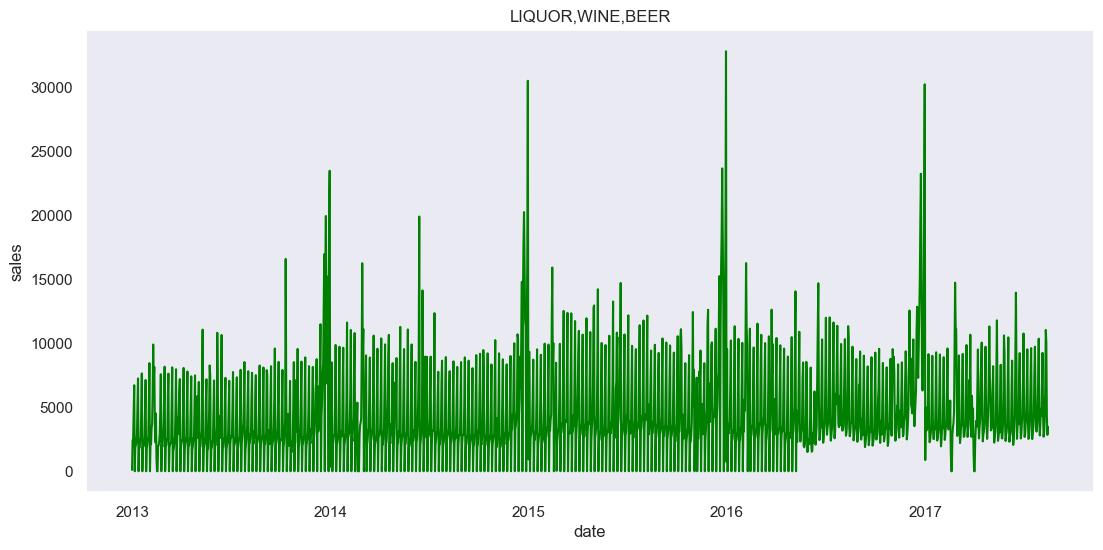

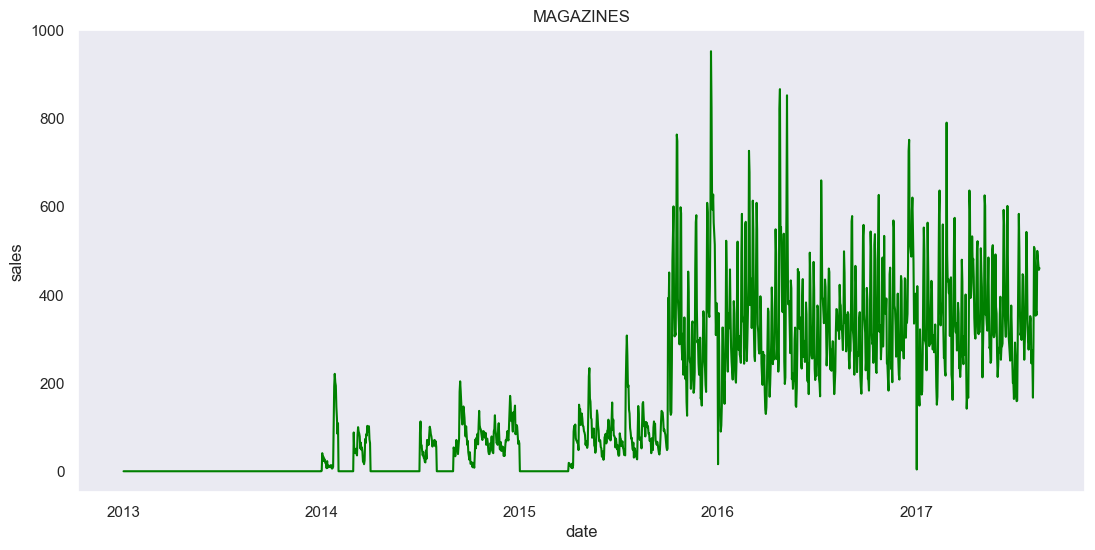

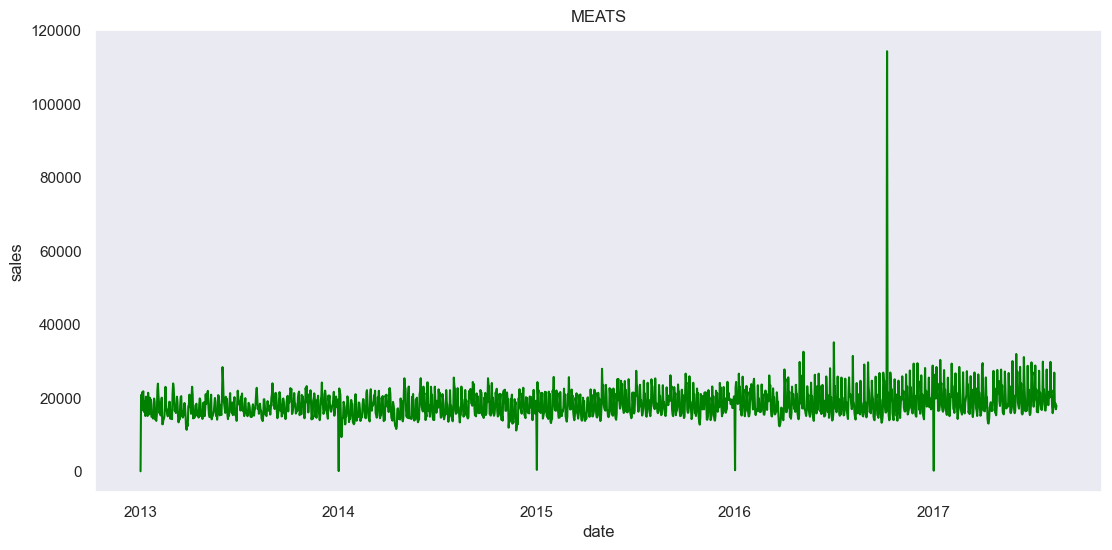

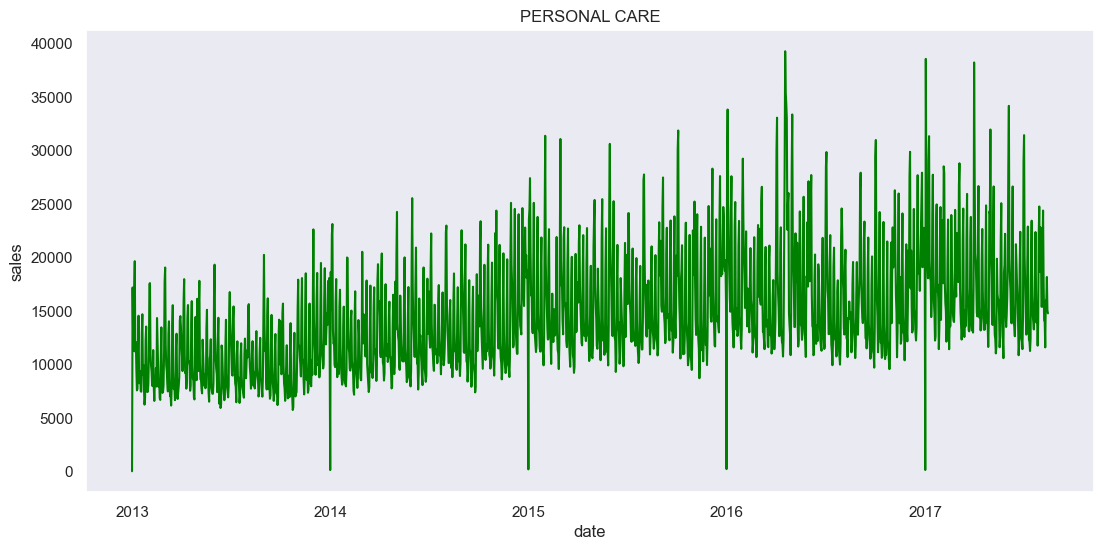

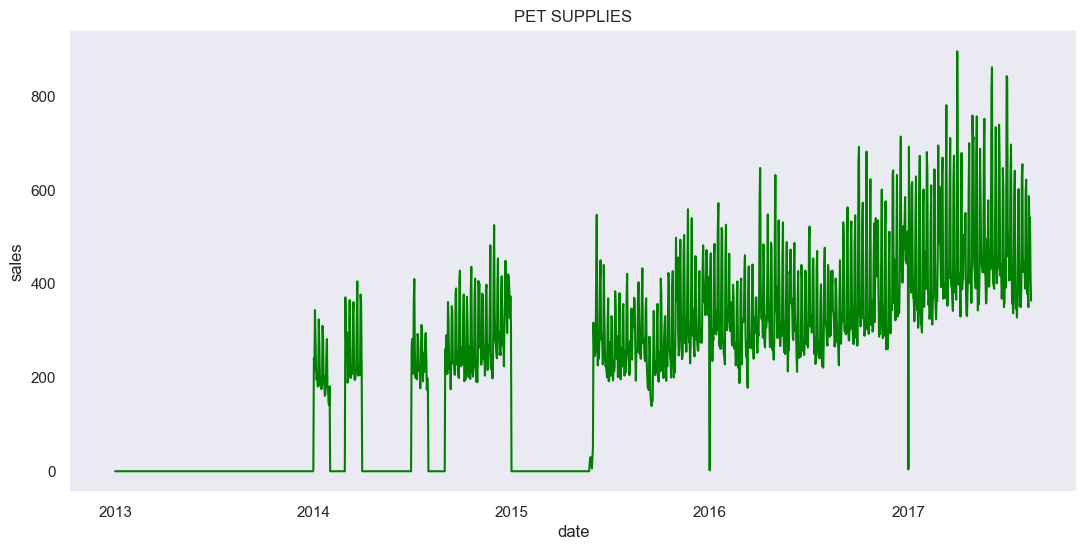

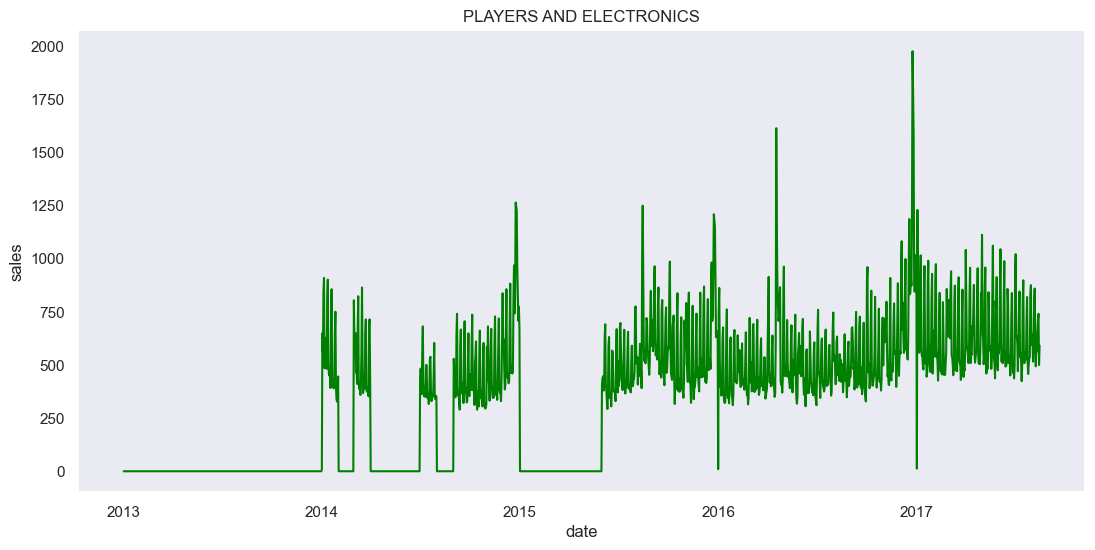

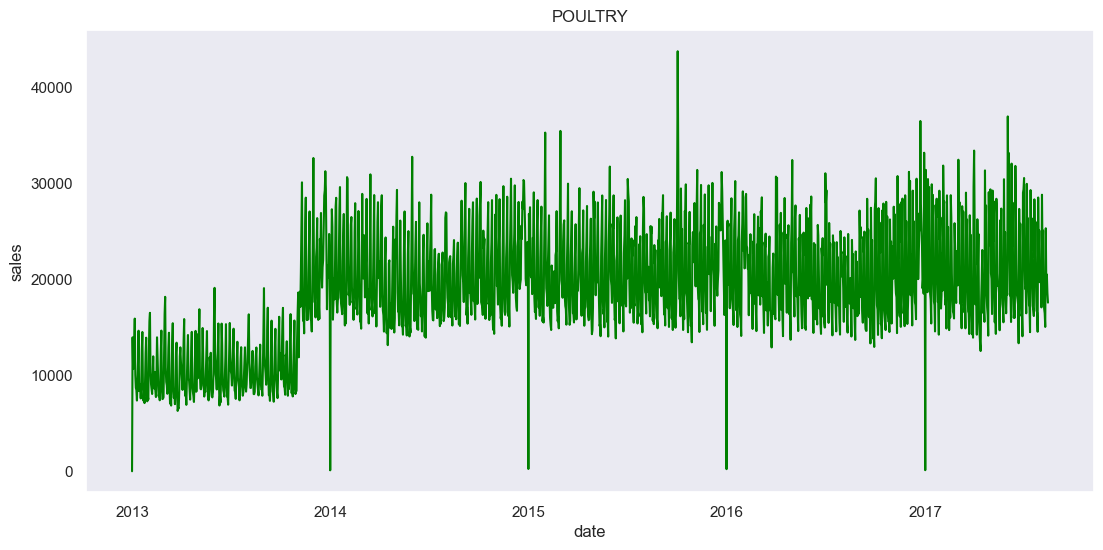

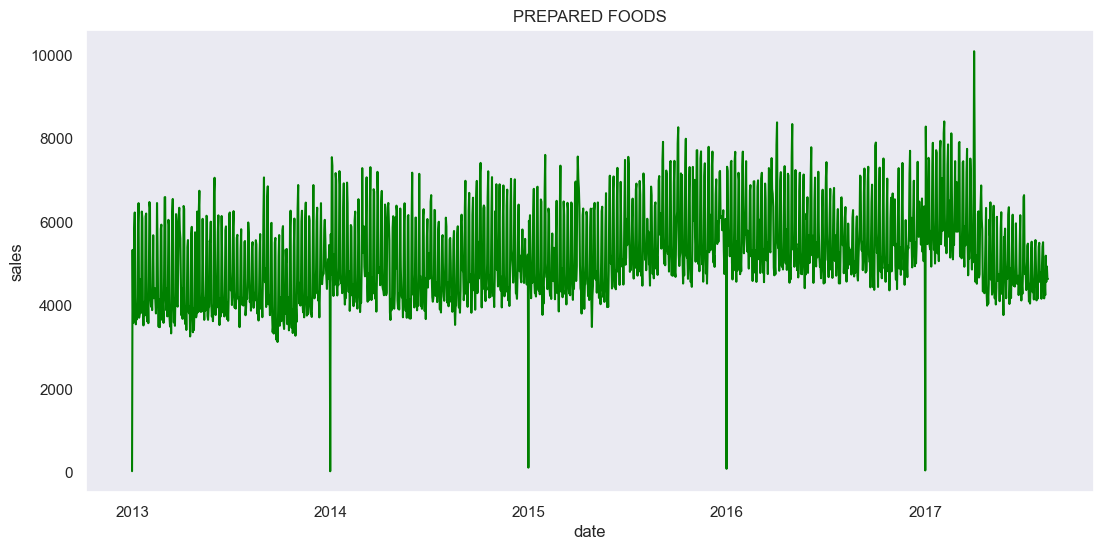

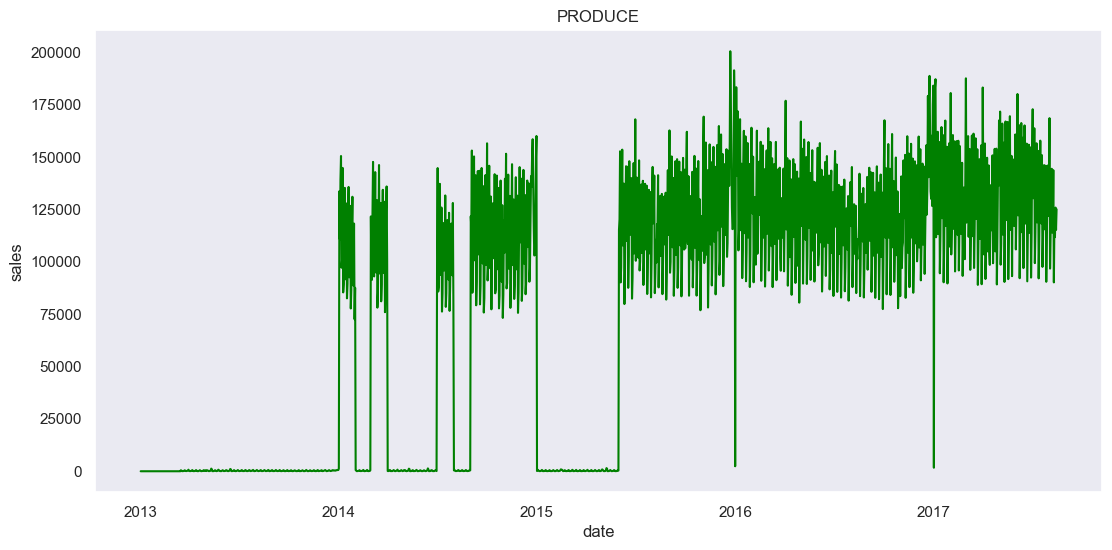

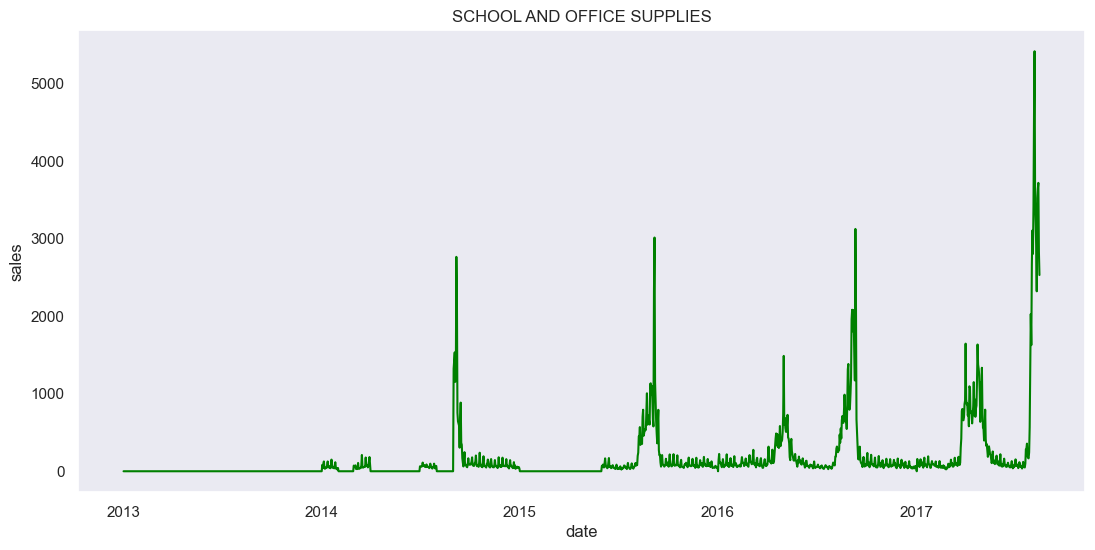

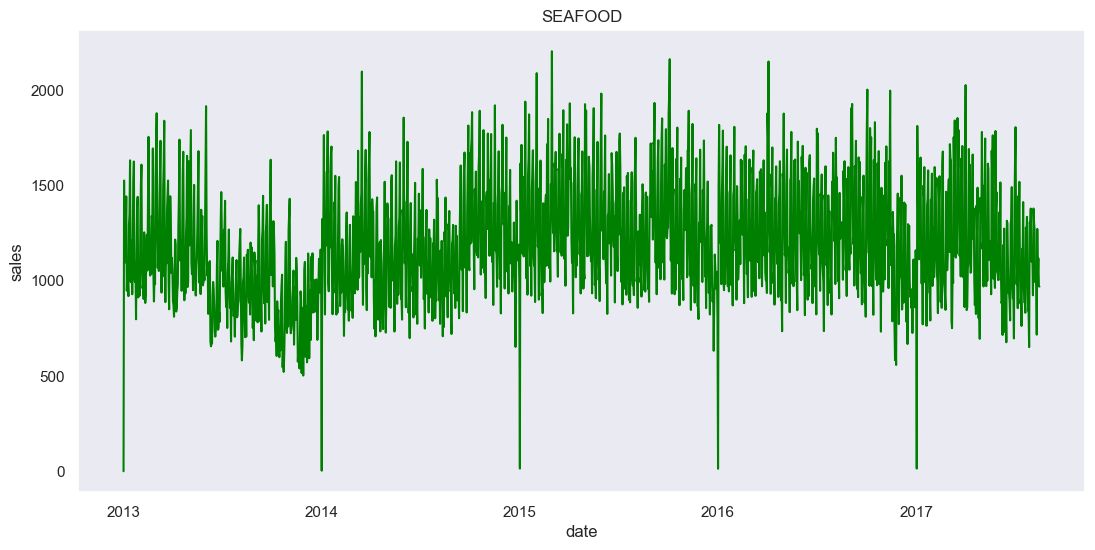

In [52]:
sns.set_theme(style="dark")

for column in total_sales_df.columns:
    plt.figure(figsize=(13, 6))
    sns.lineplot(data=total_sales_df, x=total_sales_df.index, y=column, color='green')

    plt.ylabel('sales')
    plt.title(column)
    plt.show()

In [53]:
def missing_data(input_data):
    
    total = input_data.isnull().sum()
    percent = (input_data.isnull().sum()/input_data.isnull().count()*100)
    table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    types = []
    for col in input_data.columns: 
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table["Types"] = types
    return(pd.DataFrame(table))

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [54]:
total_sales_df = total_sales_df[total_sales_df.index>='2015-08-15']

In [56]:
missing_data(total_sales_df)

Total  Percent    Types
family                                             
AUTOMOTIVE                      0     0.00  float64
BABY CARE                       0     0.00  float64
BEAUTY                          0     0.00  float64
BEVERAGES                       0     0.00  float64
BOOKS                           0     0.00  float64
BREAD/BAKERY                    0     0.00  float64
CELEBRATION                     0     0.00  float64
CLEANING                        0     0.00  float64
DAIRY                           0     0.00  float64
DELI                            0     0.00  float64
EGGS                            0     0.00  float64
FROZEN FOODS                    0     0.00  float64
GROCERY I                       0     0.00  float64
GROCERY II                      0     0.00  float64
HARDWARE                        0     0.00  float64
HOME AND KITCHEN I              0     0.00  float64
HOME AND KITCHEN II             0     0.00  float64
HOME APPLIANCES                 0     0.00  float64
HOME CARE                       0     0.00  float64
LADIESWEAR                      0     0.00  float64
LAWN AND GARDEN                 0     0.00  float64
LINGERIE                        0     0.00  float64
LIQUOR,WINE,BEER                0     0.00  float64
MAGAZINES                       0     0.00  float64
MEATS                           0     0.00  float64
PERSONAL CARE                   0     0.00  float64
PET SUPPLIES                    0     0.00  float64
PLAYERS AND ELECTRONICS         0     0.00  float64
POULTRY                         0     0.00  float64
PREPARED FOODS                  0     0.00  float64
PRODUCE                         0     0.00  float64
SCHOOL AND OFFICE SUPPLIES      0     0.00  float64
SEAFOOD                         0     0.00  float64

In [57]:
old_len = len(total_sales_df.columns)

#Keep categories with avg daily sales greater than $1000
total_sales_df = total_sales_df[total_sales_df.columns[total_sales_df.apply(np.mean,axis='rows') > 1000]]

print("Dropping "+ str(old_len-len(total_sales_df.columns))+" columns due to insufficient data volume.")

Dropping 14 columns due to insufficient data volume.


In [59]:
from scipy import stats

In [62]:
prediction_df_list = []

#Cleaning up dataframe using z-score to remove outliers which heavily bias the model
for column in total_sales_df.columns:
    df_clean = total_sales_df[[column]].reset_index()
    
    z = np.abs(stats.zscore(df_clean[column]))
    outlier_index = np.where(z > 2.7)[0] #As 99.7% of the data points lie between 3 standard deviations (Gaussian Distribution)
    print("Dropping "+str(len(outlier_index))+" rows for following category: "+column)
    df_clean.drop(index=outlier_index,inplace=True)
    df_clean.set_index('date', inplace=True)
    prediction_df_list.append(df_clean)

Dropping 7 rows for following category: BEVERAGES
Dropping 11 rows for following category: BREAD/BAKERY
Dropping 10 rows for following category: CLEANING
Dropping 10 rows for following category: DAIRY
Dropping 9 rows for following category: DELI
Dropping 12 rows for following category: EGGS
Dropping 22 rows for following category: FROZEN FOODS
Dropping 11 rows for following category: GROCERY I
Dropping 15 rows for following category: GROCERY II
Dropping 23 rows for following category: HOME AND KITCHEN I
Dropping 15 rows for following category: HOME AND KITCHEN II
Dropping 13 rows for following category: HOME CARE
Dropping 11 rows for following category: LIQUOR,WINE,BEER
Dropping 4 rows for following category: MEATS
Dropping 14 rows for following category: PERSONAL CARE
Dropping 5 rows for following category: POULTRY
Dropping 3 rows for following category: PREPARED FOODS
Dropping 4 rows for following category: PRODUCE
Dropping 4 rows for following category: SEAFOOD


In [68]:
for i in range(5):
    print(prediction_df_list[i].head())

family      BEVERAGES
date                 
2015-08-15  217135.00
2015-08-16  208213.00
2015-08-17  149741.00
2015-08-18  132609.00
2015-08-19  131368.00
family      BREAD/BAKERY
date                    
2015-08-15      32509.91
2015-08-16      34851.88
2015-08-17      26361.77
2015-08-18      23915.95
2015-08-19      23995.15
family      CLEANING
date                
2015-08-15  75837.00
2015-08-16  75824.00
2015-08-17  59718.00
2015-08-18  52749.00
2015-08-19  51157.00
family        DAIRY
date               
2015-08-15 48578.00
2015-08-16 50930.00
2015-08-17 38358.00
2015-08-18 33273.00
2015-08-19 35760.00
family         DELI
date               
2015-08-15 19946.92
2015-08-16 21178.46
2015-08-17 15755.02
2015-08-18 14119.25
2015-08-19 13250.04


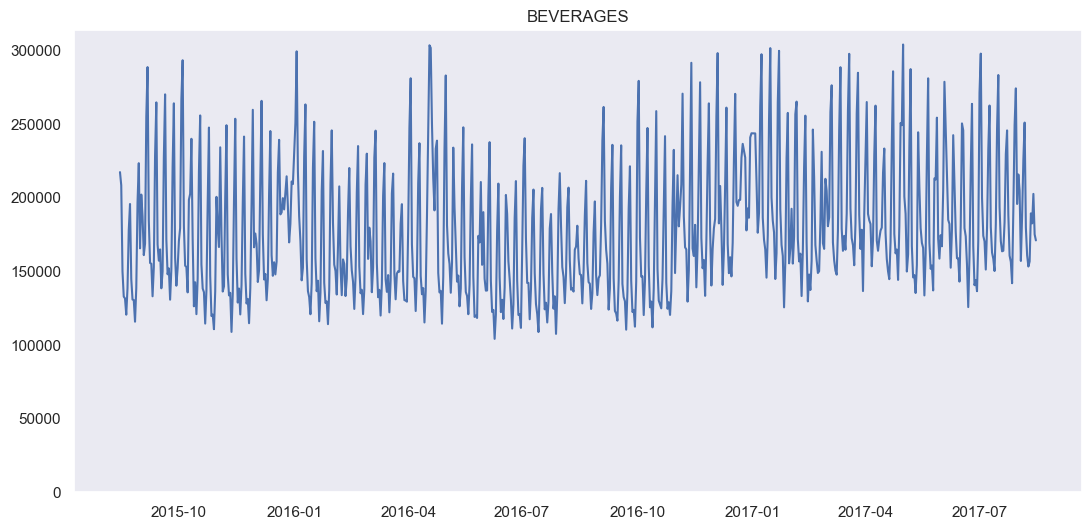

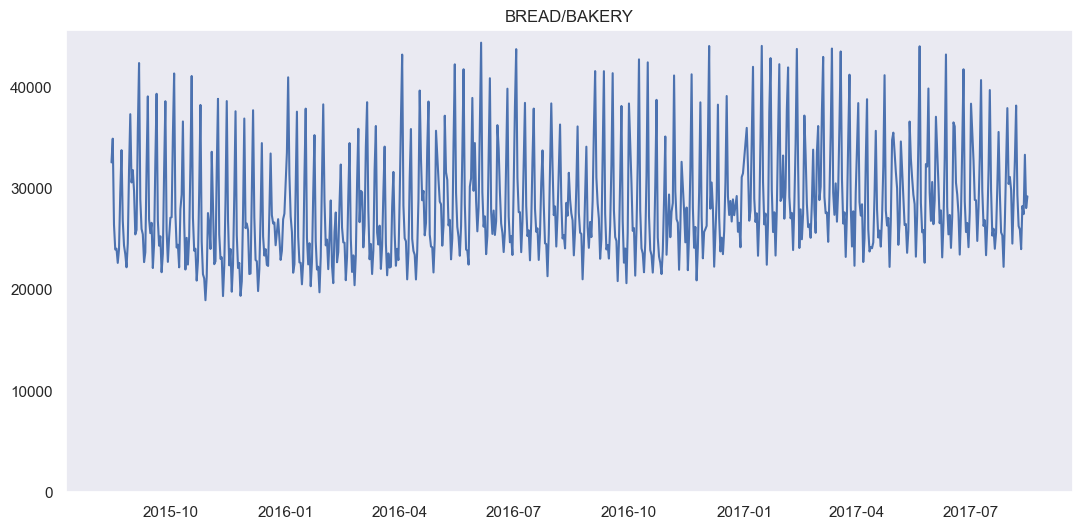

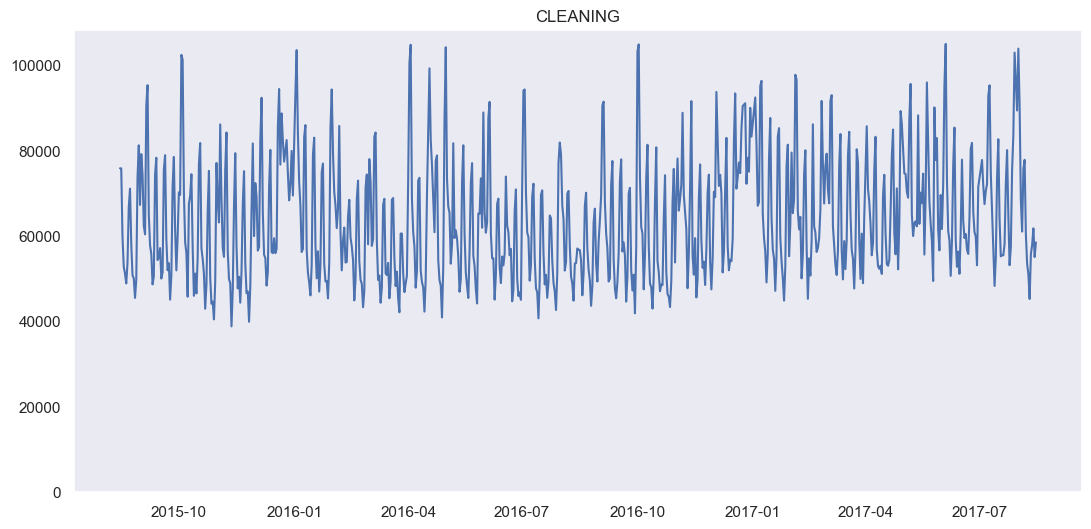

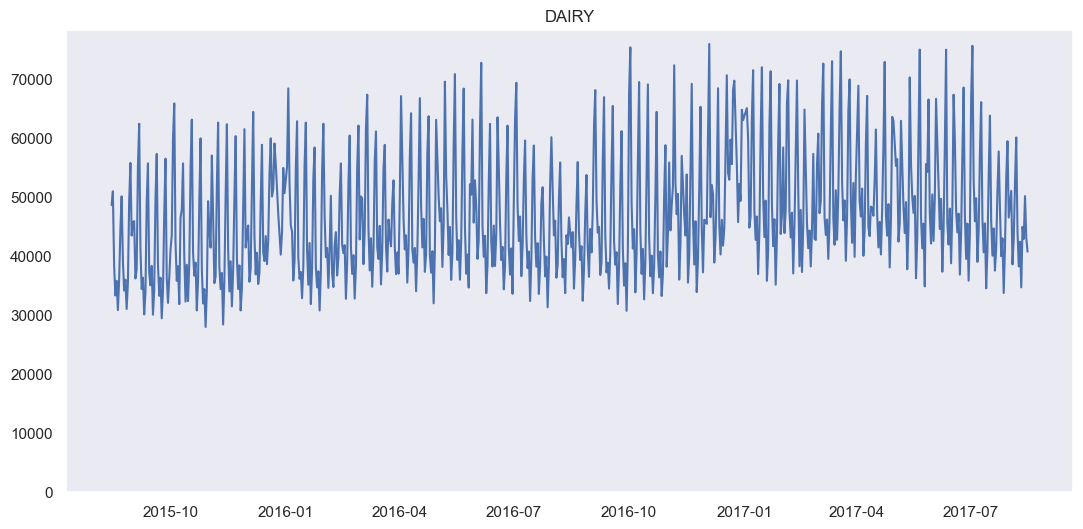

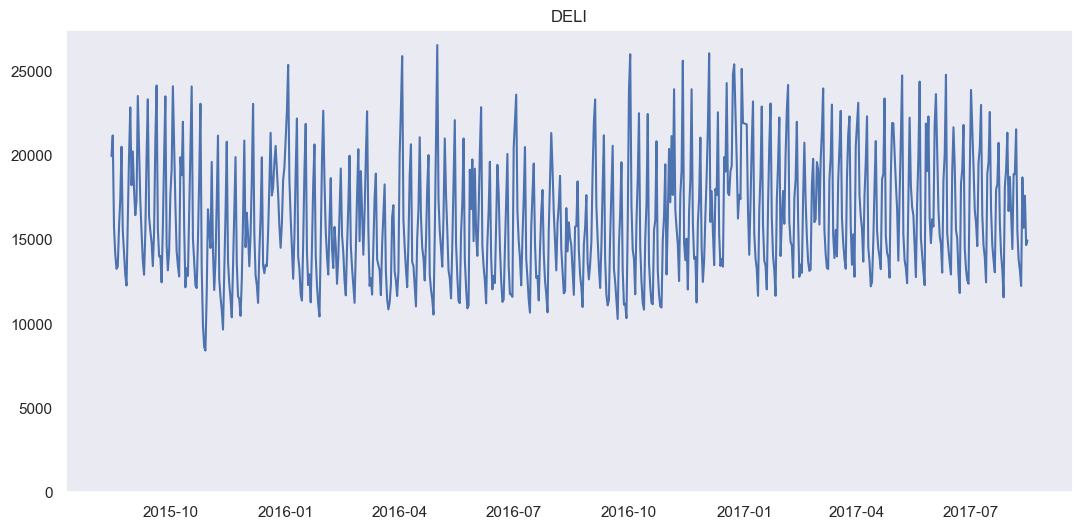

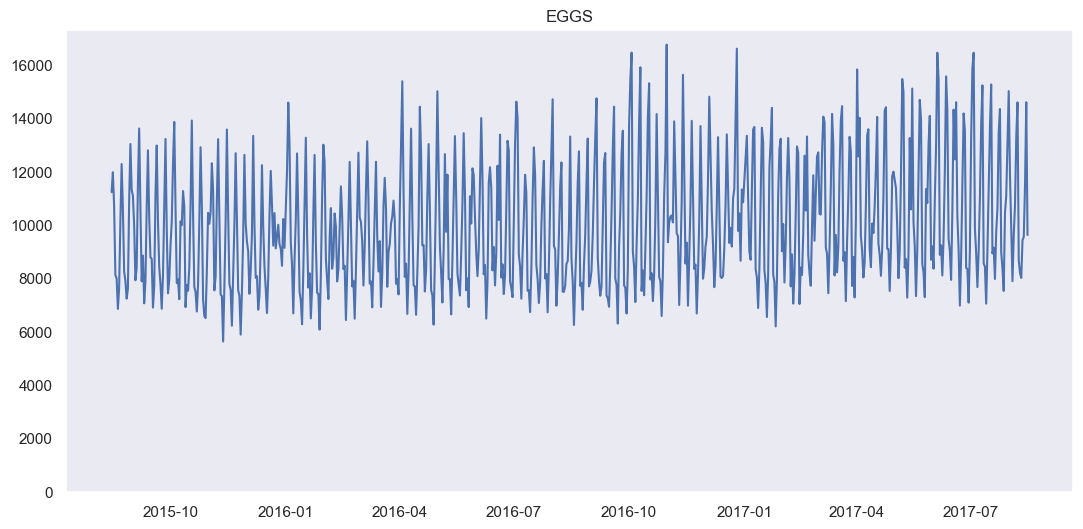

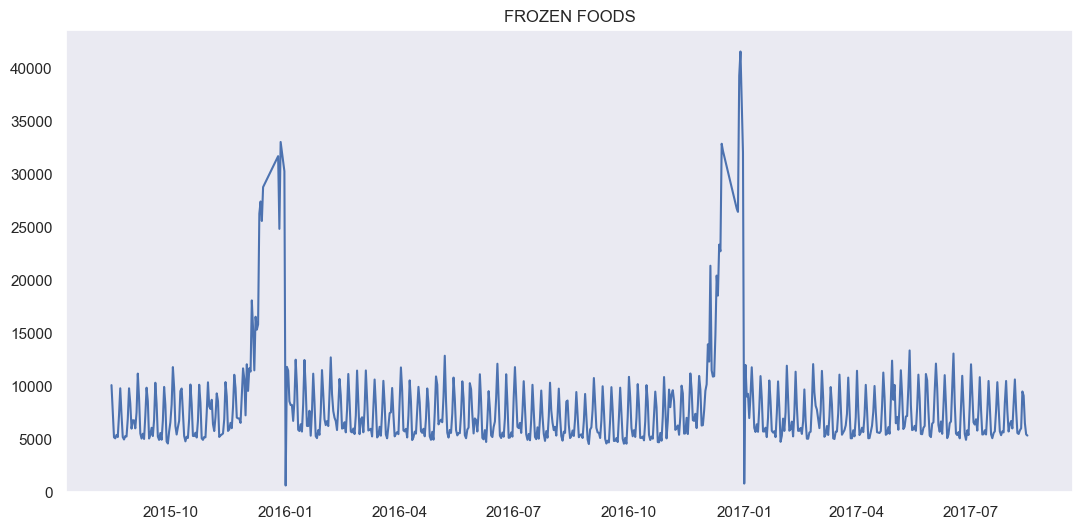

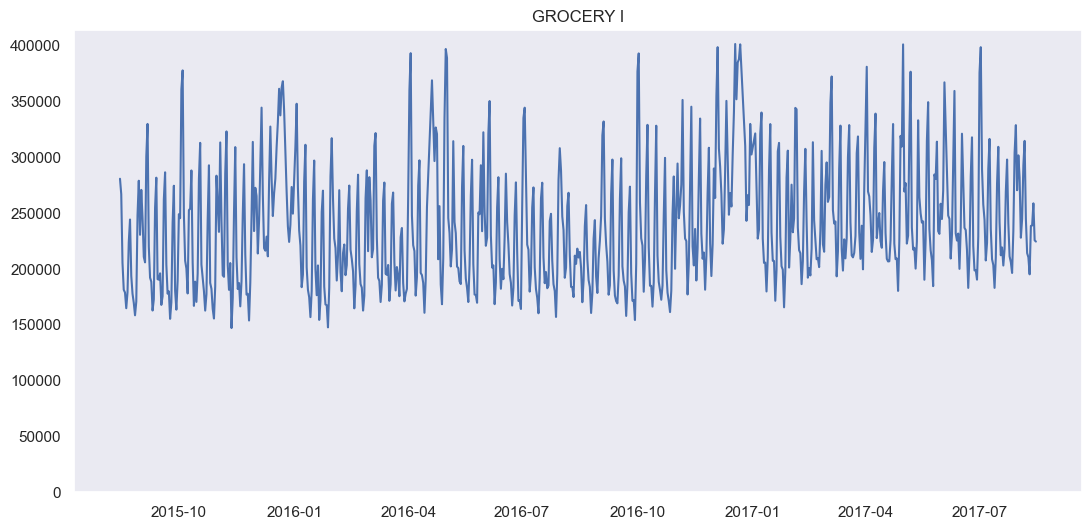

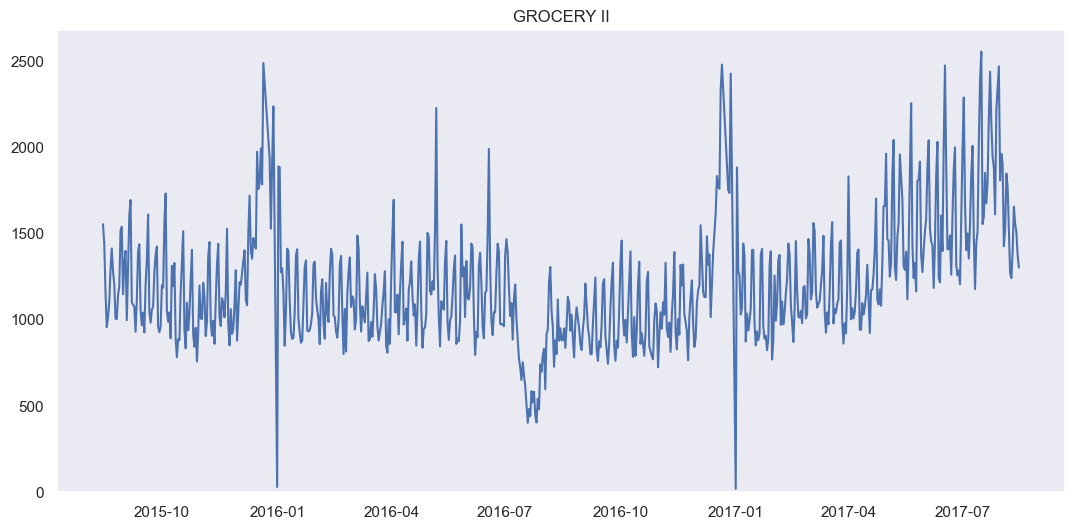

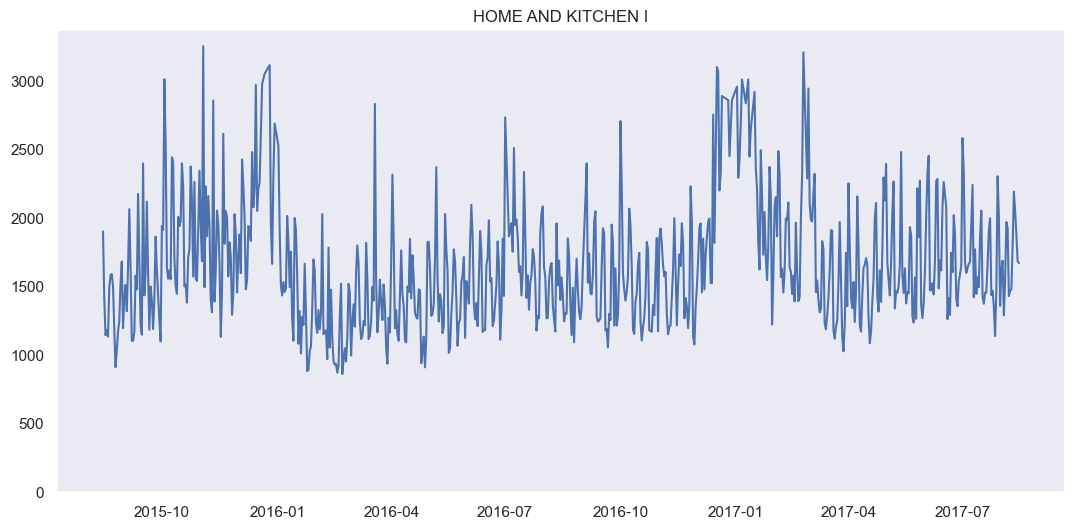

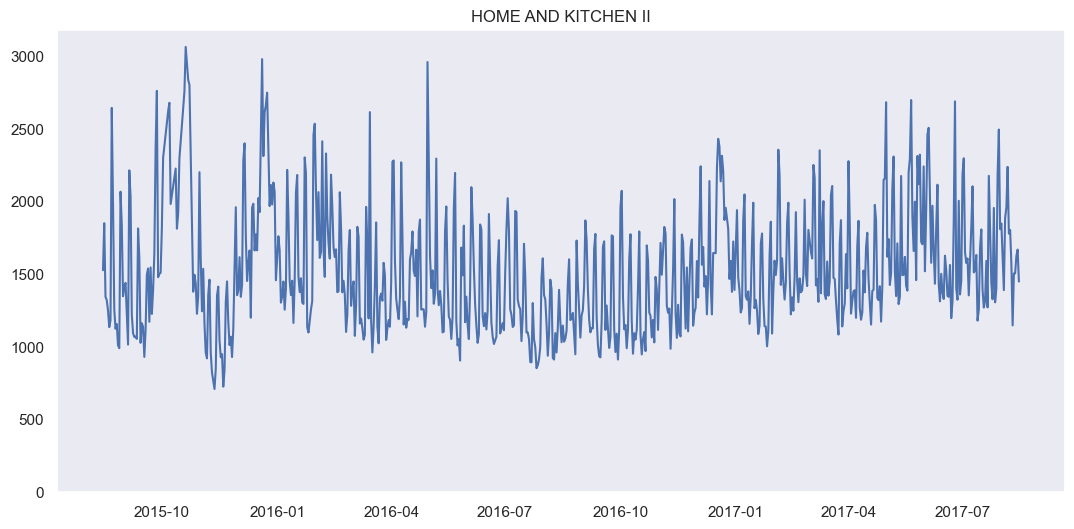

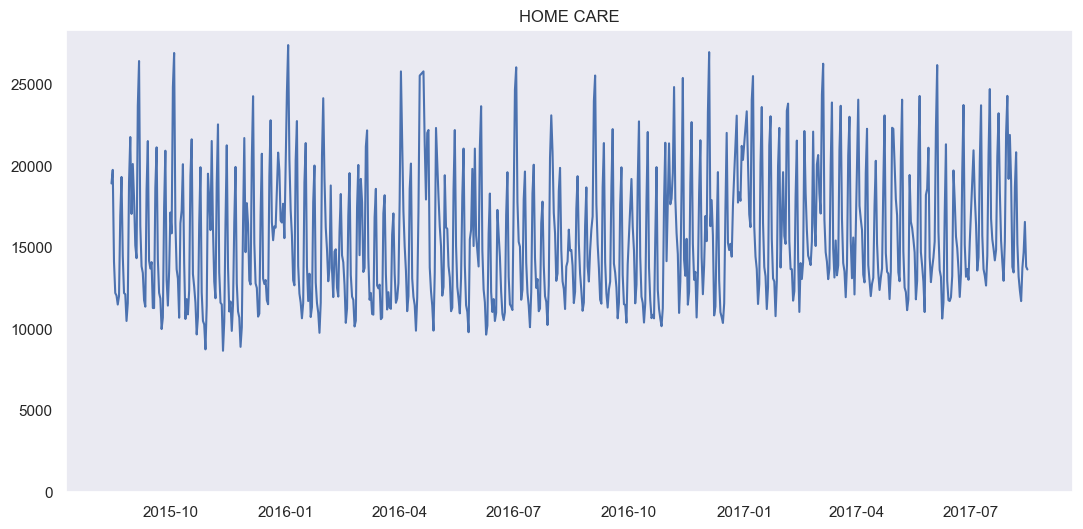

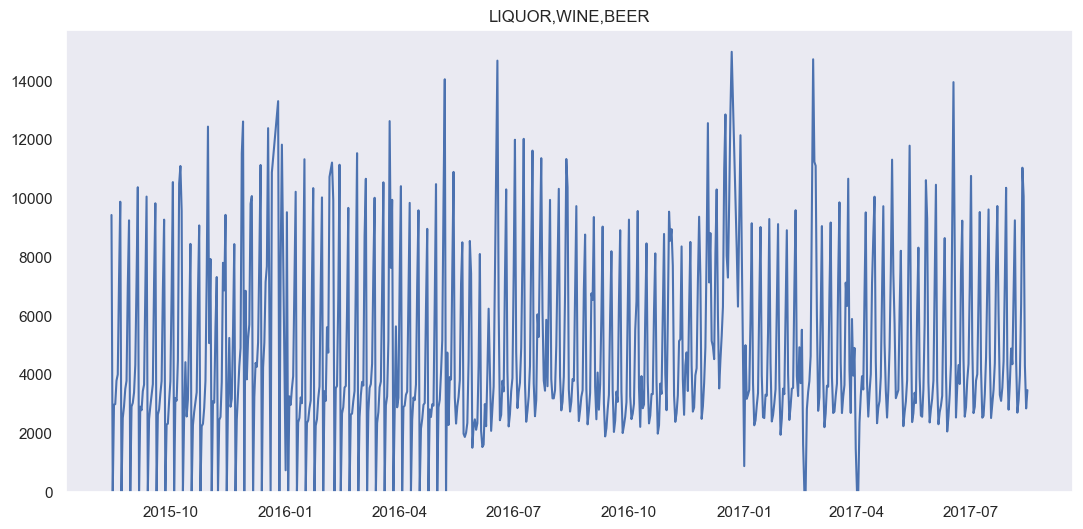

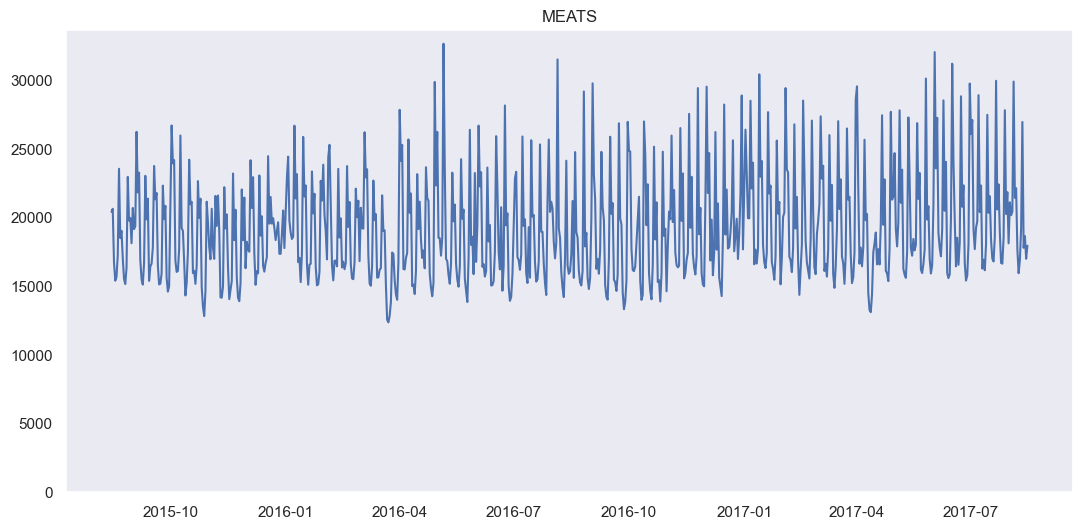

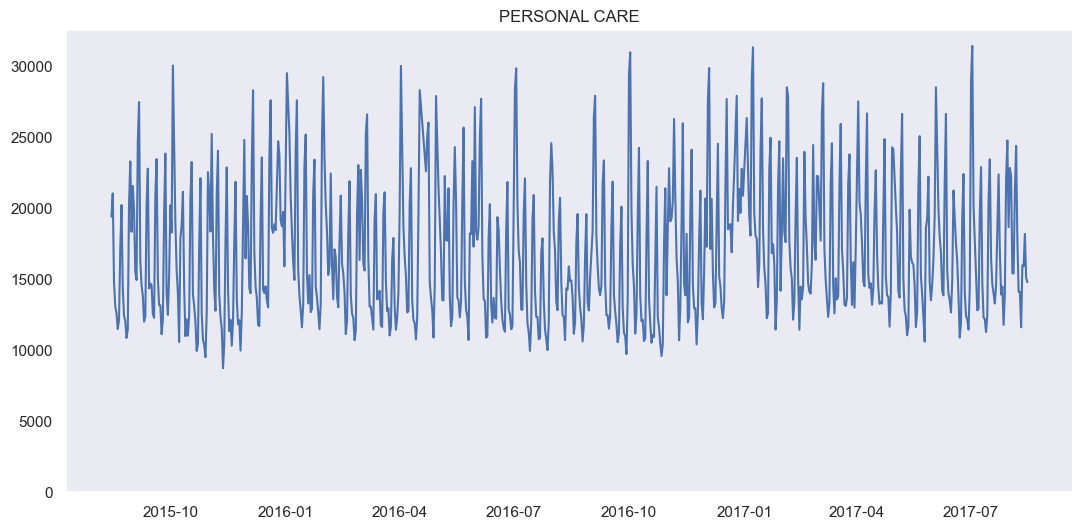

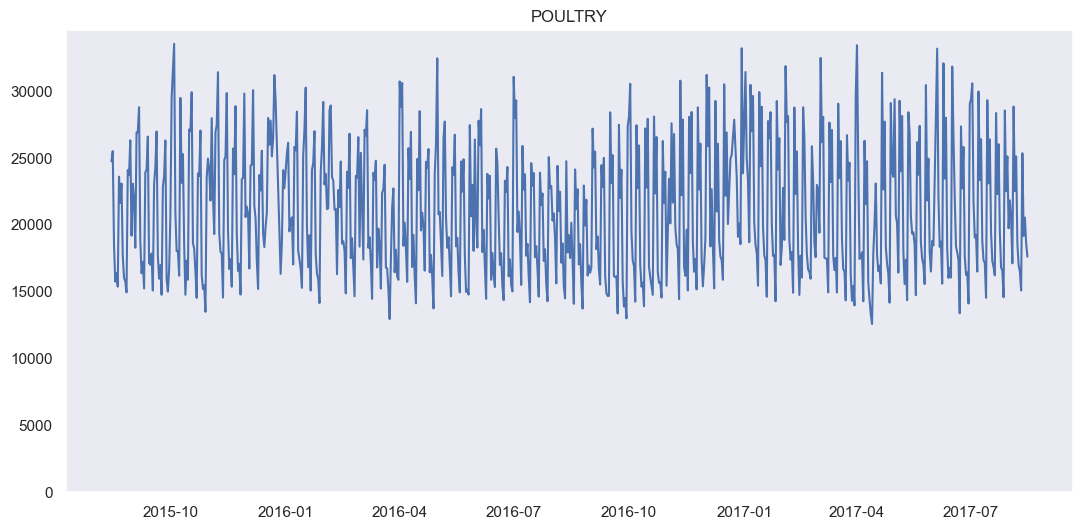

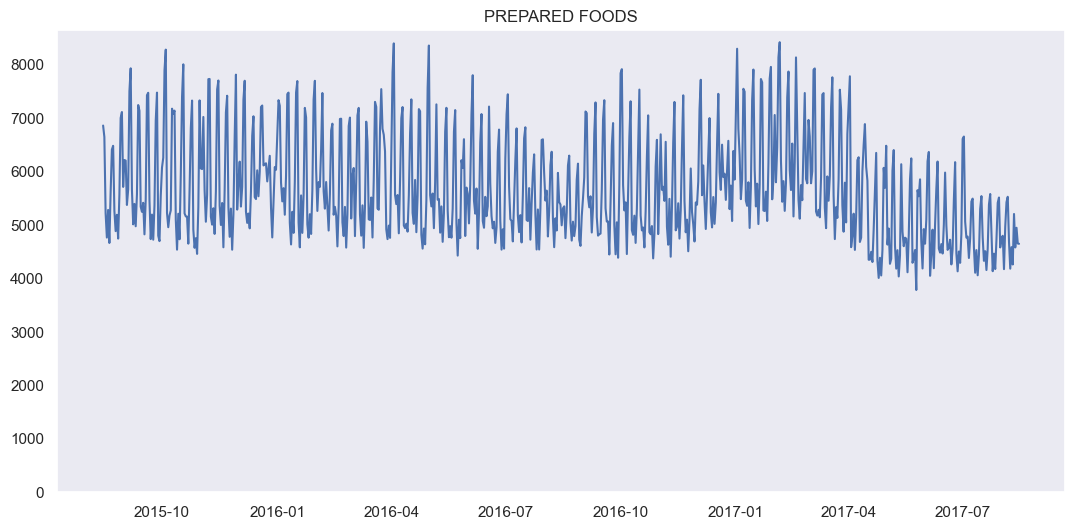

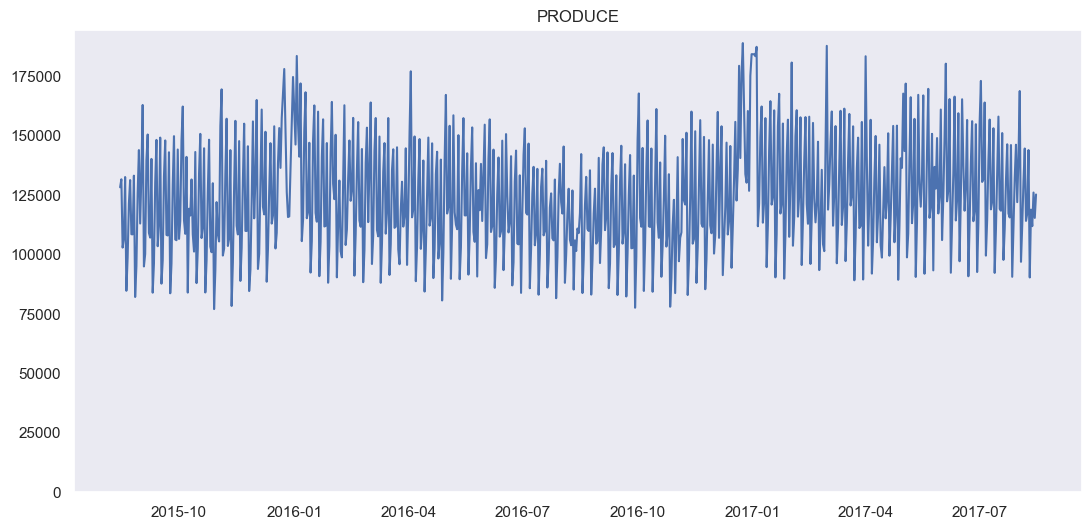

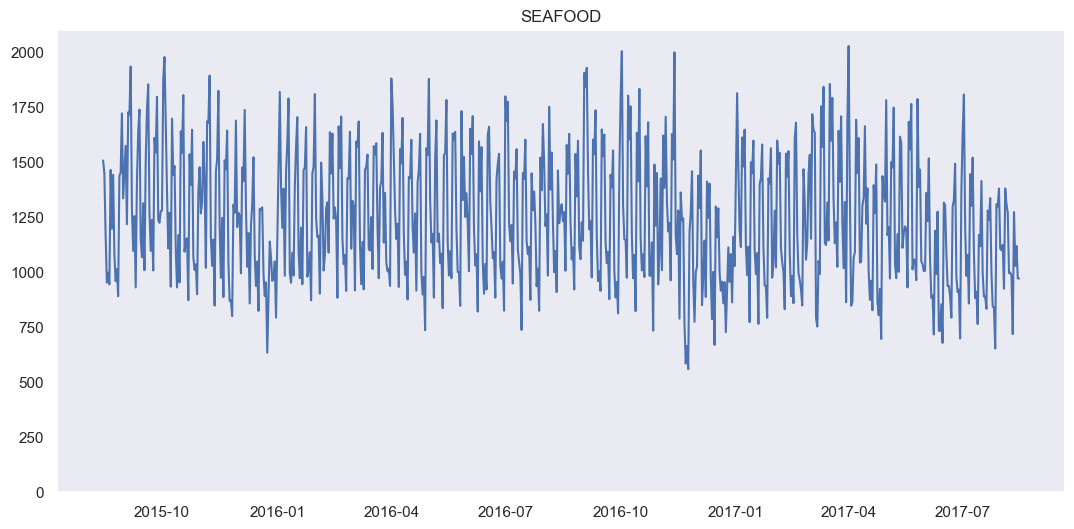

In [76]:
for i in range(len(prediction_df_list)):
    plt.figure(figsize=(13, 6))
    plt.plot(prediction_df_list[i])
    plt.title(prediction_df_list[i].columns[0])
    plt.ylim(ymin=0)
    plt.show()

In [77]:
#lets break it down by thirds for low, mid, high
avg_daily_sales = total_sales_df.apply(np.mean, axis=0).sort_values()
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])
low_vol_columns = avg_daily_sales[avg_daily_sales<=low].index.tolist()
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid].index

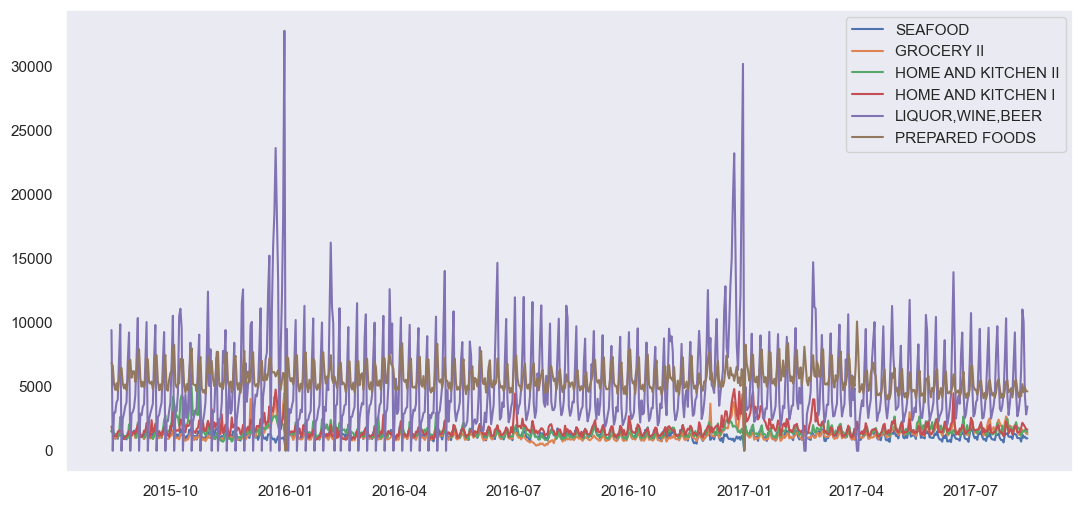

In [79]:
plt.figure(figsize=(13, 6))
plt.plot(total_sales_df[low_vol_columns])
plt.legend(low_vol_columns, loc='best')
plt.title('Low Volume Categories')
plt.show()

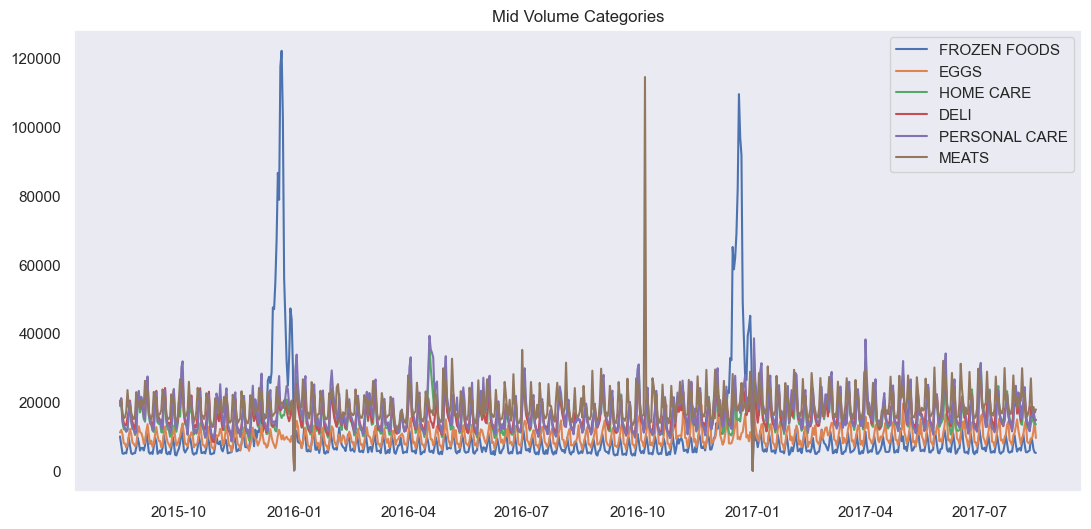

In [82]:
plt.figure(figsize=(13, 6))
plt.plot(total_sales_df[mid_vol_columns])
plt.legend(mid_vol_columns, loc='best')
plt.title('Mid Volume Categories')
plt.show()

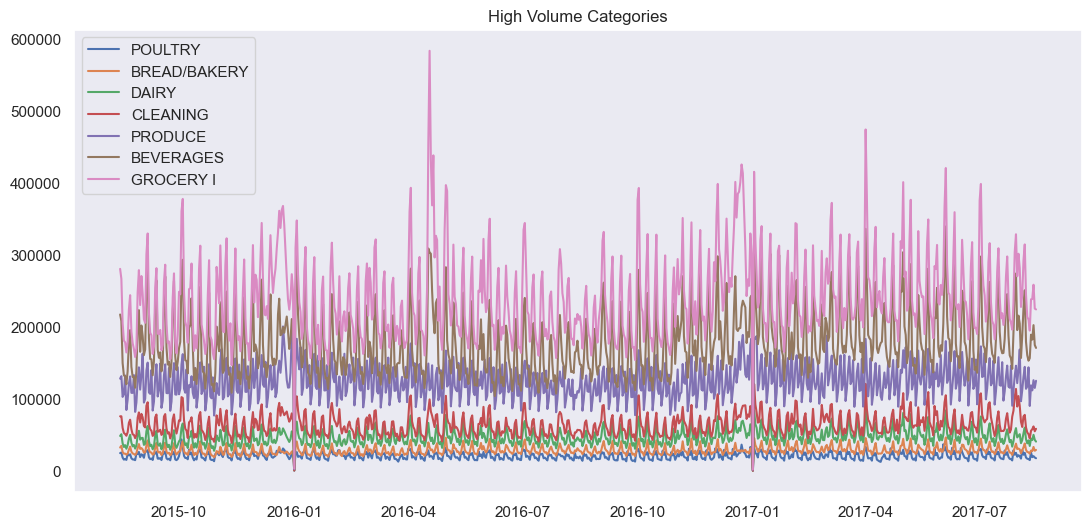

In [83]:
plt.figure(figsize=(13, 6))
plt.plot(total_sales_df[high_vol_columns])
plt.legend(high_vol_columns, loc='best')
plt.title('High Volume Categories')
plt.show()

In [ ]:
%pip install prophet

In [86]:
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

Importing plotly failed. Interactive plots will not work.


In [87]:
changepoint_prior_scale_range = np.linspace(0.001, 0.5, num=5).tolist()
seasonality_prior_scale_range = np.linspace(0.01, 10, num=5).tolist()
holidays_prior_scale_range = np.linspace(0.01, 10, num=5).tolist()

In [89]:
dicts = {}

for feature in total_sales_df.columns:
  
    category_df = total_sales_df[feature].copy().reset_index()
    category_df.columns = ["ds", "y"]

    category_df[["y"]] = category_df[["y"]].apply(pd.to_numeric)
    category_df["ds"] = pd.to_datetime(category_df["ds"])
    
    param_grid = {  
        "changepoint_prior_scale": changepoint_prior_scale_range,
        "seasonality_prior_scale": seasonality_prior_scale_range }
        #'holidays_prior_scale': holidays_prior_scale_range,
        #'seasonality_mode': seasonality_mode_options,
        #'changepoint_range': changepoint_range_range,

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    mapes = [] 

    # Use cross validation to evaluate all parameters
    for params in all_params:
        m = Prophet(**params).fit(category_df)  # Fit model with given params
        df_cv = cross_validation(m, initial="365 days", period="30 days", horizon = "30 days") #took parallel out
        df_p = performance_metrics(df_cv, rolling_window=1)
        print(df_p)
        mapes.append(df_p["mape"].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results["mape"] = mapes
    
    print(feature)
    print(tuning_results.head())

    params_dict = dict(tuning_results.sort_values("mape").reset_index(drop=True).iloc[0])
    params_dict["column"] = feature 
    
    dicts[feature] = params_dict

19:14:07 - cmdstanpy - INFO - Chain [1] start processing
19:14:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:14:08 - cmdstanpy - INFO - Chain [1] start processing
19:14:08 - cmdstanpy - INFO - Chain [1] done processing
19:14:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:08 - cmdstanpy - INFO - Chain [1] start processing
19:14:09 - cmdstanpy - INFO - Chain [1] done processing
19:14:09 - cmdstanpy - INFO - Chain [1] start processing
19:14:09 - cmdstanpy - INFO - Chain [1] done processing
19:14:09 - cmdstanpy - INFO - Chain [1] start processing
19:14:09 - cmdstanpy - INFO - Chain [1] done processing
19:14:10 - cmdstanpy - INFO - Chain [1] start processing
19:14:10 - cmdstanpy - INFO - Chain [1] done processing
19:14:11 - cmdstanpy - INFO - Chain [1] start processing
19:14:11 - cmdstanpy - INFO - Chain [1] done processing
19:14:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:11 -

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 2046068804.79 45233.49 34229.75  0.33   0.16   0.20      0.63


19:14:24 - cmdstanpy - INFO - Chain [1] start processing
19:14:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:14:24 - cmdstanpy - INFO - Chain [1] start processing
19:14:25 - cmdstanpy - INFO - Chain [1] done processing
19:14:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:25 - cmdstanpy - INFO - Chain [1] start processing
19:14:31 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:38 - cmdstanpy - INFO - Chain [1] start processing
19:14:39 - cmdstanpy - INFO - Chain [1] done processing
19:14:45 - cmdstanpy - INFO - Chain [1] start processing
19:14:47 - cmdstanpy - INFO - Chain [1] done processing
19:14:53 - cmdstanpy - INFO - Chain [1] start processing
19:14:54 - cmdstanpy - INFO - Chain [1] done processing
19:14:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:14:54 -

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 2184834031.78 46742.21 36720.37  0.37   0.17   0.22      0.54


19:15:28 - cmdstanpy - INFO - Chain [1] start processing
19:15:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:15:29 - cmdstanpy - INFO - Chain [1] start processing
19:15:29 - cmdstanpy - INFO - Chain [1] done processing
19:15:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:29 - cmdstanpy - INFO - Chain [1] start processing
19:15:32 - cmdstanpy - INFO - Chain [1] done processing
19:15:33 - cmdstanpy - INFO - Chain [1] start processing
19:15:33 - cmdstanpy - INFO - Chain [1] done processing
19:15:34 - cmdstanpy - INFO - Chain [1] start processing
19:15:34 - cmdstanpy - INFO - Chain [1] done processing
19:15:34 - cmdstanpy - INFO - Chain [1] start processing
19:15:34 - cmdstanpy - INFO - Chain [1] done processing
19:15:35 - cmdstanpy - INFO - Chain [1] start processing
19:15:35 - cmdstanpy - INFO - Chain [1] done processing
19:15:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:35 -

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 2167461343.34 46556.00 36444.87  0.37   0.17   0.22      0.55


19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:52 - cmdstanpy - INFO - Chain [1] done processing
19:15:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:52 - cmdstanpy - INFO - Chain [1] start processing
19:15:55 - cmdstanpy - INFO - Chain [1] done processing
19:15:55 - cmdstanpy - INFO - Chain [1] start processing
19:15:55 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:57 - cmdstanpy - INFO - Chain [1] start processing
19:15:57 - cmdstanpy - INFO - Chain [1] done processing
19:15:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] done processing
19:15:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:15:58 -

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 2156000724.35 46432.75 36236.30  0.36   0.17   0.22      0.57


19:16:17 - cmdstanpy - INFO - Chain [1] start processing
19:16:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:16:18 - cmdstanpy - INFO - Chain [1] start processing
19:16:18 - cmdstanpy - INFO - Chain [1] done processing
19:16:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:18 - cmdstanpy - INFO - Chain [1] start processing
19:16:21 - cmdstanpy - INFO - Chain [1] done processing
19:16:21 - cmdstanpy - INFO - Chain [1] start processing
19:16:21 - cmdstanpy - INFO - Chain [1] done processing
19:16:22 - cmdstanpy - INFO - Chain [1] start processing
19:16:22 - cmdstanpy - INFO - Chain [1] done processing
19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] done processing
19:16:24 - cmdstanpy - INFO - Chain [1] start processing
19:16:24 - cmdstanpy - INFO - Chain [1] done processing
19:16:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:16:24 -

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 2160631349.20 46482.59 36395.90  0.37   0.17   0.22      0.55


19:16:40 - cmdstanpy - INFO - Chain [1] start processing
19:16:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:16:41 - cmdstanpy - INFO - Chain [1] start processing
19:16:41 - cmdstanpy - INFO - Chain [1] done processing
19:16:41 - cmdstanpy - INFO - Chain [1] start processing
19:16:41 - cmdstanpy - INFO - Chain [1] done processing
19:16:42 - cmdstanpy - INFO - Chain [1] start processing
19:16:42 - cmdstanpy - INFO - Chain [1] done processing
19:16:43 - cmdstanpy - INFO - Chain [1] start processing
19:16:43 - cmdstanpy - INFO - Chain [1] done processing
19:16:44 - cmdstanpy - INFO - Chain [1] start processing
19:16:44 - cmdstanpy - INFO - Chain [1] done processing
19:16:44 - cmdstanpy - INFO - Chain [1] start processing
19:16:45 - cmdstanpy - INFO - Chain [1] done processing
19:16:45 - cmdstanpy - INFO - Chain [1] start processing
19:16:45 - cmdstanpy - INFO - Chain [1] done processing
19:16:46 - cmdstanpy - INFO - Chain [1] start processing
19:16:46 - cmdstanpy - INFO - Chain [1] done processing
19:16:47 - cmdstanpy - INFO - Chain [1] start processing
19:16:47 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1023401548.96 31990.65 22181.60  0.29   0.09   0.12      0.77


19:16:50 - cmdstanpy - INFO - Chain [1] start processing
19:16:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:16:51 - cmdstanpy - INFO - Chain [1] start processing
19:16:51 - cmdstanpy - INFO - Chain [1] done processing
19:16:52 - cmdstanpy - INFO - Chain [1] start processing
19:16:52 - cmdstanpy - INFO - Chain [1] done processing
19:16:53 - cmdstanpy - INFO - Chain [1] start processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:53 - cmdstanpy - INFO - Chain [1] start processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:16:54 - cmdstanpy - INFO - Chain [1] done processing
19:16:55 - cmdstanpy - INFO - Chain [1] start processing
19:16:55 - cmdstanpy - INFO - Chain [1] done processing
19:16:56 - cmdstanpy - INFO - Chain [1] start processing
19:16:56 - cmdstanpy - INFO - Chain [1] done processing
19:16:57 - cmdstanpy - INFO - Chain [1] start processing
19:16:57 - cmdstanpy - INFO - Chain [1] done processing
19:16:58 - cmdstanpy - INFO - Chain [1] start processing
19:16:58 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1015866623.43 31872.66 21647.16  0.30   0.09   0.12      0.78


19:17:01 - cmdstanpy - INFO - Chain [1] start processing
19:17:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:17:02 - cmdstanpy - INFO - Chain [1] start processing
19:17:02 - cmdstanpy - INFO - Chain [1] done processing
19:17:03 - cmdstanpy - INFO - Chain [1] start processing
19:17:03 - cmdstanpy - INFO - Chain [1] done processing
19:17:03 - cmdstanpy - INFO - Chain [1] start processing
19:17:03 - cmdstanpy - INFO - Chain [1] done processing
19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:05 - cmdstanpy - INFO - Chain [1] start processing
19:17:05 - cmdstanpy - INFO - Chain [1] done processing
19:17:06 - cmdstanpy - INFO - Chain [1] start processing
19:17:06 - cmdstanpy - INFO - Chain [1] done processing
19:17:06 - cmdstanpy - INFO - Chain [1] start processing
19:17:07 - cmdstanpy - INFO - Chain [1] done processing
19:17:07 - cmdstanpy - INFO - Chain [1] start processing
19:17:08 - cmdstanpy - INFO - Chain [1] done processing
19:17:08 - cmdstanpy - INFO - Chain [1] start processing
19:17:08 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1008237187.50 31752.75 21523.89  0.30   0.09   0.12      0.78


19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:17:13 - cmdstanpy - INFO - Chain [1] start processing
19:17:13 - cmdstanpy - INFO - Chain [1] done processing
19:17:13 - cmdstanpy - INFO - Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing
19:17:14 - cmdstanpy - INFO - Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing
19:17:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:14 - cmdstanpy - INFO - Chain [1] start processing
19:17:23 - cmdstanpy - INFO - Chain [1] done processing
19:17:23 - cmdstanpy - INFO - Chain [1] start processing
19:17:23 - cmdstanpy - INFO - Chain [1] done processing
19:17:24 - cmdstanpy - INFO - Chain [1] start processing
19:17:24 - cmdstanpy - INFO - Chain [1] done processing
19:17:25 - cmdstanpy - INFO - Chain [1] start processing
19:17:25 - cmdstanpy - INFO - Chain [1] done processing
19:17:26 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1008887105.88 31762.98 21525.70  0.30   0.08   0.12      0.79


19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] done processing
19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing
19:17:33 - cmdstanpy - INFO - Chain [1] start processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing
19:17:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:17:33 - cmdstanpy - INFO - Chain [1] start processing
19:17:41 - cmdstanpy - INFO - Chain [1] done processing
19:17:42 - cmdstanpy - INFO - Chain [1] start processing
19:17:42 - cmdstanpy - INFO - Chain [1] done processing
19:17:43 - cmdstanpy - INFO - Chain [1] start processing
19:17:43 - cmdstanpy - INFO - Chain [1] done processing
19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:44 - cmdstanpy - INFO - Chain [1] done processing
19:17:45 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1018085297.01 31907.45 21694.35  0.30   0.09   0.12      0.78


19:17:50 - cmdstanpy - INFO - Chain [1] start processing
19:17:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:17:51 - cmdstanpy - INFO - Chain [1] start processing
19:17:51 - cmdstanpy - INFO - Chain [1] done processing
19:17:52 - cmdstanpy - INFO - Chain [1] start processing
19:17:52 - cmdstanpy - INFO - Chain [1] done processing
19:17:52 - cmdstanpy - INFO - Chain [1] start processing
19:17:52 - cmdstanpy - INFO - Chain [1] done processing
19:17:53 - cmdstanpy - INFO - Chain [1] start processing
19:17:53 - cmdstanpy - INFO - Chain [1] done processing
19:17:54 - cmdstanpy - INFO - Chain [1] start processing
19:17:54 - cmdstanpy - INFO - Chain [1] done processing
19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
19:17:56 - cmdstanpy - INFO - Chain [1] start processing
19:17:56 - cmdstanpy - INFO - Chain [1] done processing
19:17:57 - cmdstanpy - INFO - Chain [1] start processing
19:17:57 - cmdstanpy - INFO - Chain [1] done processing
19:17:57 - cmdstanpy - INFO - Chain [1] start processing
19:17:58 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1043127714.58 32297.49 22155.94  0.30   0.09   0.12      0.77


19:18:04 - cmdstanpy - INFO - Chain [1] start processing
19:18:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:18:05 - cmdstanpy - INFO - Chain [1] start processing
19:18:05 - cmdstanpy - INFO - Chain [1] done processing
19:18:05 - cmdstanpy - INFO - Chain [1] start processing
19:18:06 - cmdstanpy - INFO - Chain [1] done processing
19:18:06 - cmdstanpy - INFO - Chain [1] start processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
19:18:07 - cmdstanpy - INFO - Chain [1] start processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:10 - cmdstanpy - INFO - Chain [1] start processing
19:18:10 - cmdstanpy - INFO - Chain [1] done processing
19:18:10 - cmdstanpy - INFO - Chain [1] start processing
19:18:11 - cmdstanpy - INFO - Chain [1] done processing
19:18:11 - cmdstanpy - INFO - Chain [1] start processing
19:18:11 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1067013889.62 32665.18 22178.03  0.31   0.09   0.12      0.76


19:18:15 - cmdstanpy - INFO - Chain [1] start processing
19:18:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:18:16 - cmdstanpy - INFO - Chain [1] start processing
19:18:16 - cmdstanpy - INFO - Chain [1] done processing
19:18:17 - cmdstanpy - INFO - Chain [1] start processing
19:18:17 - cmdstanpy - INFO - Chain [1] done processing
19:18:18 - cmdstanpy - INFO - Chain [1] start processing
19:18:18 - cmdstanpy - INFO - Chain [1] done processing
19:18:18 - cmdstanpy - INFO - Chain [1] start processing
19:18:18 - cmdstanpy - INFO - Chain [1] done processing
19:18:19 - cmdstanpy - INFO - Chain [1] start processing
19:18:19 - cmdstanpy - INFO - Chain [1] done processing
19:18:20 - cmdstanpy - INFO - Chain [1] start processing
19:18:20 - cmdstanpy - INFO - Chain [1] done processing
19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:21 - cmdstanpy - INFO - Chain [1] done processing
19:18:22 - cmdstanpy - INFO - Chain [1] start processing
19:18:22 - cmdstanpy - INFO - Chain [1] done processing
19:18:23 - cmdstanpy - INFO - Chain [1] start processing
19:18:23 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1068383424.62 32686.14 22215.48  0.31   0.09   0.12      0.77


19:18:26 - cmdstanpy - INFO - Chain [1] start processing
19:18:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:18:27 - cmdstanpy - INFO - Chain [1] start processing
19:18:28 - cmdstanpy - INFO - Chain [1] done processing
19:18:28 - cmdstanpy - INFO - Chain [1] start processing
19:18:28 - cmdstanpy - INFO - Chain [1] done processing
19:18:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:18:29 - cmdstanpy - INFO - Chain [1] start processing
19:18:34 - cmdstanpy - INFO - Chain [1] done processing
19:18:35 - cmdstanpy - INFO - Chain [1] start processing
19:18:35 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:37 - cmdstanpy - INFO - Chain [1] start processing
19:18:37 - cmdstanpy - INFO - Chain [1] done processing
19:18:38 - cmdstanpy - INFO - Chain [1] start processing
19:18:38 - cmdstanpy - INFO - Chain [1] done processing
19:18:39 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1066996070.76 32664.91 22180.32  0.31   0.09   0.12      0.78


19:18:46 - cmdstanpy - INFO - Chain [1] start processing
19:18:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:18:47 - cmdstanpy - INFO - Chain [1] start processing
19:18:47 - cmdstanpy - INFO - Chain [1] done processing
19:18:48 - cmdstanpy - INFO - Chain [1] start processing
19:18:48 - cmdstanpy - INFO - Chain [1] done processing
19:18:48 - cmdstanpy - INFO - Chain [1] start processing
19:18:48 - cmdstanpy - INFO - Chain [1] done processing
19:18:49 - cmdstanpy - INFO - Chain [1] start processing
19:18:49 - cmdstanpy - INFO - Chain [1] done processing
19:18:50 - cmdstanpy - INFO - Chain [1] start processing
19:18:50 - cmdstanpy - INFO - Chain [1] done processing
19:18:50 - cmdstanpy - INFO - Chain [1] start processing
19:18:50 - cmdstanpy - INFO - Chain [1] done processing
19:18:51 - cmdstanpy - INFO - Chain [1] start processing
19:18:51 - cmdstanpy - INFO - Chain [1] done processing
19:18:52 - cmdstanpy - INFO - Chain [1] start processing
19:18:52 - cmdstanpy - INFO - Chain [1] done processing
19:18:53 - cmdstanpy - INFO - Chain [1] start processing
19:18:53 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1072919284.82 32755.45 22247.38  0.31   0.09   0.12      0.76


19:18:57 - cmdstanpy - INFO - Chain [1] start processing
19:18:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:18:58 - cmdstanpy - INFO - Chain [1] start processing
19:18:58 - cmdstanpy - INFO - Chain [1] done processing
19:18:59 - cmdstanpy - INFO - Chain [1] start processing
19:18:59 - cmdstanpy - INFO - Chain [1] done processing
19:18:59 - cmdstanpy - INFO - Chain [1] start processing
19:18:59 - cmdstanpy - INFO - Chain [1] done processing
19:19:00 - cmdstanpy - INFO - Chain [1] start processing
19:19:00 - cmdstanpy - INFO - Chain [1] done processing
19:19:01 - cmdstanpy - INFO - Chain [1] start processing
19:19:01 - cmdstanpy - INFO - Chain [1] done processing
19:19:01 - cmdstanpy - INFO - Chain [1] start processing
19:19:02 - cmdstanpy - INFO - Chain [1] done processing
19:19:02 - cmdstanpy - INFO - Chain [1] start processing
19:19:02 - cmdstanpy - INFO - Chain [1] done processing
19:19:03 - cmdstanpy - INFO - Chain [1] start processing
19:19:03 - cmdstanpy - INFO - Chain [1] done processing
19:19:03 - cmdstanpy - INFO - Chain [1] start processing
19:19:04 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1046558750.08 32350.56 22120.52  0.30   0.09   0.12      0.79


19:19:07 - cmdstanpy - INFO - Chain [1] start processing
19:19:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:19:10 - cmdstanpy - INFO - Chain [1] start processing
19:19:10 - cmdstanpy - INFO - Chain [1] done processing
19:19:11 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] done processing
19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] done processing
19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] done processing
19:19:13 - cmdstanpy - INFO - Chain [1] start processing
19:19:13 - cmdstanpy - INFO - Chain [1] done processing
19:19:14 - cmdstanpy - INFO - Chain [1] start processing
19:19:14 - cmdstanpy - INFO - Chain [1] done processing
19:19:14 - cmdstanpy - INFO - Chain [1] start processing
19:19:14 - cmdstanpy - INFO - Chain [1] done processing
19:19:15 - cmdstanpy - INFO - Chain [1] start processing
19:19:15 - cmdstanpy - INFO - Chain [1] done processing
19:19:16 - cmdstanpy - INFO - Chain [1] start processing
19:19:16 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1108220665.96 33289.95 23002.05  0.31   0.10   0.13      0.76


19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:19:20 - cmdstanpy - INFO - Chain [1] start processing
19:19:20 - cmdstanpy - INFO - Chain [1] done processing
19:19:21 - cmdstanpy - INFO - Chain [1] start processing
19:19:21 - cmdstanpy - INFO - Chain [1] done processing
19:19:21 - cmdstanpy - INFO - Chain [1] start processing
19:19:22 - cmdstanpy - INFO - Chain [1] done processing
19:19:22 - cmdstanpy - INFO - Chain [1] start processing
19:19:22 - cmdstanpy - INFO - Chain [1] done processing
19:19:23 - cmdstanpy - INFO - Chain [1] start processing
19:19:23 - cmdstanpy - INFO - Chain [1] done processing
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:25 - cmdstanpy - INFO - Chain [1] start processing
19:19:25 - cmdstanpy - INFO - Chain [1] done processing
19:19:26 - cmdstanpy - INFO - Chain [1] start processing
19:19:26 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1114001211.78 33376.66 23134.83  0.31   0.10   0.13      0.75


19:19:30 - cmdstanpy - INFO - Chain [1] start processing
19:19:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:19:31 - cmdstanpy - INFO - Chain [1] start processing
19:19:31 - cmdstanpy - INFO - Chain [1] done processing
19:19:32 - cmdstanpy - INFO - Chain [1] start processing
19:19:32 - cmdstanpy - INFO - Chain [1] done processing
19:19:33 - cmdstanpy - INFO - Chain [1] start processing
19:19:33 - cmdstanpy - INFO - Chain [1] done processing
19:19:34 - cmdstanpy - INFO - Chain [1] start processing
19:19:34 - cmdstanpy - INFO - Chain [1] done processing
19:19:34 - cmdstanpy - INFO - Chain [1] start processing
19:19:34 - cmdstanpy - INFO - Chain [1] done processing
19:19:35 - cmdstanpy - INFO - Chain [1] start processing
19:19:35 - cmdstanpy - INFO - Chain [1] done processing
19:19:36 - cmdstanpy - INFO - Chain [1] start processing
19:19:36 - cmdstanpy - INFO - Chain [1] done processing
19:19:36 - cmdstanpy - INFO - Chain [1] start processing
19:19:37 - cmdstanpy - INFO - Chain [1] done processing
19:19:37 - cmdstanpy - INFO - Chain [1] start processing
19:19:37 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1112676263.53 33356.80 23058.70  0.31   0.10   0.13      0.75


19:19:41 - cmdstanpy - INFO - Chain [1] start processing
19:19:41 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:19:41 - cmdstanpy - INFO - Chain [1] start processing
19:19:42 - cmdstanpy - INFO - Chain [1] done processing
19:19:42 - cmdstanpy - INFO - Chain [1] start processing
19:19:42 - cmdstanpy - INFO - Chain [1] done processing
19:19:43 - cmdstanpy - INFO - Chain [1] start processing
19:19:43 - cmdstanpy - INFO - Chain [1] done processing
19:19:44 - cmdstanpy - INFO - Chain [1] start processing
19:19:44 - cmdstanpy - INFO - Chain [1] done processing
19:19:44 - cmdstanpy - INFO - Chain [1] start processing
19:19:45 - cmdstanpy - INFO - Chain [1] done processing
19:19:46 - cmdstanpy - INFO - Chain [1] start processing
19:19:46 - cmdstanpy - INFO - Chain [1] done processing
19:19:47 - cmdstanpy - INFO - Chain [1] start processing
19:19:47 - cmdstanpy - INFO - Chain [1] done processing
19:19:48 - cmdstanpy - INFO - Chain [1] start processing
19:19:48 - cmdstanpy - INFO - Chain [1] done processing
19:19:49 - cmdstanpy - INFO - Chain [1] start processing
19:19:49 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1104869276.76 33239.57 23011.09  0.31   0.10   0.13      0.77


19:19:53 - cmdstanpy - INFO - Chain [1] start processing
19:19:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:19:55 - cmdstanpy - INFO - Chain [1] start processing
19:19:55 - cmdstanpy - INFO - Chain [1] done processing
19:19:56 - cmdstanpy - INFO - Chain [1] start processing
19:19:56 - cmdstanpy - INFO - Chain [1] done processing
19:19:57 - cmdstanpy - INFO - Chain [1] start processing
19:19:58 - cmdstanpy - INFO - Chain [1] done processing
19:19:59 - cmdstanpy - INFO - Chain [1] start processing
19:20:00 - cmdstanpy - INFO - Chain [1] done processing
19:20:00 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:02 - cmdstanpy - INFO - Chain [1] done processing
19:20:02 - cmdstanpy - INFO - Chain [1] start processing
19:20:03 - cmdstanpy - INFO - Chain [1] done processing
19:20:04 - cmdstanpy - INFO - Chain [1] start processing
19:20:04 - cmdstanpy - INFO - Chain [1] done processing
19:20:05 - cmdstanpy - INFO - Chain [1] start processing
19:20:06 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1026110396.30 32032.96 21856.30  0.30   0.09   0.12      0.79


19:20:10 - cmdstanpy - INFO - Chain [1] start processing
19:20:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:20:12 - cmdstanpy - INFO - Chain [1] start processing
19:20:12 - cmdstanpy - INFO - Chain [1] done processing
19:20:12 - cmdstanpy - INFO - Chain [1] start processing
19:20:13 - cmdstanpy - INFO - Chain [1] done processing
19:20:13 - cmdstanpy - INFO - Chain [1] start processing
19:20:14 - cmdstanpy - INFO - Chain [1] done processing
19:20:15 - cmdstanpy - INFO - Chain [1] start processing
19:20:15 - cmdstanpy - INFO - Chain [1] done processing
19:20:16 - cmdstanpy - INFO - Chain [1] start processing
19:20:16 - cmdstanpy - INFO - Chain [1] done processing
19:20:17 - cmdstanpy - INFO - Chain [1] start processing
19:20:17 - cmdstanpy - INFO - Chain [1] done processing
19:20:18 - cmdstanpy - INFO - Chain [1] start processing
19:20:19 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:22 - cmdstanpy - INFO - Chain [1] start processing
19:20:22 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1159903504.53 34057.36 23862.36  0.32   0.10   0.13      0.74


19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:20:27 - cmdstanpy - INFO - Chain [1] start processing
19:20:28 - cmdstanpy - INFO - Chain [1] done processing
19:20:28 - cmdstanpy - INFO - Chain [1] start processing
19:20:28 - cmdstanpy - INFO - Chain [1] done processing
19:20:29 - cmdstanpy - INFO - Chain [1] start processing
19:20:29 - cmdstanpy - INFO - Chain [1] done processing
19:20:30 - cmdstanpy - INFO - Chain [1] start processing
19:20:30 - cmdstanpy - INFO - Chain [1] done processing
19:20:31 - cmdstanpy - INFO - Chain [1] start processing
19:20:31 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:33 - cmdstanpy - INFO - Chain [1] done processing
19:20:33 - cmdstanpy - INFO - Chain [1] start processing
19:20:34 - cmdstanpy - INFO - Chain [1] done processing
19:20:34 - cmdstanpy - INFO - Chain [1] start processing
19:20:35 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1157655344.76 34024.33 23908.76  0.32   0.11   0.13      0.75


19:20:38 - cmdstanpy - INFO - Chain [1] start processing
19:20:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:20:38 - cmdstanpy - INFO - Chain [1] start processing
19:20:39 - cmdstanpy - INFO - Chain [1] done processing
19:20:39 - cmdstanpy - INFO - Chain [1] start processing
19:20:39 - cmdstanpy - INFO - Chain [1] done processing
19:20:40 - cmdstanpy - INFO - Chain [1] start processing
19:20:40 - cmdstanpy - INFO - Chain [1] done processing
19:20:41 - cmdstanpy - INFO - Chain [1] start processing
19:20:41 - cmdstanpy - INFO - Chain [1] done processing
19:20:42 - cmdstanpy - INFO - Chain [1] start processing
19:20:42 - cmdstanpy - INFO - Chain [1] done processing
19:20:42 - cmdstanpy - INFO - Chain [1] start processing
19:20:43 - cmdstanpy - INFO - Chain [1] done processing
19:20:43 - cmdstanpy - INFO - Chain [1] start processing
19:20:43 - cmdstanpy - INFO - Chain [1] done processing
19:20:44 - cmdstanpy - INFO - Chain [1] start processing
19:20:44 - cmdstanpy - INFO - Chain [1] done processing
19:20:45 - cmdstanpy - INFO - Chain [1] start processing
19:20:45 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1171902016.32 34233.05 24080.76  0.32   0.10   0.13      0.73


19:20:48 - cmdstanpy - INFO - Chain [1] start processing
19:20:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:20:49 - cmdstanpy - INFO - Chain [1] start processing
19:20:49 - cmdstanpy - INFO - Chain [1] done processing
19:20:49 - cmdstanpy - INFO - Chain [1] start processing
19:20:50 - cmdstanpy - INFO - Chain [1] done processing
19:20:50 - cmdstanpy - INFO - Chain [1] start processing
19:20:50 - cmdstanpy - INFO - Chain [1] done processing
19:20:51 - cmdstanpy - INFO - Chain [1] start processing
19:20:51 - cmdstanpy - INFO - Chain [1] done processing
19:20:52 - cmdstanpy - INFO - Chain [1] start processing
19:20:52 - cmdstanpy - INFO - Chain [1] done processing
19:20:52 - cmdstanpy - INFO - Chain [1] start processing
19:20:52 - cmdstanpy - INFO - Chain [1] done processing
19:20:53 - cmdstanpy - INFO - Chain [1] start processing
19:20:53 - cmdstanpy - INFO - Chain [1] done processing
19:20:54 - cmdstanpy - INFO - Chain [1] start processing
19:20:54 - cmdstanpy - INFO - Chain [1] done processing
19:20:55 - cmdstanpy - INFO - Chain [1] start processing
19:20:55 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1173077219.28 34250.21 24088.66  0.32   0.11   0.13      0.74
BEVERAGES
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.33
1                     0.00                     2.51  0.37
2                     0.00                     5.00  0.37
3                     0.00                     7.50  0.36
4                     0.00                    10.00  0.37


19:21:06 - cmdstanpy - INFO - Chain [1] start processing
19:21:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:21:15 - cmdstanpy - INFO - Chain [1] start processing
19:21:17 - cmdstanpy - INFO - Chain [1] done processing
19:21:22 - cmdstanpy - INFO - Chain [1] start processing
19:21:23 - cmdstanpy - INFO - Chain [1] done processing
19:21:28 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] done processing
19:21:31 - cmdstanpy - INFO - Chain [1] start processing
19:21:31 - cmdstanpy - INFO - Chain [1] done processing
19:21:35 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing
19:21:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:43 - cmdstanpy - INFO - Chain [1] done processing
19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:46 - cmdstanpy - INFO - Chain [1] done processing
19:21:48 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 18042261.51 4247.62 2847.73  0.29   0.07   0.10      0.78


19:22:08 - cmdstanpy - INFO - Chain [1] start processing
19:22:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:22:09 - cmdstanpy - INFO - Chain [1] start processing
19:22:09 - cmdstanpy - INFO - Chain [1] done processing
19:22:10 - cmdstanpy - INFO - Chain [1] start processing
19:22:11 - cmdstanpy - INFO - Chain [1] done processing
19:22:12 - cmdstanpy - INFO - Chain [1] start processing
19:22:12 - cmdstanpy - INFO - Chain [1] done processing
19:22:13 - cmdstanpy - INFO - Chain [1] start processing
19:22:13 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:22 - cmdstanpy - INFO - Chain [1] done processing
19:22:23 - cmdstanpy - INFO - Chain [1] start processing
19:22:23 - cmdstanpy - INFO - Chain [1] done processing
19:22:24 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 20021924.72 4474.59 3142.04  0.31   0.08   0.11      0.71


19:22:39 - cmdstanpy - INFO - Chain [1] start processing
19:22:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:22:43 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:45 - cmdstanpy - INFO - Chain [1] done processing
19:22:46 - cmdstanpy - INFO - Chain [1] start processing
19:22:46 - cmdstanpy - INFO - Chain [1] done processing
19:22:48 - cmdstanpy - INFO - Chain [1] start processing
19:22:50 - cmdstanpy - INFO - Chain [1] done processing
19:22:52 - cmdstanpy - INFO - Chain [1] start processing
19:22:52 - cmdstanpy - INFO - Chain [1] done processing
19:22:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:22:52 - cmdstanpy - INFO - Chain [1] start processing
19:22:56 - cmdstanpy - INFO - Chain [1] done processing
19:22:57 - cmdstanpy - INFO - Chain [1] start processing
19:22:57 - cmdstanpy - INFO - Chain [1] done processing
19:22:58 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 19860854.30 4456.55 3135.70  0.31   0.09   0.11      0.71


19:23:17 - cmdstanpy - INFO - Chain [1] start processing
19:23:18 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:23:19 - cmdstanpy - INFO - Chain [1] start processing
19:23:19 - cmdstanpy - INFO - Chain [1] done processing
19:23:20 - cmdstanpy - INFO - Chain [1] start processing
19:23:21 - cmdstanpy - INFO - Chain [1] done processing
19:23:22 - cmdstanpy - INFO - Chain [1] start processing
19:23:23 - cmdstanpy - INFO - Chain [1] done processing
19:23:26 - cmdstanpy - INFO - Chain [1] start processing
19:23:28 - cmdstanpy - INFO - Chain [1] done processing
19:23:31 - cmdstanpy - INFO - Chain [1] start processing
19:23:32 - cmdstanpy - INFO - Chain [1] done processing
19:23:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:23:33 - cmdstanpy - INFO - Chain [1] start processing
19:23:38 - cmdstanpy - INFO - Chain [1] done processing
19:23:40 - cmdstanpy - INFO - Chain [1] start processing
19:23:40 - cmdstanpy - INFO - Chain [1] done processing
19:23:41 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 19785858.55 4448.13 3088.86  0.31   0.08   0.11      0.72


19:23:56 - cmdstanpy - INFO - Chain [1] start processing
19:23:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:23:57 - cmdstanpy - INFO - Chain [1] start processing
19:23:57 - cmdstanpy - INFO - Chain [1] done processing
19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing
19:23:59 - cmdstanpy - INFO - Chain [1] start processing
19:23:59 - cmdstanpy - INFO - Chain [1] done processing
19:24:00 - cmdstanpy - INFO - Chain [1] start processing
19:24:00 - cmdstanpy - INFO - Chain [1] done processing
19:24:01 - cmdstanpy - INFO - Chain [1] start processing
19:24:01 - cmdstanpy - INFO - Chain [1] done processing
19:24:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:24:01 - cmdstanpy - INFO - Chain [1] start processing
19:24:05 - cmdstanpy - INFO - Chain [1] done processing
19:24:06 - cmdstanpy - INFO - Chain [1] start processing
19:24:06 - cmdstanpy - INFO - Chain [1] done processing
19:24:07 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 20151916.71 4489.09 3164.42  0.31   0.08   0.11      0.73


19:24:19 - cmdstanpy - INFO - Chain [1] start processing
19:24:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:24:20 - cmdstanpy - INFO - Chain [1] start processing
19:24:20 - cmdstanpy - INFO - Chain [1] done processing
19:24:21 - cmdstanpy - INFO - Chain [1] start processing
19:24:21 - cmdstanpy - INFO - Chain [1] done processing
19:24:21 - cmdstanpy - INFO - Chain [1] start processing
19:24:21 - cmdstanpy - INFO - Chain [1] done processing
19:24:22 - cmdstanpy - INFO - Chain [1] start processing
19:24:22 - cmdstanpy - INFO - Chain [1] done processing
19:24:23 - cmdstanpy - INFO - Chain [1] start processing
19:24:23 - cmdstanpy - INFO - Chain [1] done processing
19:24:24 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] start processing
19:24:25 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] start processing
19:24:26 - cmdstanpy - INFO - Chain [1] done processing
19:24:26 - cmdstanpy - INFO - Chain [1] start processing
19:24:26 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14457754.40 3802.34 2582.42  0.29   0.07   0.09      0.81


19:24:29 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
19:24:31 - cmdstanpy - INFO - Chain [1] start processing
19:24:31 - cmdstanpy - INFO - Chain [1] done processing
19:24:32 - cmdstanpy - INFO - Chain [1] start processing
19:24:32 - cmdstanpy - INFO - Chain [1] done processing
19:24:33 - cmdstanpy - INFO - Chain [1] start processing
19:24:33 - cmdstanpy - INFO - Chain [1] done processing
19:24:33 - cmdstanpy - INFO - Chain [1] start processing
19:24:33 - cmdstanpy - INFO - Chain [1] done processing
19:24:34 - cmdstanpy - INFO - Chain [1] start processing
19:24:34 - cmdstanpy - INFO - Chain [1] done processing
19:24:34 - cmdstanpy - INFO - Chain [1] start processing
19:24:35 - cmdstanpy - INFO - Chain [1] done processing
19:24:35 - cmdstanpy - INFO - Chain [1] start processing
19:24:35 - cmdstanpy - INFO - Chain [1] done processing
19:24:36 - cmdstanpy - INFO - Chain [1] start processing
19:24:36 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14711989.20 3835.62 2498.32  0.30   0.06   0.09      0.80


19:24:39 - cmdstanpy - INFO - Chain [1] start processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:24:40 - cmdstanpy - INFO - Chain [1] start processing
19:24:40 - cmdstanpy - INFO - Chain [1] done processing
19:24:40 - cmdstanpy - INFO - Chain [1] start processing
19:24:41 - cmdstanpy - INFO - Chain [1] done processing
19:24:41 - cmdstanpy - INFO - Chain [1] start processing
19:24:41 - cmdstanpy - INFO - Chain [1] done processing
19:24:42 - cmdstanpy - INFO - Chain [1] start processing
19:24:42 - cmdstanpy - INFO - Chain [1] done processing
19:24:42 - cmdstanpy - INFO - Chain [1] start processing
19:24:42 - cmdstanpy - INFO - Chain [1] done processing
19:24:43 - cmdstanpy - INFO - Chain [1] start processing
19:24:43 - cmdstanpy - INFO - Chain [1] done processing
19:24:44 - cmdstanpy - INFO - Chain [1] start processing
19:24:44 - cmdstanpy - INFO - Chain [1] done processing
19:24:45 - cmdstanpy - INFO - Chain [1] start processing
19:24:45 - cmdstanpy - INFO - Chain [1] done processing
19:24:45 - cmdstanpy - INFO - Chain [1] start processing
19:24:45 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14833979.38 3851.49 2526.26  0.30   0.07   0.09      0.80


19:24:48 - cmdstanpy - INFO - Chain [1] start processing
19:24:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:24:49 - cmdstanpy - INFO - Chain [1] start processing
19:24:49 - cmdstanpy - INFO - Chain [1] done processing
19:24:50 - cmdstanpy - INFO - Chain [1] start processing
19:24:50 - cmdstanpy - INFO - Chain [1] done processing
19:24:50 - cmdstanpy - INFO - Chain [1] start processing
19:24:50 - cmdstanpy - INFO - Chain [1] done processing
19:24:51 - cmdstanpy - INFO - Chain [1] start processing
19:24:51 - cmdstanpy - INFO - Chain [1] done processing
19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:52 - cmdstanpy - INFO - Chain [1] done processing
19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:54 - cmdstanpy - INFO - Chain [1] start processing
19:24:54 - cmdstanpy - INFO - Chain [1] done processing
19:24:55 - cmdstanpy - INFO - Chain [1] start processing
19:24:55 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14841975.72 3852.53 2524.09  0.30   0.07   0.09      0.81


19:24:58 - cmdstanpy - INFO - Chain [1] start processing
19:24:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:24:58 - cmdstanpy - INFO - Chain [1] start processing
19:24:59 - cmdstanpy - INFO - Chain [1] done processing
19:24:59 - cmdstanpy - INFO - Chain [1] start processing
19:24:59 - cmdstanpy - INFO - Chain [1] done processing
19:25:00 - cmdstanpy - INFO - Chain [1] start processing
19:25:00 - cmdstanpy - INFO - Chain [1] done processing
19:25:01 - cmdstanpy - INFO - Chain [1] start processing
19:25:01 - cmdstanpy - INFO - Chain [1] done processing
19:25:01 - cmdstanpy - INFO - Chain [1] start processing
19:25:02 - cmdstanpy - INFO - Chain [1] done processing
19:25:02 - cmdstanpy - INFO - Chain [1] start processing
19:25:02 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:04 - cmdstanpy - INFO - Chain [1] done processing
19:25:04 - cmdstanpy - INFO - Chain [1] start processing
19:25:04 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14803175.72 3847.49 2518.91  0.30   0.07   0.09      0.81


19:25:07 - cmdstanpy - INFO - Chain [1] start processing
19:25:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:25:08 - cmdstanpy - INFO - Chain [1] start processing
19:25:08 - cmdstanpy - INFO - Chain [1] done processing
19:25:09 - cmdstanpy - INFO - Chain [1] start processing
19:25:09 - cmdstanpy - INFO - Chain [1] done processing
19:25:10 - cmdstanpy - INFO - Chain [1] start processing
19:25:10 - cmdstanpy - INFO - Chain [1] done processing
19:25:10 - cmdstanpy - INFO - Chain [1] start processing
19:25:11 - cmdstanpy - INFO - Chain [1] done processing
19:25:11 - cmdstanpy - INFO - Chain [1] start processing
19:25:11 - cmdstanpy - INFO - Chain [1] done processing
19:25:12 - cmdstanpy - INFO - Chain [1] start processing
19:25:12 - cmdstanpy - INFO - Chain [1] done processing
19:25:12 - cmdstanpy - INFO - Chain [1] start processing
19:25:12 - cmdstanpy - INFO - Chain [1] done processing
19:25:13 - cmdstanpy - INFO - Chain [1] start processing
19:25:13 - cmdstanpy - INFO - Chain [1] done processing
19:25:14 - cmdstanpy - INFO - Chain [1] start processing
19:25:14 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14095478.73 3754.39 2485.46  0.29   0.07   0.08      0.82


19:25:17 - cmdstanpy - INFO - Chain [1] start processing
19:25:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:25:18 - cmdstanpy - INFO - Chain [1] start processing
19:25:18 - cmdstanpy - INFO - Chain [1] done processing
19:25:18 - cmdstanpy - INFO - Chain [1] start processing
19:25:18 - cmdstanpy - INFO - Chain [1] done processing
19:25:19 - cmdstanpy - INFO - Chain [1] start processing
19:25:19 - cmdstanpy - INFO - Chain [1] done processing
19:25:20 - cmdstanpy - INFO - Chain [1] start processing
19:25:20 - cmdstanpy - INFO - Chain [1] done processing
19:25:21 - cmdstanpy - INFO - Chain [1] start processing
19:25:21 - cmdstanpy - INFO - Chain [1] done processing
19:25:21 - cmdstanpy - INFO - Chain [1] start processing
19:25:22 - cmdstanpy - INFO - Chain [1] done processing
19:25:22 - cmdstanpy - INFO - Chain [1] start processing
19:25:22 - cmdstanpy - INFO - Chain [1] done processing
19:25:23 - cmdstanpy - INFO - Chain [1] start processing
19:25:23 - cmdstanpy - INFO - Chain [1] done processing
19:25:24 - cmdstanpy - INFO - Chain [1] start processing
19:25:24 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14478453.16 3805.06 2444.86  0.30   0.06   0.08      0.82


19:25:26 - cmdstanpy - INFO - Chain [1] start processing
19:25:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:25:27 - cmdstanpy - INFO - Chain [1] start processing
19:25:27 - cmdstanpy - INFO - Chain [1] done processing
19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing
19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] start processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] done processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] done processing
19:25:31 - cmdstanpy - INFO - Chain [1] start processing
19:25:31 - cmdstanpy - INFO - Chain [1] done processing
19:25:31 - cmdstanpy - INFO - Chain [1] start processing
19:25:31 - cmdstanpy - INFO - Chain [1] done processing
19:25:32 - cmdstanpy - INFO - Chain [1] start processing
19:25:32 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14456260.47 3802.14 2440.58  0.30   0.06   0.08      0.82


19:25:35 - cmdstanpy - INFO - Chain [1] start processing
19:25:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:25:36 - cmdstanpy - INFO - Chain [1] start processing
19:25:36 - cmdstanpy - INFO - Chain [1] done processing
19:25:37 - cmdstanpy - INFO - Chain [1] start processing
19:25:37 - cmdstanpy - INFO - Chain [1] done processing
19:25:37 - cmdstanpy - INFO - Chain [1] start processing
19:25:38 - cmdstanpy - INFO - Chain [1] done processing
19:25:38 - cmdstanpy - INFO - Chain [1] start processing
19:25:38 - cmdstanpy - INFO - Chain [1] done processing
19:25:39 - cmdstanpy - INFO - Chain [1] start processing
19:25:39 - cmdstanpy - INFO - Chain [1] done processing
19:25:40 - cmdstanpy - INFO - Chain [1] start processing
19:25:40 - cmdstanpy - INFO - Chain [1] done processing
19:25:40 - cmdstanpy - INFO - Chain [1] start processing
19:25:41 - cmdstanpy - INFO - Chain [1] done processing
19:25:41 - cmdstanpy - INFO - Chain [1] start processing
19:25:42 - cmdstanpy - INFO - Chain [1] done processing
19:25:42 - cmdstanpy - INFO - Chain [1] start processing
19:25:42 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14589931.43 3819.68 2461.89  0.30   0.06   0.08      0.82


19:25:45 - cmdstanpy - INFO - Chain [1] start processing
19:25:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:47 - cmdstanpy - INFO - Chain [1] start processing
19:25:47 - cmdstanpy - INFO - Chain [1] done processing
19:25:48 - cmdstanpy - INFO - Chain [1] start processing
19:25:48 - cmdstanpy - INFO - Chain [1] done processing
19:25:48 - cmdstanpy - INFO - Chain [1] start processing
19:25:48 - cmdstanpy - INFO - Chain [1] done processing
19:25:49 - cmdstanpy - INFO - Chain [1] start processing
19:25:49 - cmdstanpy - INFO - Chain [1] done processing
19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:50 - cmdstanpy - INFO - Chain [1] done processing
19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1] done processing
19:25:51 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14506300.60 3808.71 2447.88  0.30   0.06   0.08      0.81


19:25:54 - cmdstanpy - INFO - Chain [1] start processing
19:25:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:25:55 - cmdstanpy - INFO - Chain [1] start processing
19:25:55 - cmdstanpy - INFO - Chain [1] done processing
19:25:56 - cmdstanpy - INFO - Chain [1] start processing
19:25:56 - cmdstanpy - INFO - Chain [1] done processing
19:25:57 - cmdstanpy - INFO - Chain [1] start processing
19:25:57 - cmdstanpy - INFO - Chain [1] done processing
19:25:57 - cmdstanpy - INFO - Chain [1] start processing
19:25:57 - cmdstanpy - INFO - Chain [1] done processing
19:25:58 - cmdstanpy - INFO - Chain [1] start processing
19:25:58 - cmdstanpy - INFO - Chain [1] done processing
19:25:58 - cmdstanpy - INFO - Chain [1] start processing
19:25:59 - cmdstanpy - INFO - Chain [1] done processing
19:25:59 - cmdstanpy - INFO - Chain [1] start processing
19:25:59 - cmdstanpy - INFO - Chain [1] done processing
19:26:00 - cmdstanpy - INFO - Chain [1] start processing
19:26:00 - cmdstanpy - INFO - Chain [1] done processing
19:26:01 - cmdstanpy - INFO - Chain [1] start processing
19:26:01 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 13852453.64 3721.89 2431.67  0.29   0.07   0.08      0.84


19:26:04 - cmdstanpy - INFO - Chain [1] start processing
19:26:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:26:05 - cmdstanpy - INFO - Chain [1] start processing
19:26:05 - cmdstanpy - INFO - Chain [1] done processing
19:26:05 - cmdstanpy - INFO - Chain [1] start processing
19:26:05 - cmdstanpy - INFO - Chain [1] done processing
19:26:06 - cmdstanpy - INFO - Chain [1] start processing
19:26:06 - cmdstanpy - INFO - Chain [1] done processing
19:26:06 - cmdstanpy - INFO - Chain [1] start processing
19:26:07 - cmdstanpy - INFO - Chain [1] done processing
19:26:07 - cmdstanpy - INFO - Chain [1] start processing
19:26:07 - cmdstanpy - INFO - Chain [1] done processing
19:26:08 - cmdstanpy - INFO - Chain [1] start processing
19:26:08 - cmdstanpy - INFO - Chain [1] done processing
19:26:08 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] done processing
19:26:09 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] done processing
19:26:10 - cmdstanpy - INFO - Chain [1] start processing
19:26:10 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14396427.91 3794.26 2423.43  0.30   0.06   0.08      0.82


19:26:13 - cmdstanpy - INFO - Chain [1] start processing
19:26:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:26:14 - cmdstanpy - INFO - Chain [1] start processing
19:26:14 - cmdstanpy - INFO - Chain [1] done processing
19:26:15 - cmdstanpy - INFO - Chain [1] start processing
19:26:15 - cmdstanpy - INFO - Chain [1] done processing
19:26:15 - cmdstanpy - INFO - Chain [1] start processing
19:26:16 - cmdstanpy - INFO - Chain [1] done processing
19:26:16 - cmdstanpy - INFO - Chain [1] start processing
19:26:16 - cmdstanpy - INFO - Chain [1] done processing
19:26:17 - cmdstanpy - INFO - Chain [1] start processing
19:26:17 - cmdstanpy - INFO - Chain [1] done processing
19:26:18 - cmdstanpy - INFO - Chain [1] start processing
19:26:18 - cmdstanpy - INFO - Chain [1] done processing
19:26:18 - cmdstanpy - INFO - Chain [1] start processing
19:26:18 - cmdstanpy - INFO - Chain [1] done processing
19:26:19 - cmdstanpy - INFO - Chain [1] start processing
19:26:19 - cmdstanpy - INFO - Chain [1] done processing
19:26:20 - cmdstanpy - INFO - Chain [1] start processing
19:26:20 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14419701.84 3797.33 2427.09  0.30   0.06   0.08      0.82


19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:26:24 - cmdstanpy - INFO - Chain [1] start processing
19:26:24 - cmdstanpy - INFO - Chain [1] done processing
19:26:25 - cmdstanpy - INFO - Chain [1] start processing
19:26:25 - cmdstanpy - INFO - Chain [1] done processing
19:26:25 - cmdstanpy - INFO - Chain [1] start processing
19:26:26 - cmdstanpy - INFO - Chain [1] done processing
19:26:26 - cmdstanpy - INFO - Chain [1] start processing
19:26:26 - cmdstanpy - INFO - Chain [1] done processing
19:26:27 - cmdstanpy - INFO - Chain [1] start processing
19:26:27 - cmdstanpy - INFO - Chain [1] done processing
19:26:28 - cmdstanpy - INFO - Chain [1] start processing
19:26:28 - cmdstanpy - INFO - Chain [1] done processing
19:26:29 - cmdstanpy - INFO - Chain [1] start processing
19:26:29 - cmdstanpy - INFO - Chain [1] done processing
19:26:30 - cmdstanpy - INFO - Chain [1] start processing
19:26:30 - cmdstanpy - INFO - Chain [1] done processing
19:26:30 - cmdstanpy - INFO - Chain [1] start processing
19:26:31 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14417127.90 3796.99 2425.84  0.30   0.06   0.08      0.83


19:26:34 - cmdstanpy - INFO - Chain [1] start processing
19:26:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:26:35 - cmdstanpy - INFO - Chain [1] start processing
19:26:35 - cmdstanpy - INFO - Chain [1] done processing
19:26:35 - cmdstanpy - INFO - Chain [1] start processing
19:26:35 - cmdstanpy - INFO - Chain [1] done processing
19:26:36 - cmdstanpy - INFO - Chain [1] start processing
19:26:36 - cmdstanpy - INFO - Chain [1] done processing
19:26:37 - cmdstanpy - INFO - Chain [1] start processing
19:26:37 - cmdstanpy - INFO - Chain [1] done processing
19:26:37 - cmdstanpy - INFO - Chain [1] start processing
19:26:38 - cmdstanpy - INFO - Chain [1] done processing
19:26:38 - cmdstanpy - INFO - Chain [1] start processing
19:26:38 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] start processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:40 - cmdstanpy - INFO - Chain [1] start processing
19:26:40 - cmdstanpy - INFO - Chain [1] done processing
19:26:41 - cmdstanpy - INFO - Chain [1] start processing
19:26:41 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14408389.12 3795.84 2424.25  0.30   0.06   0.08      0.82


19:26:43 - cmdstanpy - INFO - Chain [1] start processing
19:26:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:26:44 - cmdstanpy - INFO - Chain [1] start processing
19:26:45 - cmdstanpy - INFO - Chain [1] done processing
19:26:45 - cmdstanpy - INFO - Chain [1] start processing
19:26:45 - cmdstanpy - INFO - Chain [1] done processing
19:26:46 - cmdstanpy - INFO - Chain [1] start processing
19:26:46 - cmdstanpy - INFO - Chain [1] done processing
19:26:47 - cmdstanpy - INFO - Chain [1] start processing
19:26:47 - cmdstanpy - INFO - Chain [1] done processing
19:26:47 - cmdstanpy - INFO - Chain [1] start processing
19:26:48 - cmdstanpy - INFO - Chain [1] done processing
19:26:48 - cmdstanpy - INFO - Chain [1] start processing
19:26:49 - cmdstanpy - INFO - Chain [1] done processing
19:26:49 - cmdstanpy - INFO - Chain [1] start processing
19:26:49 - cmdstanpy - INFO - Chain [1] done processing
19:26:50 - cmdstanpy - INFO - Chain [1] start processing
19:26:50 - cmdstanpy - INFO - Chain [1] done processing
19:26:51 - cmdstanpy - INFO - Chain [1] start processing
19:26:51 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 13730584.72 3705.48 2399.61  0.29   0.07   0.08      0.83


19:26:54 - cmdstanpy - INFO - Chain [1] start processing
19:26:55 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:26:55 - cmdstanpy - INFO - Chain [1] start processing
19:26:55 - cmdstanpy - INFO - Chain [1] done processing
19:26:56 - cmdstanpy - INFO - Chain [1] start processing
19:26:56 - cmdstanpy - INFO - Chain [1] done processing
19:26:56 - cmdstanpy - INFO - Chain [1] start processing
19:26:56 - cmdstanpy - INFO - Chain [1] done processing
19:26:57 - cmdstanpy - INFO - Chain [1] start processing
19:26:57 - cmdstanpy - INFO - Chain [1] done processing
19:26:58 - cmdstanpy - INFO - Chain [1] start processing
19:26:58 - cmdstanpy - INFO - Chain [1] done processing
19:26:58 - cmdstanpy - INFO - Chain [1] start processing
19:26:58 - cmdstanpy - INFO - Chain [1] done processing
19:26:59 - cmdstanpy - INFO - Chain [1] start processing
19:26:59 - cmdstanpy - INFO - Chain [1] done processing
19:27:00 - cmdstanpy - INFO - Chain [1] start processing
19:27:00 - cmdstanpy - INFO - Chain [1] done processing
19:27:01 - cmdstanpy - INFO - Chain [1] start processing
19:27:01 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14319141.31 3784.06 2397.24  0.30   0.06   0.08      0.83


19:27:04 - cmdstanpy - INFO - Chain [1] start processing
19:27:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:27:05 - cmdstanpy - INFO - Chain [1] start processing
19:27:05 - cmdstanpy - INFO - Chain [1] done processing
19:27:05 - cmdstanpy - INFO - Chain [1] start processing
19:27:05 - cmdstanpy - INFO - Chain [1] done processing
19:27:06 - cmdstanpy - INFO - Chain [1] start processing
19:27:06 - cmdstanpy - INFO - Chain [1] done processing
19:27:07 - cmdstanpy - INFO - Chain [1] start processing
19:27:07 - cmdstanpy - INFO - Chain [1] done processing
19:27:07 - cmdstanpy - INFO - Chain [1] start processing
19:27:07 - cmdstanpy - INFO - Chain [1] done processing
19:27:08 - cmdstanpy - INFO - Chain [1] start processing
19:27:08 - cmdstanpy - INFO - Chain [1] done processing
19:27:09 - cmdstanpy - INFO - Chain [1] start processing
19:27:09 - cmdstanpy - INFO - Chain [1] done processing
19:27:09 - cmdstanpy - INFO - Chain [1] start processing
19:27:10 - cmdstanpy - INFO - Chain [1] done processing
19:27:10 - cmdstanpy - INFO - Chain [1] start processing
19:27:10 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14340106.42 3786.83 2399.24  0.30   0.06   0.08      0.83


19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing
19:27:15 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing
19:27:16 - cmdstanpy - INFO - Chain [1] start processing
19:27:16 - cmdstanpy - INFO - Chain [1] done processing
19:27:16 - cmdstanpy - INFO - Chain [1] start processing
19:27:16 - cmdstanpy - INFO - Chain [1] done processing
19:27:17 - cmdstanpy - INFO - Chain [1] start processing
19:27:17 - cmdstanpy - INFO - Chain [1] done processing
19:27:18 - cmdstanpy - INFO - Chain [1] start processing
19:27:18 - cmdstanpy - INFO - Chain [1] done processing
19:27:18 - cmdstanpy - INFO - Chain [1] start processing
19:27:18 - cmdstanpy - INFO - Chain [1] done processing
19:27:19 - cmdstanpy - INFO - Chain [1] start processing
19:27:19 - cmdstanpy - INFO - Chain [1] done processing
19:27:20 - cmdstanpy - INFO - Chain [1] start processing
19:27:20 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14350565.02 3788.21 2404.81  0.30   0.06   0.08      0.82


19:27:23 - cmdstanpy - INFO - Chain [1] start processing
19:27:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:27:24 - cmdstanpy - INFO - Chain [1] start processing
19:27:24 - cmdstanpy - INFO - Chain [1] done processing
19:27:24 - cmdstanpy - INFO - Chain [1] start processing
19:27:24 - cmdstanpy - INFO - Chain [1] done processing
19:27:25 - cmdstanpy - INFO - Chain [1] start processing
19:27:25 - cmdstanpy - INFO - Chain [1] done processing
19:27:25 - cmdstanpy - INFO - Chain [1] start processing
19:27:26 - cmdstanpy - INFO - Chain [1] done processing
19:27:26 - cmdstanpy - INFO - Chain [1] start processing
19:27:26 - cmdstanpy - INFO - Chain [1] done processing
19:27:27 - cmdstanpy - INFO - Chain [1] start processing
19:27:27 - cmdstanpy - INFO - Chain [1] done processing
19:27:27 - cmdstanpy - INFO - Chain [1] start processing
19:27:28 - cmdstanpy - INFO - Chain [1] done processing
19:27:28 - cmdstanpy - INFO - Chain [1] start processing
19:27:28 - cmdstanpy - INFO - Chain [1] done processing
19:27:29 - cmdstanpy - INFO - Chain [1] start processing
19:27:29 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 14335865.15 3786.27 2402.35  0.30   0.06   0.08      0.82
BREAD/BAKERY
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.29
1                     0.00                     2.51  0.31
2                     0.00                     5.00  0.31
3                     0.00                     7.50  0.31
4                     0.00                    10.00  0.31


19:27:32 - cmdstanpy - INFO - Chain [1] start processing
19:27:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:27:33 - cmdstanpy - INFO - Chain [1] start processing
19:27:33 - cmdstanpy - INFO - Chain [1] done processing
19:27:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:27:33 - cmdstanpy - INFO - Chain [1] start processing
19:27:36 - cmdstanpy - INFO - Chain [1] done processing
19:27:36 - cmdstanpy - INFO - Chain [1] start processing
19:27:36 - cmdstanpy - INFO - Chain [1] done processing
19:27:36 - cmdstanpy - INFO - Chain [1] start processing
19:27:37 - cmdstanpy - INFO - Chain [1] done processing
19:27:37 - cmdstanpy - INFO - Chain [1] start processing
19:27:37 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:27:38 -

  horizon          mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 267753152.02 16363.16 12058.77  0.71   0.14   0.19      0.68


19:27:45 - cmdstanpy - INFO - Chain [1] start processing
19:27:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:27:46 - cmdstanpy - INFO - Chain [1] start processing
19:27:46 - cmdstanpy - INFO - Chain [1] done processing
19:27:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:27:46 - cmdstanpy - INFO - Chain [1] start processing
19:27:49 - cmdstanpy - INFO - Chain [1] done processing
19:27:50 - cmdstanpy - INFO - Chain [1] start processing
19:27:50 - cmdstanpy - INFO - Chain [1] done processing
19:27:50 - cmdstanpy - INFO - Chain [1] start processing
19:27:50 - cmdstanpy - INFO - Chain [1] done processing
19:27:51 - cmdstanpy - INFO - Chain [1] start processing
19:27:51 - cmdstanpy - INFO - Chain [1] done processing
19:27:51 - cmdstanpy - INFO - Chain [1] start processing
19:27:52 - cmdstanpy - INFO - Chain [1] done processing
19:27:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:27:52 -

  horizon          mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 289918089.15 17026.98 12796.37  0.77   0.17   0.21      0.64


19:27:56 - cmdstanpy - INFO - Chain [1] start processing
19:27:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:27:57 - cmdstanpy - INFO - Chain [1] start processing
19:27:57 - cmdstanpy - INFO - Chain [1] done processing
19:27:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:27:57 - cmdstanpy - INFO - Chain [1] start processing
19:27:58 - cmdstanpy - INFO - Chain [1] done processing
19:27:59 - cmdstanpy - INFO - Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing
19:27:59 - cmdstanpy - INFO - Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing
19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1] done processing
19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:01 - cmdstanpy - INFO - Chain [1] done processing
19:28:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:01 -

  horizon          mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 294711449.68 17167.16 12945.99  0.77   0.17   0.21      0.65


19:28:07 - cmdstanpy - INFO - Chain [1] start processing
19:28:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:28:09 - cmdstanpy - INFO - Chain [1] start processing
19:28:09 - cmdstanpy - INFO - Chain [1] done processing
19:28:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:09 - cmdstanpy - INFO - Chain [1] start processing
19:28:10 - cmdstanpy - INFO - Chain [1] done processing
19:28:12 - cmdstanpy - INFO - Chain [1] start processing
19:28:12 - cmdstanpy - INFO - Chain [1] done processing
19:28:13 - cmdstanpy - INFO - Chain [1] start processing
19:28:13 - cmdstanpy - INFO - Chain [1] done processing
19:28:13 - cmdstanpy - INFO - Chain [1] start processing
19:28:13 - cmdstanpy - INFO - Chain [1] done processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] done processing
19:28:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:14 -

  horizon          mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 312880076.92 17688.42 13614.61  0.79   0.18   0.23      0.62


19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:30 - cmdstanpy - INFO - Chain [1] done processing
19:28:31 - cmdstanpy - INFO - Chain [1] start processing
19:28:31 - cmdstanpy - INFO - Chain [1] done processing
19:28:32 - cmdstanpy - INFO - Chain [1] start processing
19:28:32 - cmdstanpy - INFO - Chain [1] done processing
19:28:33 - cmdstanpy - INFO - Chain [1] start processing
19:28:33 - cmdstanpy - INFO - Chain [1] done processing
19:28:34 - cmdstanpy - INFO - Chain [1] start processing
19:28:34 - cmdstanpy - INFO - Chain [1] done processing
19:28:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:28:34 -

  horizon          mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 306264053.82 17500.40 13369.32  0.78   0.17   0.22      0.62


19:28:47 - cmdstanpy - INFO - Chain [1] start processing
19:28:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:28:48 - cmdstanpy - INFO - Chain [1] start processing
19:28:48 - cmdstanpy - INFO - Chain [1] done processing
19:28:49 - cmdstanpy - INFO - Chain [1] start processing
19:28:49 - cmdstanpy - INFO - Chain [1] done processing
19:28:50 - cmdstanpy - INFO - Chain [1] start processing
19:28:50 - cmdstanpy - INFO - Chain [1] done processing
19:28:53 - cmdstanpy - INFO - Chain [1] start processing
19:28:54 - cmdstanpy - INFO - Chain [1] done processing
19:28:55 - cmdstanpy - INFO - Chain [1] start processing
19:28:55 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:28:56 - cmdstanpy - INFO - Chain [1] done processing
19:28:57 - cmdstanpy - INFO - Chain [1] start processing
19:28:57 - cmdstanpy - INFO - Chain [1] done processing
19:28:58 - cmdstanpy - INFO - Chain [1] start processing
19:28:58 - cmdstanpy - INFO - Chain [1] done processing
19:28:59 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 147867198.56 12160.07 8553.28  0.69   0.10   0.13      0.79


19:29:10 - cmdstanpy - INFO - Chain [1] start processing
19:29:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:29:13 - cmdstanpy - INFO - Chain [1] start processing
19:29:13 - cmdstanpy - INFO - Chain [1] done processing
19:29:14 - cmdstanpy - INFO - Chain [1] start processing
19:29:14 - cmdstanpy - INFO - Chain [1] done processing
19:29:15 - cmdstanpy - INFO - Chain [1] start processing
19:29:15 - cmdstanpy - INFO - Chain [1] done processing
19:29:17 - cmdstanpy - INFO - Chain [1] start processing
19:29:18 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:22 - cmdstanpy - INFO - Chain [1] start processing
19:29:22 - cmdstanpy - INFO - Chain [1] done processing
19:29:23 - cmdstanpy - INFO - Chain [1] start processing
19:29:24 - cmdstanpy - INFO - Chain [1] done processing
19:29:25 - cmdstanpy - INFO - Chain [1] start processing
19:29:26 - cmdstanpy - INFO - Chain [1] done processing
19:29:29 - cmdstanpy - INFO - Chain [1] start processing
19:29:29 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 147208499.85 12132.95 8154.11  0.72   0.08   0.12      0.79


19:29:39 - cmdstanpy - INFO - Chain [1] start processing
19:29:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:29:41 - cmdstanpy - INFO - Chain [1] start processing
19:29:42 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:45 - cmdstanpy - INFO - Chain [1] done processing
19:29:46 - cmdstanpy - INFO - Chain [1] start processing
19:29:47 - cmdstanpy - INFO - Chain [1] done processing
19:29:50 - cmdstanpy - INFO - Chain [1] start processing
19:29:51 - cmdstanpy - INFO - Chain [1] done processing
19:29:51 - cmdstanpy - INFO - Chain [1] start processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing
19:29:52 - cmdstanpy - INFO - Chain [1] start processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing
19:29:53 - cmdstanpy - INFO - Chain [1] start processing
19:29:53 - cmdstanpy - INFO - Chain [1] done processing
19:29:54 - cmdstanpy - INFO - Chain [1] start processing
19:29:54 - cmdstanpy - INFO - Chain [1] done processing
19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:55 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 147284205.46 12136.07 8163.92  0.72   0.08   0.12      0.78


19:29:59 - cmdstanpy - INFO - Chain [1] start processing
19:29:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:30:01 - cmdstanpy - INFO - Chain [1] start processing
19:30:01 - cmdstanpy - INFO - Chain [1] done processing
19:30:02 - cmdstanpy - INFO - Chain [1] start processing
19:30:03 - cmdstanpy - INFO - Chain [1] done processing
19:30:04 - cmdstanpy - INFO - Chain [1] start processing
19:30:04 - cmdstanpy - INFO - Chain [1] done processing
19:30:06 - cmdstanpy - INFO - Chain [1] start processing
19:30:06 - cmdstanpy - INFO - Chain [1] done processing
19:30:06 - cmdstanpy - INFO - Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing
19:30:07 - cmdstanpy - INFO - Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing
19:30:08 - cmdstanpy - INFO - Chain [1] start processing
19:30:08 - cmdstanpy - INFO - Chain [1] done processing
19:30:10 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] done processing
19:30:15 - cmdstanpy - INFO - Chain [1] start processing
19:30:15 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 147343717.64 12138.52 8159.84  0.72   0.08   0.12      0.80


19:30:26 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:28 - cmdstanpy - INFO - Chain [1] start processing
19:30:28 - cmdstanpy - INFO - Chain [1] done processing
19:30:29 - cmdstanpy - INFO - Chain [1] start processing
19:30:29 - cmdstanpy - INFO - Chain [1] done processing
19:30:30 - cmdstanpy - INFO - Chain [1] start processing
19:30:30 - cmdstanpy - INFO - Chain [1] done processing
19:30:31 - cmdstanpy - INFO - Chain [1] start processing
19:30:31 - cmdstanpy - INFO - Chain [1] done processing
19:30:32 - cmdstanpy - INFO - Chain [1] start processing
19:30:32 - cmdstanpy - INFO - Chain [1] done processing
19:30:33 - cmdstanpy - INFO - Chain [1] start processing
19:30:33 - cmdstanpy - INFO - Chain [1] done processing
19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 147200511.90 12132.62 8149.31  0.71   0.08   0.12      0.78


19:30:52 - cmdstanpy - INFO - Chain [1] start processing
19:30:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:30:54 - cmdstanpy - INFO - Chain [1] start processing
19:30:55 - cmdstanpy - INFO - Chain [1] done processing
19:30:56 - cmdstanpy - INFO - Chain [1] start processing
19:30:56 - cmdstanpy - INFO - Chain [1] done processing
19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:57 - cmdstanpy - INFO - Chain [1] done processing
19:30:58 - cmdstanpy - INFO - Chain [1] start processing
19:30:58 - cmdstanpy - INFO - Chain [1] done processing
19:30:59 - cmdstanpy - INFO - Chain [1] start processing
19:30:59 - cmdstanpy - INFO - Chain [1] done processing
19:31:01 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing
19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing
19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:10 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 148129736.90 12170.86 8616.10  0.70   0.10   0.13      0.80


19:31:15 - cmdstanpy - INFO - Chain [1] start processing
19:31:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:31:16 - cmdstanpy - INFO - Chain [1] start processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:18 - cmdstanpy - INFO - Chain [1] start processing
19:31:18 - cmdstanpy - INFO - Chain [1] done processing
19:31:19 - cmdstanpy - INFO - Chain [1] start processing
19:31:19 - cmdstanpy - INFO - Chain [1] done processing
19:31:20 - cmdstanpy - INFO - Chain [1] start processing
19:31:21 - cmdstanpy - INFO - Chain [1] done processing
19:31:21 - cmdstanpy - INFO - Chain [1] start processing
19:31:22 - cmdstanpy - INFO - Chain [1] done processing
19:31:24 - cmdstanpy - INFO - Chain [1] start processing
19:31:26 - cmdstanpy - INFO - Chain [1] done processing
19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:29 - cmdstanpy - INFO - Chain [1] done processing
19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146094278.89 12086.95 8164.27  0.73   0.09   0.12      0.79


19:31:40 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing
19:31:49 - cmdstanpy - INFO - Chain [1] start processing
19:31:51 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:56 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing
19:31:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:00 - cmdstanpy - INFO - Chain [1] done processing
19:32:06 - cmdstanpy - INFO - Chain [1] start processing
19:32:09 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing
19:32:14 - cmdstanpy - INFO - Chain [1] done processing
19:32:15 - cmdstanpy - INFO - Chain [1] start processing
19:32:15 - cmdstanpy - INFO - Chain [1] done processing
19:32:17 - cmdstanpy - INFO - Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 145688940.02 12070.17 8145.94  0.73   0.09   0.12      0.79


19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:29 - cmdstanpy - INFO - Chain [1] done processing
19:32:29 - cmdstanpy - INFO - Chain [1] start processing
19:32:29 - cmdstanpy - INFO - Chain [1] done processing
19:32:30 - cmdstanpy - INFO - Chain [1] start processing
19:32:30 - cmdstanpy - INFO - Chain [1] done processing
19:32:31 - cmdstanpy - INFO - Chain [1] start processing
19:32:31 - cmdstanpy - INFO - Chain [1] done processing
19:32:32 - cmdstanpy - INFO - Chain [1] start processing
19:32:32 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] start processing
19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:34 - cmdstanpy - INFO - Chain [1] start processing
19:32:34 - cmdstanpy - INFO - Chain [1] done processing
19:32:35 - cmdstanpy - INFO - Chain [1] start processing
19:32:35 - cmdstanpy - INFO - Chain [1] done processing
19:32:36 - cmdstanpy - INFO - Chain [1] start processing
19:32:36 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146227466.34 12092.45 8160.10  0.73   0.09   0.12      0.78


19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:32:41 - cmdstanpy - INFO - Chain [1] start processing
19:32:41 - cmdstanpy - INFO - Chain [1] done processing
19:32:42 - cmdstanpy - INFO - Chain [1] start processing
19:32:42 - cmdstanpy - INFO - Chain [1] done processing
19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:43 - cmdstanpy - INFO - Chain [1] done processing
19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:44 - cmdstanpy - INFO - Chain [1] done processing
19:32:44 - cmdstanpy - INFO - Chain [1] start processing
19:32:44 - cmdstanpy - INFO - Chain [1] done processing
19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing
19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing
19:32:46 - cmdstanpy - INFO - Chain [1] start processing
19:32:46 - cmdstanpy - INFO - Chain [1] done processing
19:32:47 - cmdstanpy - INFO - Chain [1] start processing
19:32:47 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146335815.32 12096.93 8171.34  0.72   0.09   0.12      0.78


19:32:52 - cmdstanpy - INFO - Chain [1] start processing
19:32:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:32:53 - cmdstanpy - INFO - Chain [1] start processing
19:32:53 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing
19:32:54 - cmdstanpy - INFO - Chain [1] done processing
19:32:55 - cmdstanpy - INFO - Chain [1] start processing
19:32:55 - cmdstanpy - INFO - Chain [1] done processing
19:32:55 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing
19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:57 - cmdstanpy - INFO - Chain [1] start processing
19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 149910287.62 12243.79 8647.86  0.70   0.10   0.13      0.80


19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:33:05 - cmdstanpy - INFO - Chain [1] start processing
19:33:05 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing
19:33:05 - cmdstanpy - INFO - Chain [1] done processing
19:33:06 - cmdstanpy - INFO - Chain [1] start processing
19:33:06 - cmdstanpy - INFO - Chain [1] done processing
19:33:07 - cmdstanpy - INFO - Chain [1] start processing
19:33:07 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:10 - cmdstanpy - INFO - Chain [1] start processing
19:33:10 - cmdstanpy - INFO - Chain [1] done processing
19:33:11 - cmdstanpy - INFO - Chain [1] start processing
19:33:11 - cmdstanpy - INFO - Chain [1] done processing
19:33:12 - cmdstanpy - INFO - Chain [1] start processing
19:33:12 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146531450.20 12105.02 8194.02  0.73   0.09   0.12      0.78


19:33:16 - cmdstanpy - INFO - Chain [1] start processing
19:33:16 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:33:18 - cmdstanpy - INFO - Chain [1] start processing
19:33:18 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:20 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:21 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:23 - cmdstanpy - INFO - Chain [1] start processing
19:33:23 - cmdstanpy - INFO - Chain [1] done processing
19:33:23 - cmdstanpy - INFO - Chain [1] start processing
19:33:24 - cmdstanpy - INFO - Chain [1] done processing
19:33:24 - cmdstanpy - INFO - Chain [1] start processing
19:33:25 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146662177.98 12110.42 8192.69  0.73   0.09   0.12      0.78


19:33:30 - cmdstanpy - INFO - Chain [1] start processing
19:33:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:33:31 - cmdstanpy - INFO - Chain [1] start processing
19:33:32 - cmdstanpy - INFO - Chain [1] done processing
19:33:32 - cmdstanpy - INFO - Chain [1] start processing
19:33:32 - cmdstanpy - INFO - Chain [1] done processing
19:33:33 - cmdstanpy - INFO - Chain [1] start processing
19:33:33 - cmdstanpy - INFO - Chain [1] done processing
19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing
19:33:35 - cmdstanpy - INFO - Chain [1] start processing
19:33:35 - cmdstanpy - INFO - Chain [1] done processing
19:33:36 - cmdstanpy - INFO - Chain [1] start processing
19:33:36 - cmdstanpy - INFO - Chain [1] done processing
19:33:37 - cmdstanpy - INFO - Chain [1] start processing
19:33:37 - cmdstanpy - INFO - Chain [1] done processing
19:33:38 - cmdstanpy - INFO - Chain [1] start processing
19:33:38 - cmdstanpy - INFO - Chain [1] done processing
19:33:39 - cmdstanpy - INFO - Chain [1] start processing
19:33:39 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146800642.74 12116.13 8192.82  0.72   0.09   0.12      0.78


19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:33:50 - cmdstanpy - INFO - Chain [1] start processing
19:33:50 - cmdstanpy - INFO - Chain [1] done processing
19:33:51 - cmdstanpy - INFO - Chain [1] start processing
19:33:51 - cmdstanpy - INFO - Chain [1] done processing
19:33:52 - cmdstanpy - INFO - Chain [1] start processing
19:33:52 - cmdstanpy - INFO - Chain [1] done processing
19:33:53 - cmdstanpy - INFO - Chain [1] start processing
19:33:53 - cmdstanpy - INFO - Chain [1] done processing
19:33:54 - cmdstanpy - INFO - Chain [1] start processing
19:33:54 - cmdstanpy - INFO - Chain [1] done processing
19:33:55 - cmdstanpy - INFO - Chain [1] start processing
19:33:55 - cmdstanpy - INFO - Chain [1] done processing
19:33:55 - cmdstanpy - INFO - Chain [1] start processing
19:33:56 - cmdstanpy - INFO - Chain [1] done processing
19:33:56 - cmdstanpy - INFO - Chain [1] start processing
19:33:56 - cmdstanpy - INFO - Chain [1] done processing
19:33:57 - cmdstanpy - INFO - Chain [1] start processing
19:33:57 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146737225.44 12113.51 8198.37  0.73   0.09   0.12      0.78


19:34:01 - cmdstanpy - INFO - Chain [1] start processing
19:34:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:34:02 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing
19:34:03 - cmdstanpy - INFO - Chain [1] start processing
19:34:03 - cmdstanpy - INFO - Chain [1] done processing
19:34:04 - cmdstanpy - INFO - Chain [1] start processing
19:34:04 - cmdstanpy - INFO - Chain [1] done processing
19:34:05 - cmdstanpy - INFO - Chain [1] start processing
19:34:05 - cmdstanpy - INFO - Chain [1] done processing
19:34:06 - cmdstanpy - INFO - Chain [1] start processing
19:34:06 - cmdstanpy - INFO - Chain [1] done processing
19:34:07 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing
19:34:08 - cmdstanpy - INFO - Chain [1] done processing
19:34:09 - cmdstanpy - INFO - Chain [1] start processing
19:34:09 - cmdstanpy - INFO - Chain [1] done processing
19:34:10 - cmdstanpy - INFO - Chain [1] start processing
19:34:10 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 150400293.58 12263.78 8669.62  0.70   0.10   0.13      0.80


19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:34:15 - cmdstanpy - INFO - Chain [1] start processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:16 - cmdstanpy - INFO - Chain [1] start processing
19:34:16 - cmdstanpy - INFO - Chain [1] done processing
19:34:17 - cmdstanpy - INFO - Chain [1] start processing
19:34:17 - cmdstanpy - INFO - Chain [1] done processing
19:34:18 - cmdstanpy - INFO - Chain [1] start processing
19:34:18 - cmdstanpy - INFO - Chain [1] done processing
19:34:19 - cmdstanpy - INFO - Chain [1] start processing
19:34:19 - cmdstanpy - INFO - Chain [1] done processing
19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] start processing
19:34:21 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146731140.09 12113.26 8208.91  0.73   0.09   0.12      0.78


19:34:27 - cmdstanpy - INFO - Chain [1] start processing
19:34:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:34:28 - cmdstanpy - INFO - Chain [1] start processing
19:34:28 - cmdstanpy - INFO - Chain [1] done processing
19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] done processing
19:34:32 - cmdstanpy - INFO - Chain [1] start processing
19:34:32 - cmdstanpy - INFO - Chain [1] done processing
19:34:33 - cmdstanpy - INFO - Chain [1] start processing
19:34:33 - cmdstanpy - INFO - Chain [1] done processing
19:34:34 - cmdstanpy - INFO - Chain [1] start processing
19:34:34 - cmdstanpy - INFO - Chain [1] done processing
19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146903824.82 12120.39 8218.41  0.73   0.09   0.12      0.77


19:34:39 - cmdstanpy - INFO - Chain [1] start processing
19:34:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:34:40 - cmdstanpy - INFO - Chain [1] start processing
19:34:40 - cmdstanpy - INFO - Chain [1] done processing
19:34:41 - cmdstanpy - INFO - Chain [1] start processing
19:34:41 - cmdstanpy - INFO - Chain [1] done processing
19:34:42 - cmdstanpy - INFO - Chain [1] start processing
19:34:42 - cmdstanpy - INFO - Chain [1] done processing
19:34:43 - cmdstanpy - INFO - Chain [1] start processing
19:34:43 - cmdstanpy - INFO - Chain [1] done processing
19:34:44 - cmdstanpy - INFO - Chain [1] start processing
19:34:44 - cmdstanpy - INFO - Chain [1] done processing
19:34:45 - cmdstanpy - INFO - Chain [1] start processing
19:34:45 - cmdstanpy - INFO - Chain [1] done processing
19:34:46 - cmdstanpy - INFO - Chain [1] start processing
19:34:47 - cmdstanpy - INFO - Chain [1] done processing
19:34:47 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing
19:34:48 - cmdstanpy - INFO - Chain [1] start processing
19:34:49 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 146855127.17 12118.38 8209.63  0.73   0.09   0.12      0.77


19:34:52 - cmdstanpy - INFO - Chain [1] start processing
19:34:53 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:34:53 - cmdstanpy - INFO - Chain [1] start processing
19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:54 - cmdstanpy - INFO - Chain [1] start processing
19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:55 - cmdstanpy - INFO - Chain [1] start processing
19:34:55 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:34:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:00 - cmdstanpy - INFO - Chain [1] start processing
19:35:00 - cmdstanpy - INFO - Chain [1] done processing
19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1]

  horizon          mse     rmse     mae  mape  mdape  smape  coverage
0 30 days 147059328.37 12126.80 8224.12  0.73   0.09   0.12      0.77
CLEANING
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.71
1                     0.00                     2.51  0.77
2                     0.00                     5.00  0.77
3                     0.00                     7.50  0.79
4                     0.00                    10.00  0.78


19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:35:06 - cmdstanpy - INFO - Chain [1] start processing
19:35:06 - cmdstanpy - INFO - Chain [1] done processing
19:35:07 - cmdstanpy - INFO - Chain [1] start processing
19:35:07 - cmdstanpy - INFO - Chain [1] done processing
19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:08 - cmdstanpy - INFO - Chain [1] done processing
19:35:09 - cmdstanpy - INFO - Chain [1] start processing
19:35:09 - cmdstanpy - INFO - Chain [1] done processing
19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:10 - cmdstanpy - INFO - Chain [1] done processing
19:35:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:14 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 67718734.32 8229.14 5442.25  0.38   0.08   0.11      0.77


19:35:24 - cmdstanpy - INFO - Chain [1] start processing
19:35:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing
19:35:30 - cmdstanpy - INFO - Chain [1] done processing
19:35:31 - cmdstanpy - INFO - Chain [1] start processing
19:35:31 - cmdstanpy - INFO - Chain [1] done processing
19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:32 - cmdstanpy - INFO - Chain [1] done processing
19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:36 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 75781317.58 8705.25 6045.34  0.41   0.10   0.13      0.75


19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:35:47 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:49 - cmdstanpy - INFO - Chain [1] start processing
19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:50 - cmdstanpy - INFO - Chain [1] start processing
19:35:50 - cmdstanpy - INFO - Chain [1] done processing
19:35:51 - cmdstanpy - INFO - Chain [1] start processing
19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:35:51 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:55 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 73118515.37 8550.94 5896.69  0.41   0.09   0.12      0.77


19:36:04 - cmdstanpy - INFO - Chain [1] start processing
19:36:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:36:04 - cmdstanpy - INFO - Chain [1] start processing
19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:05 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
19:36:07 - cmdstanpy - INFO - Chain [1] start processing
19:36:07 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - INFO - Chain [1] start processing
19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:08 - cmdstanpy - INFO - Chain [1] start processing
19:36:11 - cmdstanpy - INFO - Chain [1] done processing
19:36:11 - cmdstanpy - INFO - Chain [1] start processing
19:36:12 - cmdstanpy - INFO - Chain [1] done processing
19:36:12 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 74919763.45 8655.62 6042.23  0.41   0.10   0.13      0.75


19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:36:22 - cmdstanpy - INFO - Chain [1] start processing
19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:23 - cmdstanpy - INFO - Chain [1] start processing
19:36:23 - cmdstanpy - INFO - Chain [1] done processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] done processing
19:36:25 - cmdstanpy - INFO - Chain [1] start processing
19:36:25 - cmdstanpy - INFO - Chain [1] done processing
19:36:26 - cmdstanpy - INFO - Chain [1] start processing
19:36:26 - cmdstanpy - INFO - Chain [1] done processing
19:36:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:36:26 - cmdstanpy - INFO - Chain [1] start processing
19:36:27 - cmdstanpy - INFO - Chain [1] done processing
19:36:28 - cmdstanpy - INFO - Chain [1] start processing
19:36:28 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 72385707.31 8507.98 5838.74  0.41   0.09   0.12      0.77


19:36:47 - cmdstanpy - INFO - Chain [1] start processing
19:36:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:36:48 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing
19:36:51 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:56 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:57 - cmdstanpy - INFO - Chain [1] done processing
19:36:57 - cmdstanpy - INFO - Chain [1] start processing
19:36:57 - cmdstanpy - INFO - Chain [1] done processing
19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing
19:36:59 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52018220.49 7212.37 4862.42  0.38   0.08   0.10      0.84


19:37:03 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:37:04 - cmdstanpy - INFO - Chain [1] start processing
19:37:05 - cmdstanpy - INFO - Chain [1] done processing
19:37:05 - cmdstanpy - INFO - Chain [1] start processing
19:37:06 - cmdstanpy - INFO - Chain [1] done processing
19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:07 - cmdstanpy - INFO - Chain [1] done processing
19:37:08 - cmdstanpy - INFO - Chain [1] start processing
19:37:08 - cmdstanpy - INFO - Chain [1] done processing
19:37:09 - cmdstanpy - INFO - Chain [1] start processing
19:37:09 - cmdstanpy - INFO - Chain [1] done processing
19:37:10 - cmdstanpy - INFO - Chain [1] start processing
19:37:10 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - INFO - Chain [1] start processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - INFO - Chain [1] start processing
19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 48050280.67 6931.83 4409.22  0.38   0.07   0.09      0.86


19:37:17 - cmdstanpy - INFO - Chain [1] start processing
19:37:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:37:18 - cmdstanpy - INFO - Chain [1] start processing
19:37:18 - cmdstanpy - INFO - Chain [1] done processing
19:37:19 - cmdstanpy - INFO - Chain [1] start processing
19:37:19 - cmdstanpy - INFO - Chain [1] done processing
19:37:20 - cmdstanpy - INFO - Chain [1] start processing
19:37:20 - cmdstanpy - INFO - Chain [1] done processing
19:37:20 - cmdstanpy - INFO - Chain [1] start processing
19:37:21 - cmdstanpy - INFO - Chain [1] done processing
19:37:21 - cmdstanpy - INFO - Chain [1] start processing
19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:23 - cmdstanpy - INFO - Chain [1] done processing
19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing
19:37:25 - cmdstanpy - INFO - Chain [1] start processing
19:37:25 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:26 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47991765.07 6927.61 4404.12  0.38   0.07   0.09      0.86


19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:37:30 - cmdstanpy - INFO - Chain [1] start processing
19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:31 - cmdstanpy - INFO - Chain [1] start processing
19:37:31 - cmdstanpy - INFO - Chain [1] done processing
19:37:32 - cmdstanpy - INFO - Chain [1] start processing
19:37:32 - cmdstanpy - INFO - Chain [1] done processing
19:37:33 - cmdstanpy - INFO - Chain [1] start processing
19:37:33 - cmdstanpy - INFO - Chain [1] done processing
19:37:34 - cmdstanpy - INFO - Chain [1] start processing
19:37:34 - cmdstanpy - INFO - Chain [1] done processing
19:37:35 - cmdstanpy - INFO - Chain [1] start processing
19:37:35 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:38 - cmdstanpy - INFO - Chain [1] start processing
19:37:38 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 48005365.96 6928.59 4407.69  0.38   0.07   0.09      0.86


19:37:42 - cmdstanpy - INFO - Chain [1] start processing
19:37:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:37:43 - cmdstanpy - INFO - Chain [1] start processing
19:37:43 - cmdstanpy - INFO - Chain [1] done processing
19:37:44 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing
19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:45 - cmdstanpy - INFO - Chain [1] done processing
19:37:46 - cmdstanpy - INFO - Chain [1] start processing
19:37:46 - cmdstanpy - INFO - Chain [1] done processing
19:37:47 - cmdstanpy - INFO - Chain [1] start processing
19:37:47 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:51 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47991069.73 6927.56 4406.59  0.38   0.07   0.09      0.86


19:37:55 - cmdstanpy - INFO - Chain [1] start processing
19:37:55 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:37:56 - cmdstanpy - INFO - Chain [1] start processing
19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - INFO - Chain [1] start processing
19:37:58 - cmdstanpy - INFO - Chain [1] done processing
19:37:59 - cmdstanpy - INFO - Chain [1] start processing
19:37:59 - cmdstanpy - INFO - Chain [1] done processing
19:37:59 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] done processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] done processing
19:38:03 - cmdstanpy - INFO - Chain [1] start processing
19:38:03 - cmdstanpy - INFO - Chain [1] done processing
19:38:04 - cmdstanpy - INFO - Chain [1] start processing
19:38:04 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52226196.21 7226.77 4814.20  0.38   0.07   0.10      0.82


19:38:09 - cmdstanpy - INFO - Chain [1] start processing
19:38:09 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:38:10 - cmdstanpy - INFO - Chain [1] start processing
19:38:10 - cmdstanpy - INFO - Chain [1] done processing
19:38:11 - cmdstanpy - INFO - Chain [1] start processing
19:38:11 - cmdstanpy - INFO - Chain [1] done processing
19:38:11 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:13 - cmdstanpy - INFO - Chain [1] done processing
19:38:13 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing
19:38:14 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:17 - cmdstanpy - INFO - Chain [1] start processing
19:38:17 - cmdstanpy - INFO - Chain [1] done processing
19:38:18 - cmdstanpy - INFO - Chain [1] start processing
19:38:18 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47640301.85 6902.20 4330.06  0.38   0.07   0.09      0.86


19:38:22 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:38:23 - cmdstanpy - INFO - Chain [1] start processing
19:38:23 - cmdstanpy - INFO - Chain [1] done processing
19:38:24 - cmdstanpy - INFO - Chain [1] start processing
19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:25 - cmdstanpy - INFO - Chain [1] start processing
19:38:25 - cmdstanpy - INFO - Chain [1] done processing
19:38:25 - cmdstanpy - INFO - Chain [1] start processing
19:38:26 - cmdstanpy - INFO - Chain [1] done processing
19:38:26 - cmdstanpy - INFO - Chain [1] start processing
19:38:27 - cmdstanpy - INFO - Chain [1] done processing
19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:28 - cmdstanpy - INFO - Chain [1] done processing
19:38:28 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing
19:38:29 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing
19:38:30 - cmdstanpy - INFO - Chain [1] start processing
19:38:30 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47617143.42 6900.52 4328.01  0.38   0.07   0.09      0.86


19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:38:35 - cmdstanpy - INFO - Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:39 - cmdstanpy - INFO - Chain [1] done processing
19:38:40 - cmdstanpy - INFO - Chain [1] start processing
19:38:40 - cmdstanpy - INFO - Chain [1] done processing
19:38:40 - cmdstanpy - INFO - Chain [1] start processing
19:38:41 - cmdstanpy - INFO - Chain [1] done processing
19:38:41 - cmdstanpy - INFO - Chain [1] start processing
19:38:41 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47640493.68 6902.21 4334.07  0.38   0.07   0.09      0.86


19:38:47 - cmdstanpy - INFO - Chain [1] start processing
19:38:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:38:47 - cmdstanpy - INFO - Chain [1] start processing
19:38:48 - cmdstanpy - INFO - Chain [1] done processing
19:38:48 - cmdstanpy - INFO - Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:38:50 - cmdstanpy - INFO - Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
19:38:51 - cmdstanpy - INFO - Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing
19:38:52 - cmdstanpy - INFO - Chain [1] start processing
19:38:52 - cmdstanpy - INFO - Chain [1] done processing
19:38:53 - cmdstanpy - INFO - Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
19:38:54 - cmdstanpy - INFO - Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing
19:38:55 - cmdstanpy - INFO - Chain [1] start processing
19:38:55 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47635223.51 6901.83 4333.22  0.38   0.07   0.09      0.86


19:38:59 - cmdstanpy - INFO - Chain [1] start processing
19:38:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:39:00 - cmdstanpy - INFO - Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1] done processing
19:39:01 - cmdstanpy - INFO - Chain [1] start processing
19:39:01 - cmdstanpy - INFO - Chain [1] done processing
19:39:02 - cmdstanpy - INFO - Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing
19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] done processing
19:39:04 - cmdstanpy - INFO - Chain [1] start processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing
19:39:05 - cmdstanpy - INFO - Chain [1] start processing
19:39:05 - cmdstanpy - INFO - Chain [1] done processing
19:39:06 - cmdstanpy - INFO - Chain [1] start processing
19:39:06 - cmdstanpy - INFO - Chain [1] done processing
19:39:07 - cmdstanpy - INFO - Chain [1] start processing
19:39:07 - cmdstanpy - INFO - Chain [1] done processing
19:39:08 - cmdstanpy - INFO - Chain [1] start processing
19:39:08 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52594485.68 7252.21 4827.04  0.38   0.07   0.10      0.82


19:39:13 - cmdstanpy - INFO - Chain [1] start processing
19:39:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:39:14 - cmdstanpy - INFO - Chain [1] start processing
19:39:14 - cmdstanpy - INFO - Chain [1] done processing
19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:15 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:16 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:17 - cmdstanpy - INFO - Chain [1] done processing
19:39:17 - cmdstanpy - INFO - Chain [1] start processing
19:39:18 - cmdstanpy - INFO - Chain [1] done processing
19:39:18 - cmdstanpy - INFO - Chain [1] start processing
19:39:18 - cmdstanpy - INFO - Chain [1] done processing
19:39:19 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47608009.89 6899.86 4311.26  0.38   0.07   0.09      0.86


19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] done processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:28 - cmdstanpy - INFO - Chain [1] done processing
19:39:28 - cmdstanpy - INFO - Chain [1] start processing
19:39:28 - cmdstanpy - INFO - Chain [1] done processing
19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1] done processing
19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:31 - cmdstanpy - INFO - Chain [1] start processing
19:39:31 - cmdstanpy - INFO - Chain [1] done processing
19:39:32 - cmdstanpy - INFO - Chain [1] start processing
19:39:32 - cmdstanpy - INFO - Chain [1] done processing
19:39:33 - cmdstanpy - INFO - Chain [1] start processing
19:39:33 - cmdstanpy - INFO - Chain [1] done processing
19:39:34 - cmdstanpy - INFO - Chain [1] start processing
19:39:34 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47645392.29 6902.56 4316.39  0.38   0.07   0.09      0.85


19:39:38 - cmdstanpy - INFO - Chain [1] start processing
19:39:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:39:39 - cmdstanpy - INFO - Chain [1] start processing
19:39:39 - cmdstanpy - INFO - Chain [1] done processing
19:39:40 - cmdstanpy - INFO - Chain [1] start processing
19:39:40 - cmdstanpy - INFO - Chain [1] done processing
19:39:41 - cmdstanpy - INFO - Chain [1] start processing
19:39:41 - cmdstanpy - INFO - Chain [1] done processing
19:39:41 - cmdstanpy - INFO - Chain [1] start processing
19:39:41 - cmdstanpy - INFO - Chain [1] done processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing
19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:44 - cmdstanpy - INFO - Chain [1] done processing
19:39:44 - cmdstanpy - INFO - Chain [1] start processing
19:39:44 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:46 - cmdstanpy - INFO - Chain [1] start processing
19:39:47 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47636526.77 6901.92 4301.46  0.38   0.07   0.09      0.86


19:39:50 - cmdstanpy - INFO - Chain [1] start processing
19:39:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:39:51 - cmdstanpy - INFO - Chain [1] start processing
19:39:51 - cmdstanpy - INFO - Chain [1] done processing
19:39:52 - cmdstanpy - INFO - Chain [1] start processing
19:39:52 - cmdstanpy - INFO - Chain [1] done processing
19:39:53 - cmdstanpy - INFO - Chain [1] start processing
19:39:53 - cmdstanpy - INFO - Chain [1] done processing
19:39:54 - cmdstanpy - INFO - Chain [1] start processing
19:39:54 - cmdstanpy - INFO - Chain [1] done processing
19:39:55 - cmdstanpy - INFO - Chain [1] start processing
19:39:55 - cmdstanpy - INFO - Chain [1] done processing
19:39:56 - cmdstanpy - INFO - Chain [1] start processing
19:39:56 - cmdstanpy - INFO - Chain [1] done processing
19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:39:57 - cmdstanpy - INFO - Chain [1] done processing
19:39:58 - cmdstanpy - INFO - Chain [1] start processing
19:39:58 - cmdstanpy - INFO - Chain [1] done processing
19:39:59 - cmdstanpy - INFO - Chain [1] start processing
19:39:59 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47609194.05 6899.94 4312.06  0.38   0.07   0.09      0.86


19:40:04 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:40:05 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1] done processing
19:40:07 - cmdstanpy - INFO - Chain [1] start processing
19:40:07 - cmdstanpy - INFO - Chain [1] done processing
19:40:07 - cmdstanpy - INFO - Chain [1] start processing
19:40:08 - cmdstanpy - INFO - Chain [1] done processing
19:40:08 - cmdstanpy - INFO - Chain [1] start processing
19:40:09 - cmdstanpy - INFO - Chain [1] done processing
19:40:10 - cmdstanpy - INFO - Chain [1] start processing
19:40:10 - cmdstanpy - INFO - Chain [1] done processing
19:40:11 - cmdstanpy - INFO - Chain [1] start processing
19:40:11 - cmdstanpy - INFO - Chain [1] done processing
19:40:11 - cmdstanpy - INFO - Chain [1] start processing
19:40:11 - cmdstanpy - INFO - Chain [1] done processing
19:40:12 - cmdstanpy - INFO - Chain [1] start processing
19:40:12 - cmdstanpy - INFO - Chain [1] done processing
19:40:13 - cmdstanpy - INFO - Chain [1] start processing
19:40:13 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52519304.34 7247.02 4813.57  0.38   0.07   0.10      0.82


19:40:17 - cmdstanpy - INFO - Chain [1] start processing
19:40:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:40:18 - cmdstanpy - INFO - Chain [1] start processing
19:40:18 - cmdstanpy - INFO - Chain [1] done processing
19:40:19 - cmdstanpy - INFO - Chain [1] start processing
19:40:19 - cmdstanpy - INFO - Chain [1] done processing
19:40:20 - cmdstanpy - INFO - Chain [1] start processing
19:40:20 - cmdstanpy - INFO - Chain [1] done processing
19:40:21 - cmdstanpy - INFO - Chain [1] start processing
19:40:21 - cmdstanpy - INFO - Chain [1] done processing
19:40:22 - cmdstanpy - INFO - Chain [1] start processing
19:40:22 - cmdstanpy - INFO - Chain [1] done processing
19:40:23 - cmdstanpy - INFO - Chain [1] start processing
19:40:23 - cmdstanpy - INFO - Chain [1] done processing
19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:24 - cmdstanpy - INFO - Chain [1] done processing
19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] done processing
19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:26 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47810757.96 6914.53 4298.27  0.38   0.06   0.09      0.86


19:40:30 - cmdstanpy - INFO - Chain [1] start processing
19:40:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:40:31 - cmdstanpy - INFO - Chain [1] start processing
19:40:31 - cmdstanpy - INFO - Chain [1] done processing
19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:33 - cmdstanpy - INFO - Chain [1] start processing
19:40:33 - cmdstanpy - INFO - Chain [1] done processing
19:40:34 - cmdstanpy - INFO - Chain [1] start processing
19:40:34 - cmdstanpy - INFO - Chain [1] done processing
19:40:35 - cmdstanpy - INFO - Chain [1] start processing
19:40:35 - cmdstanpy - INFO - Chain [1] done processing
19:40:36 - cmdstanpy - INFO - Chain [1] start processing
19:40:36 - cmdstanpy - INFO - Chain [1] done processing
19:40:37 - cmdstanpy - INFO - Chain [1] start processing
19:40:37 - cmdstanpy - INFO - Chain [1] done processing
19:40:38 - cmdstanpy - INFO - Chain [1] start processing
19:40:38 - cmdstanpy - INFO - Chain [1] done processing
19:40:39 - cmdstanpy - INFO - Chain [1] start processing
19:40:39 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47793182.02 6913.26 4296.39  0.38   0.06   0.09      0.85


19:40:43 - cmdstanpy - INFO - Chain [1] start processing
19:40:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:45 - cmdstanpy - INFO - Chain [1] done processing
19:40:45 - cmdstanpy - INFO - Chain [1] start processing
19:40:46 - cmdstanpy - INFO - Chain [1] done processing
19:40:46 - cmdstanpy - INFO - Chain [1] start processing
19:40:46 - cmdstanpy - INFO - Chain [1] done processing
19:40:47 - cmdstanpy - INFO - Chain [1] start processing
19:40:47 - cmdstanpy - INFO - Chain [1] done processing
19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing
19:40:51 - cmdstanpy - INFO - Chain [1] start processing
19:40:52 - cmdstanpy - INFO - Chain [1] done processing
19:40:52 - cmdstanpy - INFO - Chain [1] start processing
19:40:53 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47848769.28 6917.28 4297.01  0.38   0.06   0.09      0.86


19:40:56 - cmdstanpy - INFO - Chain [1] start processing
19:40:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:40:57 - cmdstanpy - INFO - Chain [1] start processing
19:40:58 - cmdstanpy - INFO - Chain [1] done processing
19:40:58 - cmdstanpy - INFO - Chain [1] start processing
19:40:58 - cmdstanpy - INFO - Chain [1] done processing
19:40:59 - cmdstanpy - INFO - Chain [1] start processing
19:40:59 - cmdstanpy - INFO - Chain [1] done processing
19:41:00 - cmdstanpy - INFO - Chain [1] start processing
19:41:00 - cmdstanpy - INFO - Chain [1] done processing
19:41:01 - cmdstanpy - INFO - Chain [1] start processing
19:41:01 - cmdstanpy - INFO - Chain [1] done processing
19:41:02 - cmdstanpy - INFO - Chain [1] start processing
19:41:02 - cmdstanpy - INFO - Chain [1] done processing
19:41:03 - cmdstanpy - INFO - Chain [1] start processing
19:41:03 - cmdstanpy - INFO - Chain [1] done processing
19:41:04 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47769022.54 6911.51 4295.57  0.38   0.06   0.09      0.86
DAIRY
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.38
1                     0.00                     2.51  0.41
2                     0.00                     5.00  0.41
3                     0.00                     7.50  0.41
4                     0.00                    10.00  0.41


19:41:10 - cmdstanpy - INFO - Chain [1] start processing
19:41:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:41:11 - cmdstanpy - INFO - Chain [1] start processing
19:41:11 - cmdstanpy - INFO - Chain [1] done processing
19:41:12 - cmdstanpy - INFO - Chain [1] start processing
19:41:12 - cmdstanpy - INFO - Chain [1] done processing
19:41:13 - cmdstanpy - INFO - Chain [1] start processing
19:41:13 - cmdstanpy - INFO - Chain [1] done processing
19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing
19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1] done processing
19:41:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:20 - cmdstanpy - INFO - Chain [1] done processing
19:41:20 - cmdstanpy - INFO - Chain [1] start processing
19:41:20 - cmdstanpy - INFO - Chain [1] done processing
19:41:21 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 16018003.01 4002.25 2912.74  0.45   0.13   0.19      0.70


19:41:36 - cmdstanpy - INFO - Chain [1] start processing
19:41:36 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:41:37 - cmdstanpy - INFO - Chain [1] start processing
19:41:37 - cmdstanpy - INFO - Chain [1] done processing
19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing
19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:41 - cmdstanpy - INFO - Chain [1] start processing
19:41:41 - cmdstanpy - INFO - Chain [1] done processing
19:41:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:41:41 - cmdstanpy - INFO - Chain [1] start processing
19:41:44 - cmdstanpy - INFO - Chain [1] done processing
19:41:44 - cmdstanpy - INFO - Chain [1] start processing
19:41:45 - cmdstanpy - INFO - Chain [1] done processing
19:41:45 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 18925531.70 4350.35 3311.18  0.50   0.16   0.23      0.62


19:41:59 - cmdstanpy - INFO - Chain [1] start processing
19:41:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:42:00 - cmdstanpy - INFO - Chain [1] start processing
19:42:00 - cmdstanpy - INFO - Chain [1] done processing
19:42:01 - cmdstanpy - INFO - Chain [1] start processing
19:42:01 - cmdstanpy - INFO - Chain [1] done processing
19:42:02 - cmdstanpy - INFO - Chain [1] start processing
19:42:02 - cmdstanpy - INFO - Chain [1] done processing
19:42:03 - cmdstanpy - INFO - Chain [1] start processing
19:42:03 - cmdstanpy - INFO - Chain [1] done processing
19:42:03 - cmdstanpy - INFO - Chain [1] start processing
19:42:04 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:04 - cmdstanpy - INFO - Chain [1] start processing
19:42:07 - cmdstanpy - INFO - Chain [1] done processing
19:42:07 - cmdstanpy - INFO - Chain [1] start processing
19:42:08 - cmdstanpy - INFO - Chain [1] done processing
19:42:09 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 18366711.55 4285.64 3187.74  0.49   0.15   0.22      0.60


19:42:22 - cmdstanpy - INFO - Chain [1] start processing
19:42:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:42:23 - cmdstanpy - INFO - Chain [1] start processing
19:42:23 - cmdstanpy - INFO - Chain [1] done processing
19:42:23 - cmdstanpy - INFO - Chain [1] start processing
19:42:24 - cmdstanpy - INFO - Chain [1] done processing
19:42:25 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
19:42:25 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
19:42:26 - cmdstanpy - INFO - Chain [1] start processing
19:42:26 - cmdstanpy - INFO - Chain [1] done processing
19:42:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:26 - cmdstanpy - INFO - Chain [1] start processing
19:42:29 - cmdstanpy - INFO - Chain [1] done processing
19:42:30 - cmdstanpy - INFO - Chain [1] start processing
19:42:30 - cmdstanpy - INFO - Chain [1] done processing
19:42:31 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 19360778.73 4400.09 3367.52  0.50   0.17   0.23      0.57


19:42:43 - cmdstanpy - INFO - Chain [1] start processing
19:42:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:42:44 - cmdstanpy - INFO - Chain [1] start processing
19:42:44 - cmdstanpy - INFO - Chain [1] done processing
19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:45 - cmdstanpy - INFO - Chain [1] done processing
19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:45 - cmdstanpy - INFO - Chain [1] done processing
19:42:46 - cmdstanpy - INFO - Chain [1] start processing
19:42:46 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - INFO - Chain [1] start processing
19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:42:48 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing
19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing
19:42:52 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 18112988.36 4255.94 3154.12  0.49   0.15   0.22      0.61


19:43:05 - cmdstanpy - INFO - Chain [1] start processing
19:43:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:43:06 - cmdstanpy - INFO - Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing
19:43:06 - cmdstanpy - INFO - Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing
19:43:07 - cmdstanpy - INFO - Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing
19:43:10 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:11 - cmdstanpy - INFO - Chain [1] start processing
19:43:11 - cmdstanpy - INFO - Chain [1] done processing
19:43:12 - cmdstanpy - INFO - Chain [1] start processing
19:43:12 - cmdstanpy - INFO - Chain [1] done processing
19:43:13 - cmdstanpy - INFO - Chain [1] start processing
19:43:13 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7757184.86 2785.17 1935.87  0.44   0.10   0.12      0.82


19:43:17 - cmdstanpy - INFO - Chain [1] start processing
19:43:18 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:43:19 - cmdstanpy - INFO - Chain [1] start processing
19:43:19 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:22 - cmdstanpy - INFO - Chain [1] done processing
19:43:22 - cmdstanpy - INFO - Chain [1] start processing
19:43:23 - cmdstanpy - INFO - Chain [1] done processing
19:43:23 - cmdstanpy - INFO - Chain [1] start processing
19:43:24 - cmdstanpy - INFO - Chain [1] done processing
19:43:24 - cmdstanpy - INFO - Chain [1] start processing
19:43:25 - cmdstanpy - INFO - Chain [1] done processing
19:43:25 - cmdstanpy - INFO - Chain [1] start processing
19:43:26 - cmdstanpy - INFO - Chain [1] done processing
19:43:26 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7965292.57 2822.28 1860.40  0.46   0.09   0.11      0.81


19:43:31 - cmdstanpy - INFO - Chain [1] start processing
19:43:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:43:32 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing
19:43:33 - cmdstanpy - INFO - Chain [1] start processing
19:43:33 - cmdstanpy - INFO - Chain [1] done processing
19:43:34 - cmdstanpy - INFO - Chain [1] start processing
19:43:34 - cmdstanpy - INFO - Chain [1] done processing
19:43:35 - cmdstanpy - INFO - Chain [1] start processing
19:43:35 - cmdstanpy - INFO - Chain [1] done processing
19:43:35 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing
19:43:36 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing
19:43:37 - cmdstanpy - INFO - Chain [1] start processing
19:43:37 - cmdstanpy - INFO - Chain [1] done processing
19:43:38 - cmdstanpy - INFO - Chain [1] start processing
19:43:38 - cmdstanpy - INFO - Chain [1] done processing
19:43:39 - cmdstanpy - INFO - Chain [1] start processing
19:43:39 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7982337.73 2825.30 1865.80  0.46   0.09   0.11      0.81


19:43:43 - cmdstanpy - INFO - Chain [1] start processing
19:43:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:43:45 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing
19:43:45 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing
19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing
19:43:47 - cmdstanpy - INFO - Chain [1] start processing
19:43:47 - cmdstanpy - INFO - Chain [1] done processing
19:43:48 - cmdstanpy - INFO - Chain [1] start processing
19:43:48 - cmdstanpy - INFO - Chain [1] done processing
19:43:49 - cmdstanpy - INFO - Chain [1] start processing
19:43:49 - cmdstanpy - INFO - Chain [1] done processing
19:43:50 - cmdstanpy - INFO - Chain [1] start processing
19:43:50 - cmdstanpy - INFO - Chain [1] done processing
19:43:51 - cmdstanpy - INFO - Chain [1] start processing
19:43:51 - cmdstanpy - INFO - Chain [1] done processing
19:43:52 - cmdstanpy - INFO - Chain [1] start processing
19:43:52 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7995989.96 2827.72 1868.46  0.46   0.09   0.11      0.81


19:43:56 - cmdstanpy - INFO - Chain [1] start processing
19:43:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:43:57 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing
19:43:58 - cmdstanpy - INFO - Chain [1] start processing
19:43:58 - cmdstanpy - INFO - Chain [1] done processing
19:43:58 - cmdstanpy - INFO - Chain [1] start processing
19:43:58 - cmdstanpy - INFO - Chain [1] done processing
19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:43:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:00 - cmdstanpy - INFO - Chain [1] start processing
19:44:00 - cmdstanpy - INFO - Chain [1] done processing
19:44:01 - cmdstanpy - INFO - Chain [1] start processing
19:44:01 - cmdstanpy - INFO - Chain [1] done processing
19:44:01 - cmdstanpy - INFO - Chain [1] start processing
19:44:02 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8002335.56 2828.84 1873.78  0.46   0.09   0.11      0.81


19:44:09 - cmdstanpy - INFO - Chain [1] start processing
19:44:09 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:44:10 - cmdstanpy - INFO - Chain [1] start processing
19:44:10 - cmdstanpy - INFO - Chain [1] done processing
19:44:11 - cmdstanpy - INFO - Chain [1] start processing
19:44:11 - cmdstanpy - INFO - Chain [1] done processing
19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:15 - cmdstanpy - INFO - Chain [1] done processing
19:44:17 - cmdstanpy - INFO - Chain [1] start processing
19:44:19 - cmdstanpy - INFO - Chain [1] done processing
19:44:24 - cmdstanpy - INFO - Chain [1] start processing
19:44:24 - cmdstanpy - INFO - Chain [1] done processing
19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:31 - cmdstanpy - INFO - Chain [1] start processing
19:44:31 - cmdstanpy - INFO - Chain [1] done processing
19:44:32 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7741447.43 2782.35 1917.80  0.44   0.10   0.12      0.81


19:44:36 - cmdstanpy - INFO - Chain [1] start processing
19:44:37 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:44:38 - cmdstanpy - INFO - Chain [1] start processing
19:44:38 - cmdstanpy - INFO - Chain [1] done processing
19:44:38 - cmdstanpy - INFO - Chain [1] start processing
19:44:39 - cmdstanpy - INFO - Chain [1] done processing
19:44:39 - cmdstanpy - INFO - Chain [1] start processing
19:44:40 - cmdstanpy - INFO - Chain [1] done processing
19:44:40 - cmdstanpy - INFO - Chain [1] start processing
19:44:41 - cmdstanpy - INFO - Chain [1] done processing
19:44:41 - cmdstanpy - INFO - Chain [1] start processing
19:44:42 - cmdstanpy - INFO - Chain [1] done processing
19:44:42 - cmdstanpy - INFO - Chain [1] start processing
19:44:43 - cmdstanpy - INFO - Chain [1] done processing
19:44:43 - cmdstanpy - INFO - Chain [1] start processing
19:44:44 - cmdstanpy - INFO - Chain [1] done processing
19:44:44 - cmdstanpy - INFO - Chain [1] start processing
19:44:45 - cmdstanpy - INFO - Chain [1] done processing
19:44:46 - cmdstanpy - INFO - Chain [1] start processing
19:44:46 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8039476.44 2835.40 1878.80  0.46   0.09   0.12      0.80


19:44:51 - cmdstanpy - INFO - Chain [1] start processing
19:44:51 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:44:52 - cmdstanpy - INFO - Chain [1] start processing
19:44:52 - cmdstanpy - INFO - Chain [1] done processing
19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing
19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8051302.34 2837.48 1877.02  0.46   0.09   0.11      0.81


19:45:05 - cmdstanpy - INFO - Chain [1] start processing
19:45:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:45:06 - cmdstanpy - INFO - Chain [1] start processing
19:45:06 - cmdstanpy - INFO - Chain [1] done processing
19:45:06 - cmdstanpy - INFO - Chain [1] start processing
19:45:07 - cmdstanpy - INFO - Chain [1] done processing
19:45:07 - cmdstanpy - INFO - Chain [1] start processing
19:45:07 - cmdstanpy - INFO - Chain [1] done processing
19:45:08 - cmdstanpy - INFO - Chain [1] start processing
19:45:08 - cmdstanpy - INFO - Chain [1] done processing
19:45:09 - cmdstanpy - INFO - Chain [1] start processing
19:45:09 - cmdstanpy - INFO - Chain [1] done processing
19:45:10 - cmdstanpy - INFO - Chain [1] start processing
19:45:10 - cmdstanpy - INFO - Chain [1] done processing
19:45:11 - cmdstanpy - INFO - Chain [1] start processing
19:45:11 - cmdstanpy - INFO - Chain [1] done processing
19:45:11 - cmdstanpy - INFO - Chain [1] start processing
19:45:12 - cmdstanpy - INFO - Chain [1] done processing
19:45:12 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8078746.94 2842.31 1882.43  0.46   0.09   0.12      0.80


19:45:18 - cmdstanpy - INFO - Chain [1] start processing
19:45:18 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:45:19 - cmdstanpy - INFO - Chain [1] start processing
19:45:19 - cmdstanpy - INFO - Chain [1] done processing
19:45:20 - cmdstanpy - INFO - Chain [1] start processing
19:45:20 - cmdstanpy - INFO - Chain [1] done processing
19:45:20 - cmdstanpy - INFO - Chain [1] start processing
19:45:21 - cmdstanpy - INFO - Chain [1] done processing
19:45:21 - cmdstanpy - INFO - Chain [1] start processing
19:45:21 - cmdstanpy - INFO - Chain [1] done processing
19:45:22 - cmdstanpy - INFO - Chain [1] start processing
19:45:22 - cmdstanpy - INFO - Chain [1] done processing
19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:23 - cmdstanpy - INFO - Chain [1] done processing
19:45:24 - cmdstanpy - INFO - Chain [1] start processing
19:45:24 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:27 - cmdstanpy - INFO - Chain [1] start processing
19:45:27 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8042490.76 2835.93 1874.84  0.46   0.09   0.11      0.81


19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:45:32 - cmdstanpy - INFO - Chain [1] start processing
19:45:32 - cmdstanpy - INFO - Chain [1] done processing
19:45:33 - cmdstanpy - INFO - Chain [1] start processing
19:45:33 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
19:45:36 - cmdstanpy - INFO - Chain [1] start processing
19:45:36 - cmdstanpy - INFO - Chain [1] done processing
19:45:37 - cmdstanpy - INFO - Chain [1] start processing
19:45:37 - cmdstanpy - INFO - Chain [1] done processing
19:45:38 - cmdstanpy - INFO - Chain [1] start processing
19:45:38 - cmdstanpy - INFO - Chain [1] done processing
19:45:39 - cmdstanpy - INFO - Chain [1] start processing
19:45:39 - cmdstanpy - INFO - Chain [1] done processing
19:45:40 - cmdstanpy - INFO - Chain [1] start processing
19:45:40 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7742540.48 2782.54 1909.10  0.44   0.09   0.12      0.82


19:45:45 - cmdstanpy - INFO - Chain [1] start processing
19:45:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:45:46 - cmdstanpy - INFO - Chain [1] start processing
19:45:46 - cmdstanpy - INFO - Chain [1] done processing
19:45:47 - cmdstanpy - INFO - Chain [1] start processing
19:45:47 - cmdstanpy - INFO - Chain [1] done processing
19:45:48 - cmdstanpy - INFO - Chain [1] start processing
19:45:48 - cmdstanpy - INFO - Chain [1] done processing
19:45:49 - cmdstanpy - INFO - Chain [1] start processing
19:45:49 - cmdstanpy - INFO - Chain [1] done processing
19:45:50 - cmdstanpy - INFO - Chain [1] start processing
19:45:50 - cmdstanpy - INFO - Chain [1] done processing
19:45:51 - cmdstanpy - INFO - Chain [1] start processing
19:45:51 - cmdstanpy - INFO - Chain [1] done processing
19:45:52 - cmdstanpy - INFO - Chain [1] start processing
19:45:52 - cmdstanpy - INFO - Chain [1] done processing
19:45:53 - cmdstanpy - INFO - Chain [1] start processing
19:45:53 - cmdstanpy - INFO - Chain [1] done processing
19:45:54 - cmdstanpy - INFO - Chain [1] start processing
19:45:54 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8049470.69 2837.16 1874.28  0.46   0.09   0.11      0.81


19:45:59 - cmdstanpy - INFO - Chain [1] start processing
19:45:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:01 - cmdstanpy - INFO - Chain [1] done processing
19:46:01 - cmdstanpy - INFO - Chain [1] start processing
19:46:01 - cmdstanpy - INFO - Chain [1] done processing
19:46:02 - cmdstanpy - INFO - Chain [1] start processing
19:46:02 - cmdstanpy - INFO - Chain [1] done processing
19:46:03 - cmdstanpy - INFO - Chain [1] start processing
19:46:03 - cmdstanpy - INFO - Chain [1] done processing
19:46:04 - cmdstanpy - INFO - Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing
19:46:05 - cmdstanpy - INFO - Chain [1] start processing
19:46:05 - cmdstanpy - INFO - Chain [1] done processing
19:46:06 - cmdstanpy - INFO - Chain [1] start processing
19:46:06 - cmdstanpy - INFO - Chain [1] done processing
19:46:08 - cmdstanpy - INFO - Chain [1] start processing
19:46:09 - cmdstanpy - INFO - Chain [1] done processing
19:46:10 - cmdstanpy - INFO - Chain [1] start processing
19:46:10 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8072082.56 2841.14 1881.30  0.46   0.09   0.12      0.81


19:46:14 - cmdstanpy - INFO - Chain [1] start processing
19:46:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:46:15 - cmdstanpy - INFO - Chain [1] start processing
19:46:16 - cmdstanpy - INFO - Chain [1] done processing
19:46:16 - cmdstanpy - INFO - Chain [1] start processing
19:46:16 - cmdstanpy - INFO - Chain [1] done processing
19:46:17 - cmdstanpy - INFO - Chain [1] start processing
19:46:17 - cmdstanpy - INFO - Chain [1] done processing
19:46:18 - cmdstanpy - INFO - Chain [1] start processing
19:46:18 - cmdstanpy - INFO - Chain [1] done processing
19:46:19 - cmdstanpy - INFO - Chain [1] start processing
19:46:19 - cmdstanpy - INFO - Chain [1] done processing
19:46:20 - cmdstanpy - INFO - Chain [1] start processing
19:46:20 - cmdstanpy - INFO - Chain [1] done processing
19:46:21 - cmdstanpy - INFO - Chain [1] start processing
19:46:21 - cmdstanpy - INFO - Chain [1] done processing
19:46:22 - cmdstanpy - INFO - Chain [1] start processing
19:46:22 - cmdstanpy - INFO - Chain [1] done processing
19:46:23 - cmdstanpy - INFO - Chain [1] start processing
19:46:23 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8066376.48 2840.14 1881.07  0.46   0.09   0.12      0.80


19:46:28 - cmdstanpy - INFO - Chain [1] start processing
19:46:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:46:29 - cmdstanpy - INFO - Chain [1] start processing
19:46:29 - cmdstanpy - INFO - Chain [1] done processing
19:46:30 - cmdstanpy - INFO - Chain [1] start processing
19:46:30 - cmdstanpy - INFO - Chain [1] done processing
19:46:31 - cmdstanpy - INFO - Chain [1] start processing
19:46:31 - cmdstanpy - INFO - Chain [1] done processing
19:46:32 - cmdstanpy - INFO - Chain [1] start processing
19:46:32 - cmdstanpy - INFO - Chain [1] done processing
19:46:33 - cmdstanpy - INFO - Chain [1] start processing
19:46:33 - cmdstanpy - INFO - Chain [1] done processing
19:46:34 - cmdstanpy - INFO - Chain [1] start processing
19:46:34 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:36 - cmdstanpy - INFO - Chain [1] start processing
19:46:36 - cmdstanpy - INFO - Chain [1] done processing
19:46:37 - cmdstanpy - INFO - Chain [1] start processing
19:46:37 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8063380.85 2839.61 1877.15  0.46   0.09   0.11      0.81


19:46:42 - cmdstanpy - INFO - Chain [1] start processing
19:46:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:46:43 - cmdstanpy - INFO - Chain [1] start processing
19:46:43 - cmdstanpy - INFO - Chain [1] done processing
19:46:43 - cmdstanpy - INFO - Chain [1] start processing
19:46:44 - cmdstanpy - INFO - Chain [1] done processing
19:46:44 - cmdstanpy - INFO - Chain [1] start processing
19:46:45 - cmdstanpy - INFO - Chain [1] done processing
19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:47 - cmdstanpy - INFO - Chain [1] done processing
19:46:47 - cmdstanpy - INFO - Chain [1] start processing
19:46:48 - cmdstanpy - INFO - Chain [1] done processing
19:46:48 - cmdstanpy - INFO - Chain [1] start processing
19:46:49 - cmdstanpy - INFO - Chain [1] done processing
19:46:50 - cmdstanpy - INFO - Chain [1] start processing
19:46:50 - cmdstanpy - INFO - Chain [1] done processing
19:46:51 - cmdstanpy - INFO - Chain [1] start processing
19:46:52 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 7697835.20 2774.50 1901.19  0.44   0.09   0.12      0.82


19:47:02 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:05 - cmdstanpy - INFO - Chain [1] start processing
19:47:05 - cmdstanpy - INFO - Chain [1] done processing
19:47:06 - cmdstanpy - INFO - Chain [1] start processing
19:47:06 - cmdstanpy - INFO - Chain [1] done processing
19:47:07 - cmdstanpy - INFO - Chain [1] start processing
19:47:08 - cmdstanpy - INFO - Chain [1] done processing
19:47:09 - cmdstanpy - INFO - Chain [1] start processing
19:47:10 - cmdstanpy - INFO - Chain [1] done processing
19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] done processing
19:47:13 - cmdstanpy - INFO - Chain [1] start processing
19:47:13 - cmdstanpy - INFO - Chain [1] done processing
19:47:14 - cmdstanpy - INFO - Chain [1] start processing
19:47:15 - cmdstanpy - INFO - Chain [1] done processing
19:47:17 - cmdstanpy - INFO - Chain [1] start processing
19:47:17 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8186725.66 2861.25 1900.28  0.45   0.09   0.12      0.80


19:47:22 - cmdstanpy - INFO - Chain [1] start processing
19:47:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:47:23 - cmdstanpy - INFO - Chain [1] start processing
19:47:23 - cmdstanpy - INFO - Chain [1] done processing
19:47:24 - cmdstanpy - INFO - Chain [1] start processing
19:47:24 - cmdstanpy - INFO - Chain [1] done processing
19:47:25 - cmdstanpy - INFO - Chain [1] start processing
19:47:25 - cmdstanpy - INFO - Chain [1] done processing
19:47:26 - cmdstanpy - INFO - Chain [1] start processing
19:47:26 - cmdstanpy - INFO - Chain [1] done processing
19:47:27 - cmdstanpy - INFO - Chain [1] start processing
19:47:27 - cmdstanpy - INFO - Chain [1] done processing
19:47:28 - cmdstanpy - INFO - Chain [1] start processing
19:47:28 - cmdstanpy - INFO - Chain [1] done processing
19:47:28 - cmdstanpy - INFO - Chain [1] start processing
19:47:29 - cmdstanpy - INFO - Chain [1] done processing
19:47:30 - cmdstanpy - INFO - Chain [1] start processing
19:47:30 - cmdstanpy - INFO - Chain [1] done processing
19:47:31 - cmdstanpy - INFO - Chain [1] start processing
19:47:31 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8174298.16 2859.07 1895.03  0.45   0.09   0.12      0.82


19:47:37 - cmdstanpy - INFO - Chain [1] start processing
19:47:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:47:40 - cmdstanpy - INFO - Chain [1] start processing
19:47:40 - cmdstanpy - INFO - Chain [1] done processing
19:47:41 - cmdstanpy - INFO - Chain [1] start processing
19:47:41 - cmdstanpy - INFO - Chain [1] done processing
19:47:42 - cmdstanpy - INFO - Chain [1] start processing
19:47:42 - cmdstanpy - INFO - Chain [1] done processing
19:47:43 - cmdstanpy - INFO - Chain [1] start processing
19:47:43 - cmdstanpy - INFO - Chain [1] done processing
19:47:45 - cmdstanpy - INFO - Chain [1] start processing
19:47:46 - cmdstanpy - INFO - Chain [1] done processing
19:47:47 - cmdstanpy - INFO - Chain [1] start processing
19:47:47 - cmdstanpy - INFO - Chain [1] done processing
19:47:47 - cmdstanpy - INFO - Chain [1] start processing
19:47:48 - cmdstanpy - INFO - Chain [1] done processing
19:47:49 - cmdstanpy - INFO - Chain [1] start processing
19:47:49 - cmdstanpy - INFO - Chain [1] done processing
19:47:49 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8247282.91 2871.81 1910.01  0.46   0.09   0.12      0.80


19:47:55 - cmdstanpy - INFO - Chain [1] start processing
19:47:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:47:56 - cmdstanpy - INFO - Chain [1] start processing
19:47:57 - cmdstanpy - INFO - Chain [1] done processing
19:47:57 - cmdstanpy - INFO - Chain [1] start processing
19:47:57 - cmdstanpy - INFO - Chain [1] done processing
19:47:58 - cmdstanpy - INFO - Chain [1] start processing
19:47:58 - cmdstanpy - INFO - Chain [1] done processing
19:47:58 - cmdstanpy - INFO - Chain [1] start processing
19:47:59 - cmdstanpy - INFO - Chain [1] done processing
19:47:59 - cmdstanpy - INFO - Chain [1] start processing
19:47:59 - cmdstanpy - INFO - Chain [1] done processing
19:48:00 - cmdstanpy - INFO - Chain [1] start processing
19:48:00 - cmdstanpy - INFO - Chain [1] done processing
19:48:01 - cmdstanpy - INFO - Chain [1] start processing
19:48:01 - cmdstanpy - INFO - Chain [1] done processing
19:48:02 - cmdstanpy - INFO - Chain [1] start processing
19:48:02 - cmdstanpy - INFO - Chain [1] done processing
19:48:03 - cmdstanpy - INFO - Chain [1] start processing
19:48:03 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 8202657.25 2864.03 1903.23  0.46   0.09   0.12      0.81
DELI
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.45
1                     0.00                     2.51  0.50
2                     0.00                     5.00  0.49
3                     0.00                     7.50  0.50
4                     0.00                    10.00  0.49


19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:48:08 - cmdstanpy - INFO - Chain [1] start processing
19:48:08 - cmdstanpy - INFO - Chain [1] done processing
19:48:09 - cmdstanpy - INFO - Chain [1] start processing
19:48:09 - cmdstanpy - INFO - Chain [1] done processing
19:48:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:48:09 - cmdstanpy - INFO - Chain [1] start processing
19:48:13 - cmdstanpy - INFO - Chain [1] done processing
19:48:14 - cmdstanpy - INFO - Chain [1] start processing
19:48:14 - cmdstanpy - INFO - Chain [1] done processing
19:48:15 - cmdstanpy - INFO - Chain [1] start processing
19:48:15 - cmdstanpy - INFO - Chain [1] done processing
19:48:16 - cmdstanpy - INFO - Chain [1] start processing
19:48:16 - cmdstanpy - INFO - Chain [1] done processing
19:48:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:48:16 -

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 4956995.16 2226.43 1406.31  0.47   0.09   0.13      0.80


19:48:36 - cmdstanpy - INFO - Chain [1] start processing
19:48:37 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:48:38 - cmdstanpy - INFO - Chain [1] start processing
19:48:38 - cmdstanpy - INFO - Chain [1] done processing
19:48:38 - cmdstanpy - INFO - Chain [1] start processing
19:48:39 - cmdstanpy - INFO - Chain [1] done processing
19:48:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:48:39 - cmdstanpy - INFO - Chain [1] start processing
19:48:40 - cmdstanpy - INFO - Chain [1] done processing
19:48:41 - cmdstanpy - INFO - Chain [1] start processing
19:48:41 - cmdstanpy - INFO - Chain [1] done processing
19:48:42 - cmdstanpy - INFO - Chain [1] start processing
19:48:42 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:48:43 -

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 4978572.43 2231.27 1373.94  0.47   0.08   0.13      0.78


19:48:56 - cmdstanpy - INFO - Chain [1] start processing
19:48:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:48:57 - cmdstanpy - INFO - Chain [1] start processing
19:48:57 - cmdstanpy - INFO - Chain [1] done processing
19:48:58 - cmdstanpy - INFO - Chain [1] start processing
19:48:58 - cmdstanpy - INFO - Chain [1] done processing
19:48:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:48:58 - cmdstanpy - INFO - Chain [1] start processing
19:49:03 - cmdstanpy - INFO - Chain [1] done processing
19:49:03 - cmdstanpy - INFO - Chain [1] start processing
19:49:03 - cmdstanpy - INFO - Chain [1] done processing
19:49:04 - cmdstanpy - INFO - Chain [1] start processing
19:49:04 - cmdstanpy - INFO - Chain [1] done processing
19:49:05 - cmdstanpy - INFO - Chain [1] start processing
19:49:05 - cmdstanpy - INFO - Chain [1] done processing
19:49:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:49:05 -

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 4979258.79 2231.43 1397.23  0.48   0.09   0.14      0.79


19:49:23 - cmdstanpy - INFO - Chain [1] start processing
19:49:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:49:24 - cmdstanpy - INFO - Chain [1] start processing
19:49:24 - cmdstanpy - INFO - Chain [1] done processing
19:49:25 - cmdstanpy - INFO - Chain [1] start processing
19:49:25 - cmdstanpy - INFO - Chain [1] done processing
19:49:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:49:25 - cmdstanpy - INFO - Chain [1] start processing
19:49:28 - cmdstanpy - INFO - Chain [1] done processing
19:49:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:29 - cmdstanpy - INFO - Chain [1] done processing
19:49:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:30 - cmdstanpy - INFO - Chain [1] start processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:49:30 -

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 5071269.61 2251.95 1417.79  0.48   0.09   0.14      0.79


19:49:48 - cmdstanpy - INFO - Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:49:49 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
19:49:49 - cmdstanpy - INFO - Chain [1] start processing
19:49:50 - cmdstanpy - INFO - Chain [1] done processing
19:49:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:49:50 - cmdstanpy - INFO - Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1] done processing
19:49:52 - cmdstanpy - INFO - Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1] done processing
19:49:53 - cmdstanpy - INFO - Chain [1] start processing
19:49:53 - cmdstanpy - INFO - Chain [1] done processing
19:49:54 - cmdstanpy - INFO - Chain [1] start processing
19:49:54 - cmdstanpy - INFO - Chain [1] done processing
19:49:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:49:54 -

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 4935630.65 2221.63 1379.33  0.48   0.09   0.13      0.79


19:50:04 - cmdstanpy - INFO - Chain [1] start processing
19:50:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:50:05 - cmdstanpy - INFO - Chain [1] start processing
19:50:05 - cmdstanpy - INFO - Chain [1] done processing
19:50:05 - cmdstanpy - INFO - Chain [1] start processing
19:50:05 - cmdstanpy - INFO - Chain [1] done processing
19:50:06 - cmdstanpy - INFO - Chain [1] start processing
19:50:06 - cmdstanpy - INFO - Chain [1] done processing
19:50:07 - cmdstanpy - INFO - Chain [1] start processing
19:50:07 - cmdstanpy - INFO - Chain [1] done processing
19:50:08 - cmdstanpy - INFO - Chain [1] start processing
19:50:08 - cmdstanpy - INFO - Chain [1] done processing
19:50:09 - cmdstanpy - INFO - Chain [1] start processing
19:50:09 - cmdstanpy - INFO - Chain [1] done processing
19:50:09 - cmdstanpy - INFO - Chain [1] start processing
19:50:10 - cmdstanpy - INFO - Chain [1] done processing
19:50:10 - cmdstanpy - INFO - Chain [1] start processing
19:50:10 - cmdstanpy - INFO - Chain [1] done processing
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:11 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3791653.05 1947.22 1256.69  0.49   0.08   0.12      0.82


19:50:15 - cmdstanpy - INFO - Chain [1] start processing
19:50:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:50:15 - cmdstanpy - INFO - Chain [1] start processing
19:50:16 - cmdstanpy - INFO - Chain [1] done processing
19:50:16 - cmdstanpy - INFO - Chain [1] start processing
19:50:16 - cmdstanpy - INFO - Chain [1] done processing
19:50:17 - cmdstanpy - INFO - Chain [1] start processing
19:50:17 - cmdstanpy - INFO - Chain [1] done processing
19:50:17 - cmdstanpy - INFO - Chain [1] start processing
19:50:17 - cmdstanpy - INFO - Chain [1] done processing
19:50:18 - cmdstanpy - INFO - Chain [1] start processing
19:50:18 - cmdstanpy - INFO - Chain [1] done processing
19:50:18 - cmdstanpy - INFO - Chain [1] start processing
19:50:19 - cmdstanpy - INFO - Chain [1] done processing
19:50:19 - cmdstanpy - INFO - Chain [1] start processing
19:50:19 - cmdstanpy - INFO - Chain [1] done processing
19:50:20 - cmdstanpy - INFO - Chain [1] start processing
19:50:20 - cmdstanpy - INFO - Chain [1] done processing
19:50:20 - cmdstanpy - INFO - Chain [1] start processing
19:50:20 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3508397.97 1873.07 1153.87  0.49   0.08   0.10      0.83


19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:50:25 - cmdstanpy - INFO - Chain [1] start processing
19:50:26 - cmdstanpy - INFO - Chain [1] done processing
19:50:26 - cmdstanpy - INFO - Chain [1] start processing
19:50:26 - cmdstanpy - INFO - Chain [1] done processing
19:50:27 - cmdstanpy - INFO - Chain [1] start processing
19:50:27 - cmdstanpy - INFO - Chain [1] done processing
19:50:28 - cmdstanpy - INFO - Chain [1] start processing
19:50:28 - cmdstanpy - INFO - Chain [1] done processing
19:50:28 - cmdstanpy - INFO - Chain [1] start processing
19:50:29 - cmdstanpy - INFO - Chain [1] done processing
19:50:29 - cmdstanpy - INFO - Chain [1] start processing
19:50:29 - cmdstanpy - INFO - Chain [1] done processing
19:50:30 - cmdstanpy - INFO - Chain [1] start processing
19:50:30 - cmdstanpy - INFO - Chain [1] done processing
19:50:31 - cmdstanpy - INFO - Chain [1] start processing
19:50:31 - cmdstanpy - INFO - Chain [1] done processing
19:50:32 - cmdstanpy - INFO - Chain [1] start processing
19:50:32 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3501210.66 1871.15 1155.00  0.49   0.08   0.10      0.82


19:50:35 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:38 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] done processing
19:50:39 - cmdstanpy - INFO - Chain [1] start processing
19:50:39 - cmdstanpy - INFO - Chain [1] done processing
19:50:40 - cmdstanpy - INFO - Chain [1] start processing
19:50:40 - cmdstanpy - INFO - Chain [1] done processing
19:50:41 - cmdstanpy - INFO - Chain [1] start processing
19:50:41 - cmdstanpy - INFO - Chain [1] done processing
19:50:42 - cmdstanpy - INFO - Chain [1] start processing
19:50:43 - cmdstanpy - INFO - Chain [1] done processing
19:50:44 - cmdstanpy - INFO - Chain [1] start processing
19:50:44 - cmdstanpy - INFO - Chain [1] done processing
19:50:44 - cmdstanpy - INFO - Chain [1] start processing
19:50:45 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3508654.53 1873.14 1155.74  0.49   0.08   0.11      0.82


19:50:48 - cmdstanpy - INFO - Chain [1] start processing
19:50:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:50:48 - cmdstanpy - INFO - Chain [1] start processing
19:50:49 - cmdstanpy - INFO - Chain [1] done processing
19:50:49 - cmdstanpy - INFO - Chain [1] start processing
19:50:49 - cmdstanpy - INFO - Chain [1] done processing
19:50:50 - cmdstanpy - INFO - Chain [1] start processing
19:50:50 - cmdstanpy - INFO - Chain [1] done processing
19:50:50 - cmdstanpy - INFO - Chain [1] start processing
19:50:50 - cmdstanpy - INFO - Chain [1] done processing
19:50:51 - cmdstanpy - INFO - Chain [1] start processing
19:50:51 - cmdstanpy - INFO - Chain [1] done processing
19:50:52 - cmdstanpy - INFO - Chain [1] start processing
19:50:52 - cmdstanpy - INFO - Chain [1] done processing
19:50:52 - cmdstanpy - INFO - Chain [1] start processing
19:50:53 - cmdstanpy - INFO - Chain [1] done processing
19:50:53 - cmdstanpy - INFO - Chain [1] start processing
19:50:54 - cmdstanpy - INFO - Chain [1] done processing
19:50:54 - cmdstanpy - INFO - Chain [1] start processing
19:50:54 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3476258.43 1864.47 1148.01  0.49   0.08   0.10      0.83


19:50:57 - cmdstanpy - INFO - Chain [1] start processing
19:50:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:50:59 - cmdstanpy - INFO - Chain [1] start processing
19:50:59 - cmdstanpy - INFO - Chain [1] done processing
19:50:59 - cmdstanpy - INFO - Chain [1] start processing
19:50:59 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:00 - cmdstanpy - INFO - Chain [1] done processing
19:51:01 - cmdstanpy - INFO - Chain [1] start processing
19:51:01 - cmdstanpy - INFO - Chain [1] done processing
19:51:02 - cmdstanpy - INFO - Chain [1] start processing
19:51:02 - cmdstanpy - INFO - Chain [1] done processing
19:51:03 - cmdstanpy - INFO - Chain [1] start processing
19:51:03 - cmdstanpy - INFO - Chain [1] done processing
19:51:03 - cmdstanpy - INFO - Chain [1] start processing
19:51:04 - cmdstanpy - INFO - Chain [1] done processing
19:51:04 - cmdstanpy - INFO - Chain [1] start processing
19:51:04 - cmdstanpy - INFO - Chain [1] done processing
19:51:05 - cmdstanpy - INFO - Chain [1] start processing
19:51:05 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3836720.63 1958.75 1265.68  0.49   0.09   0.12      0.80


19:51:09 - cmdstanpy - INFO - Chain [1] start processing
19:51:09 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:51:10 - cmdstanpy - INFO - Chain [1] start processing
19:51:10 - cmdstanpy - INFO - Chain [1] done processing
19:51:10 - cmdstanpy - INFO - Chain [1] start processing
19:51:10 - cmdstanpy - INFO - Chain [1] done processing
19:51:11 - cmdstanpy - INFO - Chain [1] start processing
19:51:11 - cmdstanpy - INFO - Chain [1] done processing
19:51:12 - cmdstanpy - INFO - Chain [1] start processing
19:51:12 - cmdstanpy - INFO - Chain [1] done processing
19:51:13 - cmdstanpy - INFO - Chain [1] start processing
19:51:13 - cmdstanpy - INFO - Chain [1] done processing
19:51:14 - cmdstanpy - INFO - Chain [1] start processing
19:51:14 - cmdstanpy - INFO - Chain [1] done processing
19:51:14 - cmdstanpy - INFO - Chain [1] start processing
19:51:15 - cmdstanpy - INFO - Chain [1] done processing
19:51:15 - cmdstanpy - INFO - Chain [1] start processing
19:51:15 - cmdstanpy - INFO - Chain [1] done processing
19:51:16 - cmdstanpy - INFO - Chain [1] start processing
19:51:16 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3466997.17 1861.99 1167.55  0.48   0.08   0.11      0.82


19:51:19 - cmdstanpy - INFO - Chain [1] start processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:51:20 - cmdstanpy - INFO - Chain [1] start processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] done processing
19:51:22 - cmdstanpy - INFO - Chain [1] start processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
19:51:22 - cmdstanpy - INFO - Chain [1] start processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
19:51:23 - cmdstanpy - INFO - Chain [1] start processing
19:51:23 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1] done processing
19:51:25 - cmdstanpy - INFO - Chain [1] start processing
19:51:25 - cmdstanpy - INFO - Chain [1] done processing
19:51:26 - cmdstanpy - INFO - Chain [1] start processing
19:51:26 - cmdstanpy - INFO - Chain [1] done processing
19:51:27 - cmdstanpy - INFO - Chain [1] start processing
19:51:27 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3473084.08 1863.62 1169.50  0.49   0.08   0.11      0.82


19:51:31 - cmdstanpy - INFO - Chain [1] start processing
19:51:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:51:32 - cmdstanpy - INFO - Chain [1] start processing
19:51:32 - cmdstanpy - INFO - Chain [1] done processing
19:51:32 - cmdstanpy - INFO - Chain [1] start processing
19:51:33 - cmdstanpy - INFO - Chain [1] done processing
19:51:33 - cmdstanpy - INFO - Chain [1] start processing
19:51:33 - cmdstanpy - INFO - Chain [1] done processing
19:51:34 - cmdstanpy - INFO - Chain [1] start processing
19:51:34 - cmdstanpy - INFO - Chain [1] done processing
19:51:35 - cmdstanpy - INFO - Chain [1] start processing
19:51:35 - cmdstanpy - INFO - Chain [1] done processing
19:51:35 - cmdstanpy - INFO - Chain [1] start processing
19:51:36 - cmdstanpy - INFO - Chain [1] done processing
19:51:36 - cmdstanpy - INFO - Chain [1] start processing
19:51:37 - cmdstanpy - INFO - Chain [1] done processing
19:51:37 - cmdstanpy - INFO - Chain [1] start processing
19:51:38 - cmdstanpy - INFO - Chain [1] done processing
19:51:38 - cmdstanpy - INFO - Chain [1] start processing
19:51:38 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3474730.74 1864.06 1170.77  0.48   0.08   0.11      0.82


19:51:42 - cmdstanpy - INFO - Chain [1] start processing
19:51:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:51:44 - cmdstanpy - INFO - Chain [1] start processing
19:51:44 - cmdstanpy - INFO - Chain [1] done processing
19:51:44 - cmdstanpy - INFO - Chain [1] start processing
19:51:45 - cmdstanpy - INFO - Chain [1] done processing
19:51:46 - cmdstanpy - INFO - Chain [1] start processing
19:51:47 - cmdstanpy - INFO - Chain [1] done processing
19:51:48 - cmdstanpy - INFO - Chain [1] start processing
19:51:48 - cmdstanpy - INFO - Chain [1] done processing
19:51:49 - cmdstanpy - INFO - Chain [1] start processing
19:51:50 - cmdstanpy - INFO - Chain [1] done processing
19:51:50 - cmdstanpy - INFO - Chain [1] start processing
19:51:51 - cmdstanpy - INFO - Chain [1] done processing
19:51:51 - cmdstanpy - INFO - Chain [1] start processing
19:51:52 - cmdstanpy - INFO - Chain [1] done processing
19:51:53 - cmdstanpy - INFO - Chain [1] start processing
19:51:53 - cmdstanpy - INFO - Chain [1] done processing
19:51:55 - cmdstanpy - INFO - Chain [1] start processing
19:51:55 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3464504.24 1861.32 1168.28  0.48   0.08   0.11      0.82


19:52:00 - cmdstanpy - INFO - Chain [1] start processing
19:52:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:52:01 - cmdstanpy - INFO - Chain [1] start processing
19:52:01 - cmdstanpy - INFO - Chain [1] done processing
19:52:02 - cmdstanpy - INFO - Chain [1] start processing
19:52:02 - cmdstanpy - INFO - Chain [1] done processing
19:52:03 - cmdstanpy - INFO - Chain [1] start processing
19:52:03 - cmdstanpy - INFO - Chain [1] done processing
19:52:04 - cmdstanpy - INFO - Chain [1] start processing
19:52:04 - cmdstanpy - INFO - Chain [1] done processing
19:52:05 - cmdstanpy - INFO - Chain [1] start processing
19:52:05 - cmdstanpy - INFO - Chain [1] done processing
19:52:06 - cmdstanpy - INFO - Chain [1] start processing
19:52:06 - cmdstanpy - INFO - Chain [1] done processing
19:52:07 - cmdstanpy - INFO - Chain [1] start processing
19:52:08 - cmdstanpy - INFO - Chain [1] done processing
19:52:09 - cmdstanpy - INFO - Chain [1] start processing
19:52:09 - cmdstanpy - INFO - Chain [1] done processing
19:52:10 - cmdstanpy - INFO - Chain [1] start processing
19:52:10 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3835109.49 1958.34 1267.57  0.49   0.09   0.12      0.80


19:52:14 - cmdstanpy - INFO - Chain [1] start processing
19:52:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:52:15 - cmdstanpy - INFO - Chain [1] start processing
19:52:15 - cmdstanpy - INFO - Chain [1] done processing
19:52:16 - cmdstanpy - INFO - Chain [1] start processing
19:52:16 - cmdstanpy - INFO - Chain [1] done processing
19:52:17 - cmdstanpy - INFO - Chain [1] start processing
19:52:17 - cmdstanpy - INFO - Chain [1] done processing
19:52:18 - cmdstanpy - INFO - Chain [1] start processing
19:52:18 - cmdstanpy - INFO - Chain [1] done processing
19:52:18 - cmdstanpy - INFO - Chain [1] start processing
19:52:19 - cmdstanpy - INFO - Chain [1] done processing
19:52:19 - cmdstanpy - INFO - Chain [1] start processing
19:52:20 - cmdstanpy - INFO - Chain [1] done processing
19:52:20 - cmdstanpy - INFO - Chain [1] start processing
19:52:20 - cmdstanpy - INFO - Chain [1] done processing
19:52:21 - cmdstanpy - INFO - Chain [1] start processing
19:52:21 - cmdstanpy - INFO - Chain [1] done processing
19:52:22 - cmdstanpy - INFO - Chain [1] start processing
19:52:22 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3458282.96 1859.65 1178.61  0.48   0.07   0.11      0.82


19:52:26 - cmdstanpy - INFO - Chain [1] start processing
19:52:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:52:27 - cmdstanpy - INFO - Chain [1] start processing
19:52:27 - cmdstanpy - INFO - Chain [1] done processing
19:52:28 - cmdstanpy - INFO - Chain [1] start processing
19:52:28 - cmdstanpy - INFO - Chain [1] done processing
19:52:29 - cmdstanpy - INFO - Chain [1] start processing
19:52:29 - cmdstanpy - INFO - Chain [1] done processing
19:52:30 - cmdstanpy - INFO - Chain [1] start processing
19:52:30 - cmdstanpy - INFO - Chain [1] done processing
19:52:30 - cmdstanpy - INFO - Chain [1] start processing
19:52:31 - cmdstanpy - INFO - Chain [1] done processing
19:52:31 - cmdstanpy - INFO - Chain [1] start processing
19:52:31 - cmdstanpy - INFO - Chain [1] done processing
19:52:32 - cmdstanpy - INFO - Chain [1] start processing
19:52:32 - cmdstanpy - INFO - Chain [1] done processing
19:52:33 - cmdstanpy - INFO - Chain [1] start processing
19:52:33 - cmdstanpy - INFO - Chain [1] done processing
19:52:34 - cmdstanpy - INFO - Chain [1] start processing
19:52:35 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3464771.37 1861.39 1179.93  0.49   0.07   0.11      0.81


19:52:38 - cmdstanpy - INFO - Chain [1] start processing
19:52:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:52:39 - cmdstanpy - INFO - Chain [1] start processing
19:52:39 - cmdstanpy - INFO - Chain [1] done processing
19:52:40 - cmdstanpy - INFO - Chain [1] start processing
19:52:40 - cmdstanpy - INFO - Chain [1] done processing
19:52:40 - cmdstanpy - INFO - Chain [1] start processing
19:52:40 - cmdstanpy - INFO - Chain [1] done processing
19:52:41 - cmdstanpy - INFO - Chain [1] start processing
19:52:41 - cmdstanpy - INFO - Chain [1] done processing
19:52:42 - cmdstanpy - INFO - Chain [1] start processing
19:52:42 - cmdstanpy - INFO - Chain [1] done processing
19:52:43 - cmdstanpy - INFO - Chain [1] start processing
19:52:43 - cmdstanpy - INFO - Chain [1] done processing
19:52:43 - cmdstanpy - INFO - Chain [1] start processing
19:52:44 - cmdstanpy - INFO - Chain [1] done processing
19:52:44 - cmdstanpy - INFO - Chain [1] start processing
19:52:44 - cmdstanpy - INFO - Chain [1] done processing
19:52:45 - cmdstanpy - INFO - Chain [1] start processing
19:52:45 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3457460.38 1859.42 1178.27  0.48   0.08   0.11      0.82


19:52:48 - cmdstanpy - INFO - Chain [1] start processing
19:52:49 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:52:49 - cmdstanpy - INFO - Chain [1] start processing
19:52:49 - cmdstanpy - INFO - Chain [1] done processing
19:52:50 - cmdstanpy - INFO - Chain [1] start processing
19:52:50 - cmdstanpy - INFO - Chain [1] done processing
19:52:50 - cmdstanpy - INFO - Chain [1] start processing
19:52:51 - cmdstanpy - INFO - Chain [1] done processing
19:52:51 - cmdstanpy - INFO - Chain [1] start processing
19:52:51 - cmdstanpy - INFO - Chain [1] done processing
19:52:52 - cmdstanpy - INFO - Chain [1] start processing
19:52:52 - cmdstanpy - INFO - Chain [1] done processing
19:52:53 - cmdstanpy - INFO - Chain [1] start processing
19:52:53 - cmdstanpy - INFO - Chain [1] done processing
19:52:53 - cmdstanpy - INFO - Chain [1] start processing
19:52:54 - cmdstanpy - INFO - Chain [1] done processing
19:52:54 - cmdstanpy - INFO - Chain [1] start processing
19:52:55 - cmdstanpy - INFO - Chain [1] done processing
19:52:55 - cmdstanpy - INFO - Chain [1] start processing
19:52:56 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3467511.21 1862.13 1180.68  0.49   0.07   0.11      0.81


19:52:59 - cmdstanpy - INFO - Chain [1] start processing
19:53:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:53:01 - cmdstanpy - INFO - Chain [1] start processing
19:53:01 - cmdstanpy - INFO - Chain [1] done processing
19:53:02 - cmdstanpy - INFO - Chain [1] start processing
19:53:02 - cmdstanpy - INFO - Chain [1] done processing
19:53:02 - cmdstanpy - INFO - Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
19:53:03 - cmdstanpy - INFO - Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
19:53:04 - cmdstanpy - INFO - Chain [1] start processing
19:53:04 - cmdstanpy - INFO - Chain [1] done processing
19:53:05 - cmdstanpy - INFO - Chain [1] start processing
19:53:05 - cmdstanpy - INFO - Chain [1] done processing
19:53:06 - cmdstanpy - INFO - Chain [1] start processing
19:53:06 - cmdstanpy - INFO - Chain [1] done processing
19:53:07 - cmdstanpy - INFO - Chain [1] start processing
19:53:07 - cmdstanpy - INFO - Chain [1] done processing
19:53:08 - cmdstanpy - INFO - Chain [1] start processing
19:53:08 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3818595.83 1954.12 1267.39  0.49   0.09   0.12      0.79


19:53:12 - cmdstanpy - INFO - Chain [1] start processing
19:53:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:53:13 - cmdstanpy - INFO - Chain [1] start processing
19:53:13 - cmdstanpy - INFO - Chain [1] done processing
19:53:14 - cmdstanpy - INFO - Chain [1] start processing
19:53:14 - cmdstanpy - INFO - Chain [1] done processing
19:53:15 - cmdstanpy - INFO - Chain [1] start processing
19:53:15 - cmdstanpy - INFO - Chain [1] done processing
19:53:16 - cmdstanpy - INFO - Chain [1] start processing
19:53:16 - cmdstanpy - INFO - Chain [1] done processing
19:53:16 - cmdstanpy - INFO - Chain [1] start processing
19:53:17 - cmdstanpy - INFO - Chain [1] done processing
19:53:17 - cmdstanpy - INFO - Chain [1] start processing
19:53:18 - cmdstanpy - INFO - Chain [1] done processing
19:53:18 - cmdstanpy - INFO - Chain [1] start processing
19:53:19 - cmdstanpy - INFO - Chain [1] done processing
19:53:19 - cmdstanpy - INFO - Chain [1] start processing
19:53:20 - cmdstanpy - INFO - Chain [1] done processing
19:53:20 - cmdstanpy - INFO - Chain [1] start processing
19:53:21 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3432996.98 1852.83 1176.33  0.48   0.08   0.11      0.82


19:53:24 - cmdstanpy - INFO - Chain [1] start processing
19:53:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:53:26 - cmdstanpy - INFO - Chain [1] start processing
19:53:26 - cmdstanpy - INFO - Chain [1] done processing
19:53:27 - cmdstanpy - INFO - Chain [1] start processing
19:53:27 - cmdstanpy - INFO - Chain [1] done processing
19:53:27 - cmdstanpy - INFO - Chain [1] start processing
19:53:28 - cmdstanpy - INFO - Chain [1] done processing
19:53:28 - cmdstanpy - INFO - Chain [1] start processing
19:53:28 - cmdstanpy - INFO - Chain [1] done processing
19:53:29 - cmdstanpy - INFO - Chain [1] start processing
19:53:30 - cmdstanpy - INFO - Chain [1] done processing
19:53:30 - cmdstanpy - INFO - Chain [1] start processing
19:53:31 - cmdstanpy - INFO - Chain [1] done processing
19:53:31 - cmdstanpy - INFO - Chain [1] start processing
19:53:31 - cmdstanpy - INFO - Chain [1] done processing
19:53:32 - cmdstanpy - INFO - Chain [1] start processing
19:53:32 - cmdstanpy - INFO - Chain [1] done processing
19:53:33 - cmdstanpy - INFO - Chain [1] start processing
19:53:33 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3429025.59 1851.76 1174.62  0.48   0.08   0.11      0.82


19:53:38 - cmdstanpy - INFO - Chain [1] start processing
19:53:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:53:39 - cmdstanpy - INFO - Chain [1] start processing
19:53:39 - cmdstanpy - INFO - Chain [1] done processing
19:53:40 - cmdstanpy - INFO - Chain [1] start processing
19:53:40 - cmdstanpy - INFO - Chain [1] done processing
19:53:41 - cmdstanpy - INFO - Chain [1] start processing
19:53:41 - cmdstanpy - INFO - Chain [1] done processing
19:53:42 - cmdstanpy - INFO - Chain [1] start processing
19:53:42 - cmdstanpy - INFO - Chain [1] done processing
19:53:43 - cmdstanpy - INFO - Chain [1] start processing
19:53:43 - cmdstanpy - INFO - Chain [1] done processing
19:53:44 - cmdstanpy - INFO - Chain [1] start processing
19:53:44 - cmdstanpy - INFO - Chain [1] done processing
19:53:45 - cmdstanpy - INFO - Chain [1] start processing
19:53:45 - cmdstanpy - INFO - Chain [1] done processing
19:53:46 - cmdstanpy - INFO - Chain [1] start processing
19:53:46 - cmdstanpy - INFO - Chain [1] done processing
19:53:47 - cmdstanpy - INFO - Chain [1] start processing
19:53:48 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3438948.60 1854.44 1178.65  0.48   0.08   0.11      0.81


19:53:52 - cmdstanpy - INFO - Chain [1] start processing
19:53:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:53:53 - cmdstanpy - INFO - Chain [1] start processing
19:53:53 - cmdstanpy - INFO - Chain [1] done processing
19:53:53 - cmdstanpy - INFO - Chain [1] start processing
19:53:54 - cmdstanpy - INFO - Chain [1] done processing
19:53:54 - cmdstanpy - INFO - Chain [1] start processing
19:53:54 - cmdstanpy - INFO - Chain [1] done processing
19:53:55 - cmdstanpy - INFO - Chain [1] start processing
19:53:55 - cmdstanpy - INFO - Chain [1] done processing
19:53:56 - cmdstanpy - INFO - Chain [1] start processing
19:53:56 - cmdstanpy - INFO - Chain [1] done processing
19:53:57 - cmdstanpy - INFO - Chain [1] start processing
19:53:57 - cmdstanpy - INFO - Chain [1] done processing
19:53:58 - cmdstanpy - INFO - Chain [1] start processing
19:53:58 - cmdstanpy - INFO - Chain [1] done processing
19:53:59 - cmdstanpy - INFO - Chain [1] start processing
19:53:59 - cmdstanpy - INFO - Chain [1] done processing
19:54:00 - cmdstanpy - INFO - Chain [1] start processing
19:54:00 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 3420979.72 1849.59 1172.24  0.48   0.08   0.11      0.82
EGGS
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.47
1                     0.00                     2.51  0.47
2                     0.00                     5.00  0.48
3                     0.00                     7.50  0.48
4                     0.00                    10.00  0.48


19:54:04 - cmdstanpy - INFO - Chain [1] start processing
19:54:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:54:05 - cmdstanpy - INFO - Chain [1] start processing
19:54:05 - cmdstanpy - INFO - Chain [1] done processing
19:54:06 - cmdstanpy - INFO - Chain [1] start processing
19:54:06 - cmdstanpy - INFO - Chain [1] done processing
19:54:07 - cmdstanpy - INFO - Chain [1] start processing
19:54:07 - cmdstanpy - INFO - Chain [1] done processing
19:54:07 - cmdstanpy - INFO - Chain [1] start processing
19:54:08 - cmdstanpy - INFO - Chain [1] done processing
19:54:08 - cmdstanpy - INFO - Chain [1] start processing
19:54:08 - cmdstanpy - INFO - Chain [1] done processing
19:54:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:54:09 - cmdstanpy - INFO - Chain [1] start processing
19:54:15 - cmdstanpy - INFO - Chain [1] done processing
19:54:16 - cmdstanpy - INFO - Chain [1] start processing
19:54:16 - cmdstanpy - INFO - Chain [1] done processing
19:54:17 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 47079094.76 6861.42 3639.36  0.47   0.32   0.44      0.93


19:54:22 - cmdstanpy - INFO - Chain [1] start processing
19:54:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:54:22 - cmdstanpy - INFO - Chain [1] start processing
19:54:23 - cmdstanpy - INFO - Chain [1] done processing
19:54:23 - cmdstanpy - INFO - Chain [1] start processing
19:54:23 - cmdstanpy - INFO - Chain [1] done processing
19:54:24 - cmdstanpy - INFO - Chain [1] start processing
19:54:24 - cmdstanpy - INFO - Chain [1] done processing
19:54:25 - cmdstanpy - INFO - Chain [1] start processing
19:54:25 - cmdstanpy - INFO - Chain [1] done processing
19:54:25 - cmdstanpy - INFO - Chain [1] start processing
19:54:25 - cmdstanpy - INFO - Chain [1] done processing
19:54:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:54:26 - cmdstanpy - INFO - Chain [1] start processing
19:54:28 - cmdstanpy - INFO - Chain [1] done processing
19:54:29 - cmdstanpy - INFO - Chain [1] start processing
19:54:29 - cmdstanpy - INFO - Chain [1] done processing
19:54:29 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 53199561.00 7293.80 4202.60  0.56   0.37   0.56      0.93


19:54:35 - cmdstanpy - INFO - Chain [1] start processing
19:54:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:54:36 - cmdstanpy - INFO - Chain [1] start processing
19:54:37 - cmdstanpy - INFO - Chain [1] done processing
19:54:37 - cmdstanpy - INFO - Chain [1] start processing
19:54:38 - cmdstanpy - INFO - Chain [1] done processing
19:54:38 - cmdstanpy - INFO - Chain [1] start processing
19:54:38 - cmdstanpy - INFO - Chain [1] done processing
19:54:39 - cmdstanpy - INFO - Chain [1] start processing
19:54:39 - cmdstanpy - INFO - Chain [1] done processing
19:54:40 - cmdstanpy - INFO - Chain [1] start processing
19:54:40 - cmdstanpy - INFO - Chain [1] done processing
19:54:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:54:40 - cmdstanpy - INFO - Chain [1] start processing
19:54:43 - cmdstanpy - INFO - Chain [1] done processing
19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:54:44 - cmdstanpy - INFO - Chain [1] done processing
19:54:45 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 53012953.82 7281.00 4170.89  0.55   0.37   0.56      0.93


19:54:55 - cmdstanpy - INFO - Chain [1] start processing
19:54:55 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:54:56 - cmdstanpy - INFO - Chain [1] start processing
19:54:56 - cmdstanpy - INFO - Chain [1] done processing
19:54:57 - cmdstanpy - INFO - Chain [1] start processing
19:54:57 - cmdstanpy - INFO - Chain [1] done processing
19:54:58 - cmdstanpy - INFO - Chain [1] start processing
19:54:58 - cmdstanpy - INFO - Chain [1] done processing
19:54:59 - cmdstanpy - INFO - Chain [1] start processing
19:54:59 - cmdstanpy - INFO - Chain [1] done processing
19:55:00 - cmdstanpy - INFO - Chain [1] start processing
19:55:00 - cmdstanpy - INFO - Chain [1] done processing
19:55:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:55:00 - cmdstanpy - INFO - Chain [1] start processing
19:55:04 - cmdstanpy - INFO - Chain [1] done processing
19:55:05 - cmdstanpy - INFO - Chain [1] start processing
19:55:05 - cmdstanpy - INFO - Chain [1] done processing
19:55:06 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 51047616.74 7144.76 4127.70  0.55   0.37   0.56      0.92


19:55:11 - cmdstanpy - INFO - Chain [1] start processing
19:55:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:55:11 - cmdstanpy - INFO - Chain [1] start processing
19:55:12 - cmdstanpy - INFO - Chain [1] done processing
19:55:12 - cmdstanpy - INFO - Chain [1] start processing
19:55:12 - cmdstanpy - INFO - Chain [1] done processing
19:55:13 - cmdstanpy - INFO - Chain [1] start processing
19:55:13 - cmdstanpy - INFO - Chain [1] done processing
19:55:14 - cmdstanpy - INFO - Chain [1] start processing
19:55:14 - cmdstanpy - INFO - Chain [1] done processing
19:55:14 - cmdstanpy - INFO - Chain [1] start processing
19:55:14 - cmdstanpy - INFO - Chain [1] done processing
19:55:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
19:55:14 - cmdstanpy - INFO - Chain [1] start processing
19:55:16 - cmdstanpy - INFO - Chain [1] done processing
19:55:17 - cmdstanpy - INFO - Chain [1] start processing
19:55:17 - cmdstanpy - INFO - Chain [1] done processing
19:55:18 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 53331420.40 7302.84 4224.42  0.56   0.37   0.57      0.93


19:55:23 - cmdstanpy - INFO - Chain [1] start processing
19:55:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:55:24 - cmdstanpy - INFO - Chain [1] start processing
19:55:24 - cmdstanpy - INFO - Chain [1] done processing
19:55:24 - cmdstanpy - INFO - Chain [1] start processing
19:55:25 - cmdstanpy - INFO - Chain [1] done processing
19:55:25 - cmdstanpy - INFO - Chain [1] start processing
19:55:25 - cmdstanpy - INFO - Chain [1] done processing
19:55:26 - cmdstanpy - INFO - Chain [1] start processing
19:55:26 - cmdstanpy - INFO - Chain [1] done processing
19:55:27 - cmdstanpy - INFO - Chain [1] start processing
19:55:27 - cmdstanpy - INFO - Chain [1] done processing
19:55:28 - cmdstanpy - INFO - Chain [1] start processing
19:55:28 - cmdstanpy - INFO - Chain [1] done processing
19:55:28 - cmdstanpy - INFO - Chain [1] start processing
19:55:29 - cmdstanpy - INFO - Chain [1] done processing
19:55:29 - cmdstanpy - INFO - Chain [1] start processing
19:55:30 - cmdstanpy - INFO - Chain [1] done processing
19:55:30 - cmdstanpy - INFO - Chain [1] start processing
19:55:31 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 53069519.60 7284.88 4019.91  0.53   0.32   0.45      0.92


19:55:37 - cmdstanpy - INFO - Chain [1] start processing
19:55:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:55:40 - cmdstanpy - INFO - Chain [1] start processing
19:55:40 - cmdstanpy - INFO - Chain [1] done processing
19:55:41 - cmdstanpy - INFO - Chain [1] start processing
19:55:41 - cmdstanpy - INFO - Chain [1] done processing
19:55:42 - cmdstanpy - INFO - Chain [1] start processing
19:55:42 - cmdstanpy - INFO - Chain [1] done processing
19:55:43 - cmdstanpy - INFO - Chain [1] start processing
19:55:43 - cmdstanpy - INFO - Chain [1] done processing
19:55:44 - cmdstanpy - INFO - Chain [1] start processing
19:55:44 - cmdstanpy - INFO - Chain [1] done processing
19:55:45 - cmdstanpy - INFO - Chain [1] start processing
19:55:45 - cmdstanpy - INFO - Chain [1] done processing
19:55:46 - cmdstanpy - INFO - Chain [1] start processing
19:55:46 - cmdstanpy - INFO - Chain [1] done processing
19:55:47 - cmdstanpy - INFO - Chain [1] start processing
19:55:47 - cmdstanpy - INFO - Chain [1] done processing
19:55:48 - cmdstanpy - INFO - Chain [1] start processing
19:55:48 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 49479048.16 7034.13 3802.06  0.50   0.33   0.42      0.92


19:55:56 - cmdstanpy - INFO - Chain [1] start processing
19:55:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:55:58 - cmdstanpy - INFO - Chain [1] start processing
19:55:58 - cmdstanpy - INFO - Chain [1] done processing
19:56:00 - cmdstanpy - INFO - Chain [1] start processing
19:56:00 - cmdstanpy - INFO - Chain [1] done processing
19:56:01 - cmdstanpy - INFO - Chain [1] start processing
19:56:01 - cmdstanpy - INFO - Chain [1] done processing
19:56:02 - cmdstanpy - INFO - Chain [1] start processing
19:56:02 - cmdstanpy - INFO - Chain [1] done processing
19:56:03 - cmdstanpy - INFO - Chain [1] start processing
19:56:03 - cmdstanpy - INFO - Chain [1] done processing
19:56:04 - cmdstanpy - INFO - Chain [1] start processing
19:56:04 - cmdstanpy - INFO - Chain [1] done processing
19:56:05 - cmdstanpy - INFO - Chain [1] start processing
19:56:05 - cmdstanpy - INFO - Chain [1] done processing
19:56:06 - cmdstanpy - INFO - Chain [1] start processing
19:56:06 - cmdstanpy - INFO - Chain [1] done processing
19:56:07 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 49542443.12 7038.64 3801.61  0.50   0.33   0.42      0.92


19:56:11 - cmdstanpy - INFO - Chain [1] start processing
19:56:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:56:16 - cmdstanpy - INFO - Chain [1] start processing
19:56:17 - cmdstanpy - INFO - Chain [1] done processing
19:56:18 - cmdstanpy - INFO - Chain [1] start processing
19:56:18 - cmdstanpy - INFO - Chain [1] done processing
19:56:20 - cmdstanpy - INFO - Chain [1] start processing
19:56:21 - cmdstanpy - INFO - Chain [1] done processing
19:56:23 - cmdstanpy - INFO - Chain [1] start processing
19:56:24 - cmdstanpy - INFO - Chain [1] done processing
19:56:25 - cmdstanpy - INFO - Chain [1] start processing
19:56:26 - cmdstanpy - INFO - Chain [1] done processing
19:56:29 - cmdstanpy - INFO - Chain [1] start processing
19:56:30 - cmdstanpy - INFO - Chain [1] done processing
19:56:31 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1] done processing
19:56:32 - cmdstanpy - INFO - Chain [1] start processing
19:56:32 - cmdstanpy - INFO - Chain [1] done processing
19:56:33 - cmdstanpy - INFO - Chain [1] start processing
19:56:33 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 49438699.03 7031.27 3795.92  0.50   0.33   0.42      0.92


19:56:44 - cmdstanpy - INFO - Chain [1] start processing
19:56:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:56:46 - cmdstanpy - INFO - Chain [1] start processing
19:56:47 - cmdstanpy - INFO - Chain [1] done processing
19:56:48 - cmdstanpy - INFO - Chain [1] start processing
19:56:50 - cmdstanpy - INFO - Chain [1] done processing
19:56:51 - cmdstanpy - INFO - Chain [1] start processing
19:56:52 - cmdstanpy - INFO - Chain [1] done processing
19:56:52 - cmdstanpy - INFO - Chain [1] start processing
19:56:53 - cmdstanpy - INFO - Chain [1] done processing
19:56:53 - cmdstanpy - INFO - Chain [1] start processing
19:56:54 - cmdstanpy - INFO - Chain [1] done processing
19:56:55 - cmdstanpy - INFO - Chain [1] start processing
19:56:55 - cmdstanpy - INFO - Chain [1] done processing
19:56:56 - cmdstanpy - INFO - Chain [1] start processing
19:56:56 - cmdstanpy - INFO - Chain [1] done processing
19:56:57 - cmdstanpy - INFO - Chain [1] start processing
19:56:57 - cmdstanpy - INFO - Chain [1] done processing
19:56:58 - cmdstanpy - INFO - Chain [1] start processing
19:56:58 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 49458669.74 7032.69 3797.21  0.50   0.32   0.42      0.92


19:57:03 - cmdstanpy - INFO - Chain [1] start processing
19:57:03 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:57:05 - cmdstanpy - INFO - Chain [1] start processing
19:57:06 - cmdstanpy - INFO - Chain [1] done processing
19:57:08 - cmdstanpy - INFO - Chain [1] start processing
19:57:08 - cmdstanpy - INFO - Chain [1] done processing
19:57:10 - cmdstanpy - INFO - Chain [1] start processing
19:57:11 - cmdstanpy - INFO - Chain [1] done processing
19:57:11 - cmdstanpy - INFO - Chain [1] start processing
19:57:12 - cmdstanpy - INFO - Chain [1] done processing
19:57:12 - cmdstanpy - INFO - Chain [1] start processing
19:57:13 - cmdstanpy - INFO - Chain [1] done processing
19:57:14 - cmdstanpy - INFO - Chain [1] start processing
19:57:14 - cmdstanpy - INFO - Chain [1] done processing
19:57:15 - cmdstanpy - INFO - Chain [1] start processing
19:57:15 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] start processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:17 - cmdstanpy - INFO - Chain [1] start processing
19:57:17 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 59272261.93 7698.85 4383.11  0.58   0.35   0.45      0.89


19:57:29 - cmdstanpy - INFO - Chain [1] start processing
19:57:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:57:33 - cmdstanpy - INFO - Chain [1] start processing
19:57:34 - cmdstanpy - INFO - Chain [1] done processing
19:57:37 - cmdstanpy - INFO - Chain [1] start processing
19:57:39 - cmdstanpy - INFO - Chain [1] done processing
19:57:45 - cmdstanpy - INFO - Chain [1] start processing
19:57:45 - cmdstanpy - INFO - Chain [1] done processing
19:57:46 - cmdstanpy - INFO - Chain [1] start processing
19:57:48 - cmdstanpy - INFO - Chain [1] done processing
19:57:49 - cmdstanpy - INFO - Chain [1] start processing
19:57:49 - cmdstanpy - INFO - Chain [1] done processing
19:57:50 - cmdstanpy - INFO - Chain [1] start processing
19:57:51 - cmdstanpy - INFO - Chain [1] done processing
19:57:52 - cmdstanpy - INFO - Chain [1] start processing
19:57:52 - cmdstanpy - INFO - Chain [1] done processing
19:57:54 - cmdstanpy - INFO - Chain [1] start processing
19:57:54 - cmdstanpy - INFO - Chain [1] done processing
19:57:57 - cmdstanpy - INFO - Chain [1] start processing
19:57:57 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 50013518.53 7072.02 3808.03  0.50   0.32   0.42      0.92


19:58:04 - cmdstanpy - INFO - Chain [1] start processing
19:58:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:58:05 - cmdstanpy - INFO - Chain [1] start processing
19:58:05 - cmdstanpy - INFO - Chain [1] done processing
19:58:06 - cmdstanpy - INFO - Chain [1] start processing
19:58:06 - cmdstanpy - INFO - Chain [1] done processing
19:58:07 - cmdstanpy - INFO - Chain [1] start processing
19:58:07 - cmdstanpy - INFO - Chain [1] done processing
19:58:08 - cmdstanpy - INFO - Chain [1] start processing
19:58:09 - cmdstanpy - INFO - Chain [1] done processing
19:58:10 - cmdstanpy - INFO - Chain [1] start processing
19:58:10 - cmdstanpy - INFO - Chain [1] done processing
19:58:12 - cmdstanpy - INFO - Chain [1] start processing
19:58:12 - cmdstanpy - INFO - Chain [1] done processing
19:58:13 - cmdstanpy - INFO - Chain [1] start processing
19:58:14 - cmdstanpy - INFO - Chain [1] done processing
19:58:15 - cmdstanpy - INFO - Chain [1] start processing
19:58:15 - cmdstanpy - INFO - Chain [1] done processing
19:58:17 - cmdstanpy - INFO - Chain [1] start processing
19:58:19 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 50066295.77 7075.75 3809.17  0.50   0.32   0.42      0.92


19:58:29 - cmdstanpy - INFO - Chain [1] start processing
19:58:29 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:58:30 - cmdstanpy - INFO - Chain [1] start processing
19:58:30 - cmdstanpy - INFO - Chain [1] done processing
19:58:31 - cmdstanpy - INFO - Chain [1] start processing
19:58:31 - cmdstanpy - INFO - Chain [1] done processing
19:58:33 - cmdstanpy - INFO - Chain [1] start processing
19:58:34 - cmdstanpy - INFO - Chain [1] done processing
19:58:35 - cmdstanpy - INFO - Chain [1] start processing
19:58:35 - cmdstanpy - INFO - Chain [1] done processing
19:58:36 - cmdstanpy - INFO - Chain [1] start processing
19:58:36 - cmdstanpy - INFO - Chain [1] done processing
19:58:37 - cmdstanpy - INFO - Chain [1] start processing
19:58:37 - cmdstanpy - INFO - Chain [1] done processing
19:58:38 - cmdstanpy - INFO - Chain [1] start processing
19:58:38 - cmdstanpy - INFO - Chain [1] done processing
19:58:39 - cmdstanpy - INFO - Chain [1] start processing
19:58:39 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:43 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 50050623.75 7074.65 3810.03  0.50   0.32   0.42      0.92


19:58:52 - cmdstanpy - INFO - Chain [1] start processing
19:58:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:58:53 - cmdstanpy - INFO - Chain [1] start processing
19:58:53 - cmdstanpy - INFO - Chain [1] done processing
19:58:54 - cmdstanpy - INFO - Chain [1] start processing
19:58:54 - cmdstanpy - INFO - Chain [1] done processing
19:58:55 - cmdstanpy - INFO - Chain [1] start processing
19:58:55 - cmdstanpy - INFO - Chain [1] done processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] start processing
19:58:57 - cmdstanpy - INFO - Chain [1] done processing
19:58:58 - cmdstanpy - INFO - Chain [1] start processing
19:58:58 - cmdstanpy - INFO - Chain [1] done processing
19:58:59 - cmdstanpy - INFO - Chain [1] start processing
19:58:59 - cmdstanpy - INFO - Chain [1] done processing
19:59:00 - cmdstanpy - INFO - Chain [1] start processing
19:59:00 - cmdstanpy - INFO - Chain [1] done processing
19:59:01 - cmdstanpy - INFO - Chain [1] start processing
19:59:01 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 50038512.72 7073.79 3812.93  0.50   0.32   0.42      0.92


19:59:05 - cmdstanpy - INFO - Chain [1] start processing
19:59:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:59:06 - cmdstanpy - INFO - Chain [1] start processing
19:59:07 - cmdstanpy - INFO - Chain [1] done processing
19:59:08 - cmdstanpy - INFO - Chain [1] start processing
19:59:09 - cmdstanpy - INFO - Chain [1] done processing
19:59:10 - cmdstanpy - INFO - Chain [1] start processing
19:59:10 - cmdstanpy - INFO - Chain [1] done processing
19:59:11 - cmdstanpy - INFO - Chain [1] start processing
19:59:12 - cmdstanpy - INFO - Chain [1] done processing
19:59:13 - cmdstanpy - INFO - Chain [1] start processing
19:59:13 - cmdstanpy - INFO - Chain [1] done processing
19:59:14 - cmdstanpy - INFO - Chain [1] start processing
19:59:15 - cmdstanpy - INFO - Chain [1] done processing
19:59:16 - cmdstanpy - INFO - Chain [1] start processing
19:59:17 - cmdstanpy - INFO - Chain [1] done processing
19:59:18 - cmdstanpy - INFO - Chain [1] start processing
19:59:18 - cmdstanpy - INFO - Chain [1] done processing
19:59:19 - cmdstanpy - INFO - Chain [1] start processing
19:59:19 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 65552175.93 8096.43 4702.40  0.63   0.37   0.50      0.87


19:59:24 - cmdstanpy - INFO - Chain [1] start processing
19:59:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:59:25 - cmdstanpy - INFO - Chain [1] start processing
19:59:25 - cmdstanpy - INFO - Chain [1] done processing
19:59:26 - cmdstanpy - INFO - Chain [1] start processing
19:59:26 - cmdstanpy - INFO - Chain [1] done processing
19:59:27 - cmdstanpy - INFO - Chain [1] start processing
19:59:27 - cmdstanpy - INFO - Chain [1] done processing
19:59:28 - cmdstanpy - INFO - Chain [1] start processing
19:59:28 - cmdstanpy - INFO - Chain [1] done processing
19:59:29 - cmdstanpy - INFO - Chain [1] start processing
19:59:29 - cmdstanpy - INFO - Chain [1] done processing
19:59:30 - cmdstanpy - INFO - Chain [1] start processing
19:59:30 - cmdstanpy - INFO - Chain [1] done processing
19:59:31 - cmdstanpy - INFO - Chain [1] start processing
19:59:31 - cmdstanpy - INFO - Chain [1] done processing
19:59:32 - cmdstanpy - INFO - Chain [1] start processing
19:59:32 - cmdstanpy - INFO - Chain [1] done processing
19:59:33 - cmdstanpy - INFO - Chain [1] start processing
19:59:33 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52173192.84 7223.10 3853.01  0.50   0.33   0.42      0.92


19:59:43 - cmdstanpy - INFO - Chain [1] start processing
19:59:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

19:59:44 - cmdstanpy - INFO - Chain [1] start processing
19:59:45 - cmdstanpy - INFO - Chain [1] done processing
19:59:46 - cmdstanpy - INFO - Chain [1] start processing
19:59:46 - cmdstanpy - INFO - Chain [1] done processing
19:59:48 - cmdstanpy - INFO - Chain [1] start processing
19:59:51 - cmdstanpy - INFO - Chain [1] done processing
19:59:55 - cmdstanpy - INFO - Chain [1] start processing
19:59:56 - cmdstanpy - INFO - Chain [1] done processing
19:59:58 - cmdstanpy - INFO - Chain [1] start processing
19:59:58 - cmdstanpy - INFO - Chain [1] done processing
19:59:59 - cmdstanpy - INFO - Chain [1] start processing
19:59:59 - cmdstanpy - INFO - Chain [1] done processing
20:00:00 - cmdstanpy - INFO - Chain [1] start processing
20:00:00 - cmdstanpy - INFO - Chain [1] done processing
20:00:01 - cmdstanpy - INFO - Chain [1] start processing
20:00:01 - cmdstanpy - INFO - Chain [1] done processing
20:00:03 - cmdstanpy - INFO - Chain [1] start processing
20:00:04 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52057564.52 7215.09 3842.93  0.50   0.32   0.42      0.92


20:00:10 - cmdstanpy - INFO - Chain [1] start processing
20:00:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:00:11 - cmdstanpy - INFO - Chain [1] start processing
20:00:11 - cmdstanpy - INFO - Chain [1] done processing
20:00:12 - cmdstanpy - INFO - Chain [1] start processing
20:00:12 - cmdstanpy - INFO - Chain [1] done processing
20:00:13 - cmdstanpy - INFO - Chain [1] start processing
20:00:13 - cmdstanpy - INFO - Chain [1] done processing
20:00:14 - cmdstanpy - INFO - Chain [1] start processing
20:00:14 - cmdstanpy - INFO - Chain [1] done processing
20:00:15 - cmdstanpy - INFO - Chain [1] start processing
20:00:15 - cmdstanpy - INFO - Chain [1] done processing
20:00:16 - cmdstanpy - INFO - Chain [1] start processing
20:00:16 - cmdstanpy - INFO - Chain [1] done processing
20:00:17 - cmdstanpy - INFO - Chain [1] start processing
20:00:17 - cmdstanpy - INFO - Chain [1] done processing
20:00:18 - cmdstanpy - INFO - Chain [1] start processing
20:00:18 - cmdstanpy - INFO - Chain [1] done processing
20:00:19 - cmdstanpy - INFO - Chain [1] start processing
20:00:19 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 51861408.46 7201.49 3844.91  0.50   0.32   0.42      0.92


20:00:24 - cmdstanpy - INFO - Chain [1] start processing
20:00:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:00:25 - cmdstanpy - INFO - Chain [1] start processing
20:00:25 - cmdstanpy - INFO - Chain [1] done processing
20:00:28 - cmdstanpy - INFO - Chain [1] start processing
20:00:28 - cmdstanpy - INFO - Chain [1] done processing
20:00:30 - cmdstanpy - INFO - Chain [1] start processing
20:00:30 - cmdstanpy - INFO - Chain [1] done processing
20:00:32 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] done processing
20:00:35 - cmdstanpy - INFO - Chain [1] start processing
20:00:35 - cmdstanpy - INFO - Chain [1] done processing
20:00:37 - cmdstanpy - INFO - Chain [1] start processing
20:00:37 - cmdstanpy - INFO - Chain [1] done processing
20:00:38 - cmdstanpy - INFO - Chain [1] start processing
20:00:38 - cmdstanpy - INFO - Chain [1] done processing
20:00:39 - cmdstanpy - INFO - Chain [1] start processing
20:00:40 - cmdstanpy - INFO - Chain [1] done processing
20:00:41 - cmdstanpy - INFO - Chain [1] start processing
20:00:41 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 52072459.78 7216.12 3849.56  0.50   0.33   0.42      0.92


20:00:46 - cmdstanpy - INFO - Chain [1] start processing
20:00:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:00:47 - cmdstanpy - INFO - Chain [1] start processing
20:00:48 - cmdstanpy - INFO - Chain [1] done processing
20:00:49 - cmdstanpy - INFO - Chain [1] start processing
20:00:50 - cmdstanpy - INFO - Chain [1] done processing
20:00:51 - cmdstanpy - INFO - Chain [1] start processing
20:00:51 - cmdstanpy - INFO - Chain [1] done processing
20:00:52 - cmdstanpy - INFO - Chain [1] start processing
20:00:53 - cmdstanpy - INFO - Chain [1] done processing
20:00:53 - cmdstanpy - INFO - Chain [1] start processing
20:00:54 - cmdstanpy - INFO - Chain [1] done processing
20:00:55 - cmdstanpy - INFO - Chain [1] start processing
20:00:55 - cmdstanpy - INFO - Chain [1] done processing
20:00:56 - cmdstanpy - INFO - Chain [1] start processing
20:00:56 - cmdstanpy - INFO - Chain [1] done processing
20:00:57 - cmdstanpy - INFO - Chain [1] start processing
20:00:58 - cmdstanpy - INFO - Chain [1] done processing
20:00:59 - cmdstanpy - INFO - Chain [1] start processing
20:01:01 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 73603784.35 8579.26 4893.70  0.65   0.36   0.52      0.86


20:01:14 - cmdstanpy - INFO - Chain [1] start processing
20:01:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:01:15 - cmdstanpy - INFO - Chain [1] start processing
20:01:15 - cmdstanpy - INFO - Chain [1] done processing
20:01:16 - cmdstanpy - INFO - Chain [1] start processing
20:01:16 - cmdstanpy - INFO - Chain [1] done processing
20:01:17 - cmdstanpy - INFO - Chain [1] start processing
20:01:17 - cmdstanpy - INFO - Chain [1] done processing
20:01:18 - cmdstanpy - INFO - Chain [1] start processing
20:01:18 - cmdstanpy - INFO - Chain [1] done processing
20:01:19 - cmdstanpy - INFO - Chain [1] start processing
20:01:19 - cmdstanpy - INFO - Chain [1] done processing
20:01:20 - cmdstanpy - INFO - Chain [1] start processing
20:01:20 - cmdstanpy - INFO - Chain [1] done processing
20:01:21 - cmdstanpy - INFO - Chain [1] start processing
20:01:22 - cmdstanpy - INFO - Chain [1] done processing
20:01:25 - cmdstanpy - INFO - Chain [1] start processing
20:01:26 - cmdstanpy - INFO - Chain [1] done processing
20:01:26 - cmdstanpy - INFO - Chain [1] start processing
20:01:27 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 53962048.52 7345.89 3887.87  0.50   0.33   0.42      0.92


20:01:33 - cmdstanpy - INFO - Chain [1] start processing
20:01:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:01:34 - cmdstanpy - INFO - Chain [1] start processing
20:01:34 - cmdstanpy - INFO - Chain [1] done processing
20:01:35 - cmdstanpy - INFO - Chain [1] start processing
20:01:35 - cmdstanpy - INFO - Chain [1] done processing
20:01:36 - cmdstanpy - INFO - Chain [1] start processing
20:01:36 - cmdstanpy - INFO - Chain [1] done processing
20:01:38 - cmdstanpy - INFO - Chain [1] start processing
20:01:39 - cmdstanpy - INFO - Chain [1] done processing
20:01:44 - cmdstanpy - INFO - Chain [1] start processing
20:01:44 - cmdstanpy - INFO - Chain [1] done processing
20:01:45 - cmdstanpy - INFO - Chain [1] start processing
20:01:46 - cmdstanpy - INFO - Chain [1] done processing
20:01:47 - cmdstanpy - INFO - Chain [1] start processing
20:01:47 - cmdstanpy - INFO - Chain [1] done processing
20:01:48 - cmdstanpy - INFO - Chain [1] start processing
20:01:48 - cmdstanpy - INFO - Chain [1] done processing
20:01:49 - cmdstanpy - INFO - Chain [1] start processing
20:01:49 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 54462094.72 7379.84 3901.41  0.50   0.33   0.42      0.92


20:01:57 - cmdstanpy - INFO - Chain [1] start processing
20:01:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:01:58 - cmdstanpy - INFO - Chain [1] start processing
20:01:58 - cmdstanpy - INFO - Chain [1] done processing
20:01:59 - cmdstanpy - INFO - Chain [1] start processing
20:01:59 - cmdstanpy - INFO - Chain [1] done processing
20:02:02 - cmdstanpy - INFO - Chain [1] start processing
20:02:03 - cmdstanpy - INFO - Chain [1] done processing
20:02:04 - cmdstanpy - INFO - Chain [1] start processing
20:02:04 - cmdstanpy - INFO - Chain [1] done processing
20:02:06 - cmdstanpy - INFO - Chain [1] start processing
20:02:07 - cmdstanpy - INFO - Chain [1] done processing
20:02:07 - cmdstanpy - INFO - Chain [1] start processing
20:02:08 - cmdstanpy - INFO - Chain [1] done processing
20:02:09 - cmdstanpy - INFO - Chain [1] start processing
20:02:10 - cmdstanpy - INFO - Chain [1] done processing
20:02:12 - cmdstanpy - INFO - Chain [1] start processing
20:02:12 - cmdstanpy - INFO - Chain [1] done processing
20:02:13 - cmdstanpy - INFO - Chain [1] start processing
20:02:13 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 54307007.01 7369.33 3900.41  0.50   0.33   0.42      0.92


20:02:18 - cmdstanpy - INFO - Chain [1] start processing
20:02:18 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:02:19 - cmdstanpy - INFO - Chain [1] start processing
20:02:19 - cmdstanpy - INFO - Chain [1] done processing
20:02:20 - cmdstanpy - INFO - Chain [1] start processing
20:02:21 - cmdstanpy - INFO - Chain [1] done processing
20:02:22 - cmdstanpy - INFO - Chain [1] start processing
20:02:22 - cmdstanpy - INFO - Chain [1] done processing
20:02:23 - cmdstanpy - INFO - Chain [1] start processing
20:02:23 - cmdstanpy - INFO - Chain [1] done processing
20:02:24 - cmdstanpy - INFO - Chain [1] start processing
20:02:26 - cmdstanpy - INFO - Chain [1] done processing
20:02:27 - cmdstanpy - INFO - Chain [1] start processing
20:02:28 - cmdstanpy - INFO - Chain [1] done processing
20:02:29 - cmdstanpy - INFO - Chain [1] start processing
20:02:29 - cmdstanpy - INFO - Chain [1] done processing
20:02:31 - cmdstanpy - INFO - Chain [1] start processing
20:02:33 - cmdstanpy - INFO - Chain [1] done processing
20:02:34 - cmdstanpy - INFO - Chain [1] start processing
20:02:34 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 53825721.53 7336.60 3889.30  0.50   0.33   0.42      0.92
FROZEN FOODS
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.47
1                     0.00                     2.51  0.56
2                     0.00                     5.00  0.55
3                     0.00                     7.50  0.55
4                     0.00                    10.00  0.56


20:02:39 - cmdstanpy - INFO - Chain [1] start processing
20:02:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:02:40 - cmdstanpy - INFO - Chain [1] start processing
20:02:40 - cmdstanpy - INFO - Chain [1] done processing
20:02:41 - cmdstanpy - INFO - Chain [1] start processing
20:02:41 - cmdstanpy - INFO - Chain [1] done processing
20:02:42 - cmdstanpy - INFO - Chain [1] start processing
20:02:44 - cmdstanpy - INFO - Chain [1] done processing
20:02:45 - cmdstanpy - INFO - Chain [1] start processing
20:02:46 - cmdstanpy - INFO - Chain [1] done processing
20:02:47 - cmdstanpy - INFO - Chain [1] start processing
20:02:49 - cmdstanpy - INFO - Chain [1] done processing
20:02:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:02:49 - cmdstanpy - INFO - Chain [1] start processing
20:02:54 - cmdstanpy - INFO - Chain [1] done processing
20:02:55 - cmdstanpy - INFO - Chain [1] start processing
20:02:55 - cmdstanpy - INFO - Chain [1] done processing
20:02:58 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 3186974717.51 56453.30 42102.63  0.59   0.13   0.18      0.71


20:03:14 - cmdstanpy - INFO - Chain [1] start processing
20:03:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:03:15 - cmdstanpy - INFO - Chain [1] start processing
20:03:15 - cmdstanpy - INFO - Chain [1] done processing
20:03:16 - cmdstanpy - INFO - Chain [1] start processing
20:03:16 - cmdstanpy - INFO - Chain [1] done processing
20:03:17 - cmdstanpy - INFO - Chain [1] start processing
20:03:17 - cmdstanpy - INFO - Chain [1] done processing
20:03:18 - cmdstanpy - INFO - Chain [1] start processing
20:03:18 - cmdstanpy - INFO - Chain [1] done processing
20:03:19 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing
20:03:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:03:20 - cmdstanpy - INFO - Chain [1] start processing
20:03:25 - cmdstanpy - INFO - Chain [1] done processing
20:03:26 - cmdstanpy - INFO - Chain [1] start processing
20:03:26 - cmdstanpy - INFO - Chain [1] done processing
20:03:27 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 3567617998.08 59729.54 45998.98  0.63   0.16   0.20      0.70


20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:03:39 - cmdstanpy - INFO - Chain [1] start processing
20:03:40 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing
20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:42 - cmdstanpy - INFO - Chain [1] start processing
20:03:43 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing
20:03:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:03:44 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1] done processing
20:03:49 - cmdstanpy - INFO - Chain [1] start processing
20:03:49 - cmdstanpy - INFO - Chain [1] done processing
20:03:50 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 3506893430.05 59219.03 45583.13  0.63   0.15   0.20      0.73


20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:58 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:02 - cmdstanpy - INFO - Chain [1] done processing
20:04:02 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:07 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 3476819905.25 58964.56 45069.12  0.63   0.15   0.20      0.73


20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:04:17 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:21 - cmdstanpy - INFO - Chain [1] done processing
20:04:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:04:21 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:32 - cmdstanpy - INFO - Chain [1] start process

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 3313837351.57 57565.94 43232.19  0.62   0.14   0.19      0.75


20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:04:41 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:42 - cmdstanpy - INFO - Chain [1] done processing
20:04:43 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:45 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:48 - cmdstanpy - INFO - Chain [1] done processing
20:04:49 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1] done processing
20:04:50 - cmdstanpy - INFO - Chain [1] start processing
20:04:50 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1953630167.21 44199.89 30236.79  0.57   0.09   0.12      0.84


20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:56 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:58 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:03 - cmdstanpy - INFO - Chain [1] done processing
20:05:03 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1948832157.77 44145.58 29482.91  0.57   0.08   0.12      0.82


20:05:07 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing
20:05:10 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:16 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1944513448.97 44096.64 29378.37  0.57   0.08   0.11      0.83


20:05:20 - cmdstanpy - INFO - Chain [1] start processing
20:05:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:05:21 - cmdstanpy - INFO - Chain [1] start processing
20:05:21 - cmdstanpy - INFO - Chain [1] done processing
20:05:21 - cmdstanpy - INFO - Chain [1] start processing
20:05:22 - cmdstanpy - INFO - Chain [1] done processing
20:05:22 - cmdstanpy - INFO - Chain [1] start processing
20:05:22 - cmdstanpy - INFO - Chain [1] done processing
20:05:23 - cmdstanpy - INFO - Chain [1] start processing
20:05:23 - cmdstanpy - INFO - Chain [1] done processing
20:05:24 - cmdstanpy - INFO - Chain [1] start processing
20:05:24 - cmdstanpy - INFO - Chain [1] done processing
20:05:25 - cmdstanpy - INFO - Chain [1] start processing
20:05:25 - cmdstanpy - INFO - Chain [1] done processing
20:05:26 - cmdstanpy - INFO - Chain [1] start processing
20:05:26 - cmdstanpy - INFO - Chain [1] done processing
20:05:27 - cmdstanpy - INFO - Chain [1] start processing
20:05:27 - cmdstanpy - INFO - Chain [1] done processing
20:05:28 - cmdstanpy - INFO - Chain [1] start processing
20:05:28 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1956820502.46 44235.96 29588.14  0.57   0.08   0.12      0.83


20:05:32 - cmdstanpy - INFO - Chain [1] start processing
20:05:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:05:32 - cmdstanpy - INFO - Chain [1] start processing
20:05:33 - cmdstanpy - INFO - Chain [1] done processing
20:05:34 - cmdstanpy - INFO - Chain [1] start processing
20:05:34 - cmdstanpy - INFO - Chain [1] done processing
20:05:35 - cmdstanpy - INFO - Chain [1] start processing
20:05:35 - cmdstanpy - INFO - Chain [1] done processing
20:05:36 - cmdstanpy - INFO - Chain [1] start processing
20:05:36 - cmdstanpy - INFO - Chain [1] done processing
20:05:37 - cmdstanpy - INFO - Chain [1] start processing
20:05:37 - cmdstanpy - INFO - Chain [1] done processing
20:05:38 - cmdstanpy - INFO - Chain [1] start processing
20:05:38 - cmdstanpy - INFO - Chain [1] done processing
20:05:39 - cmdstanpy - INFO - Chain [1] start processing
20:05:39 - cmdstanpy - INFO - Chain [1] done processing
20:05:39 - cmdstanpy - INFO - Chain [1] start processing
20:05:39 - cmdstanpy - INFO - Chain [1] done processing
20:05:40 - cmdstanpy - INFO - Chain [1] start processing
20:05:40 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1940256099.73 44048.34 29397.55  0.57   0.08   0.11      0.82


20:05:44 - cmdstanpy - INFO - Chain [1] start processing
20:05:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:05:45 - cmdstanpy - INFO - Chain [1] start processing
20:05:45 - cmdstanpy - INFO - Chain [1] done processing
20:05:46 - cmdstanpy - INFO - Chain [1] start processing
20:05:46 - cmdstanpy - INFO - Chain [1] done processing
20:05:47 - cmdstanpy - INFO - Chain [1] start processing
20:05:47 - cmdstanpy - INFO - Chain [1] done processing
20:05:47 - cmdstanpy - INFO - Chain [1] start processing
20:05:47 - cmdstanpy - INFO - Chain [1] done processing
20:05:48 - cmdstanpy - INFO - Chain [1] start processing
20:05:48 - cmdstanpy - INFO - Chain [1] done processing
20:05:49 - cmdstanpy - INFO - Chain [1] start processing
20:05:49 - cmdstanpy - INFO - Chain [1] done processing
20:05:50 - cmdstanpy - INFO - Chain [1] start processing
20:05:50 - cmdstanpy - INFO - Chain [1] done processing
20:05:51 - cmdstanpy - INFO - Chain [1] start processing
20:05:51 - cmdstanpy - INFO - Chain [1] done processing
20:05:51 - cmdstanpy - INFO - Chain [1] start processing
20:05:52 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1998627524.46 44706.01 30578.63  0.58   0.09   0.12      0.83


20:05:55 - cmdstanpy - INFO - Chain [1] start processing
20:05:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:05:56 - cmdstanpy - INFO - Chain [1] start processing
20:05:57 - cmdstanpy - INFO - Chain [1] done processing
20:05:57 - cmdstanpy - INFO - Chain [1] start processing
20:05:57 - cmdstanpy - INFO - Chain [1] done processing
20:05:58 - cmdstanpy - INFO - Chain [1] start processing
20:05:58 - cmdstanpy - INFO - Chain [1] done processing
20:05:59 - cmdstanpy - INFO - Chain [1] start processing
20:05:59 - cmdstanpy - INFO - Chain [1] done processing
20:06:00 - cmdstanpy - INFO - Chain [1] start processing
20:06:00 - cmdstanpy - INFO - Chain [1] done processing
20:06:01 - cmdstanpy - INFO - Chain [1] start processing
20:06:01 - cmdstanpy - INFO - Chain [1] done processing
20:06:01 - cmdstanpy - INFO - Chain [1] start processing
20:06:02 - cmdstanpy - INFO - Chain [1] done processing
20:06:02 - cmdstanpy - INFO - Chain [1] start processing
20:06:03 - cmdstanpy - INFO - Chain [1] done processing
20:06:03 - cmdstanpy - INFO - Chain [1] start processing
20:06:03 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1953701343.71 44200.69 29751.57  0.58   0.08   0.12      0.84


20:06:07 - cmdstanpy - INFO - Chain [1] start processing
20:06:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:06:08 - cmdstanpy - INFO - Chain [1] start processing
20:06:08 - cmdstanpy - INFO - Chain [1] done processing
20:06:09 - cmdstanpy - INFO - Chain [1] start processing
20:06:09 - cmdstanpy - INFO - Chain [1] done processing
20:06:09 - cmdstanpy - INFO - Chain [1] start processing
20:06:09 - cmdstanpy - INFO - Chain [1] done processing
20:06:10 - cmdstanpy - INFO - Chain [1] start processing
20:06:10 - cmdstanpy - INFO - Chain [1] done processing
20:06:11 - cmdstanpy - INFO - Chain [1] start processing
20:06:11 - cmdstanpy - INFO - Chain [1] done processing
20:06:12 - cmdstanpy - INFO - Chain [1] start processing
20:06:12 - cmdstanpy - INFO - Chain [1] done processing
20:06:13 - cmdstanpy - INFO - Chain [1] start processing
20:06:13 - cmdstanpy - INFO - Chain [1] done processing
20:06:14 - cmdstanpy - INFO - Chain [1] start processing
20:06:14 - cmdstanpy - INFO - Chain [1] done processing
20:06:15 - cmdstanpy - INFO - Chain [1] start processing
20:06:15 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1953393027.32 44197.21 29786.51  0.58   0.08   0.12      0.84


20:06:18 - cmdstanpy - INFO - Chain [1] start processing
20:06:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:06:19 - cmdstanpy - INFO - Chain [1] start processing
20:06:20 - cmdstanpy - INFO - Chain [1] done processing
20:06:21 - cmdstanpy - INFO - Chain [1] start processing
20:06:21 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:23 - cmdstanpy - INFO - Chain [1] done processing
20:06:23 - cmdstanpy - INFO - Chain [1] start processing
20:06:24 - cmdstanpy - INFO - Chain [1] done processing
20:06:24 - cmdstanpy - INFO - Chain [1] start processing
20:06:24 - cmdstanpy - INFO - Chain [1] done processing
20:06:25 - cmdstanpy - INFO - Chain [1] start processing
20:06:25 - cmdstanpy - INFO - Chain [1] done processing
20:06:26 - cmdstanpy - INFO - Chain [1] start processing
20:06:26 - cmdstanpy - INFO - Chain [1] done processing
20:06:27 - cmdstanpy - INFO - Chain [1] start processing
20:06:27 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1949268739.15 44150.52 29714.78  0.58   0.08   0.12      0.84


20:06:31 - cmdstanpy - INFO - Chain [1] start processing
20:06:31 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:06:32 - cmdstanpy - INFO - Chain [1] start processing
20:06:32 - cmdstanpy - INFO - Chain [1] done processing
20:06:33 - cmdstanpy - INFO - Chain [1] start processing
20:06:33 - cmdstanpy - INFO - Chain [1] done processing
20:06:34 - cmdstanpy - INFO - Chain [1] start processing
20:06:34 - cmdstanpy - INFO - Chain [1] done processing
20:06:35 - cmdstanpy - INFO - Chain [1] start processing
20:06:35 - cmdstanpy - INFO - Chain [1] done processing
20:06:36 - cmdstanpy - INFO - Chain [1] start processing
20:06:36 - cmdstanpy - INFO - Chain [1] done processing
20:06:37 - cmdstanpy - INFO - Chain [1] start processing
20:06:37 - cmdstanpy - INFO - Chain [1] done processing
20:06:37 - cmdstanpy - INFO - Chain [1] start processing
20:06:37 - cmdstanpy - INFO - Chain [1] done processing
20:06:38 - cmdstanpy - INFO - Chain [1] start processing
20:06:38 - cmdstanpy - INFO - Chain [1] done processing
20:06:39 - cmdstanpy - INFO - Chain [1] start processing
20:06:39 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1947616526.27 44131.81 29695.53  0.58   0.08   0.12      0.84


20:06:43 - cmdstanpy - INFO - Chain [1] start processing
20:06:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:06:44 - cmdstanpy - INFO - Chain [1] start processing
20:06:45 - cmdstanpy - INFO - Chain [1] done processing
20:06:46 - cmdstanpy - INFO - Chain [1] start processing
20:06:46 - cmdstanpy - INFO - Chain [1] done processing
20:06:46 - cmdstanpy - INFO - Chain [1] start processing
20:06:47 - cmdstanpy - INFO - Chain [1] done processing
20:06:47 - cmdstanpy - INFO - Chain [1] start processing
20:06:48 - cmdstanpy - INFO - Chain [1] done processing
20:06:48 - cmdstanpy - INFO - Chain [1] start processing
20:06:48 - cmdstanpy - INFO - Chain [1] done processing
20:06:49 - cmdstanpy - INFO - Chain [1] start processing
20:06:49 - cmdstanpy - INFO - Chain [1] done processing
20:06:50 - cmdstanpy - INFO - Chain [1] start processing
20:06:50 - cmdstanpy - INFO - Chain [1] done processing
20:06:51 - cmdstanpy - INFO - Chain [1] start processing
20:06:51 - cmdstanpy - INFO - Chain [1] done processing
20:06:52 - cmdstanpy - INFO - Chain [1] start processing
20:06:52 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1981655203.51 44515.79 30505.54  0.58   0.09   0.12      0.83


20:06:56 - cmdstanpy - INFO - Chain [1] start processing
20:06:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:06:57 - cmdstanpy - INFO - Chain [1] start processing
20:06:57 - cmdstanpy - INFO - Chain [1] done processing
20:06:58 - cmdstanpy - INFO - Chain [1] start processing
20:06:58 - cmdstanpy - INFO - Chain [1] done processing
20:06:59 - cmdstanpy - INFO - Chain [1] start processing
20:07:00 - cmdstanpy - INFO - Chain [1] done processing
20:07:01 - cmdstanpy - INFO - Chain [1] start processing
20:07:03 - cmdstanpy - INFO - Chain [1] done processing
20:07:05 - cmdstanpy - INFO - Chain [1] start processing
20:07:07 - cmdstanpy - INFO - Chain [1] done processing
20:07:11 - cmdstanpy - INFO - Chain [1] start processing
20:07:11 - cmdstanpy - INFO - Chain [1] done processing
20:07:12 - cmdstanpy - INFO - Chain [1] start processing
20:07:12 - cmdstanpy - INFO - Chain [1] done processing
20:07:14 - cmdstanpy - INFO - Chain [1] start processing
20:07:15 - cmdstanpy - INFO - Chain [1] done processing
20:07:16 - cmdstanpy - INFO - Chain [1] start processing
20:07:17 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1951691655.93 44177.95 29838.23  0.58   0.09   0.12      0.83


20:07:21 - cmdstanpy - INFO - Chain [1] start processing
20:07:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:07:22 - cmdstanpy - INFO - Chain [1] start processing
20:07:22 - cmdstanpy - INFO - Chain [1] done processing
20:07:23 - cmdstanpy - INFO - Chain [1] start processing
20:07:23 - cmdstanpy - INFO - Chain [1] done processing
20:07:24 - cmdstanpy - INFO - Chain [1] start processing
20:07:24 - cmdstanpy - INFO - Chain [1] done processing
20:07:26 - cmdstanpy - INFO - Chain [1] start processing
20:07:27 - cmdstanpy - INFO - Chain [1] done processing
20:07:31 - cmdstanpy - INFO - Chain [1] start processing
20:07:32 - cmdstanpy - INFO - Chain [1] done processing
20:07:34 - cmdstanpy - INFO - Chain [1] start processing
20:07:35 - cmdstanpy - INFO - Chain [1] done processing
20:07:36 - cmdstanpy - INFO - Chain [1] start processing
20:07:36 - cmdstanpy - INFO - Chain [1] done processing
20:07:37 - cmdstanpy - INFO - Chain [1] start processing
20:07:37 - cmdstanpy - INFO - Chain [1] done processing
20:07:37 - cmdstanpy - INFO - Chain [1] start processing
20:07:38 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1949582860.42 44154.08 29825.20  0.59   0.09   0.12      0.83


20:07:41 - cmdstanpy - INFO - Chain [1] start processing
20:07:41 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:07:42 - cmdstanpy - INFO - Chain [1] start processing
20:07:42 - cmdstanpy - INFO - Chain [1] done processing
20:07:43 - cmdstanpy - INFO - Chain [1] start processing
20:07:43 - cmdstanpy - INFO - Chain [1] done processing
20:07:44 - cmdstanpy - INFO - Chain [1] start processing
20:07:44 - cmdstanpy - INFO - Chain [1] done processing
20:07:45 - cmdstanpy - INFO - Chain [1] start processing
20:07:45 - cmdstanpy - INFO - Chain [1] done processing
20:07:46 - cmdstanpy - INFO - Chain [1] start processing
20:07:46 - cmdstanpy - INFO - Chain [1] done processing
20:07:47 - cmdstanpy - INFO - Chain [1] start processing
20:07:48 - cmdstanpy - INFO - Chain [1] done processing
20:07:48 - cmdstanpy - INFO - Chain [1] start processing
20:07:49 - cmdstanpy - INFO - Chain [1] done processing
20:07:49 - cmdstanpy - INFO - Chain [1] start processing
20:07:50 - cmdstanpy - INFO - Chain [1] done processing
20:07:50 - cmdstanpy - INFO - Chain [1] start processing
20:07:51 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1950582343.14 44165.40 29812.36  0.58   0.09   0.12      0.83


20:07:54 - cmdstanpy - INFO - Chain [1] start processing
20:07:55 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:07:56 - cmdstanpy - INFO - Chain [1] start processing
20:07:58 - cmdstanpy - INFO - Chain [1] done processing
20:08:00 - cmdstanpy - INFO - Chain [1] start processing
20:08:01 - cmdstanpy - INFO - Chain [1] done processing
20:08:02 - cmdstanpy - INFO - Chain [1] start processing
20:08:03 - cmdstanpy - INFO - Chain [1] done processing
20:08:03 - cmdstanpy - INFO - Chain [1] start processing
20:08:04 - cmdstanpy - INFO - Chain [1] done processing
20:08:04 - cmdstanpy - INFO - Chain [1] start processing
20:08:04 - cmdstanpy - INFO - Chain [1] done processing
20:08:05 - cmdstanpy - INFO - Chain [1] start processing
20:08:05 - cmdstanpy - INFO - Chain [1] done processing
20:08:06 - cmdstanpy - INFO - Chain [1] start processing
20:08:06 - cmdstanpy - INFO - Chain [1] done processing
20:08:07 - cmdstanpy - INFO - Chain [1] start processing
20:08:07 - cmdstanpy - INFO - Chain [1] done processing
20:08:08 - cmdstanpy - INFO - Chain [1] start processing
20:08:08 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1948761583.30 44144.78 29784.05  0.58   0.09   0.12      0.83


20:08:12 - cmdstanpy - INFO - Chain [1] start processing
20:08:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:08:13 - cmdstanpy - INFO - Chain [1] start processing
20:08:13 - cmdstanpy - INFO - Chain [1] done processing
20:08:14 - cmdstanpy - INFO - Chain [1] start processing
20:08:14 - cmdstanpy - INFO - Chain [1] done processing
20:08:15 - cmdstanpy - INFO - Chain [1] start processing
20:08:15 - cmdstanpy - INFO - Chain [1] done processing
20:08:16 - cmdstanpy - INFO - Chain [1] start processing
20:08:16 - cmdstanpy - INFO - Chain [1] done processing
20:08:17 - cmdstanpy - INFO - Chain [1] start processing
20:08:17 - cmdstanpy - INFO - Chain [1] done processing
20:08:18 - cmdstanpy - INFO - Chain [1] start processing
20:08:18 - cmdstanpy - INFO - Chain [1] done processing
20:08:18 - cmdstanpy - INFO - Chain [1] start processing
20:08:19 - cmdstanpy - INFO - Chain [1] done processing
20:08:19 - cmdstanpy - INFO - Chain [1] start processing
20:08:19 - cmdstanpy - INFO - Chain [1] done processing
20:08:20 - cmdstanpy - INFO - Chain [1] start processing
20:08:21 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1968293550.39 44365.45 30393.79  0.58   0.09   0.12      0.84


20:08:25 - cmdstanpy - INFO - Chain [1] start processing
20:08:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:08:26 - cmdstanpy - INFO - Chain [1] start processing
20:08:26 - cmdstanpy - INFO - Chain [1] done processing
20:08:27 - cmdstanpy - INFO - Chain [1] start processing
20:08:27 - cmdstanpy - INFO - Chain [1] done processing
20:08:28 - cmdstanpy - INFO - Chain [1] start processing
20:08:28 - cmdstanpy - INFO - Chain [1] done processing
20:08:29 - cmdstanpy - INFO - Chain [1] start processing
20:08:29 - cmdstanpy - INFO - Chain [1] done processing
20:08:30 - cmdstanpy - INFO - Chain [1] start processing
20:08:30 - cmdstanpy - INFO - Chain [1] done processing
20:08:31 - cmdstanpy - INFO - Chain [1] start processing
20:08:31 - cmdstanpy - INFO - Chain [1] done processing
20:08:32 - cmdstanpy - INFO - Chain [1] start processing
20:08:32 - cmdstanpy - INFO - Chain [1] done processing
20:08:33 - cmdstanpy - INFO - Chain [1] start processing
20:08:33 - cmdstanpy - INFO - Chain [1] done processing
20:08:34 - cmdstanpy - INFO - Chain [1] start processing
20:08:35 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1937844365.47 44020.95 29862.39  0.59   0.09   0.12      0.83


20:08:39 - cmdstanpy - INFO - Chain [1] start processing
20:08:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:08:40 - cmdstanpy - INFO - Chain [1] start processing
20:08:40 - cmdstanpy - INFO - Chain [1] done processing
20:08:41 - cmdstanpy - INFO - Chain [1] start processing
20:08:41 - cmdstanpy - INFO - Chain [1] done processing
20:08:42 - cmdstanpy - INFO - Chain [1] start processing
20:08:43 - cmdstanpy - INFO - Chain [1] done processing
20:08:43 - cmdstanpy - INFO - Chain [1] start processing
20:08:43 - cmdstanpy - INFO - Chain [1] done processing
20:08:44 - cmdstanpy - INFO - Chain [1] start processing
20:08:45 - cmdstanpy - INFO - Chain [1] done processing
20:08:45 - cmdstanpy - INFO - Chain [1] start processing
20:08:46 - cmdstanpy - INFO - Chain [1] done processing
20:08:46 - cmdstanpy - INFO - Chain [1] start processing
20:08:47 - cmdstanpy - INFO - Chain [1] done processing
20:08:47 - cmdstanpy - INFO - Chain [1] start processing
20:08:47 - cmdstanpy - INFO - Chain [1] done processing
20:08:48 - cmdstanpy - INFO - Chain [1] start processing
20:08:49 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1938026864.00 44023.03 29912.84  0.59   0.09   0.12      0.83


20:08:52 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:08:54 - cmdstanpy - INFO - Chain [1] start processing
20:08:54 - cmdstanpy - INFO - Chain [1] done processing
20:08:55 - cmdstanpy - INFO - Chain [1] start processing
20:08:55 - cmdstanpy - INFO - Chain [1] done processing
20:08:56 - cmdstanpy - INFO - Chain [1] start processing
20:08:56 - cmdstanpy - INFO - Chain [1] done processing
20:08:57 - cmdstanpy - INFO - Chain [1] start processing
20:08:57 - cmdstanpy - INFO - Chain [1] done processing
20:08:58 - cmdstanpy - INFO - Chain [1] start processing
20:08:58 - cmdstanpy - INFO - Chain [1] done processing
20:08:59 - cmdstanpy - INFO - Chain [1] start processing
20:08:59 - cmdstanpy - INFO - Chain [1] done processing
20:09:00 - cmdstanpy - INFO - Chain [1] start processing
20:09:00 - cmdstanpy - INFO - Chain [1] done processing
20:09:00 - cmdstanpy - INFO - Chain [1] start processing
20:09:01 - cmdstanpy - INFO - Chain [1] done processing
20:09:01 - cmdstanpy - INFO - Chain [1] start processing
20:09:02 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1941840224.79 44066.32 29927.87  0.59   0.09   0.12      0.82


20:09:05 - cmdstanpy - INFO - Chain [1] start processing
20:09:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:09:06 - cmdstanpy - INFO - Chain [1] start processing
20:09:06 - cmdstanpy - INFO - Chain [1] done processing
20:09:07 - cmdstanpy - INFO - Chain [1] start processing
20:09:07 - cmdstanpy - INFO - Chain [1] done processing
20:09:08 - cmdstanpy - INFO - Chain [1] start processing
20:09:08 - cmdstanpy - INFO - Chain [1] done processing
20:09:09 - cmdstanpy - INFO - Chain [1] start processing
20:09:09 - cmdstanpy - INFO - Chain [1] done processing
20:09:10 - cmdstanpy - INFO - Chain [1] start processing
20:09:10 - cmdstanpy - INFO - Chain [1] done processing
20:09:10 - cmdstanpy - INFO - Chain [1] start processing
20:09:10 - cmdstanpy - INFO - Chain [1] done processing
20:09:11 - cmdstanpy - INFO - Chain [1] start processing
20:09:11 - cmdstanpy - INFO - Chain [1] done processing
20:09:12 - cmdstanpy - INFO - Chain [1] start processing
20:09:12 - cmdstanpy - INFO - Chain [1] done processing
20:09:13 - cmdstanpy - INFO - Chain [1] start processing
20:09:13 - cmdstanpy - INFO - Chain [1]

  horizon           mse     rmse      mae  mape  mdape  smape  coverage
0 30 days 1940023472.91 44045.70 29903.46  0.59   0.09   0.12      0.84
GROCERY I
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.59
1                     0.00                     2.51  0.63
2                     0.00                     5.00  0.63
3                     0.00                     7.50  0.63
4                     0.00                    10.00  0.62


20:09:17 - cmdstanpy - INFO - Chain [1] start processing
20:09:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:09:18 - cmdstanpy - INFO - Chain [1] start processing
20:09:18 - cmdstanpy - INFO - Chain [1] done processing
20:09:19 - cmdstanpy - INFO - Chain [1] start processing
20:09:19 - cmdstanpy - INFO - Chain [1] done processing
20:09:19 - cmdstanpy - INFO - Chain [1] start processing
20:09:20 - cmdstanpy - INFO - Chain [1] done processing
20:09:20 - cmdstanpy - INFO - Chain [1] start processing
20:09:20 - cmdstanpy - INFO - Chain [1] done processing
20:09:21 - cmdstanpy - INFO - Chain [1] start processing
20:09:21 - cmdstanpy - INFO - Chain [1] done processing
20:09:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:09:21 - cmdstanpy - INFO - Chain [1] start processing
20:09:24 - cmdstanpy - INFO - Chain [1] done processing
20:09:25 - cmdstanpy - INFO - Chain [1] start processing
20:09:25 - cmdstanpy - INFO - Chain [1] done processing
20:09:25 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 324895.26 570.00 429.23  0.58   0.30   0.37      0.68


20:09:38 - cmdstanpy - INFO - Chain [1] start processing
20:09:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:09:39 - cmdstanpy - INFO - Chain [1] start processing
20:09:39 - cmdstanpy - INFO - Chain [1] done processing
20:09:40 - cmdstanpy - INFO - Chain [1] start processing
20:09:40 - cmdstanpy - INFO - Chain [1] done processing
20:09:41 - cmdstanpy - INFO - Chain [1] start processing
20:09:41 - cmdstanpy - INFO - Chain [1] done processing
20:09:41 - cmdstanpy - INFO - Chain [1] start processing
20:09:42 - cmdstanpy - INFO - Chain [1] done processing
20:09:42 - cmdstanpy - INFO - Chain [1] start processing
20:09:42 - cmdstanpy - INFO - Chain [1] done processing
20:09:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:09:42 - cmdstanpy - INFO - Chain [1] start processing
20:09:44 - cmdstanpy - INFO - Chain [1] done processing
20:09:45 - cmdstanpy - INFO - Chain [1] start processing
20:09:45 - cmdstanpy - INFO - Chain [1] done processing
20:09:46 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 342152.37 584.94 453.28  0.63   0.32   0.40      0.62


20:10:04 - cmdstanpy - INFO - Chain [1] start processing
20:10:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:10:05 - cmdstanpy - INFO - Chain [1] start processing
20:10:05 - cmdstanpy - INFO - Chain [1] done processing
20:10:06 - cmdstanpy - INFO - Chain [1] start processing
20:10:06 - cmdstanpy - INFO - Chain [1] done processing
20:10:07 - cmdstanpy - INFO - Chain [1] start processing
20:10:07 - cmdstanpy - INFO - Chain [1] done processing
20:10:08 - cmdstanpy - INFO - Chain [1] start processing
20:10:08 - cmdstanpy - INFO - Chain [1] done processing
20:10:09 - cmdstanpy - INFO - Chain [1] start processing
20:10:09 - cmdstanpy - INFO - Chain [1] done processing
20:10:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:10:09 - cmdstanpy - INFO - Chain [1] start processing
20:10:13 - cmdstanpy - INFO - Chain [1] done processing
20:10:13 - cmdstanpy - INFO - Chain [1] start processing
20:10:14 - cmdstanpy - INFO - Chain [1] done processing
20:10:14 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 344674.88 587.09 455.16  0.64   0.33   0.41      0.62


20:10:28 - cmdstanpy - INFO - Chain [1] start processing
20:10:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:10:29 - cmdstanpy - INFO - Chain [1] start processing
20:10:29 - cmdstanpy - INFO - Chain [1] done processing
20:10:30 - cmdstanpy - INFO - Chain [1] start processing
20:10:30 - cmdstanpy - INFO - Chain [1] done processing
20:10:31 - cmdstanpy - INFO - Chain [1] start processing
20:10:31 - cmdstanpy - INFO - Chain [1] done processing
20:10:32 - cmdstanpy - INFO - Chain [1] start processing
20:10:32 - cmdstanpy - INFO - Chain [1] done processing
20:10:32 - cmdstanpy - INFO - Chain [1] start processing
20:10:33 - cmdstanpy - INFO - Chain [1] done processing
20:10:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:10:33 - cmdstanpy - INFO - Chain [1] start processing
20:10:36 - cmdstanpy - INFO - Chain [1] done processing
20:10:37 - cmdstanpy - INFO - Chain [1] start processing
20:10:38 - cmdstanpy - INFO - Chain [1] done processing
20:10:39 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 342097.37 584.89 453.95  0.64   0.33   0.40      0.63


20:11:09 - cmdstanpy - INFO - Chain [1] start processing
20:11:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:11:11 - cmdstanpy - INFO - Chain [1] start processing
20:11:11 - cmdstanpy - INFO - Chain [1] done processing
20:11:12 - cmdstanpy - INFO - Chain [1] start processing
20:11:14 - cmdstanpy - INFO - Chain [1] done processing
20:11:16 - cmdstanpy - INFO - Chain [1] start processing
20:11:17 - cmdstanpy - INFO - Chain [1] done processing
20:11:20 - cmdstanpy - INFO - Chain [1] start processing
20:11:21 - cmdstanpy - INFO - Chain [1] done processing
20:11:22 - cmdstanpy - INFO - Chain [1] start processing
20:11:23 - cmdstanpy - INFO - Chain [1] done processing
20:11:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:31 - cmdstanpy - INFO - Chain [1] done processing
20:11:33 - cmdstanpy - INFO - Chain [1] start processing
20:11:34 - cmdstanpy - INFO - Chain [1] done processing
20:11:39 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 342864.60 585.55 455.27  0.64   0.33   0.40      0.61


20:12:26 - cmdstanpy - INFO - Chain [1] start processing
20:12:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:12:28 - cmdstanpy - INFO - Chain [1] start processing
20:12:31 - cmdstanpy - INFO - Chain [1] done processing
20:12:33 - cmdstanpy - INFO - Chain [1] start processing
20:12:35 - cmdstanpy - INFO - Chain [1] done processing
20:12:40 - cmdstanpy - INFO - Chain [1] start processing
20:12:42 - cmdstanpy - INFO - Chain [1] done processing
20:12:46 - cmdstanpy - INFO - Chain [1] start processing
20:12:48 - cmdstanpy - INFO - Chain [1] done processing
20:12:55 - cmdstanpy - INFO - Chain [1] start processing
20:12:56 - cmdstanpy - INFO - Chain [1] done processing
20:12:59 - cmdstanpy - INFO - Chain [1] start processing
20:13:01 - cmdstanpy - INFO - Chain [1] done processing
20:13:05 - cmdstanpy - INFO - Chain [1] start processing
20:13:06 - cmdstanpy - INFO - Chain [1] done processing
20:13:08 - cmdstanpy - INFO - Chain [1] start processing
20:13:12 - cmdstanpy - INFO - Chain [1] done processing
20:13:16 - cmdstanpy - INFO - Chain [1] start processing
20:13:18 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 167663.25 409.47 240.52  0.45   0.13   0.17      0.88


20:13:26 - cmdstanpy - INFO - Chain [1] start processing
20:13:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:13:28 - cmdstanpy - INFO - Chain [1] start processing
20:13:29 - cmdstanpy - INFO - Chain [1] done processing
20:13:29 - cmdstanpy - INFO - Chain [1] start processing
20:13:29 - cmdstanpy - INFO - Chain [1] done processing
20:13:30 - cmdstanpy - INFO - Chain [1] start processing
20:13:30 - cmdstanpy - INFO - Chain [1] done processing
20:13:31 - cmdstanpy - INFO - Chain [1] start processing
20:13:31 - cmdstanpy - INFO - Chain [1] done processing
20:13:32 - cmdstanpy - INFO - Chain [1] start processing
20:13:32 - cmdstanpy - INFO - Chain [1] done processing
20:13:33 - cmdstanpy - INFO - Chain [1] start processing
20:13:34 - cmdstanpy - INFO - Chain [1] done processing
20:13:35 - cmdstanpy - INFO - Chain [1] start processing
20:13:35 - cmdstanpy - INFO - Chain [1] done processing
20:13:36 - cmdstanpy - INFO - Chain [1] start processing
20:13:36 - cmdstanpy - INFO - Chain [1] done processing
20:13:37 - cmdstanpy - INFO - Chain [1] start processing
20:13:37 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 163850.16 404.78 233.87  0.46   0.11   0.16      0.86


20:13:42 - cmdstanpy - INFO - Chain [1] start processing
20:13:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:13:43 - cmdstanpy - INFO - Chain [1] start processing
20:13:43 - cmdstanpy - INFO - Chain [1] done processing
20:13:44 - cmdstanpy - INFO - Chain [1] start processing
20:13:44 - cmdstanpy - INFO - Chain [1] done processing
20:13:45 - cmdstanpy - INFO - Chain [1] start processing
20:13:45 - cmdstanpy - INFO - Chain [1] done processing
20:13:46 - cmdstanpy - INFO - Chain [1] start processing
20:13:46 - cmdstanpy - INFO - Chain [1] done processing
20:13:48 - cmdstanpy - INFO - Chain [1] start processing
20:13:49 - cmdstanpy - INFO - Chain [1] done processing
20:13:50 - cmdstanpy - INFO - Chain [1] start processing
20:13:50 - cmdstanpy - INFO - Chain [1] done processing
20:13:51 - cmdstanpy - INFO - Chain [1] start processing
20:13:51 - cmdstanpy - INFO - Chain [1] done processing
20:13:52 - cmdstanpy - INFO - Chain [1] start processing
20:13:52 - cmdstanpy - INFO - Chain [1] done processing
20:13:53 - cmdstanpy - INFO - Chain [1] start processing
20:13:53 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 163844.30 404.78 234.26  0.46   0.11   0.16      0.86


20:14:04 - cmdstanpy - INFO - Chain [1] start processing
20:14:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:14:05 - cmdstanpy - INFO - Chain [1] start processing
20:14:05 - cmdstanpy - INFO - Chain [1] done processing
20:14:06 - cmdstanpy - INFO - Chain [1] start processing
20:14:06 - cmdstanpy - INFO - Chain [1] done processing
20:14:07 - cmdstanpy - INFO - Chain [1] start processing
20:14:08 - cmdstanpy - INFO - Chain [1] done processing
20:14:08 - cmdstanpy - INFO - Chain [1] start processing
20:14:09 - cmdstanpy - INFO - Chain [1] done processing
20:14:10 - cmdstanpy - INFO - Chain [1] start processing
20:14:10 - cmdstanpy - INFO - Chain [1] done processing
20:14:11 - cmdstanpy - INFO - Chain [1] start processing
20:14:11 - cmdstanpy - INFO - Chain [1] done processing
20:14:12 - cmdstanpy - INFO - Chain [1] start processing
20:14:12 - cmdstanpy - INFO - Chain [1] done processing
20:14:13 - cmdstanpy - INFO - Chain [1] start processing
20:14:14 - cmdstanpy - INFO - Chain [1] done processing
20:14:16 - cmdstanpy - INFO - Chain [1] start processing
20:14:16 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 163710.45 404.61 234.34  0.46   0.11   0.16      0.86


20:14:26 - cmdstanpy - INFO - Chain [1] start processing
20:14:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:14:27 - cmdstanpy - INFO - Chain [1] start processing
20:14:27 - cmdstanpy - INFO - Chain [1] done processing
20:14:28 - cmdstanpy - INFO - Chain [1] start processing
20:14:28 - cmdstanpy - INFO - Chain [1] done processing
20:14:29 - cmdstanpy - INFO - Chain [1] start processing
20:14:29 - cmdstanpy - INFO - Chain [1] done processing
20:14:30 - cmdstanpy - INFO - Chain [1] start processing
20:14:30 - cmdstanpy - INFO - Chain [1] done processing
20:14:30 - cmdstanpy - INFO - Chain [1] start processing
20:14:31 - cmdstanpy - INFO - Chain [1] done processing
20:14:31 - cmdstanpy - INFO - Chain [1] start processing
20:14:32 - cmdstanpy - INFO - Chain [1] done processing
20:14:33 - cmdstanpy - INFO - Chain [1] start processing
20:14:34 - cmdstanpy - INFO - Chain [1] done processing
20:14:36 - cmdstanpy - INFO - Chain [1] start processing
20:14:37 - cmdstanpy - INFO - Chain [1] done processing
20:14:38 - cmdstanpy - INFO - Chain [1] start processing
20:14:38 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 163450.40 404.29 233.80  0.46   0.11   0.16      0.86


20:14:44 - cmdstanpy - INFO - Chain [1] start processing
20:14:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:14:45 - cmdstanpy - INFO - Chain [1] start processing
20:14:45 - cmdstanpy - INFO - Chain [1] done processing
20:14:46 - cmdstanpy - INFO - Chain [1] start processing
20:14:46 - cmdstanpy - INFO - Chain [1] done processing
20:14:47 - cmdstanpy - INFO - Chain [1] start processing
20:14:47 - cmdstanpy - INFO - Chain [1] done processing
20:14:48 - cmdstanpy - INFO - Chain [1] start processing
20:14:48 - cmdstanpy - INFO - Chain [1] done processing
20:14:49 - cmdstanpy - INFO - Chain [1] start processing
20:14:49 - cmdstanpy - INFO - Chain [1] done processing
20:14:50 - cmdstanpy - INFO - Chain [1] start processing
20:14:50 - cmdstanpy - INFO - Chain [1] done processing
20:14:51 - cmdstanpy - INFO - Chain [1] start processing
20:14:51 - cmdstanpy - INFO - Chain [1] done processing
20:14:53 - cmdstanpy - INFO - Chain [1] start processing
20:14:53 - cmdstanpy - INFO - Chain [1] done processing
20:14:54 - cmdstanpy - INFO - Chain [1] start processing
20:14:54 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 168269.10 410.21 249.72  0.46   0.14   0.18      0.87


20:14:58 - cmdstanpy - INFO - Chain [1] start processing
20:14:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:14:59 - cmdstanpy - INFO - Chain [1] start processing
20:15:00 - cmdstanpy - INFO - Chain [1] done processing
20:15:01 - cmdstanpy - INFO - Chain [1] start processing
20:15:01 - cmdstanpy - INFO - Chain [1] done processing
20:15:02 - cmdstanpy - INFO - Chain [1] start processing
20:15:03 - cmdstanpy - INFO - Chain [1] done processing
20:15:03 - cmdstanpy - INFO - Chain [1] start processing
20:15:04 - cmdstanpy - INFO - Chain [1] done processing
20:15:04 - cmdstanpy - INFO - Chain [1] start processing
20:15:05 - cmdstanpy - INFO - Chain [1] done processing
20:15:05 - cmdstanpy - INFO - Chain [1] start processing
20:15:05 - cmdstanpy - INFO - Chain [1] done processing
20:15:06 - cmdstanpy - INFO - Chain [1] start processing
20:15:07 - cmdstanpy - INFO - Chain [1] done processing
20:15:07 - cmdstanpy - INFO - Chain [1] start processing
20:15:08 - cmdstanpy - INFO - Chain [1] done processing
20:15:08 - cmdstanpy - INFO - Chain [1] start processing
20:15:09 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 160751.16 400.94 232.56  0.46   0.11   0.16      0.86


20:15:12 - cmdstanpy - INFO - Chain [1] start processing
20:15:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:15:13 - cmdstanpy - INFO - Chain [1] start processing
20:15:13 - cmdstanpy - INFO - Chain [1] done processing
20:15:14 - cmdstanpy - INFO - Chain [1] start processing
20:15:14 - cmdstanpy - INFO - Chain [1] done processing
20:15:15 - cmdstanpy - INFO - Chain [1] start processing
20:15:15 - cmdstanpy - INFO - Chain [1] done processing
20:15:16 - cmdstanpy - INFO - Chain [1] start processing
20:15:16 - cmdstanpy - INFO - Chain [1] done processing
20:15:17 - cmdstanpy - INFO - Chain [1] start processing
20:15:17 - cmdstanpy - INFO - Chain [1] done processing
20:15:18 - cmdstanpy - INFO - Chain [1] start processing
20:15:18 - cmdstanpy - INFO - Chain [1] done processing
20:15:18 - cmdstanpy - INFO - Chain [1] start processing
20:15:18 - cmdstanpy - INFO - Chain [1] done processing
20:15:19 - cmdstanpy - INFO - Chain [1] start processing
20:15:19 - cmdstanpy - INFO - Chain [1] done processing
20:15:20 - cmdstanpy - INFO - Chain [1] start processing
20:15:20 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 160492.15 400.61 232.50  0.46   0.11   0.16      0.86


20:15:24 - cmdstanpy - INFO - Chain [1] start processing
20:15:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:15:25 - cmdstanpy - INFO - Chain [1] start processing
20:15:25 - cmdstanpy - INFO - Chain [1] done processing
20:15:26 - cmdstanpy - INFO - Chain [1] start processing
20:15:26 - cmdstanpy - INFO - Chain [1] done processing
20:15:26 - cmdstanpy - INFO - Chain [1] start processing
20:15:27 - cmdstanpy - INFO - Chain [1] done processing
20:15:27 - cmdstanpy - INFO - Chain [1] start processing
20:15:27 - cmdstanpy - INFO - Chain [1] done processing
20:15:28 - cmdstanpy - INFO - Chain [1] start processing
20:15:28 - cmdstanpy - INFO - Chain [1] done processing
20:15:29 - cmdstanpy - INFO - Chain [1] start processing
20:15:29 - cmdstanpy - INFO - Chain [1] done processing
20:15:30 - cmdstanpy - INFO - Chain [1] start processing
20:15:30 - cmdstanpy - INFO - Chain [1] done processing
20:15:30 - cmdstanpy - INFO - Chain [1] start processing
20:15:31 - cmdstanpy - INFO - Chain [1] done processing
20:15:31 - cmdstanpy - INFO - Chain [1] start processing
20:15:32 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 160863.39 401.08 232.54  0.46   0.11   0.16      0.86


20:15:35 - cmdstanpy - INFO - Chain [1] start processing
20:15:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:15:36 - cmdstanpy - INFO - Chain [1] start processing
20:15:36 - cmdstanpy - INFO - Chain [1] done processing
20:15:37 - cmdstanpy - INFO - Chain [1] start processing
20:15:37 - cmdstanpy - INFO - Chain [1] done processing
20:15:37 - cmdstanpy - INFO - Chain [1] start processing
20:15:37 - cmdstanpy - INFO - Chain [1] done processing
20:15:38 - cmdstanpy - INFO - Chain [1] start processing
20:15:38 - cmdstanpy - INFO - Chain [1] done processing
20:15:39 - cmdstanpy - INFO - Chain [1] start processing
20:15:39 - cmdstanpy - INFO - Chain [1] done processing
20:15:40 - cmdstanpy - INFO - Chain [1] start processing
20:15:40 - cmdstanpy - INFO - Chain [1] done processing
20:15:41 - cmdstanpy - INFO - Chain [1] start processing
20:15:41 - cmdstanpy - INFO - Chain [1] done processing
20:15:41 - cmdstanpy - INFO - Chain [1] start processing
20:15:41 - cmdstanpy - INFO - Chain [1] done processing
20:15:42 - cmdstanpy - INFO - Chain [1] start processing
20:15:42 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 160745.06 400.93 232.68  0.46   0.11   0.16      0.86


20:15:46 - cmdstanpy - INFO - Chain [1] start processing
20:15:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:15:47 - cmdstanpy - INFO - Chain [1] start processing
20:15:47 - cmdstanpy - INFO - Chain [1] done processing
20:15:48 - cmdstanpy - INFO - Chain [1] start processing
20:15:48 - cmdstanpy - INFO - Chain [1] done processing
20:15:49 - cmdstanpy - INFO - Chain [1] start processing
20:15:49 - cmdstanpy - INFO - Chain [1] done processing
20:15:50 - cmdstanpy - INFO - Chain [1] start processing
20:15:50 - cmdstanpy - INFO - Chain [1] done processing
20:15:51 - cmdstanpy - INFO - Chain [1] start processing
20:15:51 - cmdstanpy - INFO - Chain [1] done processing
20:15:52 - cmdstanpy - INFO - Chain [1] start processing
20:15:52 - cmdstanpy - INFO - Chain [1] done processing
20:15:53 - cmdstanpy - INFO - Chain [1] start processing
20:15:53 - cmdstanpy - INFO - Chain [1] done processing
20:15:54 - cmdstanpy - INFO - Chain [1] start processing
20:15:54 - cmdstanpy - INFO - Chain [1] done processing
20:15:54 - cmdstanpy - INFO - Chain [1] start processing
20:15:55 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 168696.21 410.73 249.22  0.46   0.15   0.18      0.88


20:15:58 - cmdstanpy - INFO - Chain [1] start processing
20:15:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:15:59 - cmdstanpy - INFO - Chain [1] start processing
20:15:59 - cmdstanpy - INFO - Chain [1] done processing
20:16:00 - cmdstanpy - INFO - Chain [1] start processing
20:16:00 - cmdstanpy - INFO - Chain [1] done processing
20:16:01 - cmdstanpy - INFO - Chain [1] start processing
20:16:01 - cmdstanpy - INFO - Chain [1] done processing
20:16:02 - cmdstanpy - INFO - Chain [1] start processing
20:16:02 - cmdstanpy - INFO - Chain [1] done processing
20:16:02 - cmdstanpy - INFO - Chain [1] start processing
20:16:03 - cmdstanpy - INFO - Chain [1] done processing
20:16:03 - cmdstanpy - INFO - Chain [1] start processing
20:16:03 - cmdstanpy - INFO - Chain [1] done processing
20:16:04 - cmdstanpy - INFO - Chain [1] start processing
20:16:04 - cmdstanpy - INFO - Chain [1] done processing
20:16:05 - cmdstanpy - INFO - Chain [1] start processing
20:16:05 - cmdstanpy - INFO - Chain [1] done processing
20:16:06 - cmdstanpy - INFO - Chain [1] start processing
20:16:06 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 158284.84 397.85 231.21  0.46   0.11   0.16      0.86


20:16:09 - cmdstanpy - INFO - Chain [1] start processing
20:16:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:16:10 - cmdstanpy - INFO - Chain [1] start processing
20:16:10 - cmdstanpy - INFO - Chain [1] done processing
20:16:11 - cmdstanpy - INFO - Chain [1] start processing
20:16:11 - cmdstanpy - INFO - Chain [1] done processing
20:16:12 - cmdstanpy - INFO - Chain [1] start processing
20:16:12 - cmdstanpy - INFO - Chain [1] done processing
20:16:13 - cmdstanpy - INFO - Chain [1] start processing
20:16:13 - cmdstanpy - INFO - Chain [1] done processing
20:16:13 - cmdstanpy - INFO - Chain [1] start processing
20:16:14 - cmdstanpy - INFO - Chain [1] done processing
20:16:14 - cmdstanpy - INFO - Chain [1] start processing
20:16:15 - cmdstanpy - INFO - Chain [1] done processing
20:16:15 - cmdstanpy - INFO - Chain [1] start processing
20:16:16 - cmdstanpy - INFO - Chain [1] done processing
20:16:16 - cmdstanpy - INFO - Chain [1] start processing
20:16:16 - cmdstanpy - INFO - Chain [1] done processing
20:16:17 - cmdstanpy - INFO - Chain [1] start processing
20:16:17 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 158622.92 398.27 231.71  0.46   0.11   0.16      0.86


20:16:21 - cmdstanpy - INFO - Chain [1] start processing
20:16:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:16:22 - cmdstanpy - INFO - Chain [1] start processing
20:16:23 - cmdstanpy - INFO - Chain [1] done processing
20:16:23 - cmdstanpy - INFO - Chain [1] start processing
20:16:23 - cmdstanpy - INFO - Chain [1] done processing
20:16:24 - cmdstanpy - INFO - Chain [1] start processing
20:16:25 - cmdstanpy - INFO - Chain [1] done processing
20:16:25 - cmdstanpy - INFO - Chain [1] start processing
20:16:25 - cmdstanpy - INFO - Chain [1] done processing
20:16:26 - cmdstanpy - INFO - Chain [1] start processing
20:16:26 - cmdstanpy - INFO - Chain [1] done processing
20:16:28 - cmdstanpy - INFO - Chain [1] start processing
20:16:29 - cmdstanpy - INFO - Chain [1] done processing
20:16:31 - cmdstanpy - INFO - Chain [1] start processing
20:16:31 - cmdstanpy - INFO - Chain [1] done processing
20:16:33 - cmdstanpy - INFO - Chain [1] start processing
20:16:34 - cmdstanpy - INFO - Chain [1] done processing
20:16:36 - cmdstanpy - INFO - Chain [1] start processing
20:16:37 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 158830.26 398.54 231.79  0.46   0.12   0.16      0.86


20:16:46 - cmdstanpy - INFO - Chain [1] start processing
20:16:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:16:47 - cmdstanpy - INFO - Chain [1] start processing
20:16:47 - cmdstanpy - INFO - Chain [1] done processing
20:16:50 - cmdstanpy - INFO - Chain [1] start processing
20:16:51 - cmdstanpy - INFO - Chain [1] done processing
20:16:52 - cmdstanpy - INFO - Chain [1] start processing
20:16:52 - cmdstanpy - INFO - Chain [1] done processing
20:16:53 - cmdstanpy - INFO - Chain [1] start processing
20:16:54 - cmdstanpy - INFO - Chain [1] done processing
20:16:55 - cmdstanpy - INFO - Chain [1] start processing
20:16:55 - cmdstanpy - INFO - Chain [1] done processing
20:16:56 - cmdstanpy - INFO - Chain [1] start processing
20:16:56 - cmdstanpy - INFO - Chain [1] done processing
20:16:57 - cmdstanpy - INFO - Chain [1] start processing
20:16:57 - cmdstanpy - INFO - Chain [1] done processing
20:16:58 - cmdstanpy - INFO - Chain [1] start processing
20:16:58 - cmdstanpy - INFO - Chain [1] done processing
20:16:59 - cmdstanpy - INFO - Chain [1] start processing
20:16:59 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 158650.74 398.31 231.32  0.46   0.11   0.16      0.86


20:17:05 - cmdstanpy - INFO - Chain [1] start processing
20:17:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:17:07 - cmdstanpy - INFO - Chain [1] start processing
20:17:07 - cmdstanpy - INFO - Chain [1] done processing
20:17:08 - cmdstanpy - INFO - Chain [1] start processing
20:17:09 - cmdstanpy - INFO - Chain [1] done processing
20:17:10 - cmdstanpy - INFO - Chain [1] start processing
20:17:10 - cmdstanpy - INFO - Chain [1] done processing
20:17:11 - cmdstanpy - INFO - Chain [1] start processing
20:17:13 - cmdstanpy - INFO - Chain [1] done processing
20:17:14 - cmdstanpy - INFO - Chain [1] start processing
20:17:14 - cmdstanpy - INFO - Chain [1] done processing
20:17:15 - cmdstanpy - INFO - Chain [1] start processing
20:17:15 - cmdstanpy - INFO - Chain [1] done processing
20:17:16 - cmdstanpy - INFO - Chain [1] start processing
20:17:17 - cmdstanpy - INFO - Chain [1] done processing
20:17:18 - cmdstanpy - INFO - Chain [1] start processing
20:17:20 - cmdstanpy - INFO - Chain [1] done processing
20:17:22 - cmdstanpy - INFO - Chain [1] start processing
20:17:23 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 170534.34 412.96 248.08  0.46   0.14   0.17      0.87


20:17:32 - cmdstanpy - INFO - Chain [1] start processing
20:17:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:17:35 - cmdstanpy - INFO - Chain [1] start processing
20:17:36 - cmdstanpy - INFO - Chain [1] done processing
20:17:38 - cmdstanpy - INFO - Chain [1] start processing
20:17:39 - cmdstanpy - INFO - Chain [1] done processing
20:17:39 - cmdstanpy - INFO - Chain [1] start processing
20:17:39 - cmdstanpy - INFO - Chain [1] done processing
20:17:40 - cmdstanpy - INFO - Chain [1] start processing
20:17:40 - cmdstanpy - INFO - Chain [1] done processing
20:17:41 - cmdstanpy - INFO - Chain [1] start processing
20:17:41 - cmdstanpy - INFO - Chain [1] done processing
20:17:42 - cmdstanpy - INFO - Chain [1] start processing
20:17:42 - cmdstanpy - INFO - Chain [1] done processing
20:17:43 - cmdstanpy - INFO - Chain [1] start processing
20:17:43 - cmdstanpy - INFO - Chain [1] done processing
20:17:44 - cmdstanpy - INFO - Chain [1] start processing
20:17:44 - cmdstanpy - INFO - Chain [1] done processing
20:17:45 - cmdstanpy - INFO - Chain [1] start processing
20:17:45 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 159973.56 399.97 231.39  0.45   0.12   0.16      0.86


20:17:49 - cmdstanpy - INFO - Chain [1] start processing
20:17:49 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:17:50 - cmdstanpy - INFO - Chain [1] start processing
20:17:50 - cmdstanpy - INFO - Chain [1] done processing
20:17:51 - cmdstanpy - INFO - Chain [1] start processing
20:17:51 - cmdstanpy - INFO - Chain [1] done processing
20:17:52 - cmdstanpy - INFO - Chain [1] start processing
20:17:52 - cmdstanpy - INFO - Chain [1] done processing
20:17:53 - cmdstanpy - INFO - Chain [1] start processing
20:17:53 - cmdstanpy - INFO - Chain [1] done processing
20:17:54 - cmdstanpy - INFO - Chain [1] start processing
20:17:54 - cmdstanpy - INFO - Chain [1] done processing
20:17:54 - cmdstanpy - INFO - Chain [1] start processing
20:17:55 - cmdstanpy - INFO - Chain [1] done processing
20:17:55 - cmdstanpy - INFO - Chain [1] start processing
20:17:55 - cmdstanpy - INFO - Chain [1] done processing
20:17:56 - cmdstanpy - INFO - Chain [1] start processing
20:17:57 - cmdstanpy - INFO - Chain [1] done processing
20:17:57 - cmdstanpy - INFO - Chain [1] start processing
20:17:58 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 158904.48 398.63 231.23  0.46   0.12   0.16      0.86


20:18:02 - cmdstanpy - INFO - Chain [1] start processing
20:18:02 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:18:03 - cmdstanpy - INFO - Chain [1] start processing
20:18:03 - cmdstanpy - INFO - Chain [1] done processing
20:18:04 - cmdstanpy - INFO - Chain [1] start processing
20:18:04 - cmdstanpy - INFO - Chain [1] done processing
20:18:05 - cmdstanpy - INFO - Chain [1] start processing
20:18:05 - cmdstanpy - INFO - Chain [1] done processing
20:18:06 - cmdstanpy - INFO - Chain [1] start processing
20:18:06 - cmdstanpy - INFO - Chain [1] done processing
20:18:07 - cmdstanpy - INFO - Chain [1] start processing
20:18:07 - cmdstanpy - INFO - Chain [1] done processing
20:18:08 - cmdstanpy - INFO - Chain [1] start processing
20:18:08 - cmdstanpy - INFO - Chain [1] done processing
20:18:08 - cmdstanpy - INFO - Chain [1] start processing
20:18:09 - cmdstanpy - INFO - Chain [1] done processing
20:18:10 - cmdstanpy - INFO - Chain [1] start processing
20:18:10 - cmdstanpy - INFO - Chain [1] done processing
20:18:13 - cmdstanpy - INFO - Chain [1] start processing
20:18:13 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 158961.20 398.70 231.30  0.46   0.12   0.16      0.86


20:18:22 - cmdstanpy - INFO - Chain [1] start processing
20:18:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:18:24 - cmdstanpy - INFO - Chain [1] start processing
20:18:24 - cmdstanpy - INFO - Chain [1] done processing
20:18:25 - cmdstanpy - INFO - Chain [1] start processing
20:18:25 - cmdstanpy - INFO - Chain [1] done processing
20:18:26 - cmdstanpy - INFO - Chain [1] start processing
20:18:26 - cmdstanpy - INFO - Chain [1] done processing
20:18:27 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing
20:18:31 - cmdstanpy - INFO - Chain [1] start processing
20:18:31 - cmdstanpy - INFO - Chain [1] done processing
20:18:32 - cmdstanpy - INFO - Chain [1] start processing
20:18:32 - cmdstanpy - INFO - Chain [1] done processing
20:18:33 - cmdstanpy - INFO - Chain [1] start processing
20:18:33 - cmdstanpy - INFO - Chain [1] done processing
20:18:34 - cmdstanpy - INFO - Chain [1] start processing
20:18:34 - cmdstanpy - INFO - Chain [1] done processing
20:18:35 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 159009.52 398.76 231.10  0.46   0.11   0.16      0.86
GROCERY II
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.58
1                     0.00                     2.51  0.63
2                     0.00                     5.00  0.64
3                     0.00                     7.50  0.64
4                     0.00                    10.00  0.64


20:18:39 - cmdstanpy - INFO - Chain [1] start processing
20:18:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:18:40 - cmdstanpy - INFO - Chain [1] start processing
20:18:40 - cmdstanpy - INFO - Chain [1] done processing
20:18:41 - cmdstanpy - INFO - Chain [1] start processing
20:18:41 - cmdstanpy - INFO - Chain [1] done processing
20:18:42 - cmdstanpy - INFO - Chain [1] start processing
20:18:42 - cmdstanpy - INFO - Chain [1] done processing
20:18:43 - cmdstanpy - INFO - Chain [1] start processing
20:18:43 - cmdstanpy - INFO - Chain [1] done processing
20:18:44 - cmdstanpy - INFO - Chain [1] start processing
20:18:44 - cmdstanpy - INFO - Chain [1] done processing
20:18:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:18:44 - cmdstanpy - INFO - Chain [1] start processing
20:18:51 - cmdstanpy - INFO - Chain [1] done processing
20:18:52 - cmdstanpy - INFO - Chain [1] start processing
20:18:52 - cmdstanpy - INFO - Chain [1] done processing
20:18:53 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 391415.40 625.63 387.50  0.31   0.14   0.21      0.81


20:18:58 - cmdstanpy - INFO - Chain [1] start processing
20:18:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:18:59 - cmdstanpy - INFO - Chain [1] start processing
20:18:59 - cmdstanpy - INFO - Chain [1] done processing
20:19:00 - cmdstanpy - INFO - Chain [1] start processing
20:19:00 - cmdstanpy - INFO - Chain [1] done processing
20:19:01 - cmdstanpy - INFO - Chain [1] start processing
20:19:01 - cmdstanpy - INFO - Chain [1] done processing
20:19:02 - cmdstanpy - INFO - Chain [1] start processing
20:19:02 - cmdstanpy - INFO - Chain [1] done processing
20:19:03 - cmdstanpy - INFO - Chain [1] start processing
20:19:03 - cmdstanpy - INFO - Chain [1] done processing
20:19:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:19:03 - cmdstanpy - INFO - Chain [1] start processing
20:19:06 - cmdstanpy - INFO - Chain [1] done processing
20:19:07 - cmdstanpy - INFO - Chain [1] start processing
20:19:07 - cmdstanpy - INFO - Chain [1] done processing
20:19:08 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 418524.57 646.93 423.54  0.35   0.18   0.24      0.79


20:19:13 - cmdstanpy - INFO - Chain [1] start processing
20:19:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:19:14 - cmdstanpy - INFO - Chain [1] start processing
20:19:15 - cmdstanpy - INFO - Chain [1] done processing
20:19:15 - cmdstanpy - INFO - Chain [1] start processing
20:19:15 - cmdstanpy - INFO - Chain [1] done processing
20:19:16 - cmdstanpy - INFO - Chain [1] start processing
20:19:16 - cmdstanpy - INFO - Chain [1] done processing
20:19:17 - cmdstanpy - INFO - Chain [1] start processing
20:19:17 - cmdstanpy - INFO - Chain [1] done processing
20:19:18 - cmdstanpy - INFO - Chain [1] start processing
20:19:18 - cmdstanpy - INFO - Chain [1] done processing
20:19:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:19:18 - cmdstanpy - INFO - Chain [1] start processing
20:19:21 - cmdstanpy - INFO - Chain [1] done processing
20:19:22 - cmdstanpy - INFO - Chain [1] start processing
20:19:22 - cmdstanpy - INFO - Chain [1] done processing
20:19:23 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 408298.02 638.98 411.15  0.34   0.16   0.23      0.81


20:19:28 - cmdstanpy - INFO - Chain [1] start processing
20:19:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:19:29 - cmdstanpy - INFO - Chain [1] start processing
20:19:29 - cmdstanpy - INFO - Chain [1] done processing
20:19:30 - cmdstanpy - INFO - Chain [1] start processing
20:19:30 - cmdstanpy - INFO - Chain [1] done processing
20:19:31 - cmdstanpy - INFO - Chain [1] start processing
20:19:31 - cmdstanpy - INFO - Chain [1] done processing
20:19:31 - cmdstanpy - INFO - Chain [1] start processing
20:19:32 - cmdstanpy - INFO - Chain [1] done processing
20:19:32 - cmdstanpy - INFO - Chain [1] start processing
20:19:32 - cmdstanpy - INFO - Chain [1] done processing
20:19:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:19:33 - cmdstanpy - INFO - Chain [1] start processing
20:19:36 - cmdstanpy - INFO - Chain [1] done processing
20:19:37 - cmdstanpy - INFO - Chain [1] start processing
20:19:37 - cmdstanpy - INFO - Chain [1] done processing
20:19:37 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 413902.49 643.35 418.66  0.34   0.17   0.24      0.79


20:19:51 - cmdstanpy - INFO - Chain [1] start processing
20:19:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:19:55 - cmdstanpy - INFO - Chain [1] start processing
20:19:56 - cmdstanpy - INFO - Chain [1] done processing
20:19:57 - cmdstanpy - INFO - Chain [1] start processing
20:19:57 - cmdstanpy - INFO - Chain [1] done processing
20:19:58 - cmdstanpy - INFO - Chain [1] start processing
20:19:58 - cmdstanpy - INFO - Chain [1] done processing
20:19:58 - cmdstanpy - INFO - Chain [1] start processing
20:19:59 - cmdstanpy - INFO - Chain [1] done processing
20:19:59 - cmdstanpy - INFO - Chain [1] start processing
20:19:59 - cmdstanpy - INFO - Chain [1] done processing
20:19:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:00 - cmdstanpy - INFO - Chain [1] start processing
20:20:03 - cmdstanpy - INFO - Chain [1] done processing
20:20:04 - cmdstanpy - INFO - Chain [1] start processing
20:20:04 - cmdstanpy - INFO - Chain [1] done processing
20:20:05 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 415927.53 644.92 422.08  0.34   0.17   0.24      0.79


20:20:10 - cmdstanpy - INFO - Chain [1] start processing
20:20:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:20:11 - cmdstanpy - INFO - Chain [1] start processing
20:20:11 - cmdstanpy - INFO - Chain [1] done processing
20:20:12 - cmdstanpy - INFO - Chain [1] start processing
20:20:12 - cmdstanpy - INFO - Chain [1] done processing
20:20:13 - cmdstanpy - INFO - Chain [1] start processing
20:20:13 - cmdstanpy - INFO - Chain [1] done processing
20:20:14 - cmdstanpy - INFO - Chain [1] start processing
20:20:14 - cmdstanpy - INFO - Chain [1] done processing
20:20:15 - cmdstanpy - INFO - Chain [1] start processing
20:20:17 - cmdstanpy - INFO - Chain [1] done processing
20:20:18 - cmdstanpy - INFO - Chain [1] start processing
20:20:19 - cmdstanpy - INFO - Chain [1] done processing
20:20:20 - cmdstanpy - INFO - Chain [1] start processing
20:20:21 - cmdstanpy - INFO - Chain [1] done processing
20:20:24 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy - INFO - Chain [1] done processing
20:20:30 - cmdstanpy - INFO - Chain [1] start processing
20:20:30 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 459418.08 677.80 486.14  0.40   0.21   0.25      0.66


20:20:39 - cmdstanpy - INFO - Chain [1] start processing
20:20:42 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:20:44 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing
20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:46 - cmdstanpy - INFO - Chain [1] done processing
20:20:47 - cmdstanpy - INFO - Chain [1] start processing
20:20:47 - cmdstanpy - INFO - Chain [1] done processing
20:20:48 - cmdstanpy - INFO - Chain [1] start processing
20:20:49 - cmdstanpy - INFO - Chain [1] done processing
20:20:50 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing
20:20:51 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing
20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:20:53 - cmdstanpy - INFO - Chain [1] done processing
20:20:53 - cmdstanpy - INFO - Chain [1] start processing
20:20:53 - cmdstanpy - INFO - Chain [1] done processing
20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:54 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 470136.76 685.67 485.71  0.39   0.21   0.26      0.68


20:20:57 - cmdstanpy - INFO - Chain [1] start processing
20:20:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing
20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing
20:20:59 - cmdstanpy - INFO - Chain [1] start processing
20:20:59 - cmdstanpy - INFO - Chain [1] done processing
20:20:59 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing
20:21:00 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 480643.93 693.28 493.87  0.40   0.21   0.26      0.67


20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing
20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing
20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing
20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing
20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 484516.26 696.07 499.71  0.40   0.22   0.26      0.66


20:21:12 - cmdstanpy - INFO - Chain [1] start processing
20:21:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:12 - cmdstanpy - INFO - Chain [1] start processing
20:21:12 - cmdstanpy - INFO - Chain [1] done processing
20:21:13 - cmdstanpy - INFO - Chain [1] start processing
20:21:13 - cmdstanpy - INFO - Chain [1] done processing
20:21:13 - cmdstanpy - INFO - Chain [1] start processing
20:21:13 - cmdstanpy - INFO - Chain [1] done processing
20:21:13 - cmdstanpy - INFO - Chain [1] start processing
20:21:13 - cmdstanpy - INFO - Chain [1] done processing
20:21:14 - cmdstanpy - INFO - Chain [1] start processing
20:21:14 - cmdstanpy - INFO - Chain [1] done processing
20:21:14 - cmdstanpy - INFO - Chain [1] start processing
20:21:14 - cmdstanpy - INFO - Chain [1] done processing
20:21:14 - cmdstanpy - INFO - Chain [1] start processing
20:21:15 - cmdstanpy - INFO - Chain [1] done processing
20:21:15 - cmdstanpy - INFO - Chain [1] start processing
20:21:15 - cmdstanpy - INFO - Chain [1] done processing
20:21:15 - cmdstanpy - INFO - Chain [1] start processing
20:21:15 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 469978.36 685.55 486.62  0.39   0.21   0.26      0.68


20:21:17 - cmdstanpy - INFO - Chain [1] start processing
20:21:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:17 - cmdstanpy - INFO - Chain [1] start processing
20:21:17 - cmdstanpy - INFO - Chain [1] done processing
20:21:18 - cmdstanpy - INFO - Chain [1] start processing
20:21:18 - cmdstanpy - INFO - Chain [1] done processing
20:21:18 - cmdstanpy - INFO - Chain [1] start processing
20:21:18 - cmdstanpy - INFO - Chain [1] done processing
20:21:19 - cmdstanpy - INFO - Chain [1] start processing
20:21:19 - cmdstanpy - INFO - Chain [1] done processing
20:21:19 - cmdstanpy - INFO - Chain [1] start processing
20:21:19 - cmdstanpy - INFO - Chain [1] done processing
20:21:20 - cmdstanpy - INFO - Chain [1] start processing
20:21:20 - cmdstanpy - INFO - Chain [1] done processing
20:21:20 - cmdstanpy - INFO - Chain [1] start processing
20:21:20 - cmdstanpy - INFO - Chain [1] done processing
20:21:20 - cmdstanpy - INFO - Chain [1] start processing
20:21:21 - cmdstanpy - INFO - Chain [1] done processing
20:21:21 - cmdstanpy - INFO - Chain [1] start processing
20:21:21 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 496548.08 704.66 504.68  0.41   0.21   0.26      0.62


20:21:23 - cmdstanpy - INFO - Chain [1] start processing
20:21:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:24 - cmdstanpy - INFO - Chain [1] start processing
20:21:24 - cmdstanpy - INFO - Chain [1] done processing
20:21:24 - cmdstanpy - INFO - Chain [1] start processing
20:21:24 - cmdstanpy - INFO - Chain [1] done processing
20:21:24 - cmdstanpy - INFO - Chain [1] start processing
20:21:24 - cmdstanpy - INFO - Chain [1] done processing
20:21:25 - cmdstanpy - INFO - Chain [1] start processing
20:21:25 - cmdstanpy - INFO - Chain [1] done processing
20:21:25 - cmdstanpy - INFO - Chain [1] start processing
20:21:25 - cmdstanpy - INFO - Chain [1] done processing
20:21:26 - cmdstanpy - INFO - Chain [1] start processing
20:21:26 - cmdstanpy - INFO - Chain [1] done processing
20:21:26 - cmdstanpy - INFO - Chain [1] start processing
20:21:26 - cmdstanpy - INFO - Chain [1] done processing
20:21:26 - cmdstanpy - INFO - Chain [1] start processing
20:21:27 - cmdstanpy - INFO - Chain [1] done processing
20:21:27 - cmdstanpy - INFO - Chain [1] start processing
20:21:27 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 528910.30 727.26 533.39  0.42   0.24   0.28      0.61


20:21:29 - cmdstanpy - INFO - Chain [1] start processing
20:21:29 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:30 - cmdstanpy - INFO - Chain [1] start processing
20:21:30 - cmdstanpy - INFO - Chain [1] done processing
20:21:30 - cmdstanpy - INFO - Chain [1] start processing
20:21:30 - cmdstanpy - INFO - Chain [1] done processing
20:21:30 - cmdstanpy - INFO - Chain [1] start processing
20:21:30 - cmdstanpy - INFO - Chain [1] done processing
20:21:31 - cmdstanpy - INFO - Chain [1] start processing
20:21:31 - cmdstanpy - INFO - Chain [1] done processing
20:21:31 - cmdstanpy - INFO - Chain [1] start processing
20:21:31 - cmdstanpy - INFO - Chain [1] done processing
20:21:32 - cmdstanpy - INFO - Chain [1] start processing
20:21:32 - cmdstanpy - INFO - Chain [1] done processing
20:21:32 - cmdstanpy - INFO - Chain [1] start processing
20:21:32 - cmdstanpy - INFO - Chain [1] done processing
20:21:32 - cmdstanpy - INFO - Chain [1] start processing
20:21:33 - cmdstanpy - INFO - Chain [1] done processing
20:21:33 - cmdstanpy - INFO - Chain [1] start processing
20:21:33 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 508017.83 712.75 515.29  0.41   0.23   0.27      0.62


20:21:35 - cmdstanpy - INFO - Chain [1] start processing
20:21:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:36 - cmdstanpy - INFO - Chain [1] start processing
20:21:36 - cmdstanpy - INFO - Chain [1] done processing
20:21:36 - cmdstanpy - INFO - Chain [1] start processing
20:21:36 - cmdstanpy - INFO - Chain [1] done processing
20:21:36 - cmdstanpy - INFO - Chain [1] start processing
20:21:37 - cmdstanpy - INFO - Chain [1] done processing
20:21:37 - cmdstanpy - INFO - Chain [1] start processing
20:21:37 - cmdstanpy - INFO - Chain [1] done processing
20:21:37 - cmdstanpy - INFO - Chain [1] start processing
20:21:37 - cmdstanpy - INFO - Chain [1] done processing
20:21:38 - cmdstanpy - INFO - Chain [1] start processing
20:21:38 - cmdstanpy - INFO - Chain [1] done processing
20:21:38 - cmdstanpy - INFO - Chain [1] start processing
20:21:38 - cmdstanpy - INFO - Chain [1] done processing
20:21:39 - cmdstanpy - INFO - Chain [1] start processing
20:21:39 - cmdstanpy - INFO - Chain [1] done processing
20:21:39 - cmdstanpy - INFO - Chain [1] start processing
20:21:39 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 514357.91 717.19 521.87  0.41   0.23   0.27      0.61


20:21:41 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:41 - cmdstanpy - INFO - Chain [1] start processing
20:21:41 - cmdstanpy - INFO - Chain [1] done processing
20:21:42 - cmdstanpy - INFO - Chain [1] start processing
20:21:42 - cmdstanpy - INFO - Chain [1] done processing
20:21:42 - cmdstanpy - INFO - Chain [1] start processing
20:21:42 - cmdstanpy - INFO - Chain [1] done processing
20:21:43 - cmdstanpy - INFO - Chain [1] start processing
20:21:43 - cmdstanpy - INFO - Chain [1] done processing
20:21:43 - cmdstanpy - INFO - Chain [1] start processing
20:21:43 - cmdstanpy - INFO - Chain [1] done processing
20:21:43 - cmdstanpy - INFO - Chain [1] start processing
20:21:44 - cmdstanpy - INFO - Chain [1] done processing
20:21:44 - cmdstanpy - INFO - Chain [1] start processing
20:21:44 - cmdstanpy - INFO - Chain [1] done processing
20:21:44 - cmdstanpy - INFO - Chain [1] start processing
20:21:44 - cmdstanpy - INFO - Chain [1] done processing
20:21:45 - cmdstanpy - INFO - Chain [1] start processing
20:21:45 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 508644.69 713.19 514.84  0.41   0.23   0.27      0.64


20:21:47 - cmdstanpy - INFO - Chain [1] start processing
20:21:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:47 - cmdstanpy - INFO - Chain [1] start processing
20:21:47 - cmdstanpy - INFO - Chain [1] done processing
20:21:48 - cmdstanpy - INFO - Chain [1] start processing
20:21:48 - cmdstanpy - INFO - Chain [1] done processing
20:21:48 - cmdstanpy - INFO - Chain [1] start processing
20:21:48 - cmdstanpy - INFO - Chain [1] done processing
20:21:48 - cmdstanpy - INFO - Chain [1] start processing
20:21:48 - cmdstanpy - INFO - Chain [1] done processing
20:21:49 - cmdstanpy - INFO - Chain [1] start processing
20:21:49 - cmdstanpy - INFO - Chain [1] done processing
20:21:49 - cmdstanpy - INFO - Chain [1] start processing
20:21:49 - cmdstanpy - INFO - Chain [1] done processing
20:21:49 - cmdstanpy - INFO - Chain [1] start processing
20:21:50 - cmdstanpy - INFO - Chain [1] done processing
20:21:50 - cmdstanpy - INFO - Chain [1] start processing
20:21:50 - cmdstanpy - INFO - Chain [1] done processing
20:21:50 - cmdstanpy - INFO - Chain [1] start processing
20:21:50 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 509794.29 714.00 515.42  0.41   0.22   0.26      0.62


20:21:52 - cmdstanpy - INFO - Chain [1] start processing
20:21:52 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:21:53 - cmdstanpy - INFO - Chain [1] start processing
20:21:53 - cmdstanpy - INFO - Chain [1] done processing
20:21:53 - cmdstanpy - INFO - Chain [1] start processing
20:21:53 - cmdstanpy - INFO - Chain [1] done processing
20:21:53 - cmdstanpy - INFO - Chain [1] start processing
20:21:54 - cmdstanpy - INFO - Chain [1] done processing
20:21:54 - cmdstanpy - INFO - Chain [1] start processing
20:21:54 - cmdstanpy - INFO - Chain [1] done processing
20:21:54 - cmdstanpy - INFO - Chain [1] start processing
20:21:54 - cmdstanpy - INFO - Chain [1] done processing
20:21:55 - cmdstanpy - INFO - Chain [1] start processing
20:21:55 - cmdstanpy - INFO - Chain [1] done processing
20:21:55 - cmdstanpy - INFO - Chain [1] start processing
20:21:55 - cmdstanpy - INFO - Chain [1] done processing
20:21:56 - cmdstanpy - INFO - Chain [1] start processing
20:21:56 - cmdstanpy - INFO - Chain [1] done processing
20:21:56 - cmdstanpy - INFO - Chain [1] start processing
20:21:57 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 552556.00 743.34 541.07  0.42   0.25   0.28      0.62


20:22:01 - cmdstanpy - INFO - Chain [1] start processing
20:22:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:01 - cmdstanpy - INFO - Chain [1] start processing
20:22:02 - cmdstanpy - INFO - Chain [1] done processing
20:22:02 - cmdstanpy - INFO - Chain [1] start processing
20:22:02 - cmdstanpy - INFO - Chain [1] done processing
20:22:02 - cmdstanpy - INFO - Chain [1] start processing
20:22:03 - cmdstanpy - INFO - Chain [1] done processing
20:22:03 - cmdstanpy - INFO - Chain [1] start processing
20:22:03 - cmdstanpy - INFO - Chain [1] done processing
20:22:03 - cmdstanpy - INFO - Chain [1] start processing
20:22:04 - cmdstanpy - INFO - Chain [1] done processing
20:22:04 - cmdstanpy - INFO - Chain [1] start processing
20:22:04 - cmdstanpy - INFO - Chain [1] done processing
20:22:04 - cmdstanpy - INFO - Chain [1] start processing
20:22:05 - cmdstanpy - INFO - Chain [1] done processing
20:22:05 - cmdstanpy - INFO - Chain [1] start processing
20:22:05 - cmdstanpy - INFO - Chain [1] done processing
20:22:05 - cmdstanpy - INFO - Chain [1] start processing
20:22:06 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 555632.71 745.41 543.34  0.42   0.24   0.28      0.61


20:22:08 - cmdstanpy - INFO - Chain [1] start processing
20:22:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:08 - cmdstanpy - INFO - Chain [1] start processing
20:22:08 - cmdstanpy - INFO - Chain [1] done processing
20:22:09 - cmdstanpy - INFO - Chain [1] start processing
20:22:09 - cmdstanpy - INFO - Chain [1] done processing
20:22:09 - cmdstanpy - INFO - Chain [1] start processing
20:22:09 - cmdstanpy - INFO - Chain [1] done processing
20:22:10 - cmdstanpy - INFO - Chain [1] start processing
20:22:10 - cmdstanpy - INFO - Chain [1] done processing
20:22:10 - cmdstanpy - INFO - Chain [1] start processing
20:22:10 - cmdstanpy - INFO - Chain [1] done processing
20:22:10 - cmdstanpy - INFO - Chain [1] start processing
20:22:10 - cmdstanpy - INFO - Chain [1] done processing
20:22:11 - cmdstanpy - INFO - Chain [1] start processing
20:22:11 - cmdstanpy - INFO - Chain [1] done processing
20:22:11 - cmdstanpy - INFO - Chain [1] start processing
20:22:11 - cmdstanpy - INFO - Chain [1] done processing
20:22:12 - cmdstanpy - INFO - Chain [1] start processing
20:22:12 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 550618.81 742.04 539.76  0.42   0.24   0.28      0.61


20:22:14 - cmdstanpy - INFO - Chain [1] start processing
20:22:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:14 - cmdstanpy - INFO - Chain [1] start processing
20:22:14 - cmdstanpy - INFO - Chain [1] done processing
20:22:14 - cmdstanpy - INFO - Chain [1] start processing
20:22:15 - cmdstanpy - INFO - Chain [1] done processing
20:22:15 - cmdstanpy - INFO - Chain [1] start processing
20:22:15 - cmdstanpy - INFO - Chain [1] done processing
20:22:15 - cmdstanpy - INFO - Chain [1] start processing
20:22:15 - cmdstanpy - INFO - Chain [1] done processing
20:22:16 - cmdstanpy - INFO - Chain [1] start processing
20:22:16 - cmdstanpy - INFO - Chain [1] done processing
20:22:16 - cmdstanpy - INFO - Chain [1] start processing
20:22:16 - cmdstanpy - INFO - Chain [1] done processing
20:22:17 - cmdstanpy - INFO - Chain [1] start processing
20:22:17 - cmdstanpy - INFO - Chain [1] done processing
20:22:17 - cmdstanpy - INFO - Chain [1] start processing
20:22:17 - cmdstanpy - INFO - Chain [1] done processing
20:22:17 - cmdstanpy - INFO - Chain [1] start processing
20:22:18 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 549919.90 741.57 537.26  0.42   0.24   0.28      0.62


20:22:19 - cmdstanpy - INFO - Chain [1] start processing
20:22:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:20 - cmdstanpy - INFO - Chain [1] start processing
20:22:20 - cmdstanpy - INFO - Chain [1] done processing
20:22:21 - cmdstanpy - INFO - Chain [1] start processing
20:22:21 - cmdstanpy - INFO - Chain [1] done processing
20:22:21 - cmdstanpy - INFO - Chain [1] start processing
20:22:21 - cmdstanpy - INFO - Chain [1] done processing
20:22:21 - cmdstanpy - INFO - Chain [1] start processing
20:22:22 - cmdstanpy - INFO - Chain [1] done processing
20:22:22 - cmdstanpy - INFO - Chain [1] start processing
20:22:22 - cmdstanpy - INFO - Chain [1] done processing
20:22:22 - cmdstanpy - INFO - Chain [1] start processing
20:22:22 - cmdstanpy - INFO - Chain [1] done processing
20:22:23 - cmdstanpy - INFO - Chain [1] start processing
20:22:23 - cmdstanpy - INFO - Chain [1] done processing
20:22:23 - cmdstanpy - INFO - Chain [1] start processing
20:22:23 - cmdstanpy - INFO - Chain [1] done processing
20:22:24 - cmdstanpy - INFO - Chain [1] start processing
20:22:24 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 527517.83 726.30 524.55  0.42   0.22   0.27      0.60


20:22:26 - cmdstanpy - INFO - Chain [1] start processing
20:22:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:26 - cmdstanpy - INFO - Chain [1] start processing
20:22:26 - cmdstanpy - INFO - Chain [1] done processing
20:22:27 - cmdstanpy - INFO - Chain [1] start processing
20:22:27 - cmdstanpy - INFO - Chain [1] done processing
20:22:27 - cmdstanpy - INFO - Chain [1] start processing
20:22:27 - cmdstanpy - INFO - Chain [1] done processing
20:22:28 - cmdstanpy - INFO - Chain [1] start processing
20:22:28 - cmdstanpy - INFO - Chain [1] done processing
20:22:28 - cmdstanpy - INFO - Chain [1] start processing
20:22:28 - cmdstanpy - INFO - Chain [1] done processing
20:22:28 - cmdstanpy - INFO - Chain [1] start processing
20:22:28 - cmdstanpy - INFO - Chain [1] done processing
20:22:29 - cmdstanpy - INFO - Chain [1] start processing
20:22:29 - cmdstanpy - INFO - Chain [1] done processing
20:22:29 - cmdstanpy - INFO - Chain [1] start processing
20:22:29 - cmdstanpy - INFO - Chain [1] done processing
20:22:30 - cmdstanpy - INFO - Chain [1] start processing
20:22:30 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 553600.49 744.04 529.35  0.41   0.23   0.27      0.61


20:22:32 - cmdstanpy - INFO - Chain [1] start processing
20:22:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:32 - cmdstanpy - INFO - Chain [1] start processing
20:22:32 - cmdstanpy - INFO - Chain [1] done processing
20:22:33 - cmdstanpy - INFO - Chain [1] start processing
20:22:33 - cmdstanpy - INFO - Chain [1] done processing
20:22:33 - cmdstanpy - INFO - Chain [1] start processing
20:22:33 - cmdstanpy - INFO - Chain [1] done processing
20:22:34 - cmdstanpy - INFO - Chain [1] start processing
20:22:34 - cmdstanpy - INFO - Chain [1] done processing
20:22:34 - cmdstanpy - INFO - Chain [1] start processing
20:22:34 - cmdstanpy - INFO - Chain [1] done processing
20:22:35 - cmdstanpy - INFO - Chain [1] start processing
20:22:35 - cmdstanpy - INFO - Chain [1] done processing
20:22:35 - cmdstanpy - INFO - Chain [1] start processing
20:22:35 - cmdstanpy - INFO - Chain [1] done processing
20:22:36 - cmdstanpy - INFO - Chain [1] start processing
20:22:36 - cmdstanpy - INFO - Chain [1] done processing
20:22:36 - cmdstanpy - INFO - Chain [1] start processing
20:22:37 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 555749.61 745.49 530.09  0.41   0.23   0.27      0.62


20:22:39 - cmdstanpy - INFO - Chain [1] start processing
20:22:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:39 - cmdstanpy - INFO - Chain [1] start processing
20:22:39 - cmdstanpy - INFO - Chain [1] done processing
20:22:40 - cmdstanpy - INFO - Chain [1] start processing
20:22:40 - cmdstanpy - INFO - Chain [1] done processing
20:22:40 - cmdstanpy - INFO - Chain [1] start processing
20:22:40 - cmdstanpy - INFO - Chain [1] done processing
20:22:40 - cmdstanpy - INFO - Chain [1] start processing
20:22:41 - cmdstanpy - INFO - Chain [1] done processing
20:22:41 - cmdstanpy - INFO - Chain [1] start processing
20:22:41 - cmdstanpy - INFO - Chain [1] done processing
20:22:41 - cmdstanpy - INFO - Chain [1] start processing
20:22:41 - cmdstanpy - INFO - Chain [1] done processing
20:22:42 - cmdstanpy - INFO - Chain [1] start processing
20:22:42 - cmdstanpy - INFO - Chain [1] done processing
20:22:42 - cmdstanpy - INFO - Chain [1] start processing
20:22:42 - cmdstanpy - INFO - Chain [1] done processing
20:22:43 - cmdstanpy - INFO - Chain [1] start processing
20:22:43 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 562430.75 749.95 538.21  0.42   0.24   0.28      0.61


20:22:45 - cmdstanpy - INFO - Chain [1] start processing
20:22:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:45 - cmdstanpy - INFO - Chain [1] start processing
20:22:45 - cmdstanpy - INFO - Chain [1] done processing
20:22:46 - cmdstanpy - INFO - Chain [1] start processing
20:22:46 - cmdstanpy - INFO - Chain [1] done processing
20:22:46 - cmdstanpy - INFO - Chain [1] start processing
20:22:46 - cmdstanpy - INFO - Chain [1] done processing
20:22:46 - cmdstanpy - INFO - Chain [1] start processing
20:22:46 - cmdstanpy - INFO - Chain [1] done processing
20:22:47 - cmdstanpy - INFO - Chain [1] start processing
20:22:47 - cmdstanpy - INFO - Chain [1] done processing
20:22:47 - cmdstanpy - INFO - Chain [1] start processing
20:22:47 - cmdstanpy - INFO - Chain [1] done processing
20:22:48 - cmdstanpy - INFO - Chain [1] start processing
20:22:48 - cmdstanpy - INFO - Chain [1] done processing
20:22:48 - cmdstanpy - INFO - Chain [1] start processing
20:22:48 - cmdstanpy - INFO - Chain [1] done processing
20:22:48 - cmdstanpy - INFO - Chain [1] start processing
20:22:49 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 556334.44 745.88 531.56  0.41   0.24   0.27      0.62
HOME AND KITCHEN I
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.31
1                     0.00                     2.51  0.35
2                     0.00                     5.00  0.34
3                     0.00                     7.50  0.34
4                     0.00                    10.00  0.34


20:22:51 - cmdstanpy - INFO - Chain [1] start processing
20:22:51 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:51 - cmdstanpy - INFO - Chain [1] start processing
20:22:51 - cmdstanpy - INFO - Chain [1] done processing
20:22:52 - cmdstanpy - INFO - Chain [1] start processing
20:22:52 - cmdstanpy - INFO - Chain [1] done processing
20:22:52 - cmdstanpy - INFO - Chain [1] start processing
20:22:52 - cmdstanpy - INFO - Chain [1] done processing
20:22:52 - cmdstanpy - INFO - Chain [1] start processing
20:22:52 - cmdstanpy - INFO - Chain [1] done processing
20:22:53 - cmdstanpy - INFO - Chain [1] start processing
20:22:53 - cmdstanpy - INFO - Chain [1] done processing
20:22:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:22:53 - cmdstanpy - INFO - Chain [1] start processing
20:22:54 - cmdstanpy - INFO - Chain [1] done processing
20:22:54 - cmdstanpy - INFO - Chain [1] start processing
20:22:54 - cmdstanpy - INFO - Chain [1] done processing
20:22:54 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 283725.48 532.66 392.22  0.55   0.20   0.27      0.75


20:22:57 - cmdstanpy - INFO - Chain [1] start processing
20:22:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:22:58 - cmdstanpy - INFO - Chain [1] start processing
20:22:58 - cmdstanpy - INFO - Chain [1] done processing
20:22:58 - cmdstanpy - INFO - Chain [1] start processing
20:22:58 - cmdstanpy - INFO - Chain [1] done processing
20:22:58 - cmdstanpy - INFO - Chain [1] start processing
20:22:58 - cmdstanpy - INFO - Chain [1] done processing
20:22:59 - cmdstanpy - INFO - Chain [1] start processing
20:22:59 - cmdstanpy - INFO - Chain [1] done processing
20:22:59 - cmdstanpy - INFO - Chain [1] start processing
20:22:59 - cmdstanpy - INFO - Chain [1] done processing
20:22:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:22:59 - cmdstanpy - INFO - Chain [1] start processing
20:23:01 - cmdstanpy - INFO - Chain [1] done processing
20:23:01 - cmdstanpy - INFO - Chain [1] start processing
20:23:01 - cmdstanpy - INFO - Chain [1] done processing
20:23:02 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 394918.43 628.43 455.85  0.62   0.23   0.32      0.73


20:23:04 - cmdstanpy - INFO - Chain [1] start processing
20:23:04 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:04 - cmdstanpy - INFO - Chain [1] start processing
20:23:05 - cmdstanpy - INFO - Chain [1] done processing
20:23:05 - cmdstanpy - INFO - Chain [1] start processing
20:23:05 - cmdstanpy - INFO - Chain [1] done processing
20:23:05 - cmdstanpy - INFO - Chain [1] start processing
20:23:05 - cmdstanpy - INFO - Chain [1] done processing
20:23:06 - cmdstanpy - INFO - Chain [1] start processing
20:23:06 - cmdstanpy - INFO - Chain [1] done processing
20:23:06 - cmdstanpy - INFO - Chain [1] start processing
20:23:06 - cmdstanpy - INFO - Chain [1] done processing
20:23:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:23:06 - cmdstanpy - INFO - Chain [1] start processing
20:23:07 - cmdstanpy - INFO - Chain [1] done processing
20:23:07 - cmdstanpy - INFO - Chain [1] start processing
20:23:07 - cmdstanpy - INFO - Chain [1] done processing
20:23:08 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 394239.81 627.89 451.86  0.61   0.22   0.31      0.75


20:23:10 - cmdstanpy - INFO - Chain [1] start processing
20:23:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:11 - cmdstanpy - INFO - Chain [1] start processing
20:23:11 - cmdstanpy - INFO - Chain [1] done processing
20:23:11 - cmdstanpy - INFO - Chain [1] start processing
20:23:11 - cmdstanpy - INFO - Chain [1] done processing
20:23:11 - cmdstanpy - INFO - Chain [1] start processing
20:23:11 - cmdstanpy - INFO - Chain [1] done processing
20:23:12 - cmdstanpy - INFO - Chain [1] start processing
20:23:12 - cmdstanpy - INFO - Chain [1] done processing
20:23:12 - cmdstanpy - INFO - Chain [1] start processing
20:23:12 - cmdstanpy - INFO - Chain [1] done processing
20:23:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:23:12 - cmdstanpy - INFO - Chain [1] start processing
20:23:13 - cmdstanpy - INFO - Chain [1] done processing
20:23:13 - cmdstanpy - INFO - Chain [1] start processing
20:23:13 - cmdstanpy - INFO - Chain [1] done processing
20:23:13 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 398610.17 631.36 456.16  0.62   0.23   0.32      0.74


20:23:16 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:16 - cmdstanpy - INFO - Chain [1] start processing
20:23:16 - cmdstanpy - INFO - Chain [1] done processing
20:23:17 - cmdstanpy - INFO - Chain [1] start processing
20:23:17 - cmdstanpy - INFO - Chain [1] done processing
20:23:17 - cmdstanpy - INFO - Chain [1] start processing
20:23:17 - cmdstanpy - INFO - Chain [1] done processing
20:23:17 - cmdstanpy - INFO - Chain [1] start processing
20:23:17 - cmdstanpy - INFO - Chain [1] done processing
20:23:18 - cmdstanpy - INFO - Chain [1] start processing
20:23:18 - cmdstanpy - INFO - Chain [1] done processing
20:23:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:23:18 - cmdstanpy - INFO - Chain [1] start processing
20:23:19 - cmdstanpy - INFO - Chain [1] done processing
20:23:19 - cmdstanpy - INFO - Chain [1] start processing
20:23:19 - cmdstanpy - INFO - Chain [1] done processing
20:23:19 - cmdstanpy - INFO - Chain [1] start process

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 397927.56 630.81 456.19  0.62   0.23   0.32      0.74


20:23:22 - cmdstanpy - INFO - Chain [1] start processing
20:23:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:22 - cmdstanpy - INFO - Chain [1] start processing
20:23:22 - cmdstanpy - INFO - Chain [1] done processing
20:23:23 - cmdstanpy - INFO - Chain [1] start processing
20:23:23 - cmdstanpy - INFO - Chain [1] done processing
20:23:23 - cmdstanpy - INFO - Chain [1] start processing
20:23:23 - cmdstanpy - INFO - Chain [1] done processing
20:23:23 - cmdstanpy - INFO - Chain [1] start processing
20:23:23 - cmdstanpy - INFO - Chain [1] done processing
20:23:24 - cmdstanpy - INFO - Chain [1] start processing
20:23:24 - cmdstanpy - INFO - Chain [1] done processing
20:23:24 - cmdstanpy - INFO - Chain [1] start processing
20:23:24 - cmdstanpy - INFO - Chain [1] done processing
20:23:25 - cmdstanpy - INFO - Chain [1] start processing
20:23:25 - cmdstanpy - INFO - Chain [1] done processing
20:23:25 - cmdstanpy - INFO - Chain [1] start processing
20:23:25 - cmdstanpy - INFO - Chain [1] done processing
20:23:25 - cmdstanpy - INFO - Chain [1] start processing
20:23:26 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 372564.95 610.38 428.90  0.67   0.20   0.32      0.74


20:23:27 - cmdstanpy - INFO - Chain [1] start processing
20:23:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:28 - cmdstanpy - INFO - Chain [1] start processing
20:23:28 - cmdstanpy - INFO - Chain [1] done processing
20:23:28 - cmdstanpy - INFO - Chain [1] start processing
20:23:28 - cmdstanpy - INFO - Chain [1] done processing
20:23:29 - cmdstanpy - INFO - Chain [1] start processing
20:23:29 - cmdstanpy - INFO - Chain [1] done processing
20:23:29 - cmdstanpy - INFO - Chain [1] start processing
20:23:29 - cmdstanpy - INFO - Chain [1] done processing
20:23:29 - cmdstanpy - INFO - Chain [1] start processing
20:23:29 - cmdstanpy - INFO - Chain [1] done processing
20:23:30 - cmdstanpy - INFO - Chain [1] start processing
20:23:30 - cmdstanpy - INFO - Chain [1] done processing
20:23:30 - cmdstanpy - INFO - Chain [1] start processing
20:23:30 - cmdstanpy - INFO - Chain [1] done processing
20:23:30 - cmdstanpy - INFO - Chain [1] start processing
20:23:31 - cmdstanpy - INFO - Chain [1] done processing
20:23:31 - cmdstanpy - INFO - Chain [1] start processing
20:23:31 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 690537.98 830.99 520.22  0.76   0.20   0.35      0.70


20:23:33 - cmdstanpy - INFO - Chain [1] start processing
20:23:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:33 - cmdstanpy - INFO - Chain [1] start processing
20:23:33 - cmdstanpy - INFO - Chain [1] done processing
20:23:33 - cmdstanpy - INFO - Chain [1] start processing
20:23:34 - cmdstanpy - INFO - Chain [1] done processing
20:23:34 - cmdstanpy - INFO - Chain [1] start processing
20:23:34 - cmdstanpy - INFO - Chain [1] done processing
20:23:34 - cmdstanpy - INFO - Chain [1] start processing
20:23:34 - cmdstanpy - INFO - Chain [1] done processing
20:23:35 - cmdstanpy - INFO - Chain [1] start processing
20:23:35 - cmdstanpy - INFO - Chain [1] done processing
20:23:35 - cmdstanpy - INFO - Chain [1] start processing
20:23:35 - cmdstanpy - INFO - Chain [1] done processing
20:23:36 - cmdstanpy - INFO - Chain [1] start processing
20:23:36 - cmdstanpy - INFO - Chain [1] done processing
20:23:36 - cmdstanpy - INFO - Chain [1] start processing
20:23:36 - cmdstanpy - INFO - Chain [1] done processing
20:23:36 - cmdstanpy - INFO - Chain [1] start processing
20:23:37 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 688174.64 829.56 521.03  0.76   0.20   0.35      0.71


20:23:38 - cmdstanpy - INFO - Chain [1] start processing
20:23:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:39 - cmdstanpy - INFO - Chain [1] start processing
20:23:39 - cmdstanpy - INFO - Chain [1] done processing
20:23:39 - cmdstanpy - INFO - Chain [1] start processing
20:23:39 - cmdstanpy - INFO - Chain [1] done processing
20:23:40 - cmdstanpy - INFO - Chain [1] start processing
20:23:40 - cmdstanpy - INFO - Chain [1] done processing
20:23:40 - cmdstanpy - INFO - Chain [1] start processing
20:23:40 - cmdstanpy - INFO - Chain [1] done processing
20:23:40 - cmdstanpy - INFO - Chain [1] start processing
20:23:41 - cmdstanpy - INFO - Chain [1] done processing
20:23:41 - cmdstanpy - INFO - Chain [1] start processing
20:23:41 - cmdstanpy - INFO - Chain [1] done processing
20:23:41 - cmdstanpy - INFO - Chain [1] start processing
20:23:41 - cmdstanpy - INFO - Chain [1] done processing
20:23:42 - cmdstanpy - INFO - Chain [1] start processing
20:23:42 - cmdstanpy - INFO - Chain [1] done processing
20:23:42 - cmdstanpy - INFO - Chain [1] start processing
20:23:42 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 683469.34 826.72 513.63  0.76   0.19   0.35      0.72


20:23:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:45 - cmdstanpy - INFO - Chain [1] start processing
20:23:45 - cmdstanpy - INFO - Chain [1] done processing
20:23:45 - cmdstanpy - INFO - Chain [1] start processing
20:23:45 - cmdstanpy - INFO - Chain [1] done processing
20:23:45 - cmdstanpy - INFO - Chain [1] start processing
20:23:45 - cmdstanpy - INFO - Chain [1] done processing
20:23:46 - cmdstanpy - INFO - Chain [1] start processing
20:23:46 - cmdstanpy - INFO - Chain [1] done processing
20:23:46 - cmdstanpy - INFO - Chain [1] start processing
20:23:46 - cmdstanpy - INFO - Chain [1] done processing
20:23:47 - cmdstanpy - INFO - Chain [1] start processing
20:23:47 - cmdstanpy - INFO - Chain [1] done processing
20:23:47 - cmdstanpy - INFO - Chain [1] start processing
20:23:47 - cmdstanpy - INFO - Chain [1] done processing
20:23:47 - cmdstanpy - INFO - Chain [1] start processing
20:23:47 - cmdstanpy - INFO - Chain [1] done processing
20:23:48 - cmdstanpy - INFO - Chain [1] start processing
20:23:48 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 688313.67 829.65 517.57  0.76   0.19   0.35      0.70


20:23:50 - cmdstanpy - INFO - Chain [1] start processing
20:23:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:50 - cmdstanpy - INFO - Chain [1] start processing
20:23:50 - cmdstanpy - INFO - Chain [1] done processing
20:23:51 - cmdstanpy - INFO - Chain [1] start processing
20:23:51 - cmdstanpy - INFO - Chain [1] done processing
20:23:51 - cmdstanpy - INFO - Chain [1] start processing
20:23:51 - cmdstanpy - INFO - Chain [1] done processing
20:23:52 - cmdstanpy - INFO - Chain [1] start processing
20:23:52 - cmdstanpy - INFO - Chain [1] done processing
20:23:52 - cmdstanpy - INFO - Chain [1] start processing
20:23:52 - cmdstanpy - INFO - Chain [1] done processing
20:23:52 - cmdstanpy - INFO - Chain [1] start processing
20:23:53 - cmdstanpy - INFO - Chain [1] done processing
20:23:53 - cmdstanpy - INFO - Chain [1] start processing
20:23:53 - cmdstanpy - INFO - Chain [1] done processing
20:23:53 - cmdstanpy - INFO - Chain [1] start processing
20:23:54 - cmdstanpy - INFO - Chain [1] done processing
20:23:54 - cmdstanpy - INFO - Chain [1] start processing
20:23:54 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 354981.83 595.80 403.14  0.65   0.16   0.31      0.73


20:23:56 - cmdstanpy - INFO - Chain [1] start processing
20:23:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:23:57 - cmdstanpy - INFO - Chain [1] start processing
20:23:57 - cmdstanpy - INFO - Chain [1] done processing
20:23:57 - cmdstanpy - INFO - Chain [1] start processing
20:23:57 - cmdstanpy - INFO - Chain [1] done processing
20:23:57 - cmdstanpy - INFO - Chain [1] start processing
20:23:57 - cmdstanpy - INFO - Chain [1] done processing
20:23:58 - cmdstanpy - INFO - Chain [1] start processing
20:23:58 - cmdstanpy - INFO - Chain [1] done processing
20:23:58 - cmdstanpy - INFO - Chain [1] start processing
20:23:58 - cmdstanpy - INFO - Chain [1] done processing
20:23:59 - cmdstanpy - INFO - Chain [1] start processing
20:23:59 - cmdstanpy - INFO - Chain [1] done processing
20:23:59 - cmdstanpy - INFO - Chain [1] start processing
20:23:59 - cmdstanpy - INFO - Chain [1] done processing
20:24:00 - cmdstanpy - INFO - Chain [1] start processing
20:24:00 - cmdstanpy - INFO - Chain [1] done processing
20:24:00 - cmdstanpy - INFO - Chain [1] start processing
20:24:00 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 813792.39 902.10 557.55  0.77   0.19   0.36      0.68


20:24:02 - cmdstanpy - INFO - Chain [1] start processing
20:24:02 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:03 - cmdstanpy - INFO - Chain [1] start processing
20:24:03 - cmdstanpy - INFO - Chain [1] done processing
20:24:03 - cmdstanpy - INFO - Chain [1] start processing
20:24:03 - cmdstanpy - INFO - Chain [1] done processing
20:24:03 - cmdstanpy - INFO - Chain [1] start processing
20:24:04 - cmdstanpy - INFO - Chain [1] done processing
20:24:04 - cmdstanpy - INFO - Chain [1] start processing
20:24:04 - cmdstanpy - INFO - Chain [1] done processing
20:24:04 - cmdstanpy - INFO - Chain [1] start processing
20:24:04 - cmdstanpy - INFO - Chain [1] done processing
20:24:05 - cmdstanpy - INFO - Chain [1] start processing
20:24:05 - cmdstanpy - INFO - Chain [1] done processing
20:24:05 - cmdstanpy - INFO - Chain [1] start processing
20:24:05 - cmdstanpy - INFO - Chain [1] done processing
20:24:06 - cmdstanpy - INFO - Chain [1] start processing
20:24:06 - cmdstanpy - INFO - Chain [1] done processing
20:24:06 - cmdstanpy - INFO - Chain [1] start processing
20:24:06 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 811019.05 900.57 559.95  0.77   0.21   0.36      0.67


20:24:08 - cmdstanpy - INFO - Chain [1] start processing
20:24:08 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:09 - cmdstanpy - INFO - Chain [1] start processing
20:24:09 - cmdstanpy - INFO - Chain [1] done processing
20:24:09 - cmdstanpy - INFO - Chain [1] start processing
20:24:09 - cmdstanpy - INFO - Chain [1] done processing
20:24:09 - cmdstanpy - INFO - Chain [1] start processing
20:24:09 - cmdstanpy - INFO - Chain [1] done processing
20:24:10 - cmdstanpy - INFO - Chain [1] start processing
20:24:10 - cmdstanpy - INFO - Chain [1] done processing
20:24:10 - cmdstanpy - INFO - Chain [1] start processing
20:24:10 - cmdstanpy - INFO - Chain [1] done processing
20:24:11 - cmdstanpy - INFO - Chain [1] start processing
20:24:11 - cmdstanpy - INFO - Chain [1] done processing
20:24:11 - cmdstanpy - INFO - Chain [1] start processing
20:24:11 - cmdstanpy - INFO - Chain [1] done processing
20:24:12 - cmdstanpy - INFO - Chain [1] start processing
20:24:12 - cmdstanpy - INFO - Chain [1] done processing
20:24:12 - cmdstanpy - INFO - Chain [1] start processing
20:24:12 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 805216.03 897.34 555.14  0.77   0.20   0.36      0.68


20:24:15 - cmdstanpy - INFO - Chain [1] start processing
20:24:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:15 - cmdstanpy - INFO - Chain [1] start processing
20:24:15 - cmdstanpy - INFO - Chain [1] done processing
20:24:16 - cmdstanpy - INFO - Chain [1] start processing
20:24:16 - cmdstanpy - INFO - Chain [1] done processing
20:24:16 - cmdstanpy - INFO - Chain [1] start processing
20:24:16 - cmdstanpy - INFO - Chain [1] done processing
20:24:16 - cmdstanpy - INFO - Chain [1] start processing
20:24:17 - cmdstanpy - INFO - Chain [1] done processing
20:24:17 - cmdstanpy - INFO - Chain [1] start processing
20:24:17 - cmdstanpy - INFO - Chain [1] done processing
20:24:17 - cmdstanpy - INFO - Chain [1] start processing
20:24:17 - cmdstanpy - INFO - Chain [1] done processing
20:24:18 - cmdstanpy - INFO - Chain [1] start processing
20:24:18 - cmdstanpy - INFO - Chain [1] done processing
20:24:18 - cmdstanpy - INFO - Chain [1] start processing
20:24:18 - cmdstanpy - INFO - Chain [1] done processing
20:24:19 - cmdstanpy - INFO - Chain [1] start processing
20:24:19 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 817207.75 904.00 560.65  0.78   0.20   0.36      0.67


20:24:21 - cmdstanpy - INFO - Chain [1] start processing
20:24:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:21 - cmdstanpy - INFO - Chain [1] start processing
20:24:22 - cmdstanpy - INFO - Chain [1] done processing
20:24:22 - cmdstanpy - INFO - Chain [1] start processing
20:24:22 - cmdstanpy - INFO - Chain [1] done processing
20:24:22 - cmdstanpy - INFO - Chain [1] start processing
20:24:22 - cmdstanpy - INFO - Chain [1] done processing
20:24:23 - cmdstanpy - INFO - Chain [1] start processing
20:24:23 - cmdstanpy - INFO - Chain [1] done processing
20:24:23 - cmdstanpy - INFO - Chain [1] start processing
20:24:23 - cmdstanpy - INFO - Chain [1] done processing
20:24:24 - cmdstanpy - INFO - Chain [1] start processing
20:24:24 - cmdstanpy - INFO - Chain [1] done processing
20:24:24 - cmdstanpy - INFO - Chain [1] start processing
20:24:24 - cmdstanpy - INFO - Chain [1] done processing
20:24:25 - cmdstanpy - INFO - Chain [1] start processing
20:24:25 - cmdstanpy - INFO - Chain [1] done processing
20:24:25 - cmdstanpy - INFO - Chain [1] start processing
20:24:25 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 327387.08 572.18 391.66  0.63   0.17   0.30      0.73


20:24:28 - cmdstanpy - INFO - Chain [1] start processing
20:24:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:28 - cmdstanpy - INFO - Chain [1] start processing
20:24:28 - cmdstanpy - INFO - Chain [1] done processing
20:24:29 - cmdstanpy - INFO - Chain [1] start processing
20:24:29 - cmdstanpy - INFO - Chain [1] done processing
20:24:29 - cmdstanpy - INFO - Chain [1] start processing
20:24:29 - cmdstanpy - INFO - Chain [1] done processing
20:24:29 - cmdstanpy - INFO - Chain [1] start processing
20:24:30 - cmdstanpy - INFO - Chain [1] done processing
20:24:30 - cmdstanpy - INFO - Chain [1] start processing
20:24:30 - cmdstanpy - INFO - Chain [1] done processing
20:24:30 - cmdstanpy - INFO - Chain [1] start processing
20:24:31 - cmdstanpy - INFO - Chain [1] done processing
20:24:31 - cmdstanpy - INFO - Chain [1] start processing
20:24:31 - cmdstanpy - INFO - Chain [1] done processing
20:24:31 - cmdstanpy - INFO - Chain [1] start processing
20:24:32 - cmdstanpy - INFO - Chain [1] done processing
20:24:32 - cmdstanpy - INFO - Chain [1] start processing
20:24:32 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1059780.45 1029.46 634.76  0.78   0.21   0.39      0.63


20:24:34 - cmdstanpy - INFO - Chain [1] start processing
20:24:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:35 - cmdstanpy - INFO - Chain [1] start processing
20:24:35 - cmdstanpy - INFO - Chain [1] done processing
20:24:35 - cmdstanpy - INFO - Chain [1] start processing
20:24:35 - cmdstanpy - INFO - Chain [1] done processing
20:24:35 - cmdstanpy - INFO - Chain [1] start processing
20:24:36 - cmdstanpy - INFO - Chain [1] done processing
20:24:36 - cmdstanpy - INFO - Chain [1] start processing
20:24:36 - cmdstanpy - INFO - Chain [1] done processing
20:24:36 - cmdstanpy - INFO - Chain [1] start processing
20:24:37 - cmdstanpy - INFO - Chain [1] done processing
20:24:37 - cmdstanpy - INFO - Chain [1] start processing
20:24:37 - cmdstanpy - INFO - Chain [1] done processing
20:24:37 - cmdstanpy - INFO - Chain [1] start processing
20:24:38 - cmdstanpy - INFO - Chain [1] done processing
20:24:38 - cmdstanpy - INFO - Chain [1] start processing
20:24:38 - cmdstanpy - INFO - Chain [1] done processing
20:24:38 - cmdstanpy - INFO - Chain [1] start processing
20:24:39 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1037575.11 1018.61 632.71  0.76   0.22   0.40      0.62


20:24:41 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:42 - cmdstanpy - INFO - Chain [1] start processing
20:24:42 - cmdstanpy - INFO - Chain [1] done processing
20:24:42 - cmdstanpy - INFO - Chain [1] start processing
20:24:42 - cmdstanpy - INFO - Chain [1] done processing
20:24:43 - cmdstanpy - INFO - Chain [1] start processing
20:24:43 - cmdstanpy - INFO - Chain [1] done processing
20:24:43 - cmdstanpy - INFO - Chain [1] start processing
20:24:43 - cmdstanpy - INFO - Chain [1] done processing
20:24:44 - cmdstanpy - INFO - Chain [1] start processing
20:24:44 - cmdstanpy - INFO - Chain [1] done processing
20:24:44 - cmdstanpy - INFO - Chain [1] start processing
20:24:44 - cmdstanpy - INFO - Chain [1] done processing
20:24:45 - cmdstanpy - INFO - Chain [1] start processing
20:24:45 - cmdstanpy - INFO - Chain [1] done processing
20:24:45 - cmdstanpy - INFO - Chain [1] start processing
20:24:45 - cmdstanpy - INFO - Chain [1] done processing
20:24:46 - cmdstanpy - INFO - Chain [1] start processing
20:24:46 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1030368.20 1015.07 624.93  0.78   0.21   0.39      0.63


20:24:49 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:50 - cmdstanpy - INFO - Chain [1] start processing
20:24:50 - cmdstanpy - INFO - Chain [1] done processing
20:24:50 - cmdstanpy - INFO - Chain [1] start processing
20:24:50 - cmdstanpy - INFO - Chain [1] done processing
20:24:50 - cmdstanpy - INFO - Chain [1] start processing
20:24:51 - cmdstanpy - INFO - Chain [1] done processing
20:24:51 - cmdstanpy - INFO - Chain [1] start processing
20:24:51 - cmdstanpy - INFO - Chain [1] done processing
20:24:51 - cmdstanpy - INFO - Chain [1] start processing
20:24:52 - cmdstanpy - INFO - Chain [1] done processing
20:24:52 - cmdstanpy - INFO - Chain [1] start processing
20:24:52 - cmdstanpy - INFO - Chain [1] done processing
20:24:52 - cmdstanpy - INFO - Chain [1] start processing
20:24:53 - cmdstanpy - INFO - Chain [1] done processing
20:24:53 - cmdstanpy - INFO - Chain [1] start processing
20:24:53 - cmdstanpy - INFO - Chain [1] done processing
20:24:53 - cmdstanpy - INFO - Chain [1] start processing
20:24:54 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1065817.43 1032.38 638.68  0.79   0.21   0.39      0.64


20:24:56 - cmdstanpy - INFO - Chain [1] start processing
20:24:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:24:56 - cmdstanpy - INFO - Chain [1] start processing
20:24:57 - cmdstanpy - INFO - Chain [1] done processing
20:24:57 - cmdstanpy - INFO - Chain [1] start processing
20:24:57 - cmdstanpy - INFO - Chain [1] done processing
20:24:57 - cmdstanpy - INFO - Chain [1] start processing
20:24:57 - cmdstanpy - INFO - Chain [1] done processing
20:24:58 - cmdstanpy - INFO - Chain [1] start processing
20:24:58 - cmdstanpy - INFO - Chain [1] done processing
20:24:59 - cmdstanpy - INFO - Chain [1] start processing
20:24:59 - cmdstanpy - INFO - Chain [1] done processing
20:24:59 - cmdstanpy - INFO - Chain [1] start processing
20:24:59 - cmdstanpy - INFO - Chain [1] done processing
20:25:00 - cmdstanpy - INFO - Chain [1] start processing
20:25:00 - cmdstanpy - INFO - Chain [1] done processing
20:25:01 - cmdstanpy - INFO - Chain [1] start processing
20:25:01 - cmdstanpy - INFO - Chain [1] done processing
20:25:01 - cmdstanpy - INFO - Chain [1] start processing
20:25:01 - cmdstanpy - INFO - Chain [1]

  horizon       mse   rmse    mae  mape  mdape  smape  coverage
0 30 days 288198.73 536.84 381.17  0.60   0.16   0.30      0.72


20:25:04 - cmdstanpy - INFO - Chain [1] start processing
20:25:05 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:25:05 - cmdstanpy - INFO - Chain [1] start processing
20:25:05 - cmdstanpy - INFO - Chain [1] done processing
20:25:06 - cmdstanpy - INFO - Chain [1] start processing
20:25:06 - cmdstanpy - INFO - Chain [1] done processing
20:25:06 - cmdstanpy - INFO - Chain [1] start processing
20:25:06 - cmdstanpy - INFO - Chain [1] done processing
20:25:07 - cmdstanpy - INFO - Chain [1] start processing
20:25:07 - cmdstanpy - INFO - Chain [1] done processing
20:25:07 - cmdstanpy - INFO - Chain [1] start processing
20:25:07 - cmdstanpy - INFO - Chain [1] done processing
20:25:08 - cmdstanpy - INFO - Chain [1] start processing
20:25:08 - cmdstanpy - INFO - Chain [1] done processing
20:25:08 - cmdstanpy - INFO - Chain [1] start processing
20:25:08 - cmdstanpy - INFO - Chain [1] done processing
20:25:09 - cmdstanpy - INFO - Chain [1] start processing
20:25:09 - cmdstanpy - INFO - Chain [1] done processing
20:25:09 - cmdstanpy - INFO - Chain [1] start processing
20:25:09 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1216900.28 1103.13 695.23  0.77   0.23   0.43      0.58


20:25:12 - cmdstanpy - INFO - Chain [1] start processing
20:25:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:25:12 - cmdstanpy - INFO - Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing
20:25:13 - cmdstanpy - INFO - Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing
20:25:13 - cmdstanpy - INFO - Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing
20:25:14 - cmdstanpy - INFO - Chain [1] start processing
20:25:14 - cmdstanpy - INFO - Chain [1] done processing
20:25:14 - cmdstanpy - INFO - Chain [1] start processing
20:25:15 - cmdstanpy - INFO - Chain [1] done processing
20:25:15 - cmdstanpy - INFO - Chain [1] start processing
20:25:16 - cmdstanpy - INFO - Chain [1] done processing
20:25:16 - cmdstanpy - INFO - Chain [1] start processing
20:25:16 - cmdstanpy - INFO - Chain [1] done processing
20:25:17 - cmdstanpy - INFO - Chain [1] start processing
20:25:17 - cmdstanpy - INFO - Chain [1] done processing
20:25:17 - cmdstanpy - INFO - Chain [1] start processing
20:25:17 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1198353.68 1094.69 699.07  0.78   0.25   0.44      0.57


20:25:20 - cmdstanpy - INFO - Chain [1] start processing
20:25:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:25:21 - cmdstanpy - INFO - Chain [1] start processing
20:25:21 - cmdstanpy - INFO - Chain [1] done processing
20:25:21 - cmdstanpy - INFO - Chain [1] start processing
20:25:21 - cmdstanpy - INFO - Chain [1] done processing
20:25:22 - cmdstanpy - INFO - Chain [1] start processing
20:25:22 - cmdstanpy - INFO - Chain [1] done processing
20:25:22 - cmdstanpy - INFO - Chain [1] start processing
20:25:23 - cmdstanpy - INFO - Chain [1] done processing
20:25:23 - cmdstanpy - INFO - Chain [1] start processing
20:25:24 - cmdstanpy - INFO - Chain [1] done processing
20:25:24 - cmdstanpy - INFO - Chain [1] start processing
20:25:24 - cmdstanpy - INFO - Chain [1] done processing
20:25:25 - cmdstanpy - INFO - Chain [1] start processing
20:25:26 - cmdstanpy - INFO - Chain [1] done processing
20:25:26 - cmdstanpy - INFO - Chain [1] start processing
20:25:27 - cmdstanpy - INFO - Chain [1] done processing
20:25:28 - cmdstanpy - INFO - Chain [1] start processing
20:25:30 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1229599.06 1108.87 703.38  0.78   0.24   0.44      0.58


20:25:33 - cmdstanpy - INFO - Chain [1] start processing
20:25:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:25:34 - cmdstanpy - INFO - Chain [1] start processing
20:25:34 - cmdstanpy - INFO - Chain [1] done processing
20:25:35 - cmdstanpy - INFO - Chain [1] start processing
20:25:35 - cmdstanpy - INFO - Chain [1] done processing
20:25:36 - cmdstanpy - INFO - Chain [1] start processing
20:25:37 - cmdstanpy - INFO - Chain [1] done processing
20:25:37 - cmdstanpy - INFO - Chain [1] start processing
20:25:38 - cmdstanpy - INFO - Chain [1] done processing
20:25:39 - cmdstanpy - INFO - Chain [1] start processing
20:25:39 - cmdstanpy - INFO - Chain [1] done processing
20:25:40 - cmdstanpy - INFO - Chain [1] start processing
20:25:40 - cmdstanpy - INFO - Chain [1] done processing
20:25:41 - cmdstanpy - INFO - Chain [1] start processing
20:25:41 - cmdstanpy - INFO - Chain [1] done processing
20:25:42 - cmdstanpy - INFO - Chain [1] start processing
20:25:43 - cmdstanpy - INFO - Chain [1] done processing
20:25:43 - cmdstanpy - INFO - Chain [1] start processing
20:25:43 - cmdstanpy - INFO - Chain [1]

  horizon        mse    rmse    mae  mape  mdape  smape  coverage
0 30 days 1221685.20 1105.30 698.84  0.78   0.24   0.43      0.58
HOME AND KITCHEN II
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.55
1                     0.00                     2.51  0.62
2                     0.00                     5.00  0.61
3                     0.00                     7.50  0.62
4                     0.00                    10.00  0.62


20:25:47 - cmdstanpy - INFO - Chain [1] start processing
20:25:47 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:25:47 - cmdstanpy - INFO - Chain [1] start processing
20:25:47 - cmdstanpy - INFO - Chain [1] done processing
20:25:48 - cmdstanpy - INFO - Chain [1] start processing
20:25:48 - cmdstanpy - INFO - Chain [1] done processing
20:25:48 - cmdstanpy - INFO - Chain [1] start processing
20:25:48 - cmdstanpy - INFO - Chain [1] done processing
20:25:49 - cmdstanpy - INFO - Chain [1] start processing
20:25:49 - cmdstanpy - INFO - Chain [1] done processing
20:25:49 - cmdstanpy - INFO - Chain [1] start processing
20:25:49 - cmdstanpy - INFO - Chain [1] done processing
20:25:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:25:49 - cmdstanpy - INFO - Chain [1] start processing
20:25:52 - cmdstanpy - INFO - Chain [1] done processing
20:25:52 - cmdstanpy - INFO - Chain [1] start processing
20:25:52 - cmdstanpy - INFO - Chain [1] done processing
20:25:53 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 16208730.08 4026.01 2786.18  0.59   0.13   0.18      0.75


20:26:00 - cmdstanpy - INFO - Chain [1] start processing
20:26:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:26:01 - cmdstanpy - INFO - Chain [1] start processing
20:26:01 - cmdstanpy - INFO - Chain [1] done processing
20:26:01 - cmdstanpy - INFO - Chain [1] start processing
20:26:01 - cmdstanpy - INFO - Chain [1] done processing
20:26:02 - cmdstanpy - INFO - Chain [1] start processing
20:26:02 - cmdstanpy - INFO - Chain [1] done processing
20:26:02 - cmdstanpy - INFO - Chain [1] start processing
20:26:02 - cmdstanpy - INFO - Chain [1] done processing
20:26:02 - cmdstanpy - INFO - Chain [1] start processing
20:26:02 - cmdstanpy - INFO - Chain [1] done processing
20:26:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:26:02 - cmdstanpy - INFO - Chain [1] start processing
20:26:05 - cmdstanpy - INFO - Chain [1] done processing
20:26:05 - cmdstanpy - INFO - Chain [1] start processing
20:26:05 - cmdstanpy - INFO - Chain [1] done processing
20:26:06 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 20055680.05 4478.36 3258.60  0.65   0.15   0.23      0.72


20:26:12 - cmdstanpy - INFO - Chain [1] start processing
20:26:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:26:13 - cmdstanpy - INFO - Chain [1] start processing
20:26:13 - cmdstanpy - INFO - Chain [1] done processing
20:26:13 - cmdstanpy - INFO - Chain [1] start processing
20:26:13 - cmdstanpy - INFO - Chain [1] done processing
20:26:14 - cmdstanpy - INFO - Chain [1] start processing
20:26:14 - cmdstanpy - INFO - Chain [1] done processing
20:26:14 - cmdstanpy - INFO - Chain [1] start processing
20:26:14 - cmdstanpy - INFO - Chain [1] done processing
20:26:15 - cmdstanpy - INFO - Chain [1] start processing
20:26:15 - cmdstanpy - INFO - Chain [1] done processing
20:26:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:26:15 - cmdstanpy - INFO - Chain [1] start processing
20:26:19 - cmdstanpy - INFO - Chain [1] done processing
20:26:19 - cmdstanpy - INFO - Chain [1] start processing
20:26:19 - cmdstanpy - INFO - Chain [1] done processing
20:26:20 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 20557642.11 4534.05 3337.38  0.66   0.16   0.24      0.72


20:26:26 - cmdstanpy - INFO - Chain [1] start processing
20:26:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:26:27 - cmdstanpy - INFO - Chain [1] start processing
20:26:27 - cmdstanpy - INFO - Chain [1] done processing
20:26:27 - cmdstanpy - INFO - Chain [1] start processing
20:26:27 - cmdstanpy - INFO - Chain [1] done processing
20:26:27 - cmdstanpy - INFO - Chain [1] start processing
20:26:27 - cmdstanpy - INFO - Chain [1] done processing
20:26:28 - cmdstanpy - INFO - Chain [1] start processing
20:26:28 - cmdstanpy - INFO - Chain [1] done processing
20:26:28 - cmdstanpy - INFO - Chain [1] start processing
20:26:28 - cmdstanpy - INFO - Chain [1] done processing
20:26:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:26:28 - cmdstanpy - INFO - Chain [1] start processing
20:26:33 - cmdstanpy - INFO - Chain [1] done processing
20:26:33 - cmdstanpy - INFO - Chain [1] start processing
20:26:33 - cmdstanpy - INFO - Chain [1] done processing
20:26:34 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 20217720.06 4496.41 3282.95  0.65   0.16   0.23      0.73


20:26:43 - cmdstanpy - INFO - Chain [1] start processing
20:26:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:26:43 - cmdstanpy - INFO - Chain [1] start processing
20:26:43 - cmdstanpy - INFO - Chain [1] done processing
20:26:43 - cmdstanpy - INFO - Chain [1] start processing
20:26:43 - cmdstanpy - INFO - Chain [1] done processing
20:26:44 - cmdstanpy - INFO - Chain [1] start processing
20:26:44 - cmdstanpy - INFO - Chain [1] done processing
20:26:44 - cmdstanpy - INFO - Chain [1] start processing
20:26:44 - cmdstanpy - INFO - Chain [1] done processing
20:26:44 - cmdstanpy - INFO - Chain [1] start processing
20:26:44 - cmdstanpy - INFO - Chain [1] done processing
20:26:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:26:44 - cmdstanpy - INFO - Chain [1] start processing
20:26:47 - cmdstanpy - INFO - Chain [1] done processing
20:26:47 - cmdstanpy - INFO - Chain [1] start processing
20:26:47 - cmdstanpy - INFO - Chain [1] done processing
20:26:48 - cmdstanpy - INFO - Chain [1] start process

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 20608205.01 4539.63 3340.20  0.66   0.16   0.24      0.72


20:26:54 - cmdstanpy - INFO - Chain [1] start processing
20:26:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:26:55 - cmdstanpy - INFO - Chain [1] start processing
20:26:55 - cmdstanpy - INFO - Chain [1] done processing
20:26:55 - cmdstanpy - INFO - Chain [1] start processing
20:26:55 - cmdstanpy - INFO - Chain [1] done processing
20:26:56 - cmdstanpy - INFO - Chain [1] start processing
20:26:56 - cmdstanpy - INFO - Chain [1] done processing
20:26:56 - cmdstanpy - INFO - Chain [1] start processing
20:26:56 - cmdstanpy - INFO - Chain [1] done processing
20:26:56 - cmdstanpy - INFO - Chain [1] start processing
20:26:56 - cmdstanpy - INFO - Chain [1] done processing
20:26:57 - cmdstanpy - INFO - Chain [1] start processing
20:26:57 - cmdstanpy - INFO - Chain [1] done processing
20:26:57 - cmdstanpy - INFO - Chain [1] start processing
20:26:57 - cmdstanpy - INFO - Chain [1] done processing
20:26:58 - cmdstanpy - INFO - Chain [1] start processing
20:26:58 - cmdstanpy - INFO - Chain [1] done processing
20:26:58 - cmdstanpy - INFO - Chain [1] start processing
20:26:58 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10469057.59 3235.59 2212.37  0.56   0.11   0.13      0.82


20:27:00 - cmdstanpy - INFO - Chain [1] start processing
20:27:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:00 - cmdstanpy - INFO - Chain [1] start processing
20:27:01 - cmdstanpy - INFO - Chain [1] done processing
20:27:01 - cmdstanpy - INFO - Chain [1] start processing
20:27:01 - cmdstanpy - INFO - Chain [1] done processing
20:27:01 - cmdstanpy - INFO - Chain [1] start processing
20:27:02 - cmdstanpy - INFO - Chain [1] done processing
20:27:02 - cmdstanpy - INFO - Chain [1] start processing
20:27:02 - cmdstanpy - INFO - Chain [1] done processing
20:27:02 - cmdstanpy - INFO - Chain [1] start processing
20:27:02 - cmdstanpy - INFO - Chain [1] done processing
20:27:03 - cmdstanpy - INFO - Chain [1] start processing
20:27:03 - cmdstanpy - INFO - Chain [1] done processing
20:27:03 - cmdstanpy - INFO - Chain [1] start processing
20:27:03 - cmdstanpy - INFO - Chain [1] done processing
20:27:04 - cmdstanpy - INFO - Chain [1] start processing
20:27:04 - cmdstanpy - INFO - Chain [1] done processing
20:27:04 - cmdstanpy - INFO - Chain [1] start processing
20:27:04 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10739793.86 3277.16 2175.96  0.59   0.09   0.13      0.82


20:27:06 - cmdstanpy - INFO - Chain [1] start processing
20:27:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:06 - cmdstanpy - INFO - Chain [1] start processing
20:27:06 - cmdstanpy - INFO - Chain [1] done processing
20:27:06 - cmdstanpy - INFO - Chain [1] start processing
20:27:06 - cmdstanpy - INFO - Chain [1] done processing
20:27:07 - cmdstanpy - INFO - Chain [1] start processing
20:27:07 - cmdstanpy - INFO - Chain [1] done processing
20:27:07 - cmdstanpy - INFO - Chain [1] start processing
20:27:07 - cmdstanpy - INFO - Chain [1] done processing
20:27:08 - cmdstanpy - INFO - Chain [1] start processing
20:27:08 - cmdstanpy - INFO - Chain [1] done processing
20:27:08 - cmdstanpy - INFO - Chain [1] start processing
20:27:08 - cmdstanpy - INFO - Chain [1] done processing
20:27:08 - cmdstanpy - INFO - Chain [1] start processing
20:27:08 - cmdstanpy - INFO - Chain [1] done processing
20:27:09 - cmdstanpy - INFO - Chain [1] start processing
20:27:09 - cmdstanpy - INFO - Chain [1] done processing
20:27:09 - cmdstanpy - INFO - Chain [1] start processing
20:27:09 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10764753.15 3280.97 2180.83  0.59   0.09   0.13      0.82


20:27:11 - cmdstanpy - INFO - Chain [1] start processing
20:27:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:11 - cmdstanpy - INFO - Chain [1] start processing
20:27:11 - cmdstanpy - INFO - Chain [1] done processing
20:27:12 - cmdstanpy - INFO - Chain [1] start processing
20:27:12 - cmdstanpy - INFO - Chain [1] done processing
20:27:12 - cmdstanpy - INFO - Chain [1] start processing
20:27:12 - cmdstanpy - INFO - Chain [1] done processing
20:27:12 - cmdstanpy - INFO - Chain [1] start processing
20:27:12 - cmdstanpy - INFO - Chain [1] done processing
20:27:13 - cmdstanpy - INFO - Chain [1] start processing
20:27:13 - cmdstanpy - INFO - Chain [1] done processing
20:27:13 - cmdstanpy - INFO - Chain [1] start processing
20:27:13 - cmdstanpy - INFO - Chain [1] done processing
20:27:14 - cmdstanpy - INFO - Chain [1] start processing
20:27:14 - cmdstanpy - INFO - Chain [1] done processing
20:27:14 - cmdstanpy - INFO - Chain [1] start processing
20:27:14 - cmdstanpy - INFO - Chain [1] done processing
20:27:14 - cmdstanpy - INFO - Chain [1] start processing
20:27:15 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10790097.74 3284.83 2187.23  0.59   0.09   0.13      0.81


20:27:17 - cmdstanpy - INFO - Chain [1] start processing
20:27:17 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:17 - cmdstanpy - INFO - Chain [1] start processing
20:27:18 - cmdstanpy - INFO - Chain [1] done processing
20:27:18 - cmdstanpy - INFO - Chain [1] start processing
20:27:18 - cmdstanpy - INFO - Chain [1] done processing
20:27:18 - cmdstanpy - INFO - Chain [1] start processing
20:27:18 - cmdstanpy - INFO - Chain [1] done processing
20:27:19 - cmdstanpy - INFO - Chain [1] start processing
20:27:19 - cmdstanpy - INFO - Chain [1] done processing
20:27:19 - cmdstanpy - INFO - Chain [1] start processing
20:27:19 - cmdstanpy - INFO - Chain [1] done processing
20:27:20 - cmdstanpy - INFO - Chain [1] start processing
20:27:20 - cmdstanpy - INFO - Chain [1] done processing
20:27:20 - cmdstanpy - INFO - Chain [1] start processing
20:27:20 - cmdstanpy - INFO - Chain [1] done processing
20:27:21 - cmdstanpy - INFO - Chain [1] start processing
20:27:21 - cmdstanpy - INFO - Chain [1] done processing
20:27:21 - cmdstanpy - INFO - Chain [1] start processing
20:27:21 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10788354.75 3284.56 2181.75  0.59   0.09   0.13      0.81


20:27:23 - cmdstanpy - INFO - Chain [1] start processing
20:27:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:23 - cmdstanpy - INFO - Chain [1] start processing
20:27:23 - cmdstanpy - INFO - Chain [1] done processing
20:27:23 - cmdstanpy - INFO - Chain [1] start processing
20:27:23 - cmdstanpy - INFO - Chain [1] done processing
20:27:24 - cmdstanpy - INFO - Chain [1] start processing
20:27:24 - cmdstanpy - INFO - Chain [1] done processing
20:27:24 - cmdstanpy - INFO - Chain [1] start processing
20:27:24 - cmdstanpy - INFO - Chain [1] done processing
20:27:25 - cmdstanpy - INFO - Chain [1] start processing
20:27:25 - cmdstanpy - INFO - Chain [1] done processing
20:27:25 - cmdstanpy - INFO - Chain [1] start processing
20:27:25 - cmdstanpy - INFO - Chain [1] done processing
20:27:25 - cmdstanpy - INFO - Chain [1] start processing
20:27:25 - cmdstanpy - INFO - Chain [1] done processing
20:27:26 - cmdstanpy - INFO - Chain [1] start processing
20:27:26 - cmdstanpy - INFO - Chain [1] done processing
20:27:26 - cmdstanpy - INFO - Chain [1] start processing
20:27:26 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10646485.43 3262.90 2221.39  0.57   0.10   0.13      0.81


20:27:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:28 - cmdstanpy - INFO - Chain [1] start processing
20:27:28 - cmdstanpy - INFO - Chain [1] done processing
20:27:29 - cmdstanpy - INFO - Chain [1] start processing
20:27:29 - cmdstanpy - INFO - Chain [1] done processing
20:27:29 - cmdstanpy - INFO - Chain [1] start processing
20:27:29 - cmdstanpy - INFO - Chain [1] done processing
20:27:29 - cmdstanpy - INFO - Chain [1] start processing
20:27:29 - cmdstanpy - INFO - Chain [1] done processing
20:27:30 - cmdstanpy - INFO - Chain [1] start processing
20:27:30 - cmdstanpy - INFO - Chain [1] done processing
20:27:30 - cmdstanpy - INFO - Chain [1] start processing
20:27:30 - cmdstanpy - INFO - Chain [1] done processing
20:27:31 - cmdstanpy - INFO - Chain [1] start processing
20:27:31 - cmdstanpy - INFO - Chain [1] done processing
20:27:31 - cmdstanpy - INFO - Chain [1] start processing
20:27:31 - cmdstanpy - INFO - Chain [1] done processing
20:27:32 - cmdstanpy - INFO - Chain [1] start processing
20:27:32 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10900213.77 3301.55 2207.17  0.59   0.09   0.13      0.81


20:27:33 - cmdstanpy - INFO - Chain [1] start processing
20:27:33 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:34 - cmdstanpy - INFO - Chain [1] start processing
20:27:34 - cmdstanpy - INFO - Chain [1] done processing
20:27:34 - cmdstanpy - INFO - Chain [1] start processing
20:27:34 - cmdstanpy - INFO - Chain [1] done processing
20:27:34 - cmdstanpy - INFO - Chain [1] start processing
20:27:35 - cmdstanpy - INFO - Chain [1] done processing
20:27:35 - cmdstanpy - INFO - Chain [1] start processing
20:27:35 - cmdstanpy - INFO - Chain [1] done processing
20:27:35 - cmdstanpy - INFO - Chain [1] start processing
20:27:35 - cmdstanpy - INFO - Chain [1] done processing
20:27:36 - cmdstanpy - INFO - Chain [1] start processing
20:27:36 - cmdstanpy - INFO - Chain [1] done processing
20:27:36 - cmdstanpy - INFO - Chain [1] start processing
20:27:36 - cmdstanpy - INFO - Chain [1] done processing
20:27:36 - cmdstanpy - INFO - Chain [1] start processing
20:27:36 - cmdstanpy - INFO - Chain [1] done processing
20:27:37 - cmdstanpy - INFO - Chain [1] start processing
20:27:37 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10934566.31 3306.75 2212.16  0.59   0.09   0.13      0.81


20:27:38 - cmdstanpy - INFO - Chain [1] start processing
20:27:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:39 - cmdstanpy - INFO - Chain [1] start processing
20:27:39 - cmdstanpy - INFO - Chain [1] done processing
20:27:39 - cmdstanpy - INFO - Chain [1] start processing
20:27:39 - cmdstanpy - INFO - Chain [1] done processing
20:27:40 - cmdstanpy - INFO - Chain [1] start processing
20:27:40 - cmdstanpy - INFO - Chain [1] done processing
20:27:40 - cmdstanpy - INFO - Chain [1] start processing
20:27:40 - cmdstanpy - INFO - Chain [1] done processing
20:27:41 - cmdstanpy - INFO - Chain [1] start processing
20:27:41 - cmdstanpy - INFO - Chain [1] done processing
20:27:41 - cmdstanpy - INFO - Chain [1] start processing
20:27:41 - cmdstanpy - INFO - Chain [1] done processing
20:27:41 - cmdstanpy - INFO - Chain [1] start processing
20:27:41 - cmdstanpy - INFO - Chain [1] done processing
20:27:42 - cmdstanpy - INFO - Chain [1] start processing
20:27:42 - cmdstanpy - INFO - Chain [1] done processing
20:27:42 - cmdstanpy - INFO - Chain [1] start processing
20:27:42 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10916514.35 3304.01 2210.17  0.59   0.09   0.13      0.82


20:27:44 - cmdstanpy - INFO - Chain [1] start processing
20:27:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:44 - cmdstanpy - INFO - Chain [1] start processing
20:27:44 - cmdstanpy - INFO - Chain [1] done processing
20:27:45 - cmdstanpy - INFO - Chain [1] start processing
20:27:45 - cmdstanpy - INFO - Chain [1] done processing
20:27:45 - cmdstanpy - INFO - Chain [1] start processing
20:27:45 - cmdstanpy - INFO - Chain [1] done processing
20:27:45 - cmdstanpy - INFO - Chain [1] start processing
20:27:45 - cmdstanpy - INFO - Chain [1] done processing
20:27:46 - cmdstanpy - INFO - Chain [1] start processing
20:27:46 - cmdstanpy - INFO - Chain [1] done processing
20:27:46 - cmdstanpy - INFO - Chain [1] start processing
20:27:46 - cmdstanpy - INFO - Chain [1] done processing
20:27:47 - cmdstanpy - INFO - Chain [1] start processing
20:27:47 - cmdstanpy - INFO - Chain [1] done processing
20:27:47 - cmdstanpy - INFO - Chain [1] start processing
20:27:48 - cmdstanpy - INFO - Chain [1] done processing
20:27:48 - cmdstanpy - INFO - Chain [1] start processing
20:27:48 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10966224.37 3311.53 2219.96  0.59   0.09   0.13      0.81


20:27:50 - cmdstanpy - INFO - Chain [1] start processing
20:27:50 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:50 - cmdstanpy - INFO - Chain [1] start processing
20:27:50 - cmdstanpy - INFO - Chain [1] done processing
20:27:51 - cmdstanpy - INFO - Chain [1] start processing
20:27:51 - cmdstanpy - INFO - Chain [1] done processing
20:27:51 - cmdstanpy - INFO - Chain [1] start processing
20:27:51 - cmdstanpy - INFO - Chain [1] done processing
20:27:51 - cmdstanpy - INFO - Chain [1] start processing
20:27:52 - cmdstanpy - INFO - Chain [1] done processing
20:27:52 - cmdstanpy - INFO - Chain [1] start processing
20:27:52 - cmdstanpy - INFO - Chain [1] done processing
20:27:52 - cmdstanpy - INFO - Chain [1] start processing
20:27:52 - cmdstanpy - INFO - Chain [1] done processing
20:27:53 - cmdstanpy - INFO - Chain [1] start processing
20:27:53 - cmdstanpy - INFO - Chain [1] done processing
20:27:53 - cmdstanpy - INFO - Chain [1] start processing
20:27:53 - cmdstanpy - INFO - Chain [1] done processing
20:27:53 - cmdstanpy - INFO - Chain [1] start processing
20:27:53 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10728043.84 3275.37 2226.65  0.57   0.10   0.13      0.80


20:27:55 - cmdstanpy - INFO - Chain [1] start processing
20:27:55 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:27:56 - cmdstanpy - INFO - Chain [1] start processing
20:27:56 - cmdstanpy - INFO - Chain [1] done processing
20:27:56 - cmdstanpy - INFO - Chain [1] start processing
20:27:56 - cmdstanpy - INFO - Chain [1] done processing
20:27:56 - cmdstanpy - INFO - Chain [1] start processing
20:27:56 - cmdstanpy - INFO - Chain [1] done processing
20:27:57 - cmdstanpy - INFO - Chain [1] start processing
20:27:57 - cmdstanpy - INFO - Chain [1] done processing
20:27:57 - cmdstanpy - INFO - Chain [1] start processing
20:27:57 - cmdstanpy - INFO - Chain [1] done processing
20:27:58 - cmdstanpy - INFO - Chain [1] start processing
20:27:58 - cmdstanpy - INFO - Chain [1] done processing
20:27:58 - cmdstanpy - INFO - Chain [1] start processing
20:27:58 - cmdstanpy - INFO - Chain [1] done processing
20:27:58 - cmdstanpy - INFO - Chain [1] start processing
20:27:58 - cmdstanpy - INFO - Chain [1] done processing
20:27:59 - cmdstanpy - INFO - Chain [1] start processing
20:27:59 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10983422.43 3314.12 2219.83  0.60   0.10   0.13      0.81


20:28:01 - cmdstanpy - INFO - Chain [1] start processing
20:28:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:01 - cmdstanpy - INFO - Chain [1] start processing
20:28:01 - cmdstanpy - INFO - Chain [1] done processing
20:28:02 - cmdstanpy - INFO - Chain [1] start processing
20:28:02 - cmdstanpy - INFO - Chain [1] done processing
20:28:02 - cmdstanpy - INFO - Chain [1] start processing
20:28:02 - cmdstanpy - INFO - Chain [1] done processing
20:28:02 - cmdstanpy - INFO - Chain [1] start processing
20:28:02 - cmdstanpy - INFO - Chain [1] done processing
20:28:03 - cmdstanpy - INFO - Chain [1] start processing
20:28:03 - cmdstanpy - INFO - Chain [1] done processing
20:28:03 - cmdstanpy - INFO - Chain [1] start processing
20:28:03 - cmdstanpy - INFO - Chain [1] done processing
20:28:04 - cmdstanpy - INFO - Chain [1] start processing
20:28:04 - cmdstanpy - INFO - Chain [1] done processing
20:28:04 - cmdstanpy - INFO - Chain [1] start processing
20:28:04 - cmdstanpy - INFO - Chain [1] done processing
20:28:04 - cmdstanpy - INFO - Chain [1] start processing
20:28:04 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 11003495.54 3317.15 2223.49  0.60   0.10   0.13      0.80


20:28:06 - cmdstanpy - INFO - Chain [1] start processing
20:28:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:07 - cmdstanpy - INFO - Chain [1] start processing
20:28:07 - cmdstanpy - INFO - Chain [1] done processing
20:28:07 - cmdstanpy - INFO - Chain [1] start processing
20:28:07 - cmdstanpy - INFO - Chain [1] done processing
20:28:08 - cmdstanpy - INFO - Chain [1] start processing
20:28:08 - cmdstanpy - INFO - Chain [1] done processing
20:28:08 - cmdstanpy - INFO - Chain [1] start processing
20:28:08 - cmdstanpy - INFO - Chain [1] done processing
20:28:08 - cmdstanpy - INFO - Chain [1] start processing
20:28:09 - cmdstanpy - INFO - Chain [1] done processing
20:28:09 - cmdstanpy - INFO - Chain [1] start processing
20:28:09 - cmdstanpy - INFO - Chain [1] done processing
20:28:09 - cmdstanpy - INFO - Chain [1] start processing
20:28:09 - cmdstanpy - INFO - Chain [1] done processing
20:28:10 - cmdstanpy - INFO - Chain [1] start processing
20:28:10 - cmdstanpy - INFO - Chain [1] done processing
20:28:10 - cmdstanpy - INFO - Chain [1] start processing
20:28:10 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10980865.16 3313.74 2216.92  0.60   0.09   0.13      0.80


20:28:12 - cmdstanpy - INFO - Chain [1] start processing
20:28:12 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:13 - cmdstanpy - INFO - Chain [1] start processing
20:28:13 - cmdstanpy - INFO - Chain [1] done processing
20:28:13 - cmdstanpy - INFO - Chain [1] start processing
20:28:13 - cmdstanpy - INFO - Chain [1] done processing
20:28:13 - cmdstanpy - INFO - Chain [1] start processing
20:28:13 - cmdstanpy - INFO - Chain [1] done processing
20:28:14 - cmdstanpy - INFO - Chain [1] start processing
20:28:14 - cmdstanpy - INFO - Chain [1] done processing
20:28:14 - cmdstanpy - INFO - Chain [1] start processing
20:28:14 - cmdstanpy - INFO - Chain [1] done processing
20:28:14 - cmdstanpy - INFO - Chain [1] start processing
20:28:15 - cmdstanpy - INFO - Chain [1] done processing
20:28:15 - cmdstanpy - INFO - Chain [1] start processing
20:28:15 - cmdstanpy - INFO - Chain [1] done processing
20:28:15 - cmdstanpy - INFO - Chain [1] start processing
20:28:15 - cmdstanpy - INFO - Chain [1] done processing
20:28:16 - cmdstanpy - INFO - Chain [1] start processing
20:28:16 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 11043055.79 3323.11 2229.08  0.60   0.10   0.14      0.80


20:28:18 - cmdstanpy - INFO - Chain [1] start processing
20:28:18 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:18 - cmdstanpy - INFO - Chain [1] start processing
20:28:18 - cmdstanpy - INFO - Chain [1] done processing
20:28:19 - cmdstanpy - INFO - Chain [1] start processing
20:28:19 - cmdstanpy - INFO - Chain [1] done processing
20:28:19 - cmdstanpy - INFO - Chain [1] start processing
20:28:19 - cmdstanpy - INFO - Chain [1] done processing
20:28:19 - cmdstanpy - INFO - Chain [1] start processing
20:28:20 - cmdstanpy - INFO - Chain [1] done processing
20:28:20 - cmdstanpy - INFO - Chain [1] start processing
20:28:20 - cmdstanpy - INFO - Chain [1] done processing
20:28:20 - cmdstanpy - INFO - Chain [1] start processing
20:28:20 - cmdstanpy - INFO - Chain [1] done processing
20:28:21 - cmdstanpy - INFO - Chain [1] start processing
20:28:21 - cmdstanpy - INFO - Chain [1] done processing
20:28:21 - cmdstanpy - INFO - Chain [1] start processing
20:28:21 - cmdstanpy - INFO - Chain [1] done processing
20:28:21 - cmdstanpy - INFO - Chain [1] start processing
20:28:21 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 10712083.78 3272.93 2218.76  0.57   0.10   0.13      0.81


20:28:23 - cmdstanpy - INFO - Chain [1] start processing
20:28:23 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:24 - cmdstanpy - INFO - Chain [1] start processing
20:28:24 - cmdstanpy - INFO - Chain [1] done processing
20:28:24 - cmdstanpy - INFO - Chain [1] start processing
20:28:24 - cmdstanpy - INFO - Chain [1] done processing
20:28:24 - cmdstanpy - INFO - Chain [1] start processing
20:28:25 - cmdstanpy - INFO - Chain [1] done processing
20:28:25 - cmdstanpy - INFO - Chain [1] start processing
20:28:25 - cmdstanpy - INFO - Chain [1] done processing
20:28:25 - cmdstanpy - INFO - Chain [1] start processing
20:28:25 - cmdstanpy - INFO - Chain [1] done processing
20:28:26 - cmdstanpy - INFO - Chain [1] start processing
20:28:26 - cmdstanpy - INFO - Chain [1] done processing
20:28:26 - cmdstanpy - INFO - Chain [1] start processing
20:28:26 - cmdstanpy - INFO - Chain [1] done processing
20:28:26 - cmdstanpy - INFO - Chain [1] start processing
20:28:26 - cmdstanpy - INFO - Chain [1] done processing
20:28:27 - cmdstanpy - INFO - Chain [1] start processing
20:28:27 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 11061555.94 3325.89 2232.78  0.60   0.10   0.14      0.79


20:28:29 - cmdstanpy - INFO - Chain [1] start processing
20:28:29 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:29 - cmdstanpy - INFO - Chain [1] start processing
20:28:29 - cmdstanpy - INFO - Chain [1] done processing
20:28:30 - cmdstanpy - INFO - Chain [1] start processing
20:28:30 - cmdstanpy - INFO - Chain [1] done processing
20:28:30 - cmdstanpy - INFO - Chain [1] start processing
20:28:30 - cmdstanpy - INFO - Chain [1] done processing
20:28:30 - cmdstanpy - INFO - Chain [1] start processing
20:28:30 - cmdstanpy - INFO - Chain [1] done processing
20:28:31 - cmdstanpy - INFO - Chain [1] start processing
20:28:31 - cmdstanpy - INFO - Chain [1] done processing
20:28:31 - cmdstanpy - INFO - Chain [1] start processing
20:28:31 - cmdstanpy - INFO - Chain [1] done processing
20:28:31 - cmdstanpy - INFO - Chain [1] start processing
20:28:31 - cmdstanpy - INFO - Chain [1] done processing
20:28:32 - cmdstanpy - INFO - Chain [1] start processing
20:28:32 - cmdstanpy - INFO - Chain [1] done processing
20:28:32 - cmdstanpy - INFO - Chain [1] start processing
20:28:32 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 11032684.63 3321.55 2225.87  0.60   0.10   0.13      0.79


20:28:34 - cmdstanpy - INFO - Chain [1] start processing
20:28:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:34 - cmdstanpy - INFO - Chain [1] start processing
20:28:35 - cmdstanpy - INFO - Chain [1] done processing
20:28:35 - cmdstanpy - INFO - Chain [1] start processing
20:28:35 - cmdstanpy - INFO - Chain [1] done processing
20:28:35 - cmdstanpy - INFO - Chain [1] start processing
20:28:35 - cmdstanpy - INFO - Chain [1] done processing
20:28:36 - cmdstanpy - INFO - Chain [1] start processing
20:28:36 - cmdstanpy - INFO - Chain [1] done processing
20:28:36 - cmdstanpy - INFO - Chain [1] start processing
20:28:36 - cmdstanpy - INFO - Chain [1] done processing
20:28:36 - cmdstanpy - INFO - Chain [1] start processing
20:28:37 - cmdstanpy - INFO - Chain [1] done processing
20:28:37 - cmdstanpy - INFO - Chain [1] start processing
20:28:37 - cmdstanpy - INFO - Chain [1] done processing
20:28:37 - cmdstanpy - INFO - Chain [1] start processing
20:28:37 - cmdstanpy - INFO - Chain [1] done processing
20:28:38 - cmdstanpy - INFO - Chain [1] start processing
20:28:38 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 11039548.88 3322.58 2226.17  0.60   0.10   0.13      0.80


20:28:39 - cmdstanpy - INFO - Chain [1] start processing
20:28:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:40 - cmdstanpy - INFO - Chain [1] start processing
20:28:40 - cmdstanpy - INFO - Chain [1] done processing
20:28:40 - cmdstanpy - INFO - Chain [1] start processing
20:28:40 - cmdstanpy - INFO - Chain [1] done processing
20:28:41 - cmdstanpy - INFO - Chain [1] start processing
20:28:41 - cmdstanpy - INFO - Chain [1] done processing
20:28:41 - cmdstanpy - INFO - Chain [1] start processing
20:28:41 - cmdstanpy - INFO - Chain [1] done processing
20:28:41 - cmdstanpy - INFO - Chain [1] start processing
20:28:41 - cmdstanpy - INFO - Chain [1] done processing
20:28:42 - cmdstanpy - INFO - Chain [1] start processing
20:28:42 - cmdstanpy - INFO - Chain [1] done processing
20:28:42 - cmdstanpy - INFO - Chain [1] start processing
20:28:42 - cmdstanpy - INFO - Chain [1] done processing
20:28:42 - cmdstanpy - INFO - Chain [1] start processing
20:28:43 - cmdstanpy - INFO - Chain [1] done processing
20:28:43 - cmdstanpy - INFO - Chain [1] start processing
20:28:43 - cmdstanpy - INFO - Chain [1]

  horizon         mse    rmse     mae  mape  mdape  smape  coverage
0 30 days 11040414.10 3322.71 2226.65  0.60   0.10   0.13      0.80
HOME CARE
   changepoint_prior_scale  seasonality_prior_scale  mape
0                     0.00                     0.01  0.59
1                     0.00                     2.51  0.65
2                     0.00                     5.00  0.66
3                     0.00                     7.50  0.65
4                     0.00                    10.00  0.66


20:28:45 - cmdstanpy - INFO - Chain [1] start processing
20:28:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/12 [00:00<?, ?it/s]

20:28:45 - cmdstanpy - INFO - Chain [1] start processing
20:28:45 - cmdstanpy - INFO - Chain [1] done processing
20:28:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:28:45 - cmdstanpy - INFO - Chain [1] start processing
20:28:46 - cmdstanpy - INFO - Chain [1] done processing
20:28:46 - cmdstanpy - INFO - Chain [1] start processing
20:28:46 - cmdstanpy - INFO - Chain [1] done processing
20:28:47 - cmdstanpy - INFO - Chain [1] start processing
20:28:47 - cmdstanpy - INFO - Chain [1] done processing
20:28:47 - cmdstanpy - INFO - Chain [1] start processing
20:28:47 - cmdstanpy - INFO - Chain [1] done processing
20:28:47 - cmdstanpy - INFO - Chain [1] start processing
20:28:48 - cmdstanpy - INFO - Chain [1] done processing
20:28:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:28:48 -

  horizon        mse    rmse     mae  mdape  smape  coverage
0 30 days 8099159.53 2845.90 1922.70   0.29   0.52      0.82


KeyError: 'mape'